In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys


slave1_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
},index=['50GB non-indexed Range Query','50GB grid index range query','50GB rtree index range query','60GB non-indexed Range Query','60GB grid index range query','60GB rtree index range query','70GB non-indexed Range Query','70GB grid index range query','70GB rtree index range query'])

slave2_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
},index=['50GB non-indexed Range Query','50GB grid index range query','50GB rtree index range query','60GB non-indexed Range Query','60GB grid index range query','60GB rtree index range query','70GB non-indexed Range Query','70GB grid index range query','70GB rtree index range query'])

master_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
},index=['50GB non-indexed Range Query','50GB grid index range query','50GB rtree index range query','60GB non-indexed Range Query','60GB grid index range query','60GB rtree index range query','70GB non-indexed Range Query','70GB grid index range query','70GB rtree index range query'])


final_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
},index=['50GB non-indexed Range Query','50GB grid index range query','50GB rtree index range query','60GB non-indexed Range Query','60GB grid index range query','60GB rtree index range query','70GB non-indexed Range Query','70GB grid index range query','70GB rtree index range query'])

files=['job_50gb_rq_normal_','job_50gb_rq_grid_','job_50gb_rq_rtree_','job_60gb_rq_normal_','job_60gb_rq_grid_','job_60gb_rq_rtree_','job_70gb_rq_normal_','job_70gb_rq_grid_','job_70gb_rq_rtree_']
path="C:/Tejas/PESU/CCBD_researchh/global_index_rq"+'/'
counter=0
#HDD stats
tests=['test3']
for test in tests:
    counter=0
    for data in final_data.index:
        print(data)
        fp2_slave1=open(path+test+'/slave1/'+'global_index_rq/'+files[counter]+'master_hdd','r')
        fp2_slave2=open(path+test+'/slave2/'+'global_index_rq/'+files[counter]+'master_hdd','r')
        fp2_master=open(path+test+'/master/'+'global_index_rq/'+files[counter]+'master_hdd','r')
        counter+=1

        #Slave1
        #print("Slave1")
        table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table)
        #print(table.iloc[:10,:])
        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            #print(i)
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
        #print("CPu table",cpu_table)
        #print("Here")   
        #print(cpu_column_indexes)
        #for i in cpu_column_indexes:
            #table.drop(table.index[i:i+2],inplace=True)
            #print(i)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print("CPU table",cpu_table.head(),sep='\n')
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
        #print("Disk table",disk_table.head(),sep='\n')
        #print("generated disk and cpu tables")
        iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_slave1=np.average(iops_total)

        #Slave2
        #print("Slave2-----------------------X--------------------------X--------------------")
        table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table.iloc[:10,:])

        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

        #for i in cpu_column_indexes:
           #table.drop(table.index[i:i+2],inplace=True)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print(cpu_table.head())
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
        #print(disk_table.head())


        iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_slave2=np.average(iops_total)

        #print(w_s_slave1,w_s_slave2)
        #Master
        #print("-----------------------X-----------Master---------------X--------------------")
        table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table.iloc[:10,:])

        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

        #for i in cpu_column_indexes:
           # table.drop(table.index[i:i+2],inplace=True)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print(cpu_table.head())
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
        #print(disk_table.head())


        iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_master=np.average(iops_total)

        #print(w_s_slave1,w_s_slave2)
        #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))

        #print(type(data))
        final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
        final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
        final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
        final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
        final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
        final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
        final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
        final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
        final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
        final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
        final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
        final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
        final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
        slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
        slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
        slave1_data.loc[str(data),'util']=np.average([util_slave1])
        slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
        slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
        slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
        slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
        slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
        slave1_data.loc[str(data),'await']=np.average([await_slave1])
        slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
        slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
        slave1_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        slave1_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        slave1_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
        slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
        slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
        slave2_data.loc[str(data),'util']=np.average([util_slave2])
        slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
        slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
        slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
        slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
        slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
        slave2_data.loc[str(data),'await']=np.average([await_slave2])
        slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
        slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
        slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        master_data.loc[str(data),'io_wait']=np.average([iowait_master])
        master_data.loc[str(data),'r_s']=np.average([r_s_master])
        master_data.loc[str(data),'w_s']=np.average([w_s_master])
        master_data.loc[str(data),'util']=np.average([util_master])
        master_data.loc[str(data),'iops']=np.average([iops_master])
        master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
        master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
        master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
        master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
        master_data.loc[str(data),'await']=np.average([await_master])
        master_data.loc[str(data),'r_await']=np.average([r_await_master])
        master_data.loc[str(data),'w_await']=np.average([w_await_master])
        master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
#final_data.to_csv(path + "again.csv")
    print(final_data)
    print(slave1_data)
    print(slave2_data)
    print(master_data)
    final_data.to_csv(path+'hdd_'+test+'.csv')
    #slave1_data.to_csv(path+'slave1_stats.csv')
    #slave2_data.to_csv(path+'slave2_stats.csv')
    #master_data.to_csv(path+'master_stats.csv')
    
##SSD tests   
counter=0
for test in tests:
    counter=0
    for data in final_data.index:
        print(data)
        fp2_slave1=open(path+test+'/slave1/'+'global_index_rq_ssd/'+files[counter]+'master_ssd','r')
        fp2_slave2=open(path+test+'/slave2/'+'global_index_rq_ssd/'+files[counter]+'master_ssd','r')
        fp2_master=open(path+test+'/master/'+'global_index_rq_ssd/'+files[counter]+'master_ssd','r')
        counter+=1

        #Slave1
        #print("Slave1")
        table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table)
        #print(table.iloc[:10,:])
        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            #print(i)
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
        #print("CPu table",cpu_table)
        #print("Here")   
        #print(cpu_column_indexes)
        #for i in cpu_column_indexes:
            #table.drop(table.index[i:i+2],inplace=True)
            #print(i)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print("CPU table",cpu_table.head(),sep='\n')
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
        #print("Disk table",disk_table.head(),sep='\n')
        #print("generated disk and cpu tables")
        iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_slave1=np.average(iops_total)

        #Slave2
        #print("Slave2-----------------------X--------------------------X--------------------")
        table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table.iloc[:10,:])

        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

        #for i in cpu_column_indexes:
           #table.drop(table.index[i:i+2],inplace=True)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print(cpu_table.head())
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
        #print(disk_table.head())


        iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_slave2=np.average(iops_total)

        #print(w_s_slave1,w_s_slave2)
        #Master
        #print("-----------------------X-----------Master---------------X--------------------")
        table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table.iloc[:10,:])

        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

        #for i in cpu_column_indexes:
           # table.drop(table.index[i:i+2],inplace=True)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print(cpu_table.head())
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
        #print(disk_table.head())


        iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_master=np.average(iops_total)

        #print(w_s_slave1,w_s_slave2)
        #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))

        #print(type(data))
        final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
        final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
        final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
        final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
        final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
        final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
        final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
        final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
        final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
        final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
        final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
        final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
        final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
        slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
        slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
        slave1_data.loc[str(data),'util']=np.average([util_slave1])
        slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
        slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
        slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
        slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
        slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
        slave1_data.loc[str(data),'await']=np.average([await_slave1])
        slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
        slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
        slave1_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        slave1_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        slave1_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
        slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
        slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
        slave2_data.loc[str(data),'util']=np.average([util_slave2])
        slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
        slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
        slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
        slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
        slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
        slave2_data.loc[str(data),'await']=np.average([await_slave2])
        slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
        slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
        slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        master_data.loc[str(data),'io_wait']=np.average([iowait_master])
        master_data.loc[str(data),'r_s']=np.average([r_s_master])
        master_data.loc[str(data),'w_s']=np.average([w_s_master])
        master_data.loc[str(data),'util']=np.average([util_master])
        master_data.loc[str(data),'iops']=np.average([iops_master])
        master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
        master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
        master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
        master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
        master_data.loc[str(data),'await']=np.average([await_master])
        master_data.loc[str(data),'r_await']=np.average([r_await_master])
        master_data.loc[str(data),'w_await']=np.average([w_await_master])
        master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
#final_data.to_csv(path + "again.csv")
    print(final_data)
    print(slave1_data)
    print(slave2_data)
    print(master_data)
    final_data.to_csv(path+'ssd_'+test+'.csv')



50GB non-indexed Range Query
50GB grid index range query
50GB rtree index range query
60GB non-indexed Range Query
60GB grid index range query
60GB rtree index range query
70GB non-indexed Range Query
70GB grid index range query
70GB rtree index range query
                                  %idle   %system      %user  avgqu-sz  \
50GB non-indexed Range Query  26.916028  2.616833  57.389151  2.396053   
50GB grid index range query   74.042705  2.314896  21.169407  4.828684   
50GB rtree index range query  75.851488  1.322721   9.776265  1.232984   
60GB non-indexed Range Query  28.416210  2.702775  61.303217  1.867738   
60GB grid index range query   75.043483  2.299488  19.972048  6.211473   
60GB rtree index range query  68.201045  2.496498  13.138203  2.262018   
70GB non-indexed Range Query  26.904292  3.145778  62.703981  2.191462   
70GB grid index range query   75.027418  2.515325  20.252586  5.820184   
70GB rtree index range query  74.910542  1.941979  11.540103  1.853147   

 

50GB grid index range query
50GB rtree index range query
60GB non-indexed Range Query
60GB grid index range query
60GB rtree index range query
70GB non-indexed Range Query
70GB grid index range query
70GB rtree index range query
                                  %idle   %system      %user  avgqu-sz  \
50GB non-indexed Range Query  26.218584  3.718390  60.628168  2.411573   
50GB grid index range query   66.884113  2.475325  26.586320  7.564060   
50GB rtree index range query  53.344218  3.897493  24.277316  5.003596   
60GB non-indexed Range Query  26.556336  3.695553  59.250552  2.615045   
60GB grid index range query   68.468619  2.645930  25.976192  9.689176   
60GB rtree index range query  70.019639  1.272716  15.224435  1.714404   
70GB non-indexed Range Query  24.430272  4.095385  64.558426  2.418455   
70GB grid index range query   69.178315  2.580359  24.745573  8.323978   
70GB rtree index range query  61.401528  3.301482  21.119542  3.960773   

                              

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys


slave1_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
},index=['50GB non-indexed KNN','50GB grid index KNN','50GB rtree index KNN','60GB non-indexed KNN','60GB grid index KNN','60GB rtree index KNN','70GB non-indexed KNN','70GB grid index KNN','70GB rtree index KNN'])

slave2_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
},index=['50GB non-indexed KNN','50GB grid index KNN','50GB rtree index KNN','60GB non-indexed KNN','60GB grid index KNN','60GB rtree index KNN','70GB non-indexed KNN','70GB grid index KNN','70GB rtree index KNN'])

master_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
},index=['50GB non-indexed KNN','50GB grid index KNN','50GB rtree index KNN','60GB non-indexed KNN','60GB grid index KNN','60GB rtree index KNN','70GB non-indexed KNN','70GB grid index KNN','70GB rtree index KNN'])


final_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
},index=['50GB non-indexed KNN','50GB grid index KNN','50GB rtree index KNN','60GB non-indexed KNN','60GB grid index KNN','60GB rtree index KNN','70GB non-indexed KNN','70GB grid index KNN','70GB rtree index KNN'])

files=['job_50gb_knn_normal_','job_50gb_knn_grid_','job_50gb_knn_rtree_','job_60gb_knn_normal_','job_60gb_knn_grid_','job_60gb_knn_rtree_','job_70gb_knn_normal_','job_70gb_knn_grid_','job_70gb_knn_rtree_']
path="C:/Tejas/PESU/CCBD_researchh/global_index_knn"+'/'
counter=0
#HDD stats
tests=['test1','test2','test3']
for test in tests:
    counter=0
    for data in final_data.index:
        print(data)
        fp2_slave1=open(path+test+'/slave1/'+'global_index_knn/'+files[counter]+'master_hdd1','r')
        fp2_slave2=open(path+test+'/slave2/'+'global_index_knn/'+files[counter]+'master_hdd1','r')
        fp2_master=open(path+test+'/master/'+'global_index_knn/'+files[counter]+'master_hdd1','r')
        counter+=1

        #Slave1
        #print("Slave1")
        table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table)
        #print(table.iloc[:10,:])
        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            #print(i)
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
        #print("CPu table",cpu_table)
        #print("Here")   
        #print(cpu_column_indexes)
        #for i in cpu_column_indexes:
            #table.drop(table.index[i:i+2],inplace=True)
            #print(i)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print("CPU table",cpu_table.head(),sep='\n')
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
        #print("Disk table",disk_table.head(),sep='\n')
        #print("generated disk and cpu tables")
        iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_slave1=np.average(iops_total)

        #Slave2
        #print("Slave2-----------------------X--------------------------X--------------------")
        table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table.iloc[:10,:])

        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

        #for i in cpu_column_indexes:
           #table.drop(table.index[i:i+2],inplace=True)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print(cpu_table.head())
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
        #print(disk_table.head())


        iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_slave2=np.average(iops_total)

        #print(w_s_slave1,w_s_slave2)
        #Master
        #print("-----------------------X-----------Master---------------X--------------------")
        table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table.iloc[:10,:])

        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

        #for i in cpu_column_indexes:
           # table.drop(table.index[i:i+2],inplace=True)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print(cpu_table.head())
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
        #print(disk_table.head())


        iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_master=np.average(iops_total)

        #print(w_s_slave1,w_s_slave2)
        #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))

        #print(type(data))
        final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
        final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
        final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
        final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
        final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
        final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
        final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
        final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
        final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
        final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
        final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
        final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
        final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
        slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
        slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
        slave1_data.loc[str(data),'util']=np.average([util_slave1])
        slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
        slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
        slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
        slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
        slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
        slave1_data.loc[str(data),'await']=np.average([await_slave1])
        slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
        slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
        slave1_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        slave1_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        slave1_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
        slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
        slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
        slave2_data.loc[str(data),'util']=np.average([util_slave2])
        slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
        slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
        slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
        slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
        slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
        slave2_data.loc[str(data),'await']=np.average([await_slave2])
        slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
        slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
        slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        master_data.loc[str(data),'io_wait']=np.average([iowait_master])
        master_data.loc[str(data),'r_s']=np.average([r_s_master])
        master_data.loc[str(data),'w_s']=np.average([w_s_master])
        master_data.loc[str(data),'util']=np.average([util_master])
        master_data.loc[str(data),'iops']=np.average([iops_master])
        master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
        master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
        master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
        master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
        master_data.loc[str(data),'await']=np.average([await_master])
        master_data.loc[str(data),'r_await']=np.average([r_await_master])
        master_data.loc[str(data),'w_await']=np.average([w_await_master])
        master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
#final_data.to_csv(path + "again.csv")
    print(final_data)
    print(slave1_data)
    print(slave2_data)
    print(master_data)
    final_data.to_csv(path+'hdd_'+test+'.csv')
    #slave1_data.to_csv(path+'slave1_stats.csv')
    #slave2_data.to_csv(path+'slave2_stats.csv')
    #master_data.to_csv(path+'master_stats.csv')
    
##SSD tests   
for test in tests:
    counter=0
    for data in final_data.index:
        print(data)
        fp2_slave1=open(path+test+'/slave1/'+'global_index_knn_ssd/'+files[counter]+'master_ssd1','r')
        fp2_slave2=open(path+test+'/slave2/'+'global_index_knn_ssd/'+files[counter]+'master_ssd','r')
        fp2_master=open(path+test+'/master/'+'global_index_knn_ssd/'+files[counter]+'master_ssd1','r')
        counter+=1

        #Slave1
        #print("Slave1")
        table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table)
        #print(table.iloc[:10,:])
        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            #print(i)
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
        #print("CPu table",cpu_table)
        #print("Here")   
        #print(cpu_column_indexes)
        #for i in cpu_column_indexes:
            #table.drop(table.index[i:i+2],inplace=True)
            #print(i)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print("CPU table",cpu_table.head(),sep='\n')
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
        #print("Disk table",disk_table.head(),sep='\n')
        #print("generated disk and cpu tables")
        iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_slave1=np.average(iops_total)

        #Slave2
        #print("Slave2-----------------------X--------------------------X--------------------")
        table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table.iloc[:10,:])

        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

        #for i in cpu_column_indexes:
           #table.drop(table.index[i:i+2],inplace=True)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print(cpu_table.head())
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
        #print(disk_table.head())


        iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_slave2=np.average(iops_total)

        #print(w_s_slave1,w_s_slave2)
        #Master
        #print("-----------------------X-----------Master---------------X--------------------")
        table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table.iloc[:10,:])

        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

        #for i in cpu_column_indexes:
           # table.drop(table.index[i:i+2],inplace=True)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print(cpu_table.head())
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
        #print(disk_table.head())


        iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_master=np.average(iops_total)

        #print(w_s_slave1,w_s_slave2)
        #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))

        #print(type(data))
        final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
        final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
        final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
        final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
        final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
        final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
        final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
        final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
        final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
        final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
        final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
        final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
        final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
        slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
        slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
        slave1_data.loc[str(data),'util']=np.average([util_slave1])
        slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
        slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
        slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
        slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
        slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
        slave1_data.loc[str(data),'await']=np.average([await_slave1])
        slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
        slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
        slave1_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        slave1_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        slave1_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
        slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
        slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
        slave2_data.loc[str(data),'util']=np.average([util_slave2])
        slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
        slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
        slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
        slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
        slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
        slave2_data.loc[str(data),'await']=np.average([await_slave2])
        slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
        slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
        slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        master_data.loc[str(data),'io_wait']=np.average([iowait_master])
        master_data.loc[str(data),'r_s']=np.average([r_s_master])
        master_data.loc[str(data),'w_s']=np.average([w_s_master])
        master_data.loc[str(data),'util']=np.average([util_master])
        master_data.loc[str(data),'iops']=np.average([iops_master])
        master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
        master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
        master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
        master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
        master_data.loc[str(data),'await']=np.average([await_master])
        master_data.loc[str(data),'r_await']=np.average([r_await_master])
        master_data.loc[str(data),'w_await']=np.average([w_await_master])
        master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
#final_data.to_csv(path + "again.csv")
    print(final_data)
    print(slave1_data)
    print(slave2_data)
    print(master_data)
    final_data.to_csv(path+'ssd_'+test+'.csv')



50GB non-indexed KNN
50GB grid index KNN
50GB rtree index KNN
60GB non-indexed KNN
60GB grid index KNN
60GB rtree index KNN
70GB non-indexed KNN
70GB grid index KNN
70GB rtree index KNN
                          %idle   %system      %user  avgqu-sz    avgrq-sz  \
50GB non-indexed KNN  83.634630  0.404523  14.546286  0.192072  172.073679   
50GB grid index KNN   89.484421  0.250772   9.655518  0.063976   38.350302   
50GB rtree index KNN  90.260556  0.236481   8.922222  0.059123   33.608947   
60GB non-indexed KNN  83.537024  0.408355  14.398474  0.213560  169.902881   
60GB grid index KNN   90.055614  0.246316   8.808947  0.074000   37.912167   
60GB rtree index KNN  89.646842  0.237544   9.316667  0.077333   38.893500   
70GB non-indexed KNN  83.451277  0.399621  14.412878  0.217792  170.521861   
70GB grid index KNN   89.888096  0.196439   9.113070  0.059817   43.952302   
70GB rtree index KNN  89.854259  0.272778   9.342778  0.051228   31.720702   

                         await   

50GB grid index KNN
50GB rtree index KNN
60GB non-indexed KNN
60GB grid index KNN
60GB rtree index KNN
70GB non-indexed KNN
70GB grid index KNN
70GB rtree index KNN
                          %idle   %system      %user  avgqu-sz    avgrq-sz  \
50GB non-indexed KNN  83.568814  0.425822  14.511953  0.198602  172.185980   
50GB grid index KNN   89.940175  0.284912   9.057193  0.061833   41.271833   
50GB rtree index KNN  90.109444  0.222222   9.050741  0.054386   37.317018   
60GB non-indexed KNN  83.503951  0.422352  14.420830  0.214032  170.773824   
60GB grid index KNN   90.009298  0.240702   8.932807  0.070167   34.466500   
60GB rtree index KNN  89.473684  0.298246   9.375614  0.071833   41.962833   
70GB non-indexed KNN  83.227988  0.439441  14.407440  0.234748  170.576901   
70GB grid index KNN   90.032632  0.280702   9.007544  0.065167   35.686167   
70GB rtree index KNN  90.017037  0.287407   9.194444  0.055789   31.225263   

                         await   io_wait       iops   

50GB grid index KNN
50GB rtree index KNN
60GB non-indexed KNN
60GB grid index KNN
60GB rtree index KNN
70GB non-indexed KNN
70GB grid index KNN
70GB rtree index KNN
                          %idle   %system      %user  avgqu-sz    avgrq-sz  \
50GB non-indexed KNN  84.860695  0.473637  14.216525  0.236600  327.350796   
50GB grid index KNN   90.558772  0.267719   8.566316  0.176667   60.709500   
50GB rtree index KNN  90.632222  0.282593   8.612963  0.164386   62.807193   
60GB non-indexed KNN  84.855839  0.468368  14.144952  0.275871  324.923047   
60GB grid index KNN   90.381404  0.281228   8.715088  0.151000   57.553500   
60GB rtree index KNN  89.967895  0.329298   9.298246  0.158667   71.132000   
70GB non-indexed KNN  84.751527  0.470130  14.163060  0.349037  325.358702   
70GB grid index KNN   90.213684  0.267544   8.644386  0.226500   55.884833   
70GB rtree index KNN  90.312593  0.273704   9.020000  0.121228   56.589649   

                         await   io_wait       iops   

50GB non-indexed KNN
50GB grid index KNN
50GB rtree index KNN
60GB non-indexed KNN
60GB grid index KNN
60GB rtree index KNN
70GB non-indexed KNN
70GB grid index KNN
70GB rtree index KNN
                          %idle   %system      %user  avgqu-sz    avgrq-sz  \
50GB non-indexed KNN  76.851033  0.640341  20.689428  0.234938  454.703660   
50GB grid index KNN   83.396737  0.392658  15.376868  0.065952  421.071992   
50GB rtree index KNN  83.786667  0.352778  15.228148  0.055263  442.071228   
60GB non-indexed KNN  76.759023  0.663566  20.593642  0.251512  450.723511   
60GB grid index KNN   83.277833  0.385421  15.420412  0.088889  400.027548   
60GB rtree index KNN  83.395965  0.395088  15.501053  0.075000  446.328667   
70GB non-indexed KNN  76.502428  0.635379  20.466894  0.300182  450.295578   
70GB grid index KNN   82.701351  0.430053  16.106640  0.070587  381.279373   
70GB rtree index KNN  83.066491  0.482105  15.937368  0.060500  423.063333   

                         await   

50GB grid index KNN
50GB rtree index KNN
60GB non-indexed KNN
60GB grid index KNN
60GB rtree index KNN
70GB non-indexed KNN
70GB grid index KNN
70GB rtree index KNN
                          %idle   %system      %user  avgqu-sz    avgrq-sz  \
50GB non-indexed KNN  74.943390  1.033235  22.411338  0.219796  172.959380   
50GB grid index KNN   81.710667  0.847167  16.728500  0.055556   44.714921   
50GB rtree index KNN  81.281053  0.764912  17.176842  0.318667   52.577000   
60GB non-indexed KNN  75.044705  1.014755  22.309332  0.219033  173.645101   
60GB grid index KNN   80.867167  0.833667  17.538167  0.062857   51.942540   
60GB rtree index KNN  81.356667  0.776667  17.227544  0.068000   36.269333   
70GB non-indexed KNN  74.619048  1.030956  22.285920  0.256136  173.961400   
70GB grid index KNN   81.582947  0.781325  17.005105  0.054770   43.040421   
70GB rtree index KNN  81.044035  0.844561  17.667544  0.049500   44.796667   

                         await   io_wait       iops   

50GB grid index KNN
50GB rtree index KNN
60GB non-indexed KNN
60GB grid index KNN
60GB rtree index KNN
70GB non-indexed KNN
70GB grid index KNN
70GB rtree index KNN
                          %idle   %system      %user  avgqu-sz    avgrq-sz  \
50GB non-indexed KNN  84.896047  0.462314  14.176063  0.236226  319.573312   
50GB grid index KNN   90.370526  0.289649   8.703860  0.140667   70.183833   
50GB rtree index KNN  90.296111  0.282593   8.930556  0.164211   66.839825   
60GB non-indexed KNN  84.842057  0.484372  14.175217  0.273898  324.996467   
60GB grid index KNN   90.365789  0.259123   8.579298  0.178667   63.329000   
60GB rtree index KNN  90.230702  0.311930   8.964386  0.152333   73.905500   
70GB non-indexed KNN  84.753549  0.470322  14.169352  0.342803  324.746208   
70GB grid index KNN   90.453860  0.250175   8.504561  0.333667   57.688167   
70GB rtree index KNN  90.079259  0.347222   9.096667  0.152456   63.458421   

                         await   io_wait       iops   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys


slave1_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
},index=['50GB non-indexed mbr','50GB grid index mbr','50GB rtree index mbr','60GB non-indexed mbr','60GB grid index mbr','60GB rtree index mbr','70GB non-indexed mbr','70GB grid index mbr','70GB rtree index mbr'])

slave2_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
},index=['50GB non-indexed mbr','50GB grid index mbr','50GB rtree index mbr','60GB non-indexed mbr','60GB grid index mbr','60GB rtree index mbr','70GB non-indexed mbr','70GB grid index mbr','70GB rtree index mbr'])

master_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
},index=['50GB non-indexed mbr','50GB grid index mbr','50GB rtree index mbr','60GB non-indexed mbr','60GB grid index mbr','60GB rtree index mbr','70GB non-indexed mbr','70GB grid index mbr','70GB rtree index mbr'])


final_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
},index=['50GB non-indexed mbr','50GB grid index mbr','50GB rtree index mbr','60GB non-indexed mbr','60GB grid index mbr','60GB rtree index mbr','70GB non-indexed mbr','70GB grid index mbr','70GB rtree index mbr'])

files=['job_50gb_mbr_normal_','job_50gb_mbr_grid_','job_50gb_mbr_rtree_','job_60gb_mbr_normal_','job_60gb_mbr_grid_','job_60gb_mbr_rtree_','job_70gb_mbr_normal_','job_70gb_mbr_grid_','job_70gb_mbr_rtree_']
path="C:/Tejas/PESU/CCBD_researchh/global_index_mbr"+'/'
counter=0
#HDD stats
tests=['test1','test2','test3']
for test in tests:
    counter=0
    for data in final_data.index:
        print(data)
        fp2_slave1=open(path+test+'/slave1/'+'global_index_mbr/'+files[counter]+'master_hdd1','r')
        fp2_slave2=open(path+test+'/slave2/'+'global_index_mbr/'+files[counter]+'master_hdd1','r')
        fp2_master=open(path+test+'/master/'+'global_index_mbr/'+files[counter]+'master_hdd1','r')
        counter+=1

        #Slave1
        #print("Slave1")
        table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table)
        #print(table.iloc[:10,:])
        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            #print(i)
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
        #print("CPu table",cpu_table)
        #print("Here")   
        #print(cpu_column_indexes)
        #for i in cpu_column_indexes:
            #table.drop(table.index[i:i+2],inplace=True)
            #print(i)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print("CPU table",cpu_table.head(),sep='\n')
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
        #print("Disk table",disk_table.head(),sep='\n')
        #print("generated disk and cpu tables")
        iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_slave1=np.average(iops_total)

        #Slave2
        #print("Slave2-----------------------X--------------------------X--------------------")
        table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table.iloc[:10,:])

        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

        #for i in cpu_column_indexes:
           #table.drop(table.index[i:i+2],inplace=True)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print(cpu_table.head())
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
        #print(disk_table.head())


        iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_slave2=np.average(iops_total)

        #print(w_s_slave1,w_s_slave2)
        #Master
        #print("-----------------------X-----------Master---------------X--------------------")
        table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table.iloc[:10,:])

        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

        #for i in cpu_column_indexes:
           # table.drop(table.index[i:i+2],inplace=True)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print(cpu_table.head())
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
        #print(disk_table.head())


        iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_master=np.average(iops_total)

        #print(w_s_slave1,w_s_slave2)
        #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))

        #print(type(data))
        final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
        final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
        final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
        final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
        final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
        final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
        final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
        final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
        final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
        final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
        final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
        final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
        final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
        slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
        slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
        slave1_data.loc[str(data),'util']=np.average([util_slave1])
        slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
        slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
        slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
        slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
        slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
        slave1_data.loc[str(data),'await']=np.average([await_slave1])
        slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
        slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
        slave1_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        slave1_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        slave1_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
        slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
        slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
        slave2_data.loc[str(data),'util']=np.average([util_slave2])
        slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
        slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
        slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
        slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
        slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
        slave2_data.loc[str(data),'await']=np.average([await_slave2])
        slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
        slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
        slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        master_data.loc[str(data),'io_wait']=np.average([iowait_master])
        master_data.loc[str(data),'r_s']=np.average([r_s_master])
        master_data.loc[str(data),'w_s']=np.average([w_s_master])
        master_data.loc[str(data),'util']=np.average([util_master])
        master_data.loc[str(data),'iops']=np.average([iops_master])
        master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
        master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
        master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
        master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
        master_data.loc[str(data),'await']=np.average([await_master])
        master_data.loc[str(data),'r_await']=np.average([r_await_master])
        master_data.loc[str(data),'w_await']=np.average([w_await_master])
        master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
#final_data.to_csv(path + "again.csv")
    print(final_data)
    print(slave1_data)
    print(slave2_data)
    print(master_data)
    final_data.to_csv(path+'hdd_'+test+'.csv')
    #slave1_data.to_csv(path+'slave1_stats.csv')
    #slave2_data.to_csv(path+'slave2_stats.csv')
    #master_data.to_csv(path+'master_stats.csv')
    
##SSD tests   
for test in tests:
    counter=0
    for data in final_data.index:
        print(data)
        fp2_slave1=open(path+test+'/slave1/'+'global_index_mbr_ssd/'+files[counter]+'master_ssd1','r')
        fp2_slave2=open(path+test+'/slave2/'+'global_index_mbr_ssd/'+files[counter]+'master_ssd1','r')
        fp2_master=open(path+test+'/master/'+'global_index_mbr_ssd/'+files[counter]+'master_ssd1','r')
        counter+=1

        #Slave1
        #print("Slave1")
        table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table)
        #print(table.iloc[:10,:])
        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            #print(i)
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
        #print("CPu table",cpu_table)
        #print("Here")   
        #print(cpu_column_indexes)
        #for i in cpu_column_indexes:
            #table.drop(table.index[i:i+2],inplace=True)
            #print(i)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print("CPU table",cpu_table.head(),sep='\n')
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
        #print("Disk table",disk_table.head(),sep='\n')
        #print("generated disk and cpu tables")
        iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_slave1=np.average(iops_total)

        #Slave2
        #print("Slave2-----------------------X--------------------------X--------------------")
        table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table.iloc[:10,:])

        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

        #for i in cpu_column_indexes:
           #table.drop(table.index[i:i+2],inplace=True)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print(cpu_table.head())
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
        #print(disk_table.head())


        iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_slave2=np.average(iops_total)

        #print(w_s_slave1,w_s_slave2)
        #Master
        #print("-----------------------X-----------Master---------------X--------------------")
        table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table.iloc[:10,:])

        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

        #for i in cpu_column_indexes:
           # table.drop(table.index[i:i+2],inplace=True)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print(cpu_table.head())
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
        #print(disk_table.head())


        iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_master=np.average(iops_total)

        #print(w_s_slave1,w_s_slave2)
        #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))

        #print(type(data))
        final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
        final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
        final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
        final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
        final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
        final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
        final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
        final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
        final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
        final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
        final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
        final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
        final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
        slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
        slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
        slave1_data.loc[str(data),'util']=np.average([util_slave1])
        slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
        slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
        slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
        slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
        slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
        slave1_data.loc[str(data),'await']=np.average([await_slave1])
        slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
        slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
        slave1_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        slave1_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        slave1_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
        slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
        slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
        slave2_data.loc[str(data),'util']=np.average([util_slave2])
        slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
        slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
        slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
        slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
        slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
        slave2_data.loc[str(data),'await']=np.average([await_slave2])
        slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
        slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
        slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        master_data.loc[str(data),'io_wait']=np.average([iowait_master])
        master_data.loc[str(data),'r_s']=np.average([r_s_master])
        master_data.loc[str(data),'w_s']=np.average([w_s_master])
        master_data.loc[str(data),'util']=np.average([util_master])
        master_data.loc[str(data),'iops']=np.average([iops_master])
        master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
        master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
        master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
        master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
        master_data.loc[str(data),'await']=np.average([await_master])
        master_data.loc[str(data),'r_await']=np.average([r_await_master])
        master_data.loc[str(data),'w_await']=np.average([w_await_master])
        master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
#final_data.to_csv(path + "again.csv")
    print(final_data)
    print(slave1_data)
    print(slave2_data)
    print(master_data)
    final_data.to_csv(path+'ssd_'+test+'.csv')

50GB non-indexed mbr
50GB grid index mbr
50GB rtree index mbr
60GB non-indexed mbr
60GB grid index mbr
60GB rtree index mbr
70GB non-indexed mbr
70GB grid index mbr
70GB rtree index mbr
                          %idle   %system      %user  avgqu-sz    avgrq-sz  \
50GB non-indexed mbr  81.294282  0.606481  17.131065  0.034320  270.222294   
50GB grid index mbr   89.980931  0.356944   9.512528  0.010172  311.244473   
50GB rtree index mbr  91.841556  0.266000   7.809333  0.008958  241.124792   
60GB non-indexed mbr  91.403556  0.288667   8.068444  0.009583  288.782500   
60GB grid index mbr   91.261556  0.310889   8.348889  0.006250  322.592708   
60GB rtree index mbr  90.911556  0.316889   8.587556  0.008542  283.152500   
70GB non-indexed mbr  91.395778  0.310667   8.153778  0.008958  307.974167   
70GB grid index mbr   91.064667  0.283333   8.529778  0.012708  311.648125   
70GB rtree index mbr  90.133111  0.317556   9.394222  0.011667  288.913333   

                         await   

50GB grid index mbr
50GB rtree index mbr
60GB non-indexed mbr
60GB grid index mbr
60GB rtree index mbr
70GB non-indexed mbr
70GB grid index mbr
70GB rtree index mbr
                          %idle   %system      %user  avgqu-sz   avgrq-sz  \
50GB non-indexed mbr  88.698889  0.316667  10.908333  0.002679   6.240119   
50GB grid index mbr   92.878444  0.183333   6.809778  0.005625  11.896042   
50GB rtree index mbr  92.787778  0.177778   6.968000  0.004375  11.455625   
60GB non-indexed mbr  92.698000  0.216667   6.940889  0.007083  11.705208   
60GB grid index mbr   92.790889  0.177778   6.819778  0.011250   9.267500   
60GB rtree index mbr  92.826444  0.188889   6.795556  0.007708  16.041667   
70GB non-indexed mbr  92.546444  0.205556   7.148000  0.003958  10.903958   
70GB grid index mbr   92.774889  0.183333   6.880222  0.006250  11.304375   
70GB rtree index mbr  92.905778  0.155556   6.794000  0.005625  12.986667   

                         await   io_wait      iops  r_await  r_s

50GB grid index mbr
50GB rtree index mbr
60GB non-indexed mbr
60GB grid index mbr
60GB rtree index mbr
70GB non-indexed mbr
70GB grid index mbr
70GB rtree index mbr
                          %idle   %system     %user  avgqu-sz   avgrq-sz  \
50GB non-indexed mbr  90.119462  0.283761  9.483983  0.005498  10.796537   
50GB grid index mbr   92.895333  0.155778  6.831778  0.004167  12.550000   
50GB rtree index mbr  92.917778  0.216889  6.732000  0.005625   8.991458   
60GB non-indexed mbr  92.918222  0.155556  6.781778  0.005000   8.988750   
60GB grid index mbr   92.641333  0.172222  7.030667  0.008125  11.614792   
60GB rtree index mbr  92.488222  0.216667  7.094889  0.004583  10.696250   
70GB non-indexed mbr  92.718667  0.166889  6.992222  0.004583   9.763750   
70GB grid index mbr   92.854000  0.205778  6.806667  0.005417  14.665625   
70GB rtree index mbr  92.840000  0.205556  6.798889  0.007292  13.777917   

                         await   io_wait      iops  r_await  r_s  rkB/s  \

50GB grid index mbr
50GB rtree index mbr
60GB non-indexed mbr
60GB grid index mbr
60GB rtree index mbr
70GB non-indexed mbr
70GB grid index mbr
70GB rtree index mbr
                          %idle   %system      %user  avgqu-sz    avgrq-sz  \
50GB non-indexed mbr  83.916745  0.333531  15.454056  0.012646  476.056574   
50GB grid index mbr   85.904222  0.354889  13.401778  0.018125  441.893750   
50GB rtree index mbr  86.182222  0.350000  13.182889  0.013333  433.943542   
60GB non-indexed mbr  86.462889  0.288889  12.964444  0.011250  398.195208   
60GB grid index mbr   84.943556  0.378000  14.267111  0.019792  264.371667   
60GB rtree index mbr  86.108667  0.344222  13.146667  0.031667  442.057500   
70GB non-indexed mbr  85.966667  0.389333  13.266000  0.026667  418.996042   
70GB grid index mbr   86.005556  0.339333  13.349556  0.014167  455.151458   
70GB rtree index mbr  86.282889  0.283556  13.076889  0.019583  426.421667   

                         await   io_wait      iops   r

50GB grid index mbr
50GB rtree index mbr
60GB non-indexed mbr
60GB grid index mbr
60GB rtree index mbr
70GB non-indexed mbr
70GB grid index mbr
70GB rtree index mbr
                          %idle   %system      %user  avgqu-sz    avgrq-sz  \
50GB non-indexed mbr  86.253542  0.285387  13.212262  0.009774  432.011786   
50GB grid index mbr   85.164000  0.378000  14.201111  0.010833  436.104583   
50GB rtree index mbr  86.420000  0.283778  12.897333  0.017917  441.005833   
60GB non-indexed mbr  86.540222  0.333111  12.843556  0.011250  434.476875   
60GB grid index mbr   86.187111  0.333333  13.150667  0.013333  441.216250   
60GB rtree index mbr  85.307778  0.389111  13.814444  0.021667  409.668750   
70GB non-indexed mbr  85.807333  0.361778  13.542889  0.012292  420.591250   
70GB grid index mbr   86.110667  0.338444  13.211778  0.013333  439.550000   
70GB rtree index mbr  85.359778  0.372667  14.011333  0.012917  433.093333   

                         await   io_wait      iops   r

50GB grid index mbr
50GB rtree index mbr
60GB non-indexed mbr
60GB grid index mbr
60GB rtree index mbr
70GB non-indexed mbr
70GB grid index mbr
70GB rtree index mbr
                          %idle   %system      %user  avgqu-sz    avgrq-sz  \
50GB non-indexed mbr  83.124667  0.370696  16.217725  0.012011  423.312090   
50GB grid index mbr   84.924444  0.416889  14.364000  0.015417  403.252708   
50GB rtree index mbr  86.186667  0.283556  13.184667  0.016458  439.324583   
60GB non-indexed mbr  86.370000  0.334000  13.023333  0.012708  452.078542   
60GB grid index mbr   85.722667  0.316889  13.554222  0.012917  420.728542   
60GB rtree index mbr  86.104444  0.333333  13.161556  0.020000  432.633333   
70GB non-indexed mbr  85.913556  0.400222  13.374667  0.015833  437.623125   
70GB grid index mbr   86.348222  0.322000  13.028667  0.013750  399.450625   
70GB rtree index mbr  85.128889  0.355556  14.209556  0.014375  406.485208   

                         await   io_wait      iops   r

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys


slave1_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
},index=['50GB non-indexed convexhull','50GB grid index convexhull','50GB rtree index convexhull','60GB non-indexed convexhull','60GB grid index convexhull','60GB rtree index convexhull','70GB non-indexed convexhull','70GB grid index convexhull','70GB rtree index convexhull'])

slave2_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
},index=['50GB non-indexed convexhull','50GB grid index convexhull','50GB rtree index convexhull','60GB non-indexed convexhull','60GB grid index convexhull','60GB rtree index convexhull','70GB non-indexed convexhull','70GB grid index convexhull','70GB rtree index convexhull'])

master_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
},index=['50GB non-indexed convexhull','50GB grid index convexhull','50GB rtree index convexhull','60GB non-indexed convexhull','60GB grid index convexhull','60GB rtree index convexhull','70GB non-indexed convexhull','70GB grid index convexhull','70GB rtree index convexhull'])


final_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
},index=['50GB non-indexed convexhull','50GB grid index convexhull','50GB rtree index convexhull','60GB non-indexed convexhull','60GB grid index convexhull','60GB rtree index convexhull','70GB non-indexed convexhull','70GB grid index convexhull','70GB rtree index convexhull'])

files=['job_50gb_convexhull_normal_','job_50gb_convexhull_grid_','job_50gb_convexhull_rtree_','job_60gb_convexhull_normal_','job_60gb_convexhull_grid_','job_60gb_convexhull_rtree_','job_70gb_convexhull_normal_','job_70gb_convexhull_grid_','job_70gb_convexhull_rtree_']
path="C:/Tejas/PESU/CCBD_researchh/global_index_convexhull"+'/'
counter=0
#HDD stats
tests=['test4','test5']
for test in tests:
    counter=0
    for data in final_data.index:
        print(data)
        fp2_slave1=open(path+test+'/slave1/'+'global_index_convexhull/'+files[counter]+'master_hdd','r')
        fp2_slave2=open(path+test+'/slave2/'+'global_index_convexhull/'+files[counter]+'master_hdd','r')
        fp2_master=open(path+test+'/master/'+'global_index_convexhull/'+files[counter]+'master_hdd','r')
        counter+=1

        #Slave1
        #print("Slave1")
        table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table)
        #print(table.iloc[:10,:])
        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            #print(i)
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
        #print("CPu table",cpu_table)
        #print("Here")   
        #print(cpu_column_indexes)
        #for i in cpu_column_indexes:
            #table.drop(table.index[i:i+2],inplace=True)
            #print(i)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print("CPU table",cpu_table.head(),sep='\n')
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
        #print("Disk table",disk_table.head(),sep='\n')
        #print("generated disk and cpu tables")
        iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_slave1=np.average(iops_total)

        #Slave2
        #print("Slave2-----------------------X--------------------------X--------------------")
        table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table.iloc[:10,:])

        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

        #for i in cpu_column_indexes:
           #table.drop(table.index[i:i+2],inplace=True)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print(cpu_table.head())
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
        #print(disk_table.head())


        iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_slave2=np.average(iops_total)

        #print(w_s_slave1,w_s_slave2)
        #Master
        #print("-----------------------X-----------Master---------------X--------------------")
        table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table.iloc[:10,:])

        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

        #for i in cpu_column_indexes:
           # table.drop(table.index[i:i+2],inplace=True)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print(cpu_table.head())
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
        #print(disk_table.head())


        iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_master=np.average(iops_total)

        #print(w_s_slave1,w_s_slave2)
        #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))

        #print(type(data))
        final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
        final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
        final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
        final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
        final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
        final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
        final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
        final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
        final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
        final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
        final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
        final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
        final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
        slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
        slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
        slave1_data.loc[str(data),'util']=np.average([util_slave1])
        slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
        slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
        slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
        slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
        slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
        slave1_data.loc[str(data),'await']=np.average([await_slave1])
        slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
        slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
        slave1_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        slave1_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        slave1_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
        slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
        slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
        slave2_data.loc[str(data),'util']=np.average([util_slave2])
        slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
        slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
        slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
        slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
        slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
        slave2_data.loc[str(data),'await']=np.average([await_slave2])
        slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
        slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
        slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        master_data.loc[str(data),'io_wait']=np.average([iowait_master])
        master_data.loc[str(data),'r_s']=np.average([r_s_master])
        master_data.loc[str(data),'w_s']=np.average([w_s_master])
        master_data.loc[str(data),'util']=np.average([util_master])
        master_data.loc[str(data),'iops']=np.average([iops_master])
        master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
        master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
        master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
        master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
        master_data.loc[str(data),'await']=np.average([await_master])
        master_data.loc[str(data),'r_await']=np.average([r_await_master])
        master_data.loc[str(data),'w_await']=np.average([w_await_master])
        master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
#final_data.to_csv(path + "again.csv")
    print(final_data)
    print(slave1_data)
    print(slave2_data)
    print(master_data)
    final_data.to_csv(path+'hdd_'+test+'.csv')
    #slave1_data.to_csv(path+'slave1_stats.csv')
    #slave2_data.to_csv(path+'slave2_stats.csv')
    #master_data.to_csv(path+'master_stats.csv')
    
##SSD tests   
for test in tests:
    counter=0
    for data in final_data.index:
        print(data)
        fp2_slave1=open(path+test+'/slave1/'+'global_index_convexhull_ssd/'+files[counter]+'master_ssd1','r')
        fp2_slave2=open(path+test+'/slave2/'+'global_index_convexhull_ssd/'+files[counter]+'master_ssd1','r')
        fp2_master=open(path+test+'/master/'+'global_index_convexhull_ssd/'+files[counter]+'master_ssd1','r')
        counter+=1

        #Slave1
        #print("Slave1")
        table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table)
        #print(table.iloc[:10,:])
        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            #print(i)
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
        #print("CPu table",cpu_table)
        #print("Here")   
        #print(cpu_column_indexes)
        #for i in cpu_column_indexes:
            #table.drop(table.index[i:i+2],inplace=True)
            #print(i)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print("CPU table",cpu_table.head(),sep='\n')
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
        #print("Disk table",disk_table.head(),sep='\n')
        #print("generated disk and cpu tables")
        iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_slave1=np.average(iops_total)

        #Slave2
        #print("Slave2-----------------------X--------------------------X--------------------")
        table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table.iloc[:10,:])

        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

        #for i in cpu_column_indexes:
           #table.drop(table.index[i:i+2],inplace=True)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print(cpu_table.head())
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
        #print(disk_table.head())


        iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_slave2=np.average(iops_total)

        #print(w_s_slave1,w_s_slave2)
        #Master
        #print("-----------------------X-----------Master---------------X--------------------")
        table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table.iloc[:10,:])

        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

        #for i in cpu_column_indexes:
           # table.drop(table.index[i:i+2],inplace=True)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print(cpu_table.head())
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
        #print(disk_table.head())


        iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_master=np.average(iops_total)

        #print(w_s_slave1,w_s_slave2)
        #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))

        #print(type(data))
        final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
        final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
        final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
        final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
        final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
        final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
        final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
        final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
        final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
        final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
        final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
        final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
        final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
        slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
        slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
        slave1_data.loc[str(data),'util']=np.average([util_slave1])
        slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
        slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
        slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
        slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
        slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
        slave1_data.loc[str(data),'await']=np.average([await_slave1])
        slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
        slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
        slave1_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        slave1_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        slave1_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
        slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
        slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
        slave2_data.loc[str(data),'util']=np.average([util_slave2])
        slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
        slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
        slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
        slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
        slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
        slave2_data.loc[str(data),'await']=np.average([await_slave2])
        slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
        slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
        slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        master_data.loc[str(data),'io_wait']=np.average([iowait_master])
        master_data.loc[str(data),'r_s']=np.average([r_s_master])
        master_data.loc[str(data),'w_s']=np.average([w_s_master])
        master_data.loc[str(data),'util']=np.average([util_master])
        master_data.loc[str(data),'iops']=np.average([iops_master])
        master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
        master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
        master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
        master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
        master_data.loc[str(data),'await']=np.average([await_master])
        master_data.loc[str(data),'r_await']=np.average([r_await_master])
        master_data.loc[str(data),'w_await']=np.average([w_await_master])
        master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
#final_data.to_csv(path + "again.csv")
    print(final_data)
    print(slave1_data)
    print(slave2_data)
    print(master_data)
    final_data.to_csv(path+'ssd_'+test+'.csv')

50GB non-indexed convexhull
50GB grid index convexhull
50GB rtree index convexhull
60GB non-indexed convexhull
60GB grid index convexhull
60GB rtree index convexhull
70GB non-indexed convexhull
70GB grid index convexhull
70GB rtree index convexhull
                                 %idle   %system      %user  avgqu-sz  \
50GB non-indexed convexhull  24.546128  2.940937  71.111693  0.404305   
50GB grid index convexhull   35.491159  2.490093  60.806514  0.496052   
50GB rtree index convexhull  56.088491  1.638931  38.271321  0.972099   
60GB non-indexed convexhull  23.194836  3.122741  72.787300  0.409450   
60GB grid index convexhull   34.807258  2.563235  60.716135  0.542995   
60GB rtree index convexhull  55.459630  1.727778  38.381481  1.018424   
70GB non-indexed convexhull  26.606296  2.856257  69.694965  0.428681   
70GB grid index convexhull   32.349152  2.497852  63.551805  0.616637   
70GB rtree index convexhull  53.302716  1.704259  40.652901  0.988121   

                    

50GB grid index convexhull
50GB rtree index convexhull
60GB non-indexed convexhull
60GB grid index convexhull
60GB rtree index convexhull
70GB non-indexed convexhull
70GB grid index convexhull
70GB rtree index convexhull
                                 %idle   %system      %user  avgqu-sz  \
50GB non-indexed convexhull  23.387545  3.002575  72.602461  0.423516   
50GB grid index convexhull   33.289453  2.737891  62.632035  0.572145   
50GB rtree index convexhull  53.590133  1.769200  40.297000  1.018235   
60GB non-indexed convexhull  23.672780  3.086362  72.174324  0.380034   
60GB grid index convexhull   33.263485  2.621443  62.494730  0.599171   
60GB rtree index convexhull  54.732949  1.723077  39.546667  1.036730   
70GB non-indexed convexhull  23.066504  3.172909  72.919755  0.364295   
70GB grid index convexhull   31.739727  2.749575  64.062004  0.563069   
70GB rtree index convexhull  52.874691  1.745802  40.478519  1.010121   

                               avgrq-sz     awai

50GB grid index convexhull
50GB rtree index convexhull
60GB non-indexed convexhull
60GB grid index convexhull
60GB rtree index convexhull
70GB non-indexed convexhull
70GB grid index convexhull
70GB rtree index convexhull
                                 %idle   %system      %user  avgqu-sz  \
50GB non-indexed convexhull  23.180355  3.171075  72.682115  0.422112   
50GB grid index convexhull   35.661521  2.678127  60.651822  0.450900   
50GB rtree index convexhull  54.482092  1.880196  39.944248  0.967949   
60GB non-indexed convexhull  23.448225  3.140831  72.510413  0.437272   
60GB grid index convexhull   32.229161  2.653935  63.709699  0.628953   
60GB rtree index convexhull  54.971173  1.749383  38.730617  1.299758   
70GB non-indexed convexhull  23.350137  3.166231  72.572263  0.376204   
70GB grid index convexhull   30.640281  2.903008  64.608638  0.650641   
70GB rtree index convexhull  53.076543  1.995988  41.641358  0.882727   

                               avgrq-sz      awa

50GB grid index convexhull
50GB rtree index convexhull
60GB non-indexed convexhull
60GB grid index convexhull
60GB rtree index convexhull
70GB non-indexed convexhull
70GB grid index convexhull
70GB rtree index convexhull
                                 %idle   %system      %user  avgqu-sz  \
50GB non-indexed convexhull  23.275750  3.181559  72.306050  0.458157   
50GB grid index convexhull   35.495363  2.539700  60.884774  0.364693   
50GB rtree index convexhull  55.827421  1.679497  38.426792  1.014506   
60GB non-indexed convexhull  23.631873  3.041394  72.228234  0.452280   
60GB grid index convexhull   32.443376  2.720215  63.601634  0.594573   
60GB rtree index convexhull  55.469281  1.775752  39.065686  1.260256   
70GB non-indexed convexhull  23.215809  3.100124  72.713757  0.409392   
70GB grid index convexhull   33.202655  2.623401  63.252146  0.388621   
70GB rtree index convexhull  53.306848  1.821818  40.213455  0.999405   

                               avgrq-sz      awa

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys


slave1_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
},index=['30GB non-indexed skyline','30GB grid index skyline','40GB non-indexed skyline','40GB grid index skyline','80GB non-indexed skyline','80GB grid index skyline'])

slave2_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
},index=['30GB non-indexed skyline','30GB grid index skyline','40GB non-indexed skyline','40GB grid index skyline','80GB non-indexed skyline','80GB grid index skyline'])

master_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
},index=['30GB non-indexed skyline','30GB grid index skyline','40GB non-indexed skyline','40GB grid index skyline','80GB non-indexed skyline','80GB grid index skyline'])


final_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
},index=['30GB non-indexed skyline','30GB grid index skyline','40GB non-indexed skyline','40GB grid index skyline','80GB non-indexed skyline','80GB grid index skyline'])

files=['job_30gb_skyline_','job_30gb_skyline_grid_','job_40gb_skyline_','job_40gb_skyline_grid_','job_80gb_skyline_','job_80gb_skyline_grid_']

path="C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB"+'/'
counter=0
#HDD stats
tests=['test2','test3']
for test in tests:
    counter=0
    for data in final_data.index:
        print(data)
        fp2_slave1=open(path+test+'/slave1/'+files[counter]+'master_ssd1','r')
        fp2_slave2=open(path+test+'/slave2/'+files[counter]+'master_ssd1','r')
        fp2_master=open(path+test+'/master/'+files[counter]+'master_ssd1','r')
        counter+=1

        #Slave1
        #print("Slave1")
        table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table)
        #print(table.iloc[:10,:])
        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            #print(i)
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
        #print("CPu table",cpu_table)
        #print("Here")   
        #print(cpu_column_indexes)
        #for i in cpu_column_indexes:
            #table.drop(table.index[i:i+2],inplace=True)
            #print(i)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print("CPU table",cpu_table.head(),sep='\n')
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
        #print("Disk table",disk_table.head(),sep='\n')
        #print("generated disk and cpu tables")
        iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_slave1=np.average(iops_total)

        #Slave2
        #print("Slave2-----------------------X--------------------------X--------------------")
        table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table.iloc[:10,:])

        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

        #for i in cpu_column_indexes:
           #table.drop(table.index[i:i+2],inplace=True)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print(cpu_table.head())
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
        #print(disk_table.head())


        iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_slave2=np.average(iops_total)

        #print(w_s_slave1,w_s_slave2)
        #Master
        #print("-----------------------X-----------Master---------------X--------------------")
        table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table.iloc[:10,:])

        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

        #for i in cpu_column_indexes:
           # table.drop(table.index[i:i+2],inplace=True)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print(cpu_table.head())
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
        #print(disk_table.head())


        iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_master=np.average(iops_total)

        #print(w_s_slave1,w_s_slave2)
        #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))

        #print(type(data))
        final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
        final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
        final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
        final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
        final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
        final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
        final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
        final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
        final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
        final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
        final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
        final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
        final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
        slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
        slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
        slave1_data.loc[str(data),'util']=np.average([util_slave1])
        slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
        slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
        slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
        slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
        slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
        slave1_data.loc[str(data),'await']=np.average([await_slave1])
        slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
        slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
        slave1_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        slave1_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        slave1_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
        slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
        slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
        slave2_data.loc[str(data),'util']=np.average([util_slave2])
        slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
        slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
        slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
        slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
        slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
        slave2_data.loc[str(data),'await']=np.average([await_slave2])
        slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
        slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
        slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        master_data.loc[str(data),'io_wait']=np.average([iowait_master])
        master_data.loc[str(data),'r_s']=np.average([r_s_master])
        master_data.loc[str(data),'w_s']=np.average([w_s_master])
        master_data.loc[str(data),'util']=np.average([util_master])
        master_data.loc[str(data),'iops']=np.average([iops_master])
        master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
        master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
        master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
        master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
        master_data.loc[str(data),'await']=np.average([await_master])
        master_data.loc[str(data),'r_await']=np.average([r_await_master])
        master_data.loc[str(data),'w_await']=np.average([w_await_master])
        master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
#final_data.to_csv(path + "again.csv")
    print(final_data)
    print(slave1_data)
    print(slave2_data)
    print(master_data)
    final_data.to_csv(path+'hdd_'+test+'.csv')
    #slave1_data.to_csv(path+'slave1_stats.csv')
    #slave2_data.to_csv(path+'slave2_stats.csv')
    #master_data.to_csv(path+'master_stats.csv')
    
##SSD tests
path="C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_ssd/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB"+'/'
for test in tests:
    counter=0
    for data in final_data.index:
        print(data)
        fp2_slave1=open(path+test+'/slave1/'+files[counter]+'master_ssd1','r')
        fp2_slave2=open(path+test+'/slave2/'+files[counter]+'master_ssd1','r')
        fp2_master=open(path+test+'/master/'+files[counter]+'master_ssd1','r')
        counter+=1

        #Slave1
        #print("Slave1")
        table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table)
        #print(table.iloc[:10,:])
        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            #print(i)
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
        #print("CPu table",cpu_table)
        #print("Here")   
        #print(cpu_column_indexes)
        #for i in cpu_column_indexes:
            #table.drop(table.index[i:i+2],inplace=True)
            #print(i)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print("CPU table",cpu_table.head(),sep='\n')
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
        #print("Disk table",disk_table.head(),sep='\n')
        #print("generated disk and cpu tables")
        iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_slave1=np.average(iops_total)

        #Slave2
        #print("Slave2-----------------------X--------------------------X--------------------")
        table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table.iloc[:10,:])

        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

        #for i in cpu_column_indexes:
           #table.drop(table.index[i:i+2],inplace=True)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print(cpu_table.head())
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
        #print(disk_table.head())


        iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_slave2=np.average(iops_total)

        #print(w_s_slave1,w_s_slave2)
        #Master
        #print("-----------------------X-----------Master---------------X--------------------")
        table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
        #print(table.iloc[:10,:])

        cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

        cpu_stats=[]
        for i in cpu_column_indexes:
            cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
        cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

        #for i in cpu_column_indexes:
           # table.drop(table.index[i:i+2],inplace=True)
            #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
        #print(cpu_table.head())
        disk_table=table
        disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
        #print(disk_table.head())


        iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
        r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
        w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
        util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
        rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
        wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
        avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
        avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
        await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
        r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
        w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
        user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
        sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
        idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

        iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
        #print("IOPS total",iops_total)
        iops_master=np.average(iops_total)

        #print(w_s_slave1,w_s_slave2)
        #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))

        #print(type(data))
        final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
        final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
        final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
        final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
        final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
        final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
        final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
        final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
        final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
        final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
        final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
        final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
        final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
        slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
        slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
        slave1_data.loc[str(data),'util']=np.average([util_slave1])
        slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
        slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
        slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
        slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
        slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
        slave1_data.loc[str(data),'await']=np.average([await_slave1])
        slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
        slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
        slave1_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        slave1_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        slave1_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
        slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
        slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
        slave2_data.loc[str(data),'util']=np.average([util_slave2])
        slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
        slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
        slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
        slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
        slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
        slave2_data.loc[str(data),'await']=np.average([await_slave2])
        slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
        slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
        slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


        master_data.loc[str(data),'io_wait']=np.average([iowait_master])
        master_data.loc[str(data),'r_s']=np.average([r_s_master])
        master_data.loc[str(data),'w_s']=np.average([w_s_master])
        master_data.loc[str(data),'util']=np.average([util_master])
        master_data.loc[str(data),'iops']=np.average([iops_master])
        master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
        master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
        master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
        master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
        master_data.loc[str(data),'await']=np.average([await_master])
        master_data.loc[str(data),'r_await']=np.average([r_await_master])
        master_data.loc[str(data),'w_await']=np.average([w_await_master])
        master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
        master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
        master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
#final_data.to_csv(path + "again.csv")
    print(final_data)
    print(slave1_data)
    print(slave2_data)
    print(master_data)
    final_data.to_csv(path+'ssd_'+test+'.csv')

30GB non-indexed skyline
30GB grid index skyline
40GB non-indexed skyline
40GB grid index skyline
80GB non-indexed skyline
80GB grid index skyline
                              %idle   %system      %user  avgqu-sz  \
30GB non-indexed skyline  12.463584  3.154142  82.238119  1.781795   
30GB grid index skyline   33.442083  2.311065  54.989028  3.674018   
40GB non-indexed skyline   9.736780  3.153813  84.837561  1.197349   
40GB grid index skyline   37.800597  2.138442  52.023063  2.618524   
80GB non-indexed skyline   7.864463  3.638695  86.319613  1.731224   
80GB grid index skyline   29.873724  2.464983  60.838586  2.391673   

                            avgrq-sz      await   io_wait        iops  \
30GB non-indexed skyline  553.351375   9.646321  1.865698  138.777499   
30GB grid index skyline   354.745982  16.645342  9.033704  166.863014   
40GB non-indexed skyline  572.247044   7.482746  1.985913  125.347296   
40GB grid index skyline   379.966971  13.669280  7.806135  133.331120 

30GB grid index skyline
40GB non-indexed skyline
40GB grid index skyline
80GB non-indexed skyline
80GB grid index skyline
                              %idle   %system      %user  avgqu-sz  \
30GB non-indexed skyline  13.663154  3.094383  80.977895  1.618381   
30GB grid index skyline   36.779555  2.302556  53.738574  2.920118   
40GB non-indexed skyline  10.539810  3.292448  83.936894  1.422253   
40GB grid index skyline   38.105038  2.125364  51.487910  2.721038   
80GB non-indexed skyline   5.670935  3.619784  88.575540  2.058388   
80GB grid index skyline   29.191275  2.499804  61.126536  2.496634   

                            avgrq-sz      await   io_wait        iops  \
30GB non-indexed skyline  547.217225   9.201647  1.979538  137.290203   
30GB grid index skyline   356.567153  15.441044  6.939580  147.249697   
40GB non-indexed skyline  576.069393   8.929089  1.934271  128.436192   
40GB grid index skyline   390.612027  14.481198  8.059831  130.906675   
80GB non-indexed skyli

test2


/home/tejas/.local/lib/python3.5/site-packages/ipykernel_launcher.py:165: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


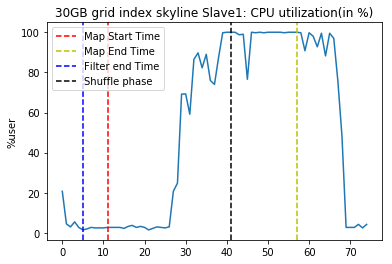

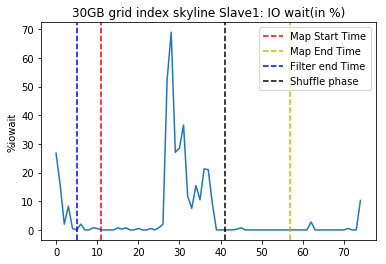

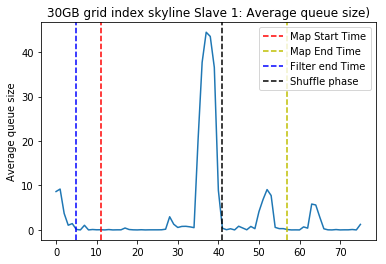

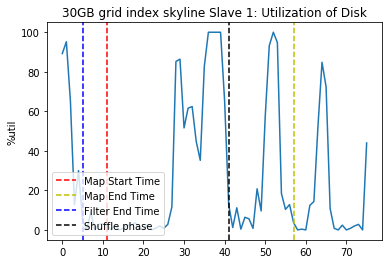

/home/tejas/.local/lib/python3.5/site-packages/ipykernel_launcher.py:316: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


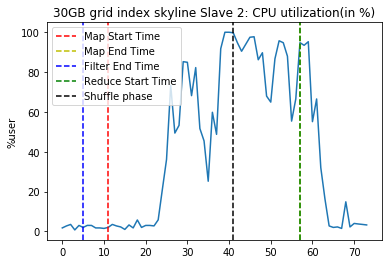

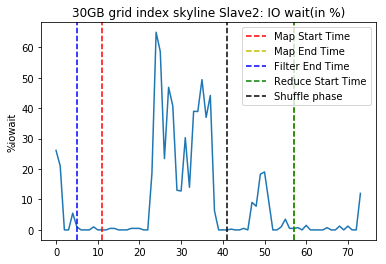

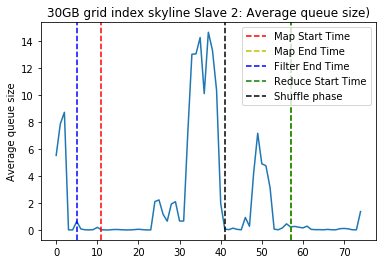

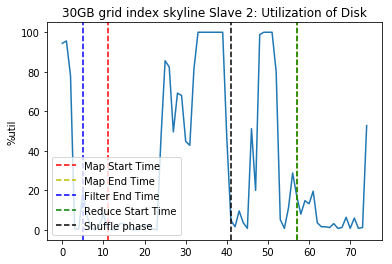

/home/tejas/.local/lib/python3.5/site-packages/ipykernel_launcher.py:449: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


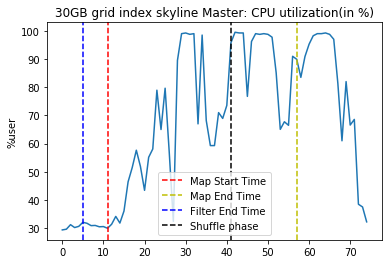

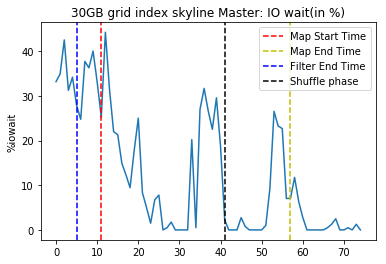

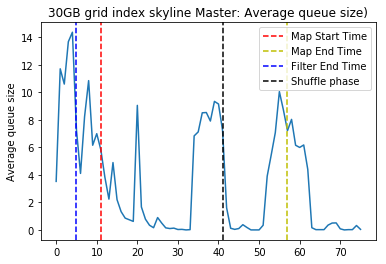

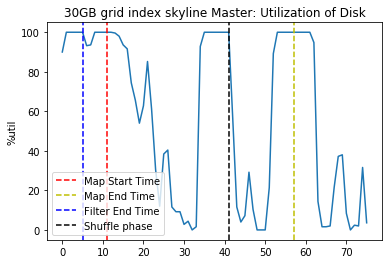

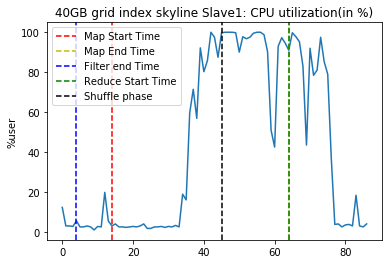

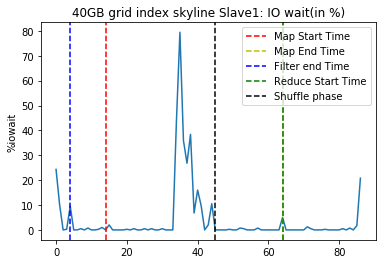

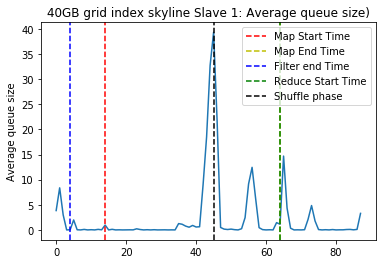

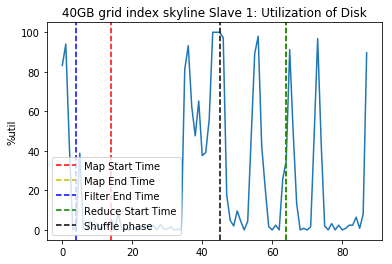

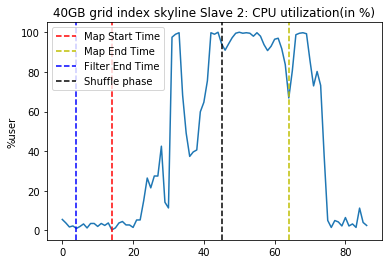

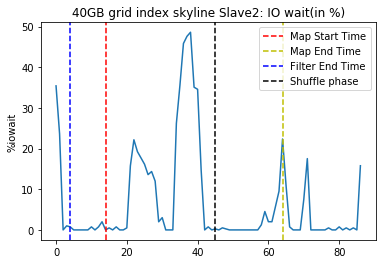

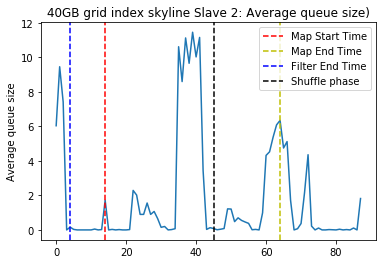

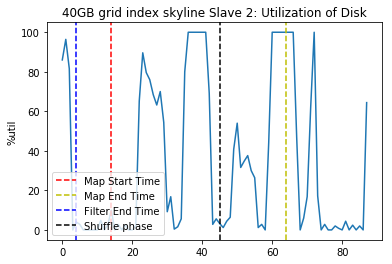

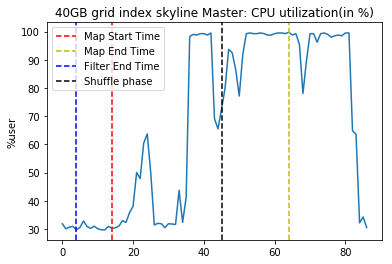

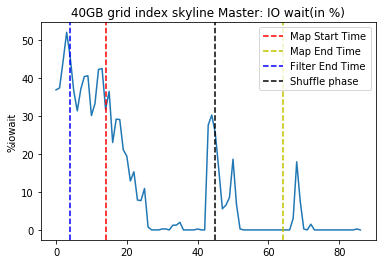

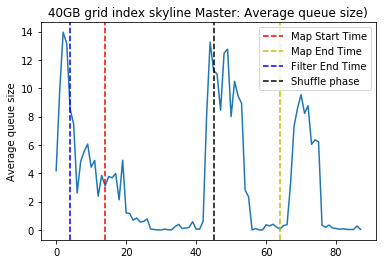

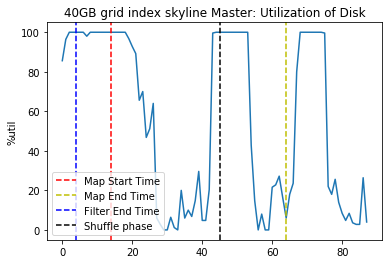

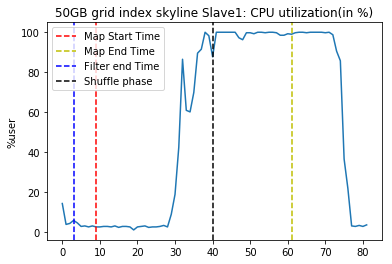

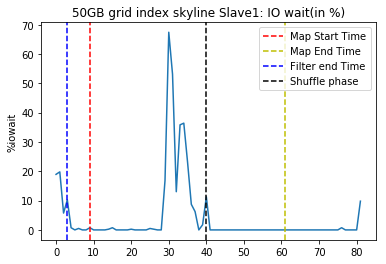

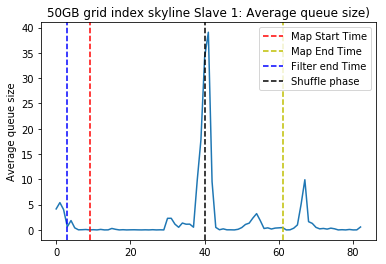

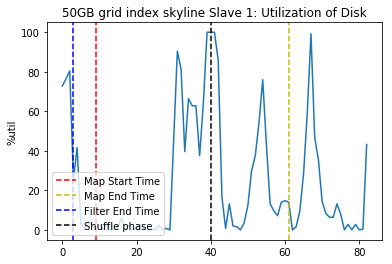

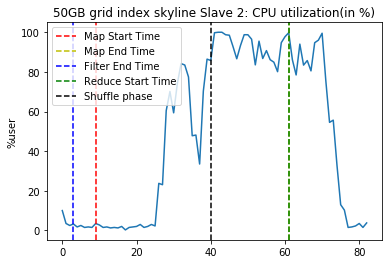

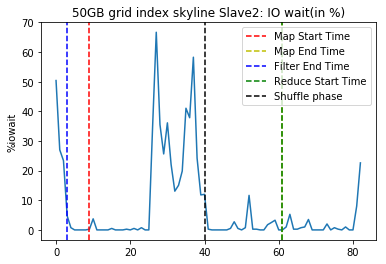

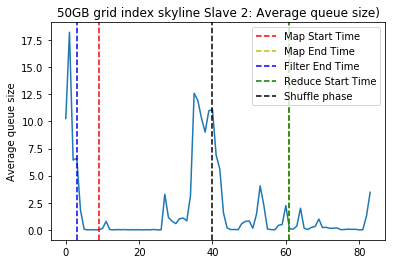

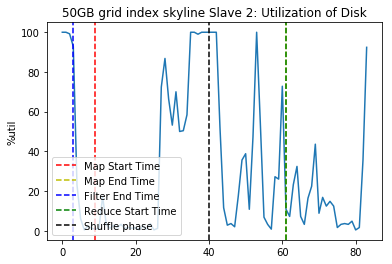

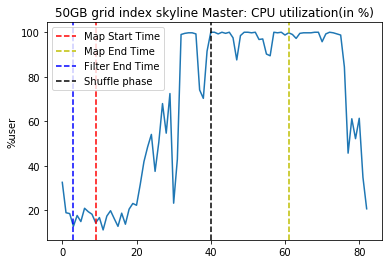

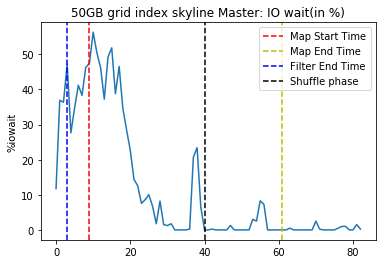

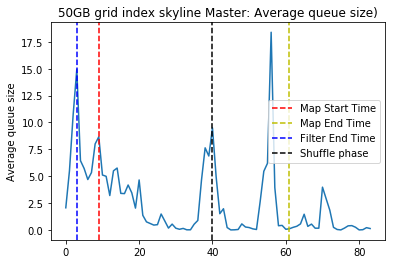

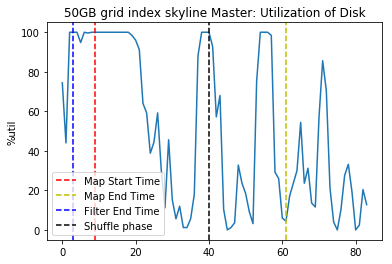

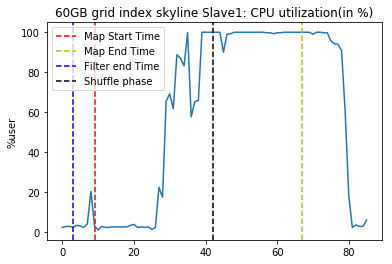

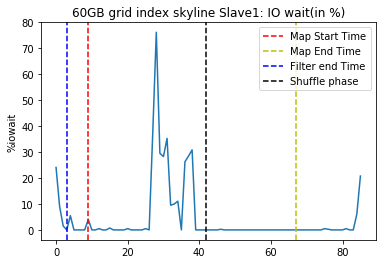

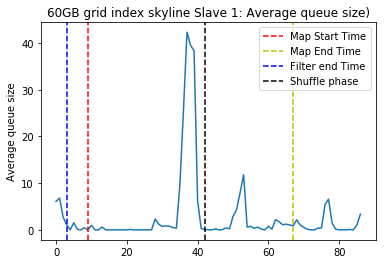

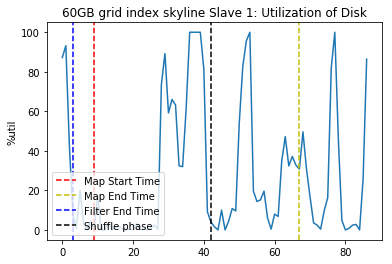

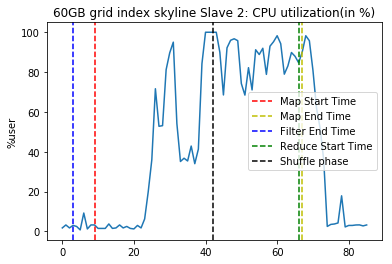

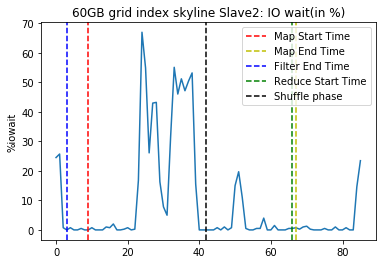

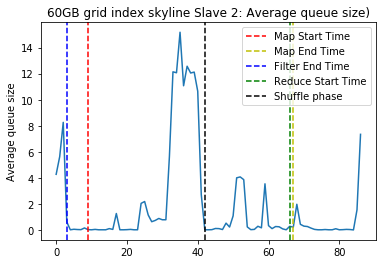

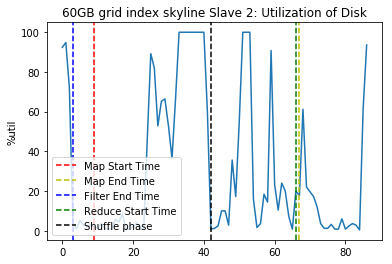

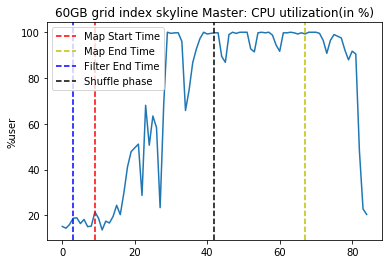

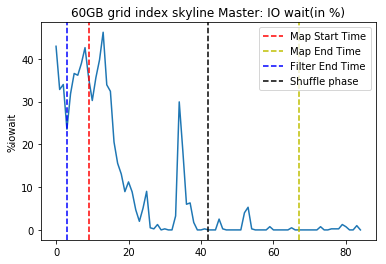

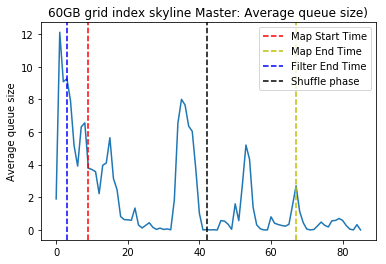

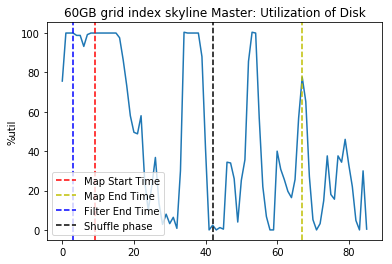

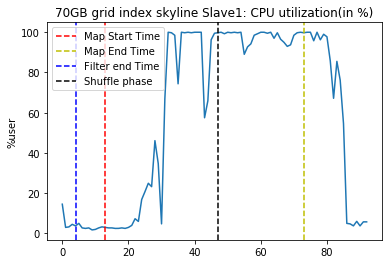

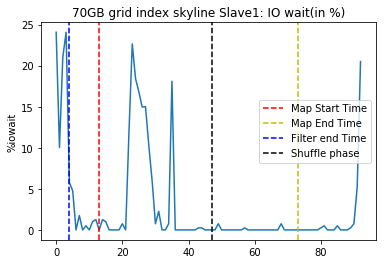

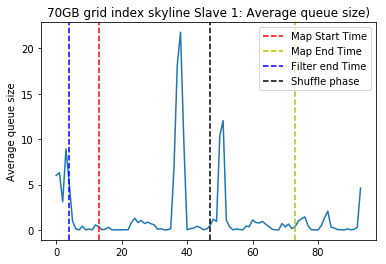

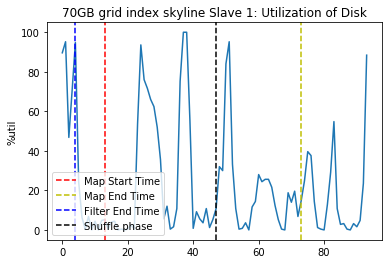

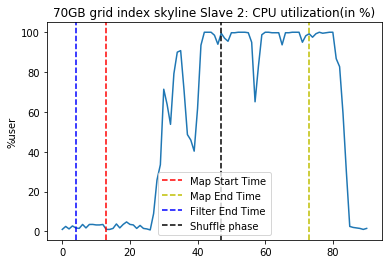

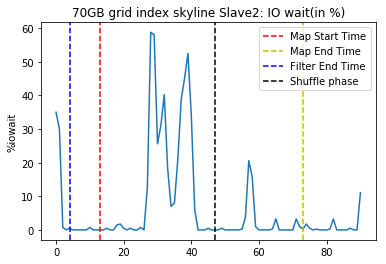

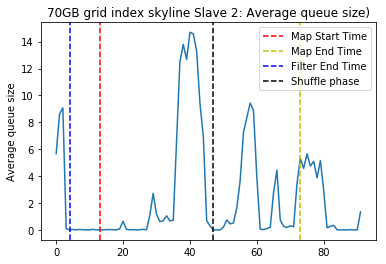

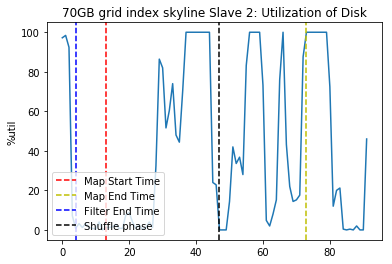

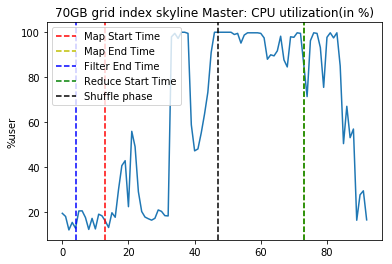

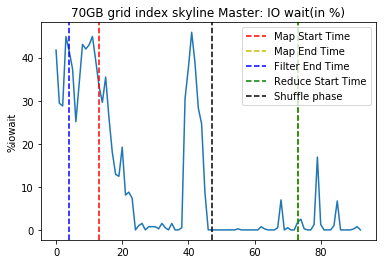

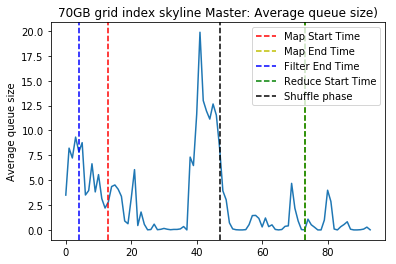

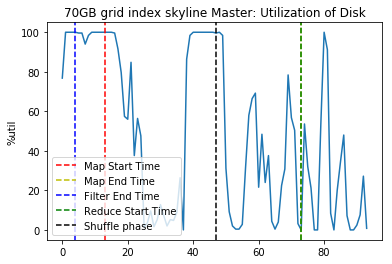

test1


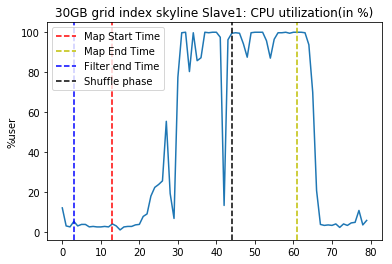

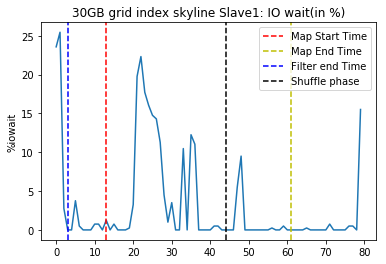

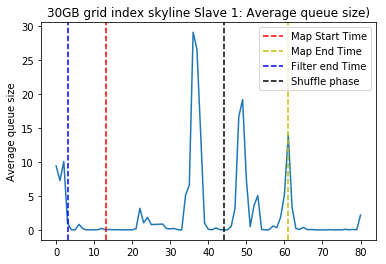

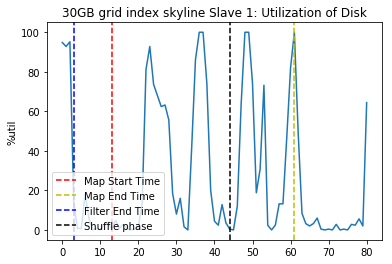

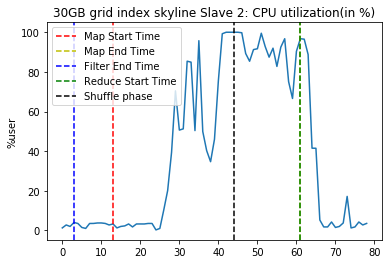

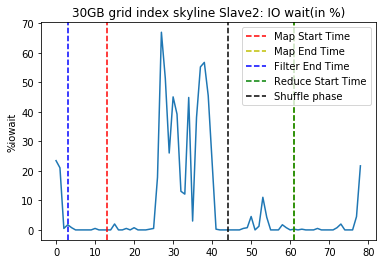

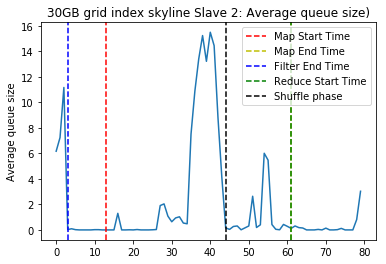

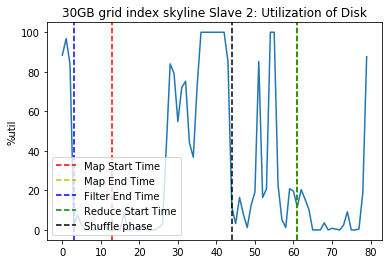

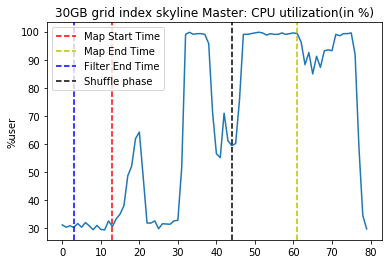

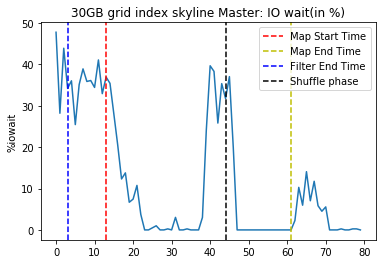

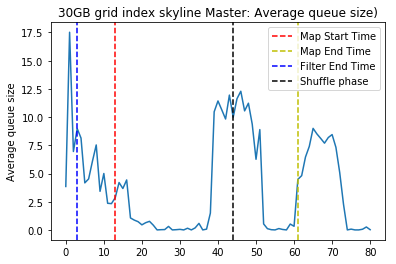

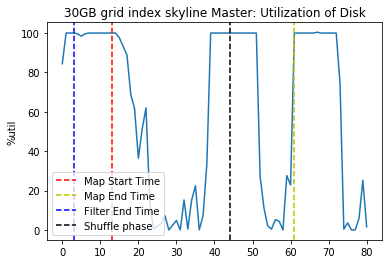

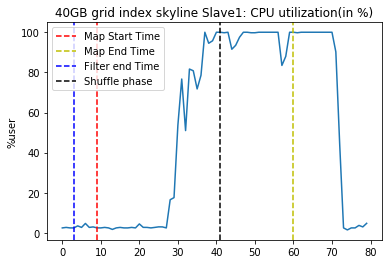

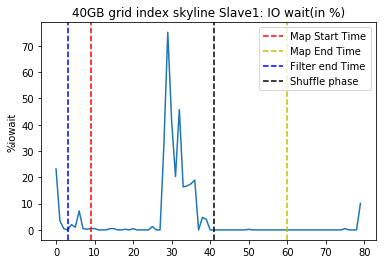

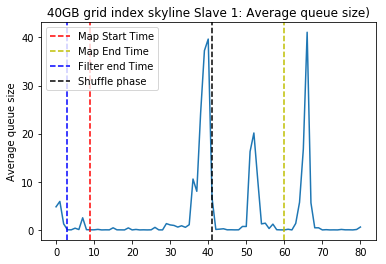

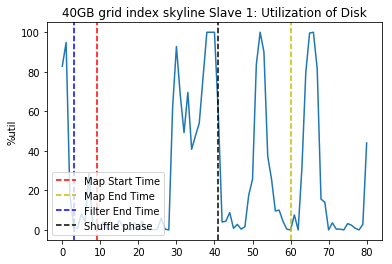

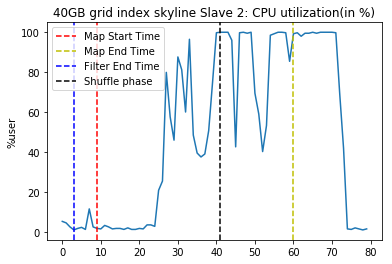

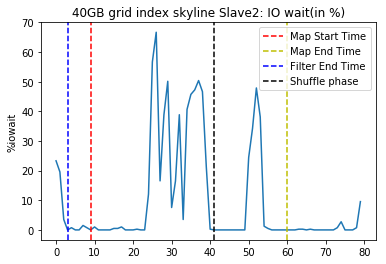

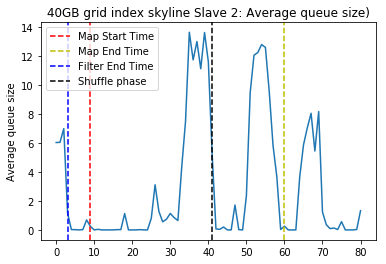

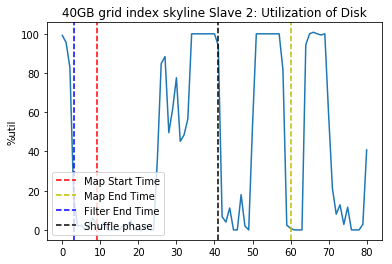

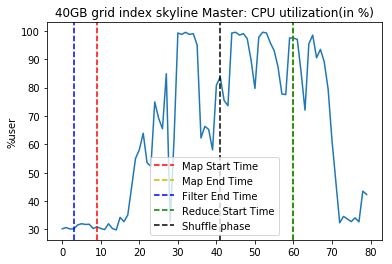

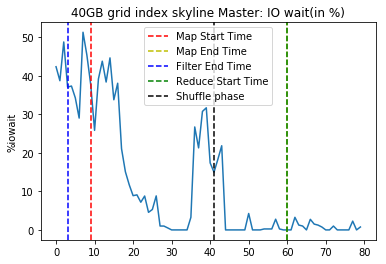

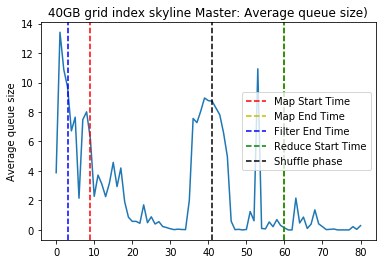

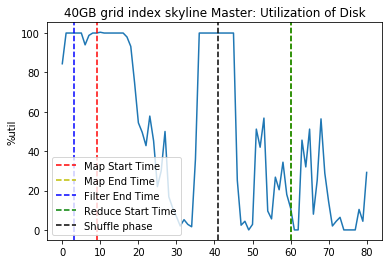

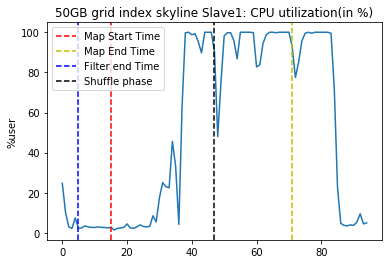

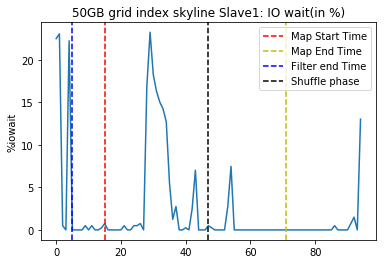

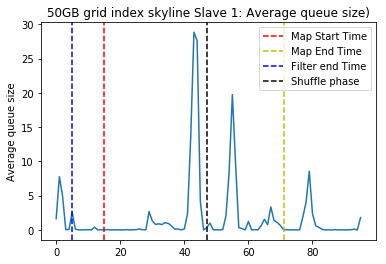

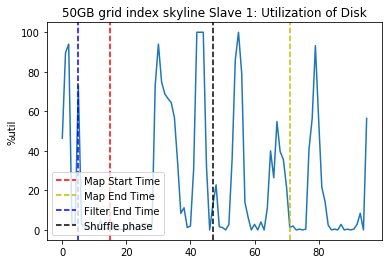

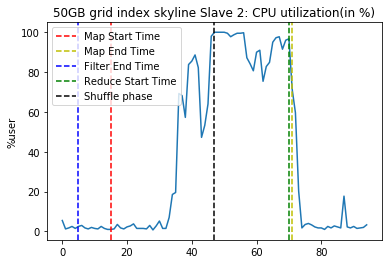

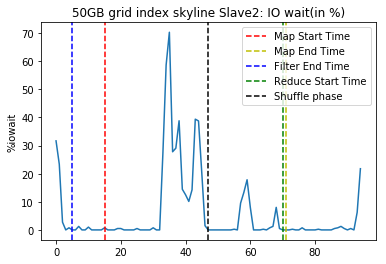

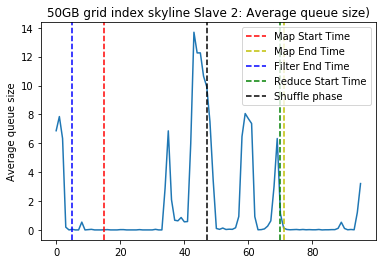

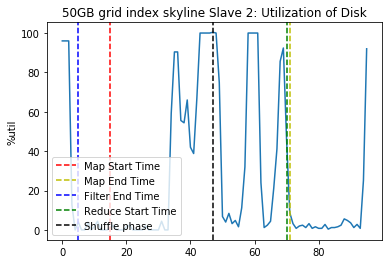

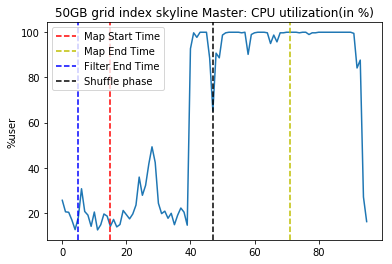

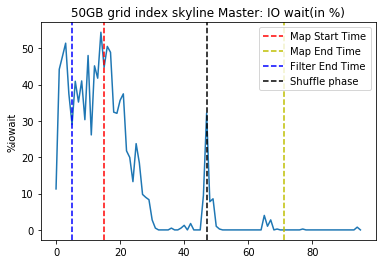

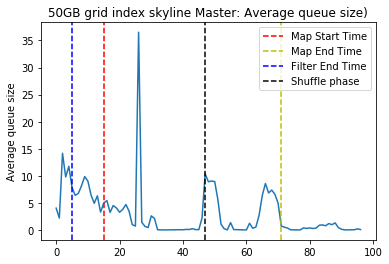

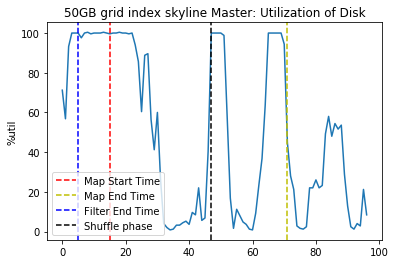

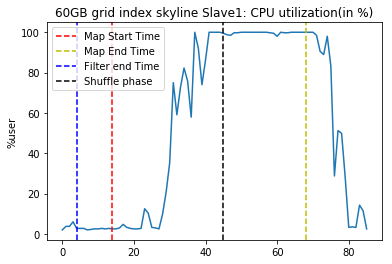

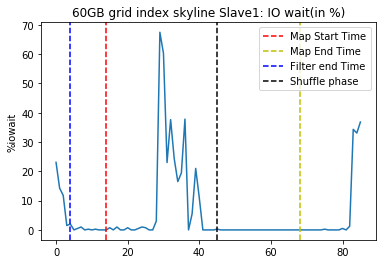

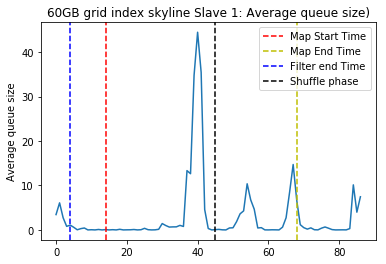

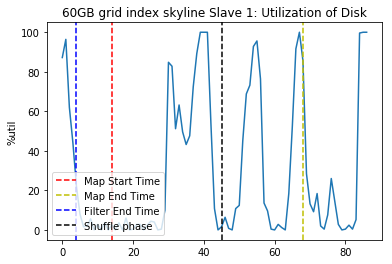

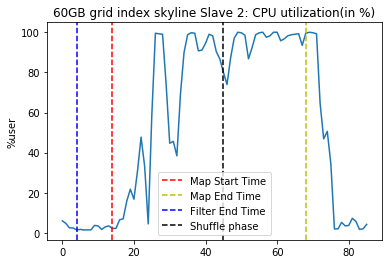

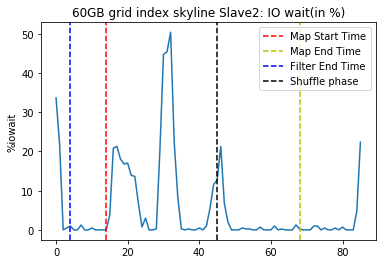

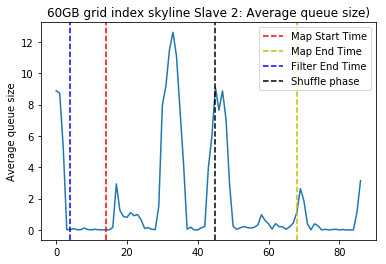

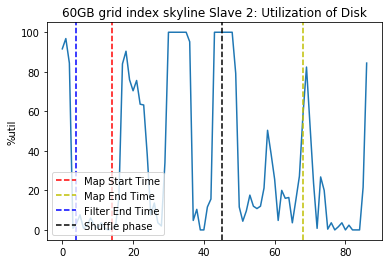

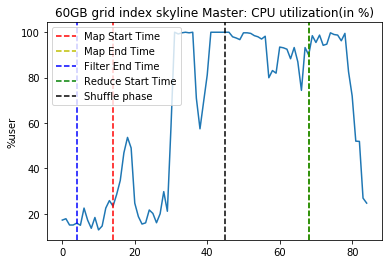

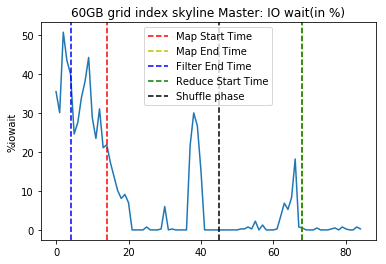

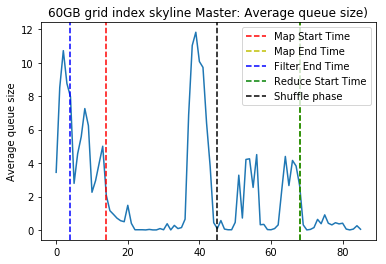

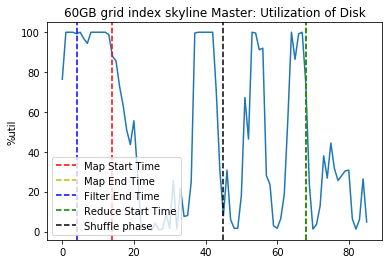

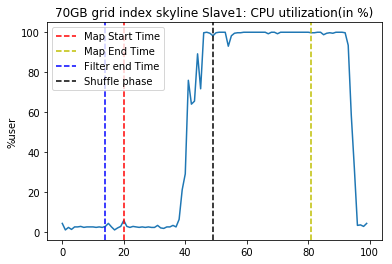

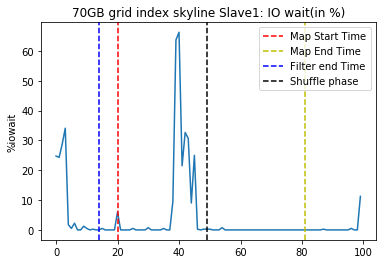

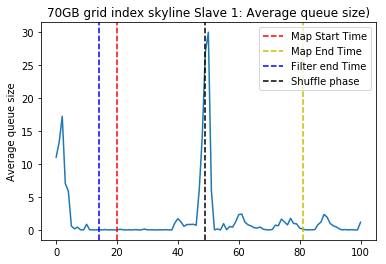

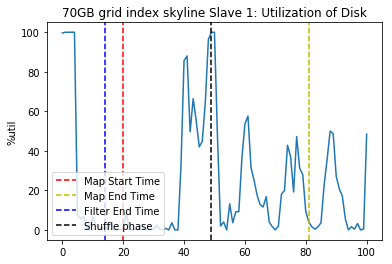

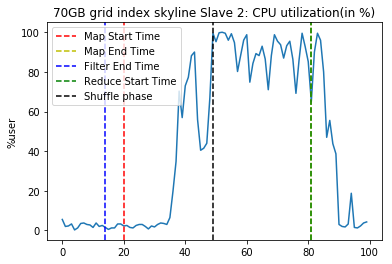

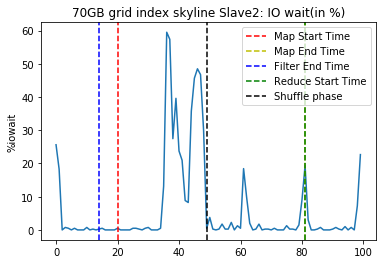

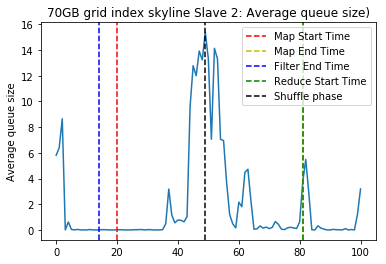

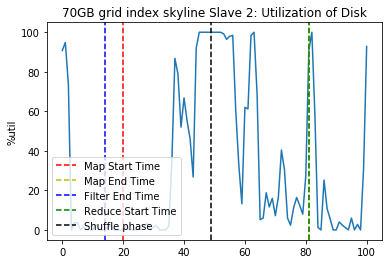

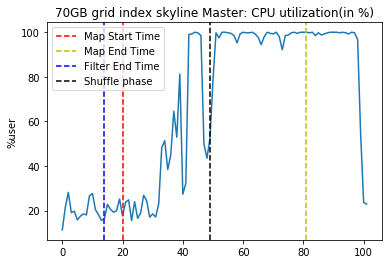

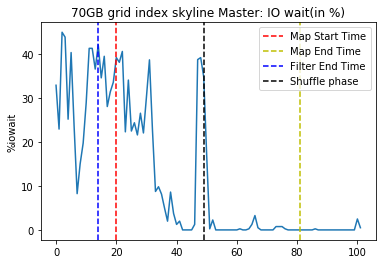

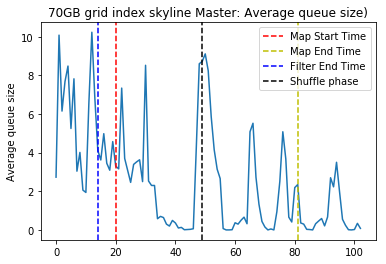

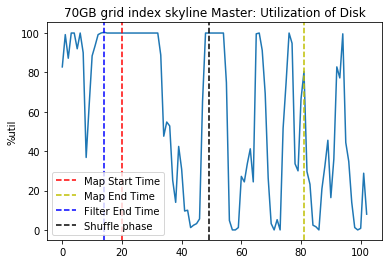

final_data_test                                                             %idle  \
30GB grid index skyline   [37.78205465465466, 40.983530063291134]   
40GB grid index skyline  [40.145747126436774, 35.613625000000006]   
50GB grid index skyline   [36.09372416495249, 43.093132675438596]   
60GB grid index skyline   [34.47101915184678, 35.639817145462835]   
70GB grid index skyline   [34.70095041159557, 38.019352287581704]   

                                                          %system  \
30GB grid index skyline   [2.237512312312312, 2.1872985232067506]   
40GB grid index skyline   [2.228965517241379, 2.2819583333333333]   
50GB grid index skyline  [2.4739102752473303, 2.2437372076023387]   
60GB grid index skyline   [2.389879160966712, 2.3120902872777016]   
70GB grid index skyline  [2.3581377762022924, 2.3642653594771237]   

                                                           %user  \
30GB grid index skyline  [50.79174174174174, 48.769296413502126]   
40GB grid index sk

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys


slave1_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
#},index=['30GB non-indexed skyline','30GB grid index skyline','40GB non-indexed skyline','40GB grid index skyline','50GB non-indexed skyline','50GB grid index skyline','60GB non-indexed skyline','60GB grid index skyline','70GB non-indexed skyline','70GB grid index skyline','80GB non-indexed skyline','80GB grid index skyline'])
},index=['30GB grid index skyline','40GB grid index skyline','50GB grid index skyline','60GB grid index skyline','70GB grid index skyline'])

slave2_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
#},index=['30GB non-indexed skyline','30GB grid index skyline','40GB non-indexed skyline','40GB grid index skyline','50GB non-indexed skyline','50GB grid index skyline','60GB non-indexed skyline','60GB grid index skyline','70GB non-indexed skyline','70GB grid index skyline','80GB non-indexed skyline','80GB grid index skyline'])
},index=['30GB grid index skyline','40GB grid index skyline','50GB grid index skyline','60GB grid index skyline','70GB grid index skyline'])

master_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
#},index=['30GB non-indexed skyline','30GB grid index skyline','40GB non-indexed skyline','40GB grid index skyline','50GB non-indexed skyline','50GB grid index skyline','60GB non-indexed skyline','60GB grid index skyline','70GB non-indexed skyline','70GB grid index skyline','80GB non-indexed skyline','80GB grid index skyline'])
},index=['30GB grid index skyline','40GB grid index skyline','50GB grid index skyline','60GB grid index skyline','70GB grid index skyline'])

final_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
#},index=['30GB non-indexed skyline','30GB grid index skyline','40GB non-indexed skyline','40GB grid index skyline','50GB non-indexed skyline','50GB grid index skyline','60GB non-indexed skyline','60GB grid index skyline','70GB non-indexed skyline','70GB grid index skyline','80GB non-indexed skyline','80GB grid index skyline'])
},index=['30GB grid index skyline','40GB grid index skyline','50GB grid index skyline','60GB grid index skyline','70GB grid index skyline'])

path_graphs='/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/skyline_semi_ssd/FINAL DATA CPU UTIL/graphs_trimmed_times/'

#files=['job_50gb_skyline_normal_','job_50gb_skyline_grid_','job_50gb_skyline_rtree_','job_60gb_skyline_normal_','job_60gb_skyline_grid_','job_60gb_skyline_rtree_','job_70gb_skyline_normal_','job_70gb_skyline_grid_','job_70gb_skyline_rtree_']
#files=['job_30gb_skyline_','job_30gb_skyline_grid_','job_40gb_skyline_','job_40gb_skyline_grid_','job_50gb_skyline_','job_50gb_skyline_grid_','job_60gb_skyline_','job_60gb_skyline_grid_','job_70gb_skyline_','job_70gb_skyline_grid_','job_80gb_skyline_','job_80gb_skyline_grid_']
files=['job_30gb_skyline_grid_','job_40gb_skyline_grid_','job_50gb_skyline_grid_','job_60gb_skyline_grid_','job_70gb_skyline_grid_']
path="/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/skyline_semi_ssd/FINAL DATA CPU UTIL"+'/'
counter=0
#HDD stats
#tests=['test7_8vcores_10vcores','test8_8vcores_10vcores','test9_8vcores_10vcores_reduce1','test10_8vcores_10vcores_reduce2','test12_8vcores_10vcores_reduce3','test13_8vcores_10vcores_reduce3_11520MB']
#tests=['test15_8vcores_10vcores_reduce1_9000MB','test14_8vcores_10vcores_reduce1_11820MB','test16_8vcores_10vcores_reduce1_12920MB']
#tests=['test16_8vcores_10vcores_reduce1_12920MB','test14_8vcores_10vcores_reduce1_11820MB']
tests=['test16_8vcores_10vcores_reduce1_12920MB']
all_tests=['test2','test1']


# normal_table=pd.read_table(r"C:/Tejas/PESU/CCBD_researchh/New Tests/disk_op",delim_whitespace=True,header=3,lineterminator='\n')
# #print(table.iloc[:10,:])

# cpu_column_indexes=normal_table.index[normal_table['Device:']=='avg-cpu:'].tolist()

# cpu_stats=[]
# for i in cpu_column_indexes:
#     cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
# cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

# disk_table=normal_table
# disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 



# iowait_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
# r_s_normal=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
# w_s_normal=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
# util_normal=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
# rkbs_normal=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
# wkbs_normal=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
# avgrq_sz_normal=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
# avgqu_sz_normal=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
# await_normal=np.average(pd.to_numeric(disk_table.loc[:,'await']))
# r_await_normal=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
# w_await_normal=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
# user_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
# sys_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
# idle_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

# iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])

# iops_normal=np.average(iops_total)


for test in tests:
    counter=0
    final_data_tests=pd.DataFrame(index=final_data.index,columns=final_data.columns)
    for data in final_data.index:    
        final_data_tests.loc[str(data),'io_wait']=[]
        final_data_tests.loc[str(data),'r_s']=[]
        final_data_tests.loc[str(data),'w_s']=[]
        final_data_tests.loc[str(data),'util']=[]
        final_data_tests.loc[str(data),'iops']=[]
        final_data_tests.loc[str(data),'rkB/s']=[]
        final_data_tests.loc[str(data),'wkB/s']=[]
        final_data_tests.loc[str(data),'avgrq-sz']=[]
        final_data_tests.loc[str(data),'avgqu-sz']=[]
        final_data_tests.loc[str(data),'await']=[]
        final_data_tests.loc[str(data),'r_await']=[]
        final_data_tests.loc[str(data),'w_await']=[]
        final_data_tests.loc[str(data),'%user']=[]
        final_data_tests.loc[str(data),'%system']=[]
        final_data_tests.loc[str(data),'%idle']=[]
    for test_num in all_tests:
        print(test_num)
        diff_time_df=pd.read_csv(path+"ssd_counters_"+test+"_"+test_num+".csv",index_col='Size(GB)')
        counter=0
        for data in final_data.index:
            #print(data)
            fp2_slave1=open(path+test+"/"+test_num+'/slave1/'+files[counter]+'master_ssd1','r')
            fp2_slave2=open(path+test+"/"+test_num+'/slave2/'+files[counter]+'master_ssd1','r')
            fp2_master=open(path+test+"/"+test_num+'/master/'+files[counter]+'master_ssd1','r')
            counter+=1

            #Slave1
            #print("Slave1")
            table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table)
            #print(table.iloc[:10,:])
            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                #print(i)
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
            #print("CPu table",cpu_table)
            #print("Here")   
            #print(cpu_column_indexes)
            #for i in cpu_column_indexes:
                #table.drop(table.index[i:i+2],inplace=True)
                #print(i)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print("CPU table",cpu_table.head(),sep='\n')
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
            #print("Disk table",disk_table.head(),sep='\n')
            #print("generated disk and cpu tables")
            diff_time=diff_time_df.loc[str(data),'diff_time(s)']
            map_start_time=diff_time_df.loc[str(data),'map_start_diff(s)']
            map_end_time=diff_time_df.loc[str(data),'map_end_diff(s)']
            filter_end_time=diff_time_df.loc[str(data),'filter_end_diff(s)']
            reduce_node=diff_time_df.loc[str(data),'reduce_node']
            reduce_start_time=diff_time_df.loc[str(data),'reduce_start_time(s)']
            shuffle_start_time=diff_time_df.loc[str(data),'shuffle_start_time(s)']
                
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]

            iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_slave1=np.average(iops_total)

            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%user']))),pd.to_numeric(cpu_table.loc[:,'%user'])+pd.to_numeric(cpu_table.loc[:,'%system']))
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter end Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            if(reduce_node=='slave1'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5])
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5])
            plt.title(data+" Slave1: CPU utilization(in %)")
            plt.ylabel("%user")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"cpu_util.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%iowait']))),pd.to_numeric(cpu_table.loc[:,'%iowait']))
            
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter end Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            if(reduce_node=='slave1'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5])
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5])
            
            plt.title(data+" Slave1: IO wait(in %)")
            plt.ylabel("%iowait")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"iowait.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter end Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            if(reduce_node=='slave1'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5])
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5])
            
            plt.title(data+" Slave 1: Average queue size)")
            plt.ylabel("Average queue size")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"avgqu_sz.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            if(reduce_node=='slave1'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5],loc='lower left')
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5],loc='lower left')
                
            plt.title(data+" Slave 1: Utilization of Disk")
            plt.ylabel("%util")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"util.png")
            plt.show()
            
            #Not considering slave1
    #         iowait_slave1=0.0
    #         r_s_slave1=0.0
    #         w_s_slave1=0.0
    #         util_slave1=0.0
    #         rkbs_slave1=0.0
    #         wkbs_slave1=0.0
    #         avgrq_sz_slave1=0.0
    #         avgqu_sz_slave1=0.0
    #         await_slave1=0.0
    #         r_await_slave1=0.0
    #         w_await_slave1=0.0
    #         user_slave1=0.0
    #         sys_slave1=0.0
    #         idle_slave1=0.0
    #         iops_slave1=0.0

            #Slave2
            #print("Slave2-----------------------X--------------------------X--------------------")
            table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table.iloc[:10,:])

            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

            #for i in cpu_column_indexes:
               #table.drop(table.index[i:i+2],inplace=True)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print(cpu_table.head())
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
            #print(disk_table.head())
            diff_time=diff_time_df.loc[str(data),'diff_time(s)']
            map_start_time=diff_time_df.loc[str(data),'map_start_diff(s)']
            map_end_time=diff_time_df.loc[str(data),'map_end_diff(s)']
            filter_end_time=diff_time_df.loc[str(data),'filter_end_diff(s)']
            reduce_node=diff_time_df.loc[str(data),'reduce_node']
            reduce_start_time=diff_time_df.loc[str(data),'reduce_start_time(s)']
            shuffle_start_time=diff_time_df.loc[str(data),'shuffle_start_time(s)']
            
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]

            iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_slave2=np.average(iops_total)

            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%user']))),pd.to_numeric(cpu_table.loc[:,'%user'])+pd.to_numeric(cpu_table.loc[:,'%system']))
            
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            if(reduce_node=='slave2'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5])
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5])
            
            plt.title(data+" Slave 2: CPU utilization(in %)")
            plt.ylabel("%user")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"cpu_util.png")
            plt.show()

            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%iowait']))),pd.to_numeric(cpu_table.loc[:,'%iowait']))
            
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            if(reduce_node=='slave2'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5])
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5])
            
            plt.title(data+" Slave2: IO wait(in %)")
            plt.ylabel("%iowait")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"iowait.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            
            if(reduce_node=='slave2'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5])
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5])
            
            plt.title(data+" Slave 2: Average queue size)")
            plt.ylabel("Average queue size")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"avgqu_sz.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            if(reduce_node=='slave2'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5],loc='lower left')
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5],loc='lower left')
                
            plt.title(data+" Slave 2: Utilization of Disk")
            plt.ylabel("%util")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"util.png")
            plt.show()
            
            #print(w_s_slave1,w_s_slave2)
            #Master
            #print("-----------------------X-----------Master---------------X--------------------")
            table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table.iloc[:10,:])

            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

            #for i in cpu_column_indexes:
               # table.drop(table.index[i:i+2],inplace=True)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print(cpu_table.head())
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
            #print(disk_table.head())
            diff_time=diff_time_df.loc[str(data),'diff_time(s)']
            map_start_time=diff_time_df.loc[str(data),'map_start_diff(s)']
            map_end_time=diff_time_df.loc[str(data),'map_end_diff(s)']
            filter_end_time=diff_time_df.loc[str(data),'filter_end_diff(s)']
            reduce_node=diff_time_df.loc[str(data),'reduce_node']
            reduce_start_time=diff_time_df.loc[str(data),'reduce_start_time(s)']
            shuffle_start_time=diff_time_df.loc[str(data),'shuffle_start_time(s)']
            
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]


            iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_master=np.average(iops_total)

            #print(w_s_slave1,w_s_slave2)
            #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))
            plt.figure()
            
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%user']))),pd.to_numeric(cpu_table.loc[:,'%user'])+pd.to_numeric(cpu_table.loc[:,'%system']))
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            if(reduce_node=='master'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5])
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5])
            
            plt.title(data+" Master: CPU utilization(in %)")
            plt.ylabel("%user")
            #plt.legend(('Slave1','Slave2','Master'))
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"cpu_util.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%iowait']))),pd.to_numeric(cpu_table.loc[:,'%iowait']))
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            if(reduce_node=='master'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5])
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5])
                
            plt.title(data+" Master: IO wait(in %)")
            plt.ylabel("%iowait")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"iowait.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            if(reduce_node=='master'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5])
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5])
                
            plt.title(data+" Master: Average queue size)")
            plt.ylabel("Average queue size")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"avgqu_sz.png")
            plt.show()
            
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            if(reduce_node=='master'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5],loc='lower left')
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5],loc='lower left')
                
            plt.title(data+" Master: Utilization of Disk")
            plt.ylabel("%util")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"util.png")
            plt.show()

            #print(type(data))
            final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
            final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
            final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
            final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
            final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
            final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
            final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
            final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
            final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
            final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
            final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
            final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
            final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
            final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
            final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])
            
            final_data_tests.loc[str(data),'io_wait'].append(final_data.loc[str(data),'io_wait'])
            final_data_tests.loc[str(data),'r_s'].append(final_data.loc[str(data),'r_s'])
            final_data_tests.loc[str(data),'w_s'].append(final_data.loc[str(data),'w_s'])
            final_data_tests.loc[str(data),'util'].append(final_data.loc[str(data),'util'])
            final_data_tests.loc[str(data),'iops'].append(final_data.loc[str(data),'iops'])
            final_data_tests.loc[str(data),'rkB/s'].append(final_data.loc[str(data),'rkB/s'])
            final_data_tests.loc[str(data),'wkB/s'].append(final_data.loc[str(data),'wkB/s'])
            final_data_tests.loc[str(data),'avgrq-sz'].append(final_data.loc[str(data),'avgrq-sz'])
            final_data_tests.loc[str(data),'avgqu-sz'].append(final_data.loc[str(data),'avgqu-sz'])
            final_data_tests.loc[str(data),'await'].append(final_data.loc[str(data),'await'])
            final_data_tests.loc[str(data),'r_await'].append(final_data.loc[str(data),'r_await'])
            final_data_tests.loc[str(data),'w_await'].append(final_data.loc[str(data),'w_await'])
            final_data_tests.loc[str(data),'%user'].append(final_data.loc[str(data),'%user'])
            final_data_tests.loc[str(data),'%system'].append(final_data.loc[str(data),'%system'])
            final_data_tests.loc[str(data),'%idle'].append(final_data.loc[str(data),'%idle'])
            


            slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
            slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
            slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
            slave1_data.loc[str(data),'util']=np.average([util_slave1])
            slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
            slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
            slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
            slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
            slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
            slave1_data.loc[str(data),'await']=np.average([await_slave1])
            slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
            slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
            slave1_data.loc[str(data),'%user']=np.average([user_slave1])
            slave1_data.loc[str(data),'%system']=np.average([sys_slave1])
            slave1_data.loc[str(data),'%idle']=np.average([idle_slave1])


            slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
            slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
            slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
            slave2_data.loc[str(data),'util']=np.average([util_slave2])
            slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
            slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
            slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
            slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
            slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
            slave2_data.loc[str(data),'await']=np.average([await_slave2])
            slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
            slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
            slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
            slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
            slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


            master_data.loc[str(data),'io_wait']=np.average([iowait_master])
            master_data.loc[str(data),'r_s']=np.average([r_s_master])
            master_data.loc[str(data),'w_s']=np.average([w_s_master])
            master_data.loc[str(data),'util']=np.average([util_master])
            master_data.loc[str(data),'iops']=np.average([iops_master])
            master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
            master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
            master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
            master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
            master_data.loc[str(data),'await']=np.average([await_master])
            master_data.loc[str(data),'r_await']=np.average([r_await_master])
            master_data.loc[str(data),'w_await']=np.average([w_await_master])
            master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
            master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
            master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
#final_data.to_csv(path + "again.csv")
        #combine test results

    print("final_data_test",final_data_tests)
    for data in final_data.index:
        final_data_tests.loc[str(data),'io_wait']=np.average(final_data_tests.loc[str(data),'io_wait'])
        final_data_tests.loc[str(data),'r_s']=np.average(final_data_tests.loc[str(data),'r_s'])
        final_data_tests.loc[str(data),'w_s']=np.average(final_data_tests.loc[str(data),'w_s'])
        final_data_tests.loc[str(data),'util']=np.average(final_data_tests.loc[str(data),'util'])
        final_data_tests.loc[str(data),'iops']=np.average(final_data_tests.loc[str(data),'iops'])
        final_data_tests.loc[str(data),'rkB/s']=np.average(final_data_tests.loc[str(data),'rkB/s'])
        final_data_tests.loc[str(data),'wkB/s']=np.average(final_data_tests.loc[str(data),'wkB/s'])
        final_data_tests.loc[str(data),'avgrq-sz']=np.average(final_data_tests.loc[str(data),'avgrq-sz'])
        final_data_tests.loc[str(data),'avgqu-sz']=np.average(final_data_tests.loc[str(data),'avgqu-sz'])
        final_data_tests.loc[str(data),'await']=np.average(final_data_tests.loc[str(data),'await'])
        final_data_tests.loc[str(data),'r_await']=np.average(final_data_tests.loc[str(data),'r_await'])
        final_data_tests.loc[str(data),'w_await']=np.average(final_data_tests.loc[str(data),'w_await'])
        final_data_tests.loc[str(data),'%user']=np.average(final_data_tests.loc[str(data),'%user'])
        final_data_tests.loc[str(data),'%system']=np.average(final_data_tests.loc[str(data),'%system'])
        final_data_tests.loc[str(data),'%idle']=np.average(final_data_tests.loc[str(data),'%idle'])
    print(final_data_tests)
    print(slave1_data)
    print(slave2_data)
    print(master_data)
    #final_data_tests.to_csv(path+'ssd_'+test+'.csv')
    #slave1_data.to_csv(path+'slave1_stats.csv')
    #slave2_data.to_csv(path+'slave2_stats.csv')
    #master_data.to_csv(path+'master_stats.csv')
    
# ##SSD tests   
# for test in tests:
#     counter=0
#     for data in final_data.index:
#         print(data)
#         fp2_slave1=open(path+test+'/slave1/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         fp2_slave2=open(path+test+'/slave2/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         fp2_master=open(path+test+'/master/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         counter+=1

#         #Slave1
#         #print("Slave1")
#         table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table)
#         #print(table.iloc[:10,:])
#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             #print(i)
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
#         #print("CPu table",cpu_table)
#         #print("Here")   
#         #print(cpu_column_indexes)
#         #for i in cpu_column_indexes:
#             #table.drop(table.index[i:i+2],inplace=True)
#             #print(i)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print("CPU table",cpu_table.head(),sep='\n')
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
#         #print("Disk table",disk_table.head(),sep='\n')
#         #print("generated disk and cpu tables")
#         iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_slave1=np.average(iops_total)

#         #Slave2
#         #print("Slave2-----------------------X--------------------------X--------------------")
#         table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table.iloc[:10,:])

#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

#         #for i in cpu_column_indexes:
#            #table.drop(table.index[i:i+2],inplace=True)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print(cpu_table.head())
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
#         #print(disk_table.head())


#         iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_slave2=np.average(iops_total)

#         #print(w_s_slave1,w_s_slave2)
#         #Master
#         #print("-----------------------X-----------Master---------------X--------------------")
#         table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table.iloc[:10,:])

#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

#         #for i in cpu_column_indexes:
#            # table.drop(table.index[i:i+2],inplace=True)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print(cpu_table.head())
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
#         #print(disk_table.head())


#         iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_master=np.average(iops_total)

#         #print(w_s_slave1,w_s_slave2)
#         #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))

#         #print(type(data))
#         final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
#         final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
#         final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
#         final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
#         final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
#         final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
#         final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
#         final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
#         final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
#         final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
#         final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
#         final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
#         final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
#         slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
#         slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
#         slave1_data.loc[str(data),'util']=np.average([util_slave1])
#         slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
#         slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
#         slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
#         slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
#         slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
#         slave1_data.loc[str(data),'await']=np.average([await_slave1])
#         slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
#         slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
#         slave1_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         slave1_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         slave1_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
#         slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
#         slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
#         slave2_data.loc[str(data),'util']=np.average([util_slave2])
#         slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
#         slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
#         slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
#         slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
#         slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
#         slave2_data.loc[str(data),'await']=np.average([await_slave2])
#         slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
#         slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
#         slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         master_data.loc[str(data),'io_wait']=np.average([iowait_master])
#         master_data.loc[str(data),'r_s']=np.average([r_s_master])
#         master_data.loc[str(data),'w_s']=np.average([w_s_master])
#         master_data.loc[str(data),'util']=np.average([util_master])
#         master_data.loc[str(data),'iops']=np.average([iops_master])
#         master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
#         master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
#         master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
#         master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
#         master_data.loc[str(data),'await']=np.average([await_master])
#         master_data.loc[str(data),'r_await']=np.average([r_await_master])
#         master_data.loc[str(data),'w_await']=np.average([w_await_master])
#         master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
# #final_data.to_csv(path + "again.csv")
#     print(final_data)
#     print(slave1_data)
#     print(slave2_data)
#     print(master_data)
#     final_data.to_csv(path+'ssd_'+test+'.csv')

test1


/home/tejas/.local/lib/python3.5/site-packages/ipykernel_launcher.py:166: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


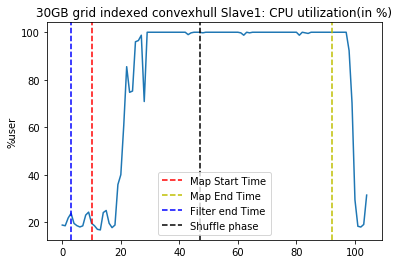

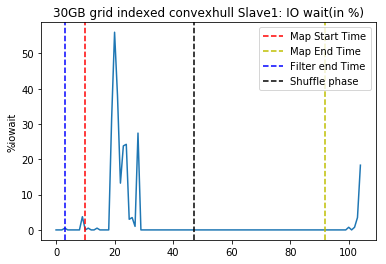

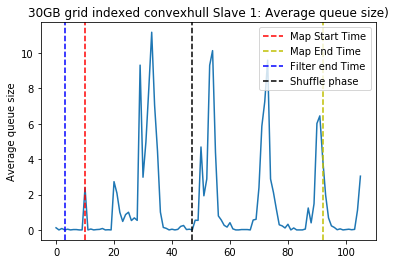

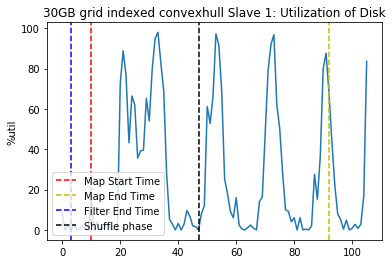

/home/tejas/.local/lib/python3.5/site-packages/ipykernel_launcher.py:317: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


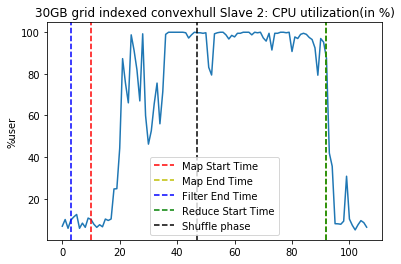

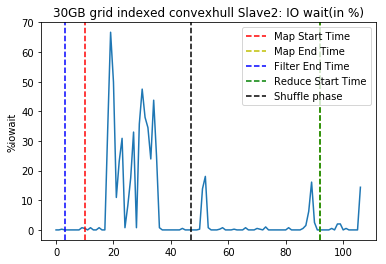

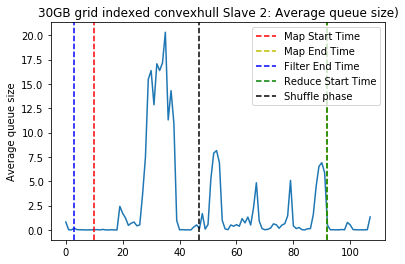

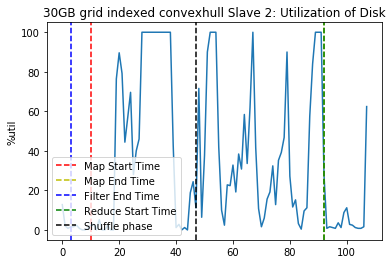

/home/tejas/.local/lib/python3.5/site-packages/ipykernel_launcher.py:450: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


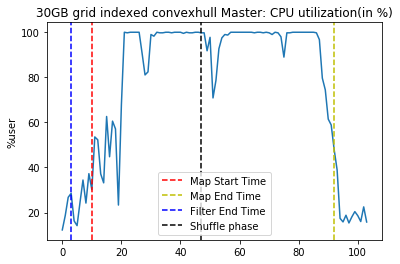

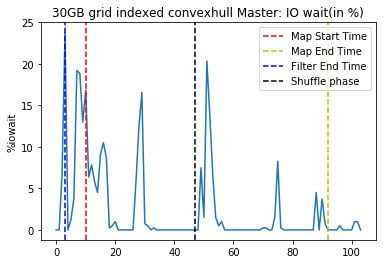

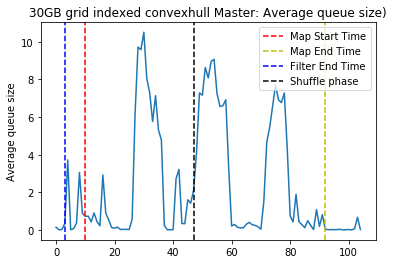

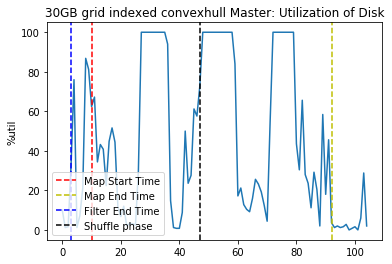

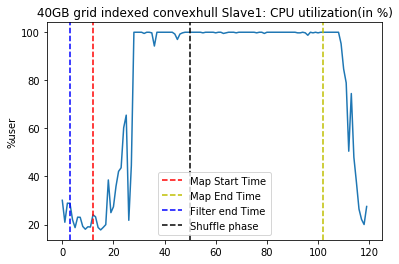

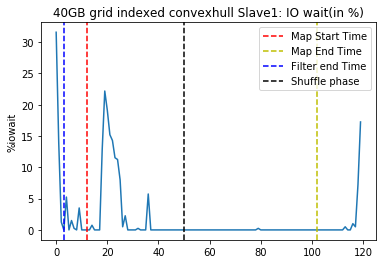

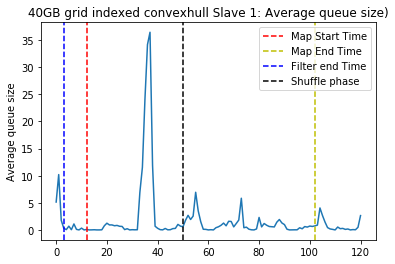

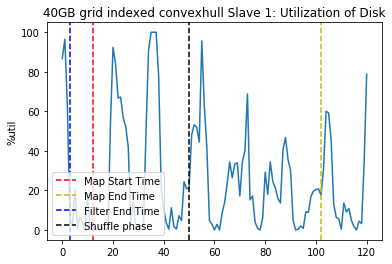

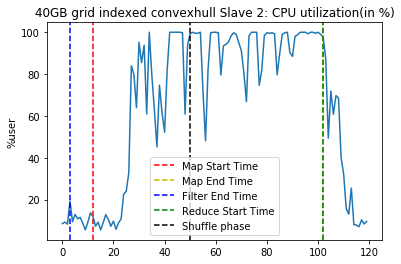

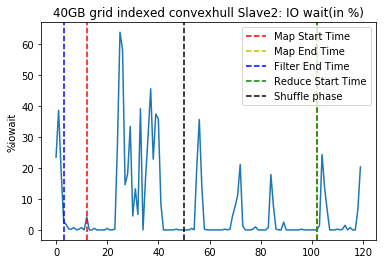

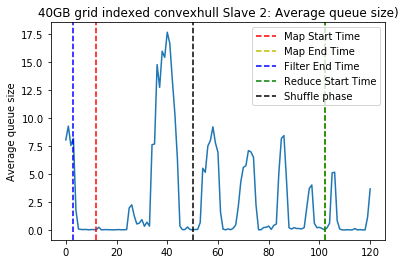

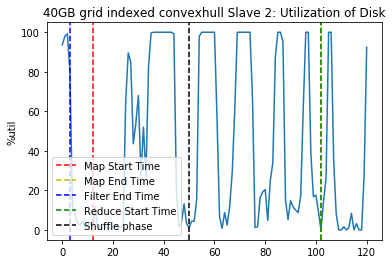

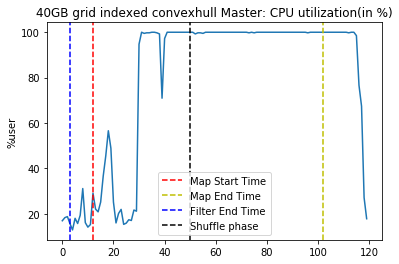

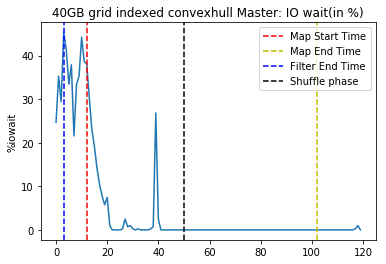

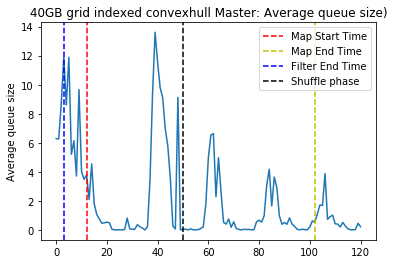

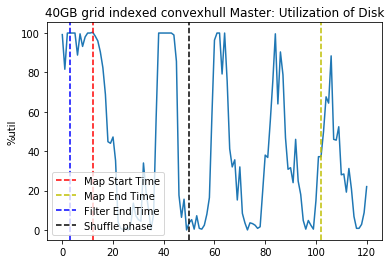

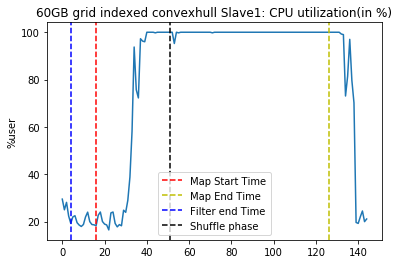

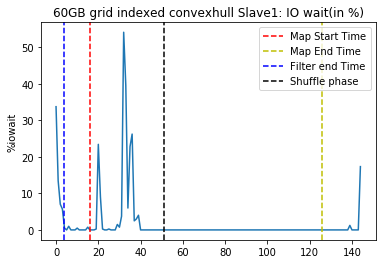

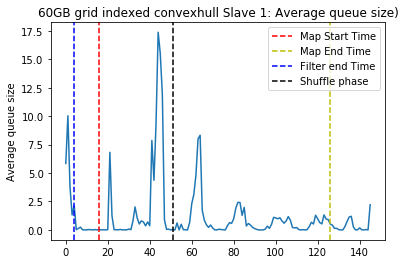

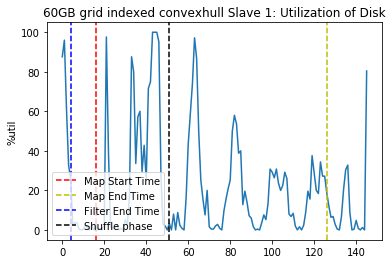

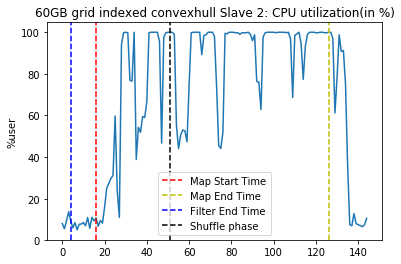

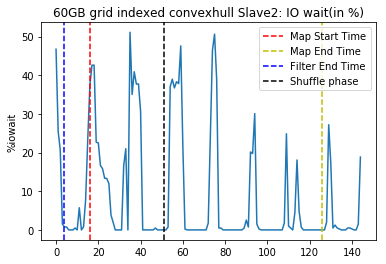

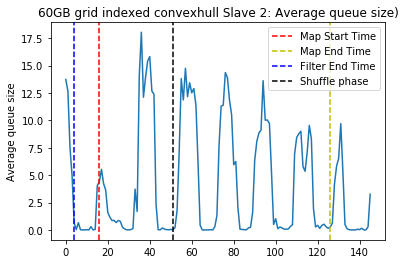

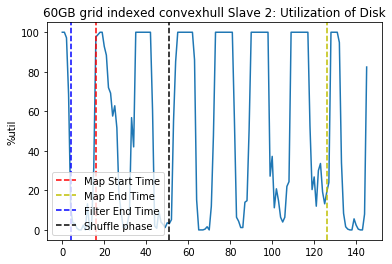

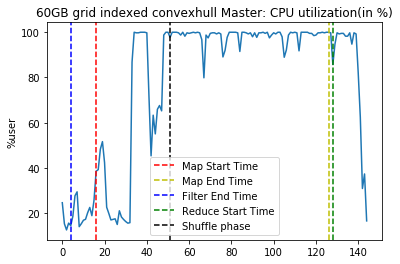

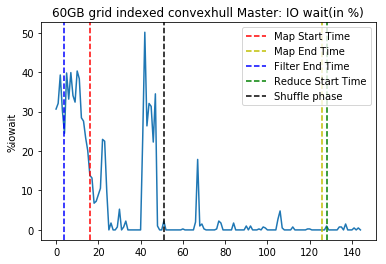

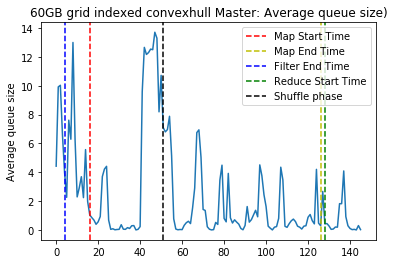

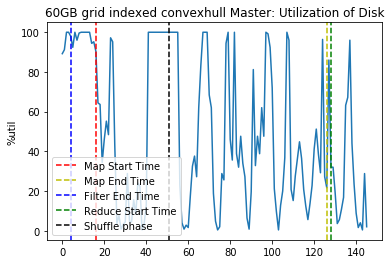

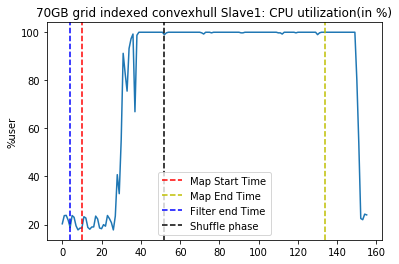

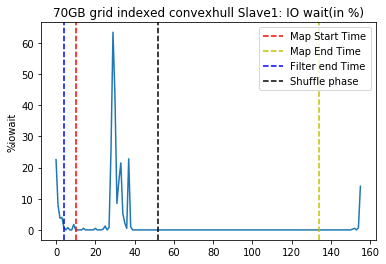

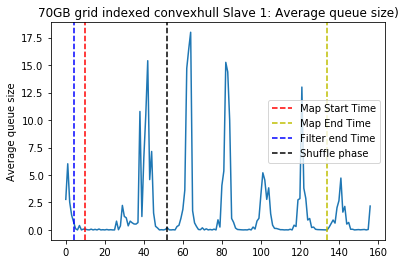

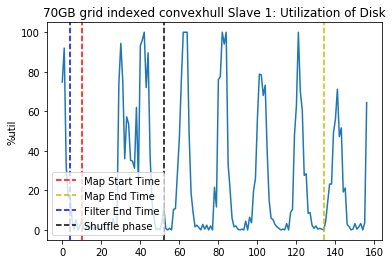

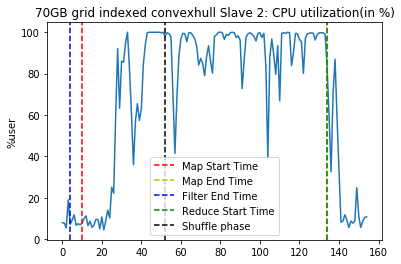

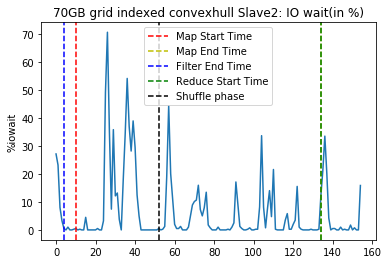

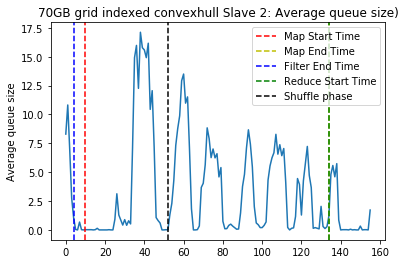

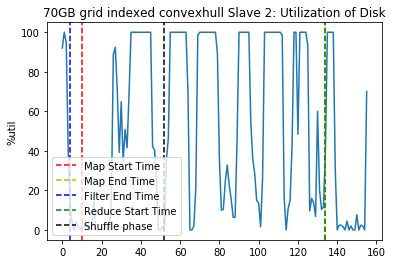

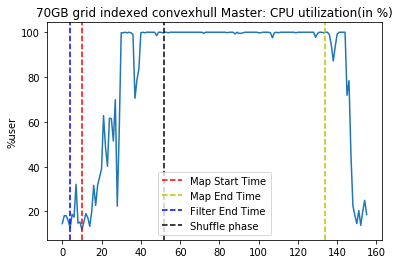

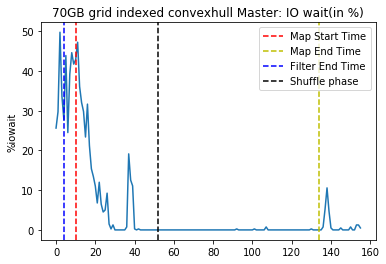

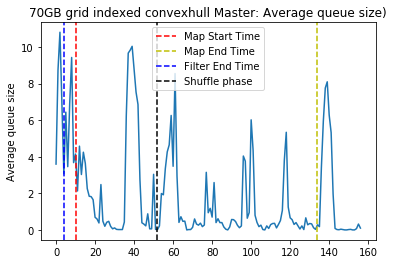

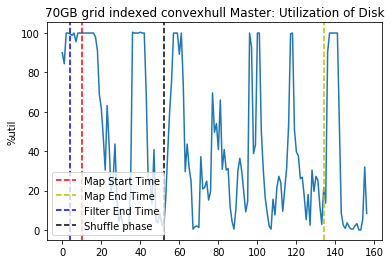

final_data_test                                              %idle               %system  \
30GB grid indexed convexhull   [22.83937675304965]   [2.991978424223751]   
40GB grid indexed convexhull   [21.52241666666667]  [3.0963333333333334]   
60GB grid indexed convexhull   [19.63216091954023]   [2.823172413793103]   
70GB grid indexed convexhull  [18.644533912324235]  [3.0025002757099535]   

                                            %user              avgqu-sz  \
30GB grid indexed convexhull  [70.60443921810277]  [2.0911168513527003]   
40GB grid indexed convexhull  [70.90608333333334]   [2.247906336088154]   
60GB grid indexed convexhull  [71.88181609195402]   [2.608310502283105]   
70GB grid indexed convexhull  [73.89465219189414]  [2.3420669334204365]   

                                          avgrq-sz                 await  \
30GB grid indexed convexhull   [456.2059401351037]  [12.155411916408772]   
40GB grid indexed convexhull   [454.9351239669422]  [12.123911845730028]   

In [8]:
#For convexhull
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys


slave1_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
#},index=['30GB non-indexed skyline','30GB grid index skyline','40GB non-indexed skyline','40GB grid index skyline','50GB non-indexed skyline','50GB grid index skyline','60GB non-indexed skyline','60GB grid index skyline','70GB non-indexed skyline','70GB grid index skyline','80GB non-indexed skyline','80GB grid index skyline'])
},index=['30GB grid indexed convexhull','40GB grid indexed convexhull','60GB grid indexed convexhull','70GB grid indexed convexhull'])

slave2_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
#},index=['30GB non-indexed skyline','30GB grid index skyline','40GB non-indexed skyline','40GB grid index skyline','50GB non-indexed skyline','50GB grid index skyline','60GB non-indexed skyline','60GB grid index skyline','70GB non-indexed skyline','70GB grid index skyline','80GB non-indexed skyline','80GB grid index skyline'])
},index=['30GB grid indexed convexhull','40GB grid indexed convexhull','60GB grid indexed convexhull','70GB grid indexed convexhull'])

master_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
#},index=['30GB non-indexed skyline','30GB grid index skyline','40GB non-indexed skyline','40GB grid index skyline','50GB non-indexed skyline','50GB grid index skyline','60GB non-indexed skyline','60GB grid index skyline','70GB non-indexed skyline','70GB grid index skyline','80GB non-indexed skyline','80GB grid index skyline'])
},index=['30GB grid indexed convexhull','40GB grid indexed convexhull','60GB grid indexed convexhull','70GB grid indexed convexhull'])

final_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
#},index=['30GB non-indexed skyline','30GB grid index skyline','40GB non-indexed skyline','40GB grid index skyline','50GB non-indexed skyline','50GB grid index skyline','60GB non-indexed skyline','60GB grid index skyline','70GB non-indexed skyline','70GB grid index skyline','80GB non-indexed skyline','80GB grid index skyline'])
},index=['30GB grid indexed convexhull','40GB grid indexed convexhull','60GB grid indexed convexhull','70GB grid indexed convexhull'])

path_graphs='/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/convexhull/convexhull_semi_ssd/FINAL DATA CPU UTIL/graphs_trimmed_times_grid_convexhull/'

#files=['job_50gb_skyline_normal_','job_50gb_skyline_grid_','job_50gb_skyline_rtree_','job_60gb_skyline_normal_','job_60gb_skyline_grid_','job_60gb_skyline_rtree_','job_70gb_skyline_normal_','job_70gb_skyline_grid_','job_70gb_skyline_rtree_']
#files=['job_30gb_skyline_','job_30gb_skyline_grid_','job_40gb_skyline_','job_40gb_skyline_grid_','job_50gb_skyline_','job_50gb_skyline_grid_','job_60gb_skyline_','job_60gb_skyline_grid_','job_70gb_skyline_','job_70gb_skyline_grid_','job_80gb_skyline_','job_80gb_skyline_grid_']
files=['job_30gb_convexhull_grid_','job_40gb_convexhull_grid_','job_60gb_convexhull_grid_','job_70gb_convexhull_grid_']
path="/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/convexhull/convexhull_semi_ssd/FINAL DATA CPU UTIL"+'/'
counter=0
#HDD stats
#tests=['test7_8vcores_10vcores','test8_8vcores_10vcores','test9_8vcores_10vcores_reduce1','test10_8vcores_10vcores_reduce2','test12_8vcores_10vcores_reduce3','test13_8vcores_10vcores_reduce3_11520MB']
#tests=['test15_8vcores_10vcores_reduce1_9000MB','test14_8vcores_10vcores_reduce1_11820MB','test16_8vcores_10vcores_reduce1_12920MB']
#tests=['test16_8vcores_10vcores_reduce1_12920MB','test14_8vcores_10vcores_reduce1_11820MB']
tests=['test16_8vcores_10vcores_reduce1_12920MB']
all_tests=['test1']


# normal_table=pd.read_table(r"C:/Tejas/PESU/CCBD_researchh/New Tests/disk_op",delim_whitespace=True,header=3,lineterminator='\n')
# #print(table.iloc[:10,:])

# cpu_column_indexes=normal_table.index[normal_table['Device:']=='avg-cpu:'].tolist()

# cpu_stats=[]
# for i in cpu_column_indexes:
#     cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
# cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

# disk_table=normal_table
# disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 



# iowait_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
# r_s_normal=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
# w_s_normal=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
# util_normal=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
# rkbs_normal=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
# wkbs_normal=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
# avgrq_sz_normal=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
# avgqu_sz_normal=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
# await_normal=np.average(pd.to_numeric(disk_table.loc[:,'await']))
# r_await_normal=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
# w_await_normal=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
# user_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
# sys_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
# idle_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

# iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])

# iops_normal=np.average(iops_total)


for test in tests:
    counter=0
    final_data_tests=pd.DataFrame(index=final_data.index,columns=final_data.columns)
    for data in final_data.index:    
        final_data_tests.loc[str(data),'io_wait']=[]
        final_data_tests.loc[str(data),'r_s']=[]
        final_data_tests.loc[str(data),'w_s']=[]
        final_data_tests.loc[str(data),'util']=[]
        final_data_tests.loc[str(data),'iops']=[]
        final_data_tests.loc[str(data),'rkB/s']=[]
        final_data_tests.loc[str(data),'wkB/s']=[]
        final_data_tests.loc[str(data),'avgrq-sz']=[]
        final_data_tests.loc[str(data),'avgqu-sz']=[]
        final_data_tests.loc[str(data),'await']=[]
        final_data_tests.loc[str(data),'r_await']=[]
        final_data_tests.loc[str(data),'w_await']=[]
        final_data_tests.loc[str(data),'%user']=[]
        final_data_tests.loc[str(data),'%system']=[]
        final_data_tests.loc[str(data),'%idle']=[]
    for test_num in all_tests:
        print(test_num)
        diff_time_df=pd.read_csv(path+"ssd_counters_"+test+"_"+test_num+".csv",index_col='Size(GB)')
        counter=0
        for data in final_data.index:
            #print(data)
            fp2_slave1=open(path+test+"/"+test_num+'/slave1/'+files[counter]+'master_ssd1','r')
            fp2_slave2=open(path+test+"/"+test_num+'/slave2/'+files[counter]+'master_ssd1','r')
            fp2_master=open(path+test+"/"+test_num+'/master/'+files[counter]+'master_ssd1','r')
            counter+=1

            #Slave1
            #print("Slave1")
            table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table)
            #print(table.iloc[:10,:])
            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                #print(i)
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
            #print("CPu table",cpu_table)
            #print("Here")   
            #print(cpu_column_indexes)
            #for i in cpu_column_indexes:
                #table.drop(table.index[i:i+2],inplace=True)
                #print(i)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print("CPU table",cpu_table.head(),sep='\n')
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
            #print("Disk table",disk_table.head(),sep='\n')
            #print("generated disk and cpu tables")
            diff_time=diff_time_df.loc[str(data),'diff_time(s)']
            map_start_time=diff_time_df.loc[str(data),'map_start_diff(s)']
            map_end_time=diff_time_df.loc[str(data),'map_end_diff(s)']
            filter_end_time=diff_time_df.loc[str(data),'filter_end_diff(s)']
            reduce_node=diff_time_df.loc[str(data),'reduce_node']
            reduce_start_time=diff_time_df.loc[str(data),'reduce_start_time(s)']
            shuffle_start_time=diff_time_df.loc[str(data),'shuffle_start_time(s)']
                
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]

            iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_slave1=np.average(iops_total)

            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%user']))),pd.to_numeric(cpu_table.loc[:,'%user'])+pd.to_numeric(cpu_table.loc[:,'%system']))
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter end Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            if(reduce_node=='slave1'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5])
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5])
            plt.title(data+" Slave1: CPU utilization(in %)")
            plt.ylabel("%user")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"cpu_util.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%iowait']))),pd.to_numeric(cpu_table.loc[:,'%iowait']))
            
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter end Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            if(reduce_node=='slave1'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5])
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5])
            
            plt.title(data+" Slave1: IO wait(in %)")
            plt.ylabel("%iowait")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"iowait.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter end Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            if(reduce_node=='slave1'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5])
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5])
            
            plt.title(data+" Slave 1: Average queue size)")
            plt.ylabel("Average queue size")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"avgqu_sz.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            if(reduce_node=='slave1'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5],loc='lower left')
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5],loc='lower left')
                
            plt.title(data+" Slave 1: Utilization of Disk")
            plt.ylabel("%util")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"util.png")
            plt.show()
            
            #Not considering slave1
    #         iowait_slave1=0.0
    #         r_s_slave1=0.0
    #         w_s_slave1=0.0
    #         util_slave1=0.0
    #         rkbs_slave1=0.0
    #         wkbs_slave1=0.0
    #         avgrq_sz_slave1=0.0
    #         avgqu_sz_slave1=0.0
    #         await_slave1=0.0
    #         r_await_slave1=0.0
    #         w_await_slave1=0.0
    #         user_slave1=0.0
    #         sys_slave1=0.0
    #         idle_slave1=0.0
    #         iops_slave1=0.0

            #Slave2
            #print("Slave2-----------------------X--------------------------X--------------------")
            table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table.iloc[:10,:])

            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

            #for i in cpu_column_indexes:
               #table.drop(table.index[i:i+2],inplace=True)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print(cpu_table.head())
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
            #print(disk_table.head())
            diff_time=diff_time_df.loc[str(data),'diff_time(s)']
            map_start_time=diff_time_df.loc[str(data),'map_start_diff(s)']
            map_end_time=diff_time_df.loc[str(data),'map_end_diff(s)']
            filter_end_time=diff_time_df.loc[str(data),'filter_end_diff(s)']
            reduce_node=diff_time_df.loc[str(data),'reduce_node']
            reduce_start_time=diff_time_df.loc[str(data),'reduce_start_time(s)']
            shuffle_start_time=diff_time_df.loc[str(data),'shuffle_start_time(s)']
            
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]

            iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_slave2=np.average(iops_total)

            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%user']))),pd.to_numeric(cpu_table.loc[:,'%user'])+pd.to_numeric(cpu_table.loc[:,'%system']))
            
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            if(reduce_node=='slave2'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5])
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5])
            
            plt.title(data+" Slave 2: CPU utilization(in %)")
            plt.ylabel("%user")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"cpu_util.png")
            plt.show()

            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%iowait']))),pd.to_numeric(cpu_table.loc[:,'%iowait']))
            
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            if(reduce_node=='slave2'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5])
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5])
            
            plt.title(data+" Slave2: IO wait(in %)")
            plt.ylabel("%iowait")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"iowait.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            
            if(reduce_node=='slave2'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5])
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5])
            
            plt.title(data+" Slave 2: Average queue size)")
            plt.ylabel("Average queue size")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"avgqu_sz.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            if(reduce_node=='slave2'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5],loc='lower left')
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5],loc='lower left')
                
            plt.title(data+" Slave 2: Utilization of Disk")
            plt.ylabel("%util")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"util.png")
            plt.show()
            
            #print(w_s_slave1,w_s_slave2)
            #Master
            #print("-----------------------X-----------Master---------------X--------------------")
            table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table.iloc[:10,:])

            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

            #for i in cpu_column_indexes:
               # table.drop(table.index[i:i+2],inplace=True)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print(cpu_table.head())
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
            #print(disk_table.head())
            diff_time=diff_time_df.loc[str(data),'diff_time(s)']
            map_start_time=diff_time_df.loc[str(data),'map_start_diff(s)']
            map_end_time=diff_time_df.loc[str(data),'map_end_diff(s)']
            filter_end_time=diff_time_df.loc[str(data),'filter_end_diff(s)']
            reduce_node=diff_time_df.loc[str(data),'reduce_node']
            reduce_start_time=diff_time_df.loc[str(data),'reduce_start_time(s)']
            shuffle_start_time=diff_time_df.loc[str(data),'shuffle_start_time(s)']
            
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]


            iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_master=np.average(iops_total)

            #print(w_s_slave1,w_s_slave2)
            #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))
            plt.figure()
            
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%user']))),pd.to_numeric(cpu_table.loc[:,'%user'])+pd.to_numeric(cpu_table.loc[:,'%system']))
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            if(reduce_node=='master'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5])
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5])
            
            plt.title(data+" Master: CPU utilization(in %)")
            plt.ylabel("%user")
            #plt.legend(('Slave1','Slave2','Master'))
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"cpu_util.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%iowait']))),pd.to_numeric(cpu_table.loc[:,'%iowait']))
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            if(reduce_node=='master'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5])
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5])
                
            plt.title(data+" Master: IO wait(in %)")
            plt.ylabel("%iowait")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"iowait.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            if(reduce_node=='master'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5])
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5])
                
            plt.title(data+" Master: Average queue size)")
            plt.ylabel("Average queue size")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"avgqu_sz.png")
            plt.show()
            
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
            p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
            p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
            p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
            p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            if(reduce_node=='master'):
                p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
                #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p4,p5],loc='lower left')
            else:
                #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
                plt.legend(handles=[p1,p2,p3,p5],loc='lower left')
                
            plt.title(data+" Master: Utilization of Disk")
            plt.ylabel("%util")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"util.png")
            plt.show()

            #print(type(data))
            final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
            final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
            final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
            final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
            final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
            final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
            final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
            final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
            final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
            final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
            final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
            final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
            final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
            final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
            final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])
            
            final_data_tests.loc[str(data),'io_wait'].append(final_data.loc[str(data),'io_wait'])
            final_data_tests.loc[str(data),'r_s'].append(final_data.loc[str(data),'r_s'])
            final_data_tests.loc[str(data),'w_s'].append(final_data.loc[str(data),'w_s'])
            final_data_tests.loc[str(data),'util'].append(final_data.loc[str(data),'util'])
            final_data_tests.loc[str(data),'iops'].append(final_data.loc[str(data),'iops'])
            final_data_tests.loc[str(data),'rkB/s'].append(final_data.loc[str(data),'rkB/s'])
            final_data_tests.loc[str(data),'wkB/s'].append(final_data.loc[str(data),'wkB/s'])
            final_data_tests.loc[str(data),'avgrq-sz'].append(final_data.loc[str(data),'avgrq-sz'])
            final_data_tests.loc[str(data),'avgqu-sz'].append(final_data.loc[str(data),'avgqu-sz'])
            final_data_tests.loc[str(data),'await'].append(final_data.loc[str(data),'await'])
            final_data_tests.loc[str(data),'r_await'].append(final_data.loc[str(data),'r_await'])
            final_data_tests.loc[str(data),'w_await'].append(final_data.loc[str(data),'w_await'])
            final_data_tests.loc[str(data),'%user'].append(final_data.loc[str(data),'%user'])
            final_data_tests.loc[str(data),'%system'].append(final_data.loc[str(data),'%system'])
            final_data_tests.loc[str(data),'%idle'].append(final_data.loc[str(data),'%idle'])
            


            slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
            slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
            slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
            slave1_data.loc[str(data),'util']=np.average([util_slave1])
            slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
            slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
            slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
            slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
            slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
            slave1_data.loc[str(data),'await']=np.average([await_slave1])
            slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
            slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
            slave1_data.loc[str(data),'%user']=np.average([user_slave1])
            slave1_data.loc[str(data),'%system']=np.average([sys_slave1])
            slave1_data.loc[str(data),'%idle']=np.average([idle_slave1])


            slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
            slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
            slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
            slave2_data.loc[str(data),'util']=np.average([util_slave2])
            slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
            slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
            slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
            slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
            slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
            slave2_data.loc[str(data),'await']=np.average([await_slave2])
            slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
            slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
            slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
            slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
            slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


            master_data.loc[str(data),'io_wait']=np.average([iowait_master])
            master_data.loc[str(data),'r_s']=np.average([r_s_master])
            master_data.loc[str(data),'w_s']=np.average([w_s_master])
            master_data.loc[str(data),'util']=np.average([util_master])
            master_data.loc[str(data),'iops']=np.average([iops_master])
            master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
            master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
            master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
            master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
            master_data.loc[str(data),'await']=np.average([await_master])
            master_data.loc[str(data),'r_await']=np.average([r_await_master])
            master_data.loc[str(data),'w_await']=np.average([w_await_master])
            master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
            master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
            master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
#final_data.to_csv(path + "again.csv")
        #combine test results

    print("final_data_test",final_data_tests)
    for data in final_data.index:
        final_data_tests.loc[str(data),'io_wait']=np.average(final_data_tests.loc[str(data),'io_wait'])
        final_data_tests.loc[str(data),'r_s']=np.average(final_data_tests.loc[str(data),'r_s'])
        final_data_tests.loc[str(data),'w_s']=np.average(final_data_tests.loc[str(data),'w_s'])
        final_data_tests.loc[str(data),'util']=np.average(final_data_tests.loc[str(data),'util'])
        final_data_tests.loc[str(data),'iops']=np.average(final_data_tests.loc[str(data),'iops'])
        final_data_tests.loc[str(data),'rkB/s']=np.average(final_data_tests.loc[str(data),'rkB/s'])
        final_data_tests.loc[str(data),'wkB/s']=np.average(final_data_tests.loc[str(data),'wkB/s'])
        final_data_tests.loc[str(data),'avgrq-sz']=np.average(final_data_tests.loc[str(data),'avgrq-sz'])
        final_data_tests.loc[str(data),'avgqu-sz']=np.average(final_data_tests.loc[str(data),'avgqu-sz'])
        final_data_tests.loc[str(data),'await']=np.average(final_data_tests.loc[str(data),'await'])
        final_data_tests.loc[str(data),'r_await']=np.average(final_data_tests.loc[str(data),'r_await'])
        final_data_tests.loc[str(data),'w_await']=np.average(final_data_tests.loc[str(data),'w_await'])
        final_data_tests.loc[str(data),'%user']=np.average(final_data_tests.loc[str(data),'%user'])
        final_data_tests.loc[str(data),'%system']=np.average(final_data_tests.loc[str(data),'%system'])
        final_data_tests.loc[str(data),'%idle']=np.average(final_data_tests.loc[str(data),'%idle'])
    print(final_data_tests)
    print(slave1_data)
    print(slave2_data)
    print(master_data)
    #final_data_tests.to_csv(path+'ssd_'+test+'.csv')
    #slave1_data.to_csv(path+'slave1_stats.csv')
    #slave2_data.to_csv(path+'slave2_stats.csv')
    #master_data.to_csv(path+'master_stats.csv')
    
# ##SSD tests   
# for test in tests:
#     counter=0
#     for data in final_data.index:
#         print(data)
#         fp2_slave1=open(path+test+'/slave1/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         fp2_slave2=open(path+test+'/slave2/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         fp2_master=open(path+test+'/master/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         counter+=1

#         #Slave1
#         #print("Slave1")
#         table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table)
#         #print(table.iloc[:10,:])
#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             #print(i)
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
#         #print("CPu table",cpu_table)
#         #print("Here")   
#         #print(cpu_column_indexes)
#         #for i in cpu_column_indexes:
#             #table.drop(table.index[i:i+2],inplace=True)
#             #print(i)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print("CPU table",cpu_table.head(),sep='\n')
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
#         #print("Disk table",disk_table.head(),sep='\n')
#         #print("generated disk and cpu tables")
#         iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_slave1=np.average(iops_total)

#         #Slave2
#         #print("Slave2-----------------------X--------------------------X--------------------")
#         table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table.iloc[:10,:])

#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

#         #for i in cpu_column_indexes:
#            #table.drop(table.index[i:i+2],inplace=True)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print(cpu_table.head())
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
#         #print(disk_table.head())


#         iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_slave2=np.average(iops_total)

#         #print(w_s_slave1,w_s_slave2)
#         #Master
#         #print("-----------------------X-----------Master---------------X--------------------")
#         table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table.iloc[:10,:])

#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

#         #for i in cpu_column_indexes:
#            # table.drop(table.index[i:i+2],inplace=True)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print(cpu_table.head())
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
#         #print(disk_table.head())


#         iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_master=np.average(iops_total)

#         #print(w_s_slave1,w_s_slave2)
#         #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))

#         #print(type(data))
#         final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
#         final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
#         final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
#         final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
#         final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
#         final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
#         final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
#         final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
#         final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
#         final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
#         final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
#         final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
#         final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
#         slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
#         slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
#         slave1_data.loc[str(data),'util']=np.average([util_slave1])
#         slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
#         slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
#         slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
#         slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
#         slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
#         slave1_data.loc[str(data),'await']=np.average([await_slave1])
#         slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
#         slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
#         slave1_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         slave1_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         slave1_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
#         slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
#         slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
#         slave2_data.loc[str(data),'util']=np.average([util_slave2])
#         slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
#         slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
#         slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
#         slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
#         slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
#         slave2_data.loc[str(data),'await']=np.average([await_slave2])
#         slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
#         slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
#         slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         master_data.loc[str(data),'io_wait']=np.average([iowait_master])
#         master_data.loc[str(data),'r_s']=np.average([r_s_master])
#         master_data.loc[str(data),'w_s']=np.average([w_s_master])
#         master_data.loc[str(data),'util']=np.average([util_master])
#         master_data.loc[str(data),'iops']=np.average([iops_master])
#         master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
#         master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
#         master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
#         master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
#         master_data.loc[str(data),'await']=np.average([await_master])
#         master_data.loc[str(data),'r_await']=np.average([r_await_master])
#         master_data.loc[str(data),'w_await']=np.average([w_await_master])
#         master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
# #final_data.to_csv(path + "again.csv")
#     print(final_data)
#     print(slave1_data)
#     print(slave2_data)
#     print(master_data)
#     final_data.to_csv(path+'ssd_'+test+'.csv')

test1


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:172: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


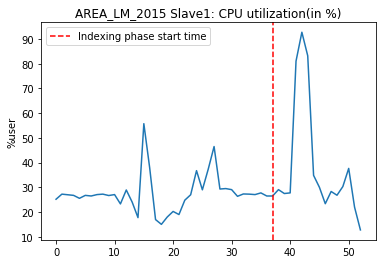

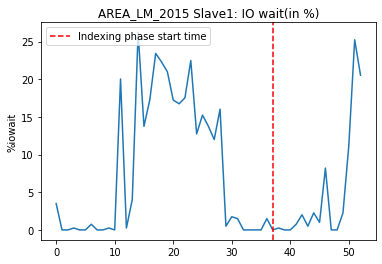

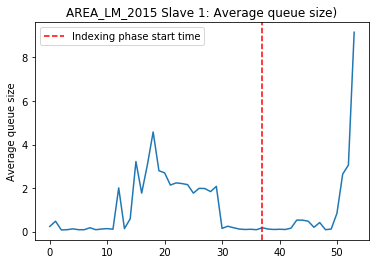

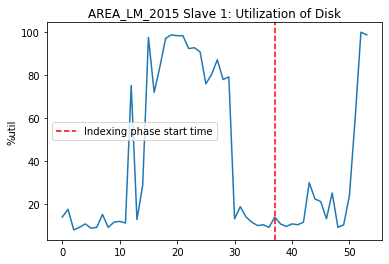

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:308: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


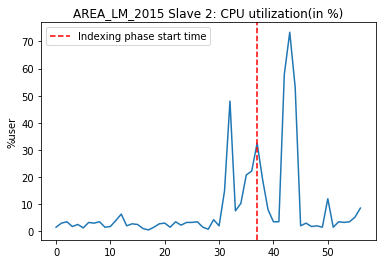

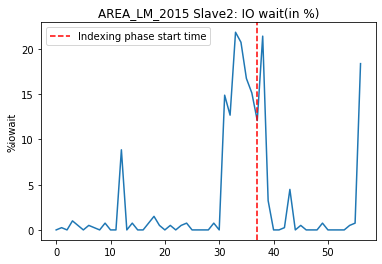

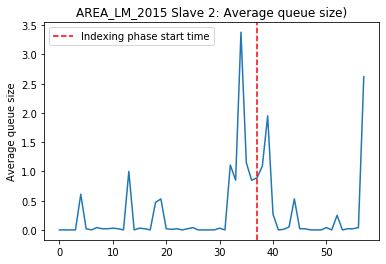

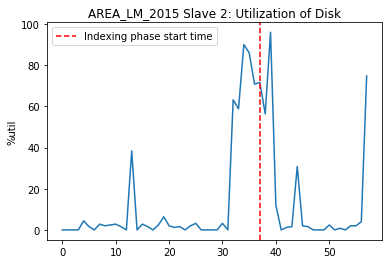

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:418: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


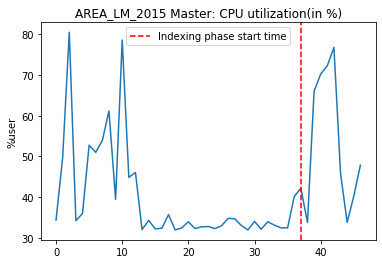

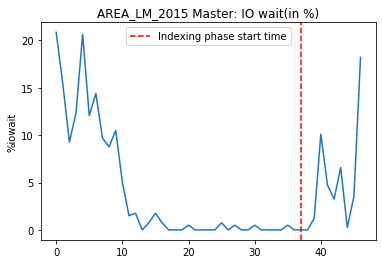

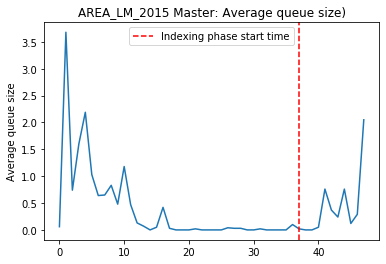

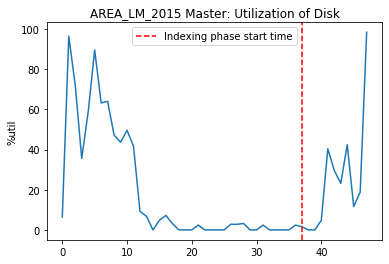

final_data_test                           io_wait                  iops                  r_s  \
AREA_LM_2015  [4.826522592443909]  [187.26487335036185]  [183.7556673052363]   

                               w_s                  util  \
AREA_LM_2015  [3.5092060451255853]  [24.749137931034483]   

                             rkB/s               wkB/s             avgrq-sz  \
AREA_LM_2015  [14844.670923797361]  [65.3880374627501]  [166.1685978075777]   

                          avgqu-sz                await             r_await  \
AREA_LM_2015  [0.6134863239676459]  [3.281257183908046]  [2.88292917198808]   

                         w_await                %idle                 %user  \
AREA_LM_2015  [4.03070668369519]  [67.59869149992606]  [26.000435485877816]   

                           %system  
AREA_LM_2015  [1.3550999035122933]  
              io_wait     iops      r_s      w_s     util    rkB/s   wkB/s  \
AREA_LM_2015  4.82652  187.265  183.756  3.50921  24.7491  14844.7  65.38

In [6]:
#For grid indexing operation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys


slave1_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
#},index=['30GB non-indexed skyline','30GB grid index skyline','40GB non-indexed skyline','40GB grid index skyline','50GB non-indexed skyline','50GB grid index skyline','60GB non-indexed skyline','60GB grid index skyline','70GB non-indexed skyline','70GB grid index skyline','80GB non-indexed skyline','80GB grid index skyline'])
#},index=['30GB grid index','40GB grid index','50GB grid index','60GB grid index','70GB grid index'])
},index=['AREA_LM_2015'])

slave2_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
#},index=['30GB non-indexed skyline','30GB grid index skyline','40GB non-indexed skyline','40GB grid index skyline','50GB non-indexed skyline','50GB grid index skyline','60GB non-indexed skyline','60GB grid index skyline','70GB non-indexed skyline','70GB grid index skyline','80GB non-indexed skyline','80GB grid index skyline'])
#},index=['30GB grid index','40GB grid index','50GB grid index','60GB grid index','70GB grid index'])
},index=['AREA_LM_2015'])

master_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
#},index=['30GB non-indexed skyline','30GB grid index skyline','40GB non-indexed skyline','40GB grid index skyline','50GB non-indexed skyline','50GB grid index skyline','60GB non-indexed skyline','60GB grid index skyline','70GB non-indexed skyline','70GB grid index skyline','80GB non-indexed skyline','80GB grid index skyline'])
#},index=['30GB grid index','40GB grid index','50GB grid index','60GB grid index','70GB grid index'])
},index=['AREA_LM_2015'])

final_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
#},index=['30GB non-indexed skyline','30GB grid index skyline','40GB non-indexed skyline','40GB grid index skyline','50GB non-indexed skyline','50GB grid index skyline','60GB non-indexed skyline','60GB grid index skyline','70GB non-indexed skyline','70GB grid index skyline','80GB non-indexed skyline','80GB grid index skyline'])
#},index=['30GB grid index','40GB grid index','50GB grid index','60GB grid index','70GB grid index'])
},index=['AREA_LM_2015'])

path_graphs='F:/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/real_datasets/indexing/hdd/graphs_trimmed_times_index_grid/'

#files=['job_50gb_skyline_normal_','job_50gb_skyline_grid_','job_50gb_skyline_rtree_','job_60gb_skyline_normal_','job_60gb_skyline_grid_','job_60gb_skyline_rtree_','job_70gb_skyline_normal_','job_70gb_skyline_grid_','job_70gb_skyline_rtree_']
#files=['job_30gb_skyline_','job_30gb_skyline_grid_','job_40gb_skyline_','job_40gb_skyline_grid_','job_50gb_skyline_','job_50gb_skyline_grid_','job_60gb_skyline_','job_60gb_skyline_grid_','job_70gb_skyline_','job_70gb_skyline_grid_','job_80gb_skyline_','job_80gb_skyline_grid_']
#files=['job_30gb_skyline_grid_','job_40gb_skyline_grid_','job_50gb_skyline_grid_','job_60gb_skyline_grid_','job_70gb_skyline_grid_']
#files=['job_30gb_index_grid_','job_40gb_index_grid_','job_50gb_index_grid_','job_60gb_index_grid_','job_70gb_index_grid_']
files=['job_AREA_LM_2015_index_grid_']
path="F:/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/real_datasets/indexing"+'/'
counter=0
#HDD stats
#tests=['test7_8vcores_10vcores','test8_8vcores_10vcores','test9_8vcores_10vcores_reduce1','test10_8vcores_10vcores_reduce2','test12_8vcores_10vcores_reduce3','test13_8vcores_10vcores_reduce3_11520MB']
#tests=['test15_8vcores_10vcores_reduce1_9000MB','test14_8vcores_10vcores_reduce1_11820MB','test16_8vcores_10vcores_reduce1_12920MB']
#tests=['test16_8vcores_10vcores_reduce1_12920MB','test14_8vcores_10vcores_reduce1_11820MB']
tests=['hdd']
all_tests=['test1']


# normal_table=pd.read_table(r"C:/Tejas/PESU/CCBD_researchh/New Tests/disk_op",delim_whitespace=True,header=3,lineterminator='\n')
# #print(table.iloc[:10,:])

# cpu_column_indexes=normal_table.index[normal_table['Device:']=='avg-cpu:'].tolist()

# cpu_stats=[]
# for i in cpu_column_indexes:
#     cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
# cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

# disk_table=normal_table
# disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 



# iowait_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
# r_s_normal=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
# w_s_normal=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
# util_normal=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
# rkbs_normal=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
# wkbs_normal=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
# avgrq_sz_normal=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
# avgqu_sz_normal=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
# await_normal=np.average(pd.to_numeric(disk_table.loc[:,'await']))
# r_await_normal=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
# w_await_normal=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
# user_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
# sys_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
# idle_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

# iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])

# iops_normal=np.average(iops_total)


for test in tests:
    counter=0
    final_data_tests=pd.DataFrame(index=final_data.index,columns=final_data.columns)
    for data in final_data.index:    
        final_data_tests.loc[str(data),'io_wait']=[]
        final_data_tests.loc[str(data),'r_s']=[]
        final_data_tests.loc[str(data),'w_s']=[]
        final_data_tests.loc[str(data),'util']=[]
        final_data_tests.loc[str(data),'iops']=[]
        final_data_tests.loc[str(data),'rkB/s']=[]
        final_data_tests.loc[str(data),'wkB/s']=[]
        final_data_tests.loc[str(data),'avgrq-sz']=[]
        final_data_tests.loc[str(data),'avgqu-sz']=[]
        final_data_tests.loc[str(data),'await']=[]
        final_data_tests.loc[str(data),'r_await']=[]
        final_data_tests.loc[str(data),'w_await']=[]
        final_data_tests.loc[str(data),'%user']=[]
        final_data_tests.loc[str(data),'%system']=[]
        final_data_tests.loc[str(data),'%idle']=[]
    for test_num in all_tests:
        print(test_num)
        diff_time_df=pd.read_excel(path+"ssd_counters_"+test+"_"+test_num+"_grid_index.xlsx",index_col='Size(GB)')
        counter=0
        for data in final_data.index:
            #print(data)
            fp2_slave1=open(path+test+"/"+test_num+'/slave1/'+files[counter]+'master_ssd1','r')
            fp2_slave2=open(path+test+"/"+test_num+'/slave2/'+files[counter]+'master_ssd1','r')
            fp2_master=open(path+test+"/"+test_num+'/master/'+files[counter]+'master_ssd1','r')
            counter+=1

            #Slave1
            #print("Slave1")
            table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table)
            #print(table.iloc[:10,:])
            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                #print(i)
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
            #print("CPu table",cpu_table)
            #print("Here")   
            #print(cpu_column_indexes)
            #for i in cpu_column_indexes:
                #table.drop(table.index[i:i+2],inplace=True)
                #print(i)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print("CPU table",cpu_table.head(),sep='\n')
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
            #print("Disk table",disk_table.head(),sep='\n')
            #print("generated disk and cpu tables")
#             diff_time=diff_time_df.loc[str(data),'diff_time(s)']
#             map_start_time=diff_time_df.loc[str(data),'map_start_diff(s)']
#             map_end_time=diff_time_df.loc[str(data),'map_end_diff(s)']
#             filter_end_time=diff_time_df.loc[str(data),'filter_end_diff(s)']
#             reduce_node=diff_time_df.loc[str(data),'reduce_node']
#             reduce_start_time=diff_time_df.loc[str(data),'reduce_start_time(s)']
#             shuffle_start_time=diff_time_df.loc[str(data),'shuffle_start_time(s)']
            sampling_time=diff_time_df.loc[str(data),'sampling_time(s)']
                
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]

            iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_slave1=np.average(iops_total)

            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%user']))),pd.to_numeric(cpu_table.loc[:,'%user'])+pd.to_numeric(cpu_table.loc[:,'%system']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter end Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            p1=plt.axvline(x=int(sampling_time),color='r',linestyle='--',label='Indexing phase start time')
            plt.legend(handles=[p1])
            plt.title(data+" Slave1: CPU utilization(in %)")
            plt.ylabel("%user")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"cpu_util_ssd.png")
            plt.show()
            
            
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%iowait']))),pd.to_numeric(cpu_table.loc[:,'%iowait']))
            p1=plt.axvline(x=int(sampling_time),color='r',linestyle='--',label='Indexing phase start time')            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter end Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            plt.legend(handles=[p1])
            
            plt.title(data+" Slave1: IO wait(in %)")
            plt.ylabel("%iowait")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"iowait_ssd.png")
            plt.show()
            
            
            
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter end Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            p1=plt.axvline(x=int(sampling_time),color='r',linestyle='--',label='Indexing phase start time')
            plt.legend(handles=[p1])
            
            plt.title(data+" Slave 1: Average queue size)")
            plt.ylabel("Average queue size")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"avgqu_sz_ssd.png")
            plt.show()
            
            
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            p1=plt.axvline(x=int(sampling_time),color='r',linestyle='--',label='Indexing phase start time')
            plt.legend(handles=[p1])
                
            plt.title(data+" Slave 1: Utilization of Disk")
            plt.ylabel("%util")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"util_ssd.png")
            plt.show()
            
            #Not considering slave1
    #         iowait_slave1=0.0
    #         r_s_slave1=0.0
    #         w_s_slave1=0.0
    #         util_slave1=0.0
    #         rkbs_slave1=0.0
    #         wkbs_slave1=0.0
    #         avgrq_sz_slave1=0.0
    #         avgqu_sz_slave1=0.0
    #         await_slave1=0.0
    #         r_await_slave1=0.0
    #         w_await_slave1=0.0
    #         user_slave1=0.0
    #         sys_slave1=0.0
    #         idle_slave1=0.0
    #         iops_slave1=0.0

            #Slave2
            #print("Slave2-----------------------X--------------------------X--------------------")
            table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table.iloc[:10,:])

            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

            #for i in cpu_column_indexes:
               #table.drop(table.index[i:i+2],inplace=True)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print(cpu_table.head())
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
            #print(disk_table.head())
#             diff_time=diff_time_df.loc[str(data),'diff_time(s)']
#             map_start_time=diff_time_df.loc[str(data),'map_start_diff(s)']
#             map_end_time=diff_time_df.loc[str(data),'map_end_diff(s)']
#             filter_end_time=diff_time_df.loc[str(data),'filter_end_diff(s)']
#             reduce_node=diff_time_df.loc[str(data),'reduce_node']
#             reduce_start_time=diff_time_df.loc[str(data),'reduce_start_time(s)']
#             shuffle_start_time=diff_time_df.loc[str(data),'shuffle_start_time(s)']
            sampling_time=diff_time_df.loc[str(data),'sampling_time(s)']
            
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]

            iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_slave2=np.average(iops_total)

            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%user']))),pd.to_numeric(cpu_table.loc[:,'%user'])+pd.to_numeric(cpu_table.loc[:,'%system']))
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            p1=plt.axvline(x=int(sampling_time),color='r',linestyle='--',label='Indexing phase start time')
            plt.legend(handles=[p1])
            
            plt.title(data+" Slave 2: CPU utilization(in %)")
            plt.ylabel("%user")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"cpu_util_ssd.png")
            plt.show()

            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%iowait']))),pd.to_numeric(cpu_table.loc[:,'%iowait']))
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            p1=plt.axvline(x=int(sampling_time),color='r',linestyle='--',label='Indexing phase start time')
            plt.legend(handles=[p1])
            
            plt.title(data+" Slave2: IO wait(in %)")
            plt.ylabel("%iowait")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"iowait_ssd.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            p1=plt.axvline(x=int(sampling_time),color='r',linestyle='--',label='Indexing phase start time')            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            plt.legend(handles=[p1])
            
            plt.title(data+" Slave 2: Average queue size)")
            plt.ylabel("Average queue size")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"avgqu_sz_ssd.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            p1=plt.axvline(x=int(sampling_time),color='r',linestyle='--',label='Indexing phase start time')

            plt.legend(handles=[p1])
                
            plt.title(data+" Slave 2: Utilization of Disk")
            plt.ylabel("%util")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"util_ssd.png")
            plt.show()
            
            #print(w_s_slave1,w_s_slave2)
            #Master
            #print("-----------------------X-----------Master---------------X--------------------")
            table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table.iloc[:10,:])

            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

            #for i in cpu_column_indexes:
               # table.drop(table.index[i:i+2],inplace=True)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print(cpu_table.head())
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
            #print(disk_table.head())
#             diff_time=diff_time_df.loc[str(data),'diff_time(s)']
#             map_start_time=diff_time_df.loc[str(data),'map_start_diff(s)']
#             map_end_time=diff_time_df.loc[str(data),'map_end_diff(s)']
#             filter_end_time=diff_time_df.loc[str(data),'filter_end_diff(s)']
#             reduce_node=diff_time_df.loc[str(data),'reduce_node']
#             reduce_start_time=diff_time_df.loc[str(data),'reduce_start_time(s)']
#             shuffle_start_time=diff_time_df.loc[str(data),'shuffle_start_time(s)']
            sampling_time=diff_time_df.loc[str(data),'sampling_time(s)']
            
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]


            iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_master=np.average(iops_total)

            #print(w_s_slave1,w_s_slave2)
            #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))
            plt.figure()
            
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%user']))),pd.to_numeric(cpu_table.loc[:,'%user'])+pd.to_numeric(cpu_table.loc[:,'%system']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            p1=plt.axvline(x=int(sampling_time),color='r',linestyle='--',label='Indexing phase start time')
            plt.legend(handles=[p1])
            
            plt.title(data+" Master: CPU utilization(in %)")
            plt.ylabel("%user")
            #plt.legend(('Slave1','Slave2','Master'))
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"cpu_util_ssd.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%iowait']))),pd.to_numeric(cpu_table.loc[:,'%iowait']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            p1=plt.axvline(x=int(sampling_time),color='r',linestyle='--',label='Indexing phase start time')
    
            plt.legend(handles=[p1])
                
            plt.title(data+" Master: IO wait(in %)")
            plt.ylabel("%iowait")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"iowait_ssd.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            p1=plt.axvline(x=int(sampling_time),color='r',linestyle='--',label='Indexing phase start time')
            plt.legend(handles=[p1])
                
            plt.title(data+" Master: Average queue size)")
            plt.ylabel("Average queue size")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"avgqu_sz_ssd.png")
            plt.show()
            
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            p1=plt.axvline(x=int(sampling_time),color='r',linestyle='--',label='Indexing phase start time')
            plt.legend(handles=[p1])
                
            plt.title(data+" Master: Utilization of Disk")
            plt.ylabel("%util")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"util_ssd.png")
            plt.show()

            #print(type(data))
            final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
            final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
            final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
            final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
            final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
            final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
            final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
            final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
            final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
            final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
            final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
            final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
            final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
            final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
            final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])
            
            final_data_tests.loc[str(data),'io_wait'].append(final_data.loc[str(data),'io_wait'])
            final_data_tests.loc[str(data),'r_s'].append(final_data.loc[str(data),'r_s'])
            final_data_tests.loc[str(data),'w_s'].append(final_data.loc[str(data),'w_s'])
            final_data_tests.loc[str(data),'util'].append(final_data.loc[str(data),'util'])
            final_data_tests.loc[str(data),'iops'].append(final_data.loc[str(data),'iops'])
            final_data_tests.loc[str(data),'rkB/s'].append(final_data.loc[str(data),'rkB/s'])
            final_data_tests.loc[str(data),'wkB/s'].append(final_data.loc[str(data),'wkB/s'])
            final_data_tests.loc[str(data),'avgrq-sz'].append(final_data.loc[str(data),'avgrq-sz'])
            final_data_tests.loc[str(data),'avgqu-sz'].append(final_data.loc[str(data),'avgqu-sz'])
            final_data_tests.loc[str(data),'await'].append(final_data.loc[str(data),'await'])
            final_data_tests.loc[str(data),'r_await'].append(final_data.loc[str(data),'r_await'])
            final_data_tests.loc[str(data),'w_await'].append(final_data.loc[str(data),'w_await'])
            final_data_tests.loc[str(data),'%user'].append(final_data.loc[str(data),'%user'])
            final_data_tests.loc[str(data),'%system'].append(final_data.loc[str(data),'%system'])
            final_data_tests.loc[str(data),'%idle'].append(final_data.loc[str(data),'%idle'])
            


            slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
            slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
            slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
            slave1_data.loc[str(data),'util']=np.average([util_slave1])
            slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
            slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
            slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
            slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
            slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
            slave1_data.loc[str(data),'await']=np.average([await_slave1])
            slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
            slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
            slave1_data.loc[str(data),'%user']=np.average([user_slave1])
            slave1_data.loc[str(data),'%system']=np.average([sys_slave1])
            slave1_data.loc[str(data),'%idle']=np.average([idle_slave1])


            slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
            slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
            slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
            slave2_data.loc[str(data),'util']=np.average([util_slave2])
            slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
            slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
            slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
            slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
            slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
            slave2_data.loc[str(data),'await']=np.average([await_slave2])
            slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
            slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
            slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
            slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
            slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


            master_data.loc[str(data),'io_wait']=np.average([iowait_master])
            master_data.loc[str(data),'r_s']=np.average([r_s_master])
            master_data.loc[str(data),'w_s']=np.average([w_s_master])
            master_data.loc[str(data),'util']=np.average([util_master])
            master_data.loc[str(data),'iops']=np.average([iops_master])
            master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
            master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
            master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
            master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
            master_data.loc[str(data),'await']=np.average([await_master])
            master_data.loc[str(data),'r_await']=np.average([r_await_master])
            master_data.loc[str(data),'w_await']=np.average([w_await_master])
            master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
            master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
            master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
#final_data.to_csv(path + "again.csv")
        #combine test results

    print("final_data_test",final_data_tests)
    for data in final_data.index:
        final_data_tests.loc[str(data),'io_wait']=np.average(final_data_tests.loc[str(data),'io_wait'])
        final_data_tests.loc[str(data),'r_s']=np.average(final_data_tests.loc[str(data),'r_s'])
        final_data_tests.loc[str(data),'w_s']=np.average(final_data_tests.loc[str(data),'w_s'])
        final_data_tests.loc[str(data),'util']=np.average(final_data_tests.loc[str(data),'util'])
        final_data_tests.loc[str(data),'iops']=np.average(final_data_tests.loc[str(data),'iops'])
        final_data_tests.loc[str(data),'rkB/s']=np.average(final_data_tests.loc[str(data),'rkB/s'])
        final_data_tests.loc[str(data),'wkB/s']=np.average(final_data_tests.loc[str(data),'wkB/s'])
        final_data_tests.loc[str(data),'avgrq-sz']=np.average(final_data_tests.loc[str(data),'avgrq-sz'])
        final_data_tests.loc[str(data),'avgqu-sz']=np.average(final_data_tests.loc[str(data),'avgqu-sz'])
        final_data_tests.loc[str(data),'await']=np.average(final_data_tests.loc[str(data),'await'])
        final_data_tests.loc[str(data),'r_await']=np.average(final_data_tests.loc[str(data),'r_await'])
        final_data_tests.loc[str(data),'w_await']=np.average(final_data_tests.loc[str(data),'w_await'])
        final_data_tests.loc[str(data),'%user']=np.average(final_data_tests.loc[str(data),'%user'])
        final_data_tests.loc[str(data),'%system']=np.average(final_data_tests.loc[str(data),'%system'])
        final_data_tests.loc[str(data),'%idle']=np.average(final_data_tests.loc[str(data),'%idle'])
    print(final_data_tests)
    print(slave1_data)
    print(slave2_data)
    print(master_data)
    #final_data_tests.to_csv(path+'ssd_'+test+'.csv')
    #slave1_data.to_csv(path+'slave1_stats.csv')
    #slave2_data.to_csv(path+'slave2_stats.csv')
    #master_data.to_csv(path+'master_stats.csv')
    
# ##SSD tests   
# for test in tests:
#     counter=0
#     for data in final_data.index:
#         print(data)
#         fp2_slave1=open(path+test+'/slave1/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         fp2_slave2=open(path+test+'/slave2/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         fp2_master=open(path+test+'/master/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         counter+=1

#         #Slave1
#         #print("Slave1")
#         table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table)
#         #print(table.iloc[:10,:])
#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             #print(i)
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
#         #print("CPu table",cpu_table)
#         #print("Here")   
#         #print(cpu_column_indexes)
#         #for i in cpu_column_indexes:
#             #table.drop(table.index[i:i+2],inplace=True)
#             #print(i)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print("CPU table",cpu_table.head(),sep='\n')
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
#         #print("Disk table",disk_table.head(),sep='\n')
#         #print("generated disk and cpu tables")
#         iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_slave1=np.average(iops_total)

#         #Slave2
#         #print("Slave2-----------------------X--------------------------X--------------------")
#         table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table.iloc[:10,:])

#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

#         #for i in cpu_column_indexes:
#            #table.drop(table.index[i:i+2],inplace=True)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print(cpu_table.head())
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
#         #print(disk_table.head())


#         iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_slave2=np.average(iops_total)

#         #print(w_s_slave1,w_s_slave2)
#         #Master
#         #print("-----------------------X-----------Master---------------X--------------------")
#         table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table.iloc[:10,:])

#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

#         #for i in cpu_column_indexes:
#            # table.drop(table.index[i:i+2],inplace=True)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print(cpu_table.head())
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
#         #print(disk_table.head())


#         iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_master=np.average(iops_total)

#         #print(w_s_slave1,w_s_slave2)
#         #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))

#         #print(type(data))
#         final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
#         final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
#         final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
#         final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
#         final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
#         final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
#         final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
#         final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
#         final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
#         final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
#         final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
#         final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
#         final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
#         slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
#         slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
#         slave1_data.loc[str(data),'util']=np.average([util_slave1])
#         slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
#         slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
#         slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
#         slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
#         slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
#         slave1_data.loc[str(data),'await']=np.average([await_slave1])
#         slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
#         slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
#         slave1_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         slave1_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         slave1_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
#         slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
#         slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
#         slave2_data.loc[str(data),'util']=np.average([util_slave2])
#         slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
#         slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
#         slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
#         slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
#         slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
#         slave2_data.loc[str(data),'await']=np.average([await_slave2])
#         slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
#         slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
#         slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         master_data.loc[str(data),'io_wait']=np.average([iowait_master])
#         master_data.loc[str(data),'r_s']=np.average([r_s_master])
#         master_data.loc[str(data),'w_s']=np.average([w_s_master])
#         master_data.loc[str(data),'util']=np.average([util_master])
#         master_data.loc[str(data),'iops']=np.average([iops_master])
#         master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
#         master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
#         master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
#         master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
#         master_data.loc[str(data),'await']=np.average([await_master])
#         master_data.loc[str(data),'r_await']=np.average([r_await_master])
#         master_data.loc[str(data),'w_await']=np.average([w_await_master])
#         master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
# #final_data.to_csv(path + "again.csv")
#     print(final_data)
#     print(slave1_data)
#     print(slave2_data)
#     print(master_data)
#     final_data.to_csv(path+'ssd_'+test+'.csv')

In [6]:
#For Distributed Join
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys


slave1_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
#},index=['30GB non-indexed skyline','30GB grid index skyline','40GB non-indexed skyline','40GB grid index skyline','50GB non-indexed skyline','50GB grid index skyline','60GB non-indexed skyline','60GB grid index skyline','70GB non-indexed skyline','70GB grid index skyline','80GB non-indexed skyline','80GB grid index skyline'])
},index=['200MB X 400MB Grid DJ'])

slave2_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
#},index=['30GB non-indexed skyline','30GB grid index skyline','40GB non-indexed skyline','40GB grid index skyline','50GB non-indexed skyline','50GB grid index skyline','60GB non-indexed skyline','60GB grid index skyline','70GB non-indexed skyline','70GB grid index skyline','80GB non-indexed skyline','80GB grid index skyline'])
},index=['200MB X 400MB Grid DJ'])

master_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
#},index=['30GB non-indexed skyline','30GB grid index skyline','40GB non-indexed skyline','40GB grid index skyline','50GB non-indexed skyline','50GB grid index skyline','60GB non-indexed skyline','60GB grid index skyline','70GB non-indexed skyline','70GB grid index skyline','80GB non-indexed skyline','80GB grid index skyline'])
},index=['200MB X 400MB Grid DJ'])

final_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series()
#},index=['30GB non-indexed skyline','30GB grid index skyline','40GB non-indexed skyline','40GB grid index skyline','50GB non-indexed skyline','50GB grid index skyline','60GB non-indexed skyline','60GB grid index skyline','70GB non-indexed skyline','70GB grid index skyline','80GB non-indexed skyline','80GB grid index skyline'])
},index=['200MB X 400MB Grid DJ'])

path_graphs='C:/Tejas/PESU/CCBD_researchh/New Tests/dj/global_index_dj/FINAL DATA CPU UTIL/graphs_trimmed_times_dj/'

#files=['job_50gb_skyline_normal_','job_50gb_skyline_grid_','job_50gb_skyline_rtree_','job_60gb_skyline_normal_','job_60gb_skyline_grid_','job_60gb_skyline_rtree_','job_70gb_skyline_normal_','job_70gb_skyline_grid_','job_70gb_skyline_rtree_']
#files=['job_30gb_skyline_','job_30gb_skyline_grid_','job_40gb_skyline_','job_40gb_skyline_grid_','job_50gb_skyline_','job_50gb_skyline_grid_','job_60gb_skyline_','job_60gb_skyline_grid_','job_70gb_skyline_','job_70gb_skyline_grid_','job_80gb_skyline_','job_80gb_skyline_grid_']
#files=['job_30gb_skyline_grid_','job_40gb_skyline_grid_','job_50gb_skyline_grid_','job_60gb_skyline_grid_','job_70gb_skyline_grid_']
files=['job_200mb_400mb_dj_grid_']
path="C:/Tejas/PESU/CCBD_researchh/New Tests/dj/global_index_dj/FINAL DATA CPU UTIL"+'/'
counter=0
#HDD stats
#tests=['test7_8vcores_10vcores','test8_8vcores_10vcores','test9_8vcores_10vcores_reduce1','test10_8vcores_10vcores_reduce2','test12_8vcores_10vcores_reduce3','test13_8vcores_10vcores_reduce3_11520MB']
#tests=['test15_8vcores_10vcores_reduce1_9000MB','test14_8vcores_10vcores_reduce1_11820MB','test16_8vcores_10vcores_reduce1_12920MB']
#tests=['test16_8vcores_10vcores_reduce1_12920MB','test14_8vcores_10vcores_reduce1_11820MB']
tests=['test16_8vcores_10vcores_reduce1_12920MB']
all_tests=['test2']


# normal_table=pd.read_table(r"C:/Tejas/PESU/CCBD_researchh/New Tests/disk_op",delim_whitespace=True,header=3,lineterminator='\n')
# #print(table.iloc[:10,:])

# cpu_column_indexes=normal_table.index[normal_table['Device:']=='avg-cpu:'].tolist()

# cpu_stats=[]
# for i in cpu_column_indexes:
#     cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
# cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

# disk_table=normal_table
# disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 



# iowait_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
# r_s_normal=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
# w_s_normal=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
# util_normal=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
# rkbs_normal=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
# wkbs_normal=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
# avgrq_sz_normal=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
# avgqu_sz_normal=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
# await_normal=np.average(pd.to_numeric(disk_table.loc[:,'await']))
# r_await_normal=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
# w_await_normal=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
# user_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
# sys_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
# idle_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

# iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])

# iops_normal=np.average(iops_total)


for test in tests:
    counter=0
    final_data_tests=pd.DataFrame(index=final_data.index,columns=final_data.columns)
    for data in final_data.index:    
        final_data_tests.loc[str(data),'io_wait']=[]
        final_data_tests.loc[str(data),'r_s']=[]
        final_data_tests.loc[str(data),'w_s']=[]
        final_data_tests.loc[str(data),'util']=[]
        final_data_tests.loc[str(data),'iops']=[]
        final_data_tests.loc[str(data),'rkB/s']=[]
        final_data_tests.loc[str(data),'wkB/s']=[]
        final_data_tests.loc[str(data),'avgrq-sz']=[]
        final_data_tests.loc[str(data),'avgqu-sz']=[]
        final_data_tests.loc[str(data),'await']=[]
        final_data_tests.loc[str(data),'r_await']=[]
        final_data_tests.loc[str(data),'w_await']=[]
        final_data_tests.loc[str(data),'%user']=[]
        final_data_tests.loc[str(data),'%system']=[]
        final_data_tests.loc[str(data),'%idle']=[]
    for test_num in all_tests:
        print(test_num)
        diff_time_df=pd.read_excel(path+"ssd_counters_"+test+"_"+test_num+"_dj_grid.xlsx",index_col='Size(GB)')
        counter=0
        for data in final_data.index:
            #print(data)
            fp2_slave1=open(path+test+"/"+test_num+'/slave1/'+files[counter]+'master_ssd1','r')
            fp2_slave2=open(path+test+"/"+test_num+'/slave2/'+files[counter]+'master_ssd1','r')
            fp2_master=open(path+test+"/"+test_num+'/master/'+files[counter]+'master_ssd1','r')
            counter+=1

            #Slave1
            #print("Slave1")
            table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table)
            #print(table.iloc[:10,:])
            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                #print(i)
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
            #print("CPu table",cpu_table)
            #print("Here")   
            #print(cpu_column_indexes)
            #for i in cpu_column_indexes:
                #table.drop(table.index[i:i+2],inplace=True)
                #print(i)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print("CPU table",cpu_table.head(),sep='\n')
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
            #print("Disk table",disk_table.head(),sep='\n')
            #print("generated disk and cpu tables")
#             diff_time=diff_time_df.loc[str(data),'diff_time(s)']
#             map_start_time=diff_time_df.loc[str(data),'map_start_diff(s)']
#             map_end_time=diff_time_df.loc[str(data),'map_end_diff(s)']
#             filter_end_time=diff_time_df.loc[str(data),'filter_end_diff(s)']
#             reduce_node=diff_time_df.loc[str(data),'reduce_node']
#             reduce_start_time=diff_time_df.loc[str(data),'reduce_start_time(s)']
#             shuffle_start_time=diff_time_df.loc[str(data),'shuffle_start_time(s)']
            filter_end_diff=diff_time_df.loc[str(data),'filter_end_diff(s)']
                
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]

            iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_slave1=np.average(iops_total)

            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%user']))),pd.to_numeric(cpu_table.loc[:,'%user'])+pd.to_numeric(cpu_table.loc[:,'%system']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter end Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            p1=plt.axvline(x=int(filter_end_diff),color='r',linestyle='--',label='DJ phase start time')
            plt.legend(handles=[p1])
            plt.title(data+" Slave1: CPU utilization(in %)")
            plt.ylabel("%user")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"cpu_util_ssd.png")
            plt.show()
            
            
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%iowait']))),pd.to_numeric(cpu_table.loc[:,'%iowait']))
            p1=plt.axvline(x=int(filter_end_diff),color='r',linestyle='--',label='DJ phase start time')            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter end Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

            plt.legend(handles=[p1])
            
            plt.title(data+" Slave1: IO wait(in %)")
            plt.ylabel("%iowait")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"iowait_ssd.png")
            plt.show()
            
            
            
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter end Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            p1=plt.axvline(x=int(filter_end_diff),color='r',linestyle='--',label='DJ phase start time')
            plt.legend(handles=[p1])
            
            plt.title(data+" Slave 1: Average queue size)")
            plt.ylabel("Average queue size")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"avgqu_sz_ssd.png")
            plt.show()
            
            
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            p1=plt.axvline(x=int(filter_end_diff),color='r',linestyle='--',label='DJ phase start time')
            plt.legend(handles=[p1])
                
            plt.title(data+" Slave 1: Utilization of Disk")
            plt.ylabel("%util")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"util_ssd.png")
            plt.show()
            
            #Not considering slave1
    #         iowait_slave1=0.0
    #         r_s_slave1=0.0
    #         w_s_slave1=0.0
    #         util_slave1=0.0
    #         rkbs_slave1=0.0
    #         wkbs_slave1=0.0
    #         avgrq_sz_slave1=0.0
    #         avgqu_sz_slave1=0.0
    #         await_slave1=0.0
    #         r_await_slave1=0.0
    #         w_await_slave1=0.0
    #         user_slave1=0.0
    #         sys_slave1=0.0
    #         idle_slave1=0.0
    #         iops_slave1=0.0

            #Slave2
            #print("Slave2-----------------------X--------------------------X--------------------")
            table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table.iloc[:10,:])

            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

            #for i in cpu_column_indexes:
               #table.drop(table.index[i:i+2],inplace=True)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print(cpu_table.head())
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
            #print(disk_table.head())
#             diff_time=diff_time_df.loc[str(data),'diff_time(s)']
#             map_start_time=diff_time_df.loc[str(data),'map_start_diff(s)']
#             map_end_time=diff_time_df.loc[str(data),'map_end_diff(s)']
#             filter_end_time=diff_time_df.loc[str(data),'filter_end_diff(s)']
#             reduce_node=diff_time_df.loc[str(data),'reduce_node']
#             reduce_start_time=diff_time_df.loc[str(data),'reduce_start_time(s)']
#             shuffle_start_time=diff_time_df.loc[str(data),'shuffle_start_time(s)']
            filter_end_diff=diff_time_df.loc[str(data),'filter_end_diff(s)']
            
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]

            iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_slave2=np.average(iops_total)

            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%user']))),pd.to_numeric(cpu_table.loc[:,'%user'])+pd.to_numeric(cpu_table.loc[:,'%system']))
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            p1=plt.axvline(x=int(filter_end_diff),color='r',linestyle='--',label='DJ phase start time')
            plt.legend(handles=[p1])
            
            plt.title(data+" Slave 2: CPU utilization(in %)")
            plt.ylabel("%user")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"cpu_util_ssd.png")
            plt.show()

            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%iowait']))),pd.to_numeric(cpu_table.loc[:,'%iowait']))
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            p1=plt.axvline(x=int(filter_end_diff),color='r',linestyle='--',label='DJ phase start time')
            plt.legend(handles=[p1])
            
            plt.title(data+" Slave2: IO wait(in %)")
            plt.ylabel("%iowait")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"iowait_ssd.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            p1=plt.axvline(x=int(filter_end_diff),color='r',linestyle='--',label='DJ phase start time')            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            plt.legend(handles=[p1])
            
            plt.title(data+" Slave 2: Average queue size)")
            plt.ylabel("Average queue size")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"avgqu_sz_ssd.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            p1=plt.axvline(x=int(filter_end_diff),color='r',linestyle='--',label='DJ phase start time')

            plt.legend(handles=[p1])
                
            plt.title(data+" Slave 2: Utilization of Disk")
            plt.ylabel("%util")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"util_ssd.png")
            plt.show()
            
            #print(w_s_slave1,w_s_slave2)
            #Master
            #print("-----------------------X-----------Master---------------X--------------------")
            table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table.iloc[:10,:])

            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

            #for i in cpu_column_indexes:
               # table.drop(table.index[i:i+2],inplace=True)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print(cpu_table.head())
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
            #print(disk_table.head())
#             diff_time=diff_time_df.loc[str(data),'diff_time(s)']
#             map_start_time=diff_time_df.loc[str(data),'map_start_diff(s)']
#             map_end_time=diff_time_df.loc[str(data),'map_end_diff(s)']
#             filter_end_time=diff_time_df.loc[str(data),'filter_end_diff(s)']
#             reduce_node=diff_time_df.loc[str(data),'reduce_node']
#             reduce_start_time=diff_time_df.loc[str(data),'reduce_start_time(s)']
#             shuffle_start_time=diff_time_df.loc[str(data),'shuffle_start_time(s)']
            filter_end_diff=diff_time_df.loc[str(data),'filter_end_diff(s)']
            
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]


            iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_master=np.average(iops_total)

            #print(w_s_slave1,w_s_slave2)
            #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))
            plt.figure()
            
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%user']))),pd.to_numeric(cpu_table.loc[:,'%user'])+pd.to_numeric(cpu_table.loc[:,'%system']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            p1=plt.axvline(x=int(filter_end_diff),color='r',linestyle='--',label='DJ phase start time')
            plt.legend(handles=[p1])
            
            plt.title(data+" Master: CPU utilization(in %)")
            plt.ylabel("%user")
            #plt.legend(('Slave1','Slave2','Master'))
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"cpu_util_ssd.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(cpu_table.loc[:,'%iowait']))),pd.to_numeric(cpu_table.loc[:,'%iowait']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            p1=plt.axvline(x=int(filter_end_diff),color='r',linestyle='--',label='DJ phase start time')
    
            plt.legend(handles=[p1])
                
            plt.title(data+" Master: IO wait(in %)")
            plt.ylabel("%iowait")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"iowait_ssd.png")
            plt.show()
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            p1=plt.axvline(x=int(filter_end_diff),color='r',linestyle='--',label='DJ phase start time')
            plt.legend(handles=[p1])
                
            plt.title(data+" Master: Average queue size)")
            plt.ylabel("Average queue size")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"avgqu_sz_ssd.png")
            plt.show()
            
            
            plt.figure()
            plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            p1=plt.axvline(x=int(filter_end_diff),color='r',linestyle='--',label='DJ phase start time')
            plt.legend(handles=[p1])
                
            plt.title(data+" Master: Utilization of Disk")
            plt.ylabel("%util")
            plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"util_ssd.png")
            plt.show()

            #print(type(data))
            final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
            final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
            final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
            final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
            final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
            final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
            final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
            final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
            final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
            final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
            final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
            final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
            final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
            final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
            final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])
            
            final_data_tests.loc[str(data),'io_wait'].append(final_data.loc[str(data),'io_wait'])
            final_data_tests.loc[str(data),'r_s'].append(final_data.loc[str(data),'r_s'])
            final_data_tests.loc[str(data),'w_s'].append(final_data.loc[str(data),'w_s'])
            final_data_tests.loc[str(data),'util'].append(final_data.loc[str(data),'util'])
            final_data_tests.loc[str(data),'iops'].append(final_data.loc[str(data),'iops'])
            final_data_tests.loc[str(data),'rkB/s'].append(final_data.loc[str(data),'rkB/s'])
            final_data_tests.loc[str(data),'wkB/s'].append(final_data.loc[str(data),'wkB/s'])
            final_data_tests.loc[str(data),'avgrq-sz'].append(final_data.loc[str(data),'avgrq-sz'])
            final_data_tests.loc[str(data),'avgqu-sz'].append(final_data.loc[str(data),'avgqu-sz'])
            final_data_tests.loc[str(data),'await'].append(final_data.loc[str(data),'await'])
            final_data_tests.loc[str(data),'r_await'].append(final_data.loc[str(data),'r_await'])
            final_data_tests.loc[str(data),'w_await'].append(final_data.loc[str(data),'w_await'])
            final_data_tests.loc[str(data),'%user'].append(final_data.loc[str(data),'%user'])
            final_data_tests.loc[str(data),'%system'].append(final_data.loc[str(data),'%system'])
            final_data_tests.loc[str(data),'%idle'].append(final_data.loc[str(data),'%idle'])
            


            slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
            slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
            slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
            slave1_data.loc[str(data),'util']=np.average([util_slave1])
            slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
            slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
            slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
            slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
            slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
            slave1_data.loc[str(data),'await']=np.average([await_slave1])
            slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
            slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
            slave1_data.loc[str(data),'%user']=np.average([user_slave1])
            slave1_data.loc[str(data),'%system']=np.average([sys_slave1])
            slave1_data.loc[str(data),'%idle']=np.average([idle_slave1])


            slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
            slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
            slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
            slave2_data.loc[str(data),'util']=np.average([util_slave2])
            slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
            slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
            slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
            slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
            slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
            slave2_data.loc[str(data),'await']=np.average([await_slave2])
            slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
            slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
            slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
            slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
            slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


            master_data.loc[str(data),'io_wait']=np.average([iowait_master])
            master_data.loc[str(data),'r_s']=np.average([r_s_master])
            master_data.loc[str(data),'w_s']=np.average([w_s_master])
            master_data.loc[str(data),'util']=np.average([util_master])
            master_data.loc[str(data),'iops']=np.average([iops_master])
            master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
            master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
            master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
            master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
            master_data.loc[str(data),'await']=np.average([await_master])
            master_data.loc[str(data),'r_await']=np.average([r_await_master])
            master_data.loc[str(data),'w_await']=np.average([w_await_master])
            master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
            master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
            master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
#final_data.to_csv(path + "again.csv")
        #combine test results

    print("final_data_test",final_data_tests)
    for data in final_data.index:
        final_data_tests.loc[str(data),'io_wait']=np.average(final_data_tests.loc[str(data),'io_wait'])
        final_data_tests.loc[str(data),'r_s']=np.average(final_data_tests.loc[str(data),'r_s'])
        final_data_tests.loc[str(data),'w_s']=np.average(final_data_tests.loc[str(data),'w_s'])
        final_data_tests.loc[str(data),'util']=np.average(final_data_tests.loc[str(data),'util'])
        final_data_tests.loc[str(data),'iops']=np.average(final_data_tests.loc[str(data),'iops'])
        final_data_tests.loc[str(data),'rkB/s']=np.average(final_data_tests.loc[str(data),'rkB/s'])
        final_data_tests.loc[str(data),'wkB/s']=np.average(final_data_tests.loc[str(data),'wkB/s'])
        final_data_tests.loc[str(data),'avgrq-sz']=np.average(final_data_tests.loc[str(data),'avgrq-sz'])
        final_data_tests.loc[str(data),'avgqu-sz']=np.average(final_data_tests.loc[str(data),'avgqu-sz'])
        final_data_tests.loc[str(data),'await']=np.average(final_data_tests.loc[str(data),'await'])
        final_data_tests.loc[str(data),'r_await']=np.average(final_data_tests.loc[str(data),'r_await'])
        final_data_tests.loc[str(data),'w_await']=np.average(final_data_tests.loc[str(data),'w_await'])
        final_data_tests.loc[str(data),'%user']=np.average(final_data_tests.loc[str(data),'%user'])
        final_data_tests.loc[str(data),'%system']=np.average(final_data_tests.loc[str(data),'%system'])
        final_data_tests.loc[str(data),'%idle']=np.average(final_data_tests.loc[str(data),'%idle'])
    print(final_data_tests)
    print(slave1_data)
    print(slave2_data)
    print(master_data)
    #final_data_tests.to_csv(path+'ssd_'+test+'.csv')
    #slave1_data.to_csv(path+'slave1_stats.csv')
    #slave2_data.to_csv(path+'slave2_stats.csv')
    #master_data.to_csv(path+'master_stats.csv')
    
# ##SSD tests   
# for test in tests:
#     counter=0
#     for data in final_data.index:
#         print(data)
#         fp2_slave1=open(path+test+'/slave1/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         fp2_slave2=open(path+test+'/slave2/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         fp2_master=open(path+test+'/master/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         counter+=1

#         #Slave1
#         #print("Slave1")
#         table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table)
#         #print(table.iloc[:10,:])
#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             #print(i)
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
#         #print("CPu table",cpu_table)
#         #print("Here")   
#         #print(cpu_column_indexes)
#         #for i in cpu_column_indexes:
#             #table.drop(table.index[i:i+2],inplace=True)
#             #print(i)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print("CPU table",cpu_table.head(),sep='\n')
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
#         #print("Disk table",disk_table.head(),sep='\n')
#         #print("generated disk and cpu tables")
#         iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_slave1=np.average(iops_total)

#         #Slave2
#         #print("Slave2-----------------------X--------------------------X--------------------")
#         table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table.iloc[:10,:])

#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

#         #for i in cpu_column_indexes:
#            #table.drop(table.index[i:i+2],inplace=True)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print(cpu_table.head())
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
#         #print(disk_table.head())


#         iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_slave2=np.average(iops_total)

#         #print(w_s_slave1,w_s_slave2)
#         #Master
#         #print("-----------------------X-----------Master---------------X--------------------")
#         table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table.iloc[:10,:])

#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

#         #for i in cpu_column_indexes:
#            # table.drop(table.index[i:i+2],inplace=True)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print(cpu_table.head())
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
#         #print(disk_table.head())


#         iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_master=np.average(iops_total)

#         #print(w_s_slave1,w_s_slave2)
#         #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))

#         #print(type(data))
#         final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
#         final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
#         final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
#         final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
#         final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
#         final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
#         final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
#         final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
#         final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
#         final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
#         final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
#         final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
#         final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
#         slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
#         slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
#         slave1_data.loc[str(data),'util']=np.average([util_slave1])
#         slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
#         slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
#         slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
#         slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
#         slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
#         slave1_data.loc[str(data),'await']=np.average([await_slave1])
#         slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
#         slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
#         slave1_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         slave1_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         slave1_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
#         slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
#         slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
#         slave2_data.loc[str(data),'util']=np.average([util_slave2])
#         slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
#         slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
#         slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
#         slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
#         slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
#         slave2_data.loc[str(data),'await']=np.average([await_slave2])
#         slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
#         slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
#         slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         master_data.loc[str(data),'io_wait']=np.average([iowait_master])
#         master_data.loc[str(data),'r_s']=np.average([r_s_master])
#         master_data.loc[str(data),'w_s']=np.average([w_s_master])
#         master_data.loc[str(data),'util']=np.average([util_master])
#         master_data.loc[str(data),'iops']=np.average([iops_master])
#         master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
#         master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
#         master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
#         master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
#         master_data.loc[str(data),'await']=np.average([await_master])
#         master_data.loc[str(data),'r_await']=np.average([r_await_master])
#         master_data.loc[str(data),'w_await']=np.average([w_await_master])
#         master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
# #final_data.to_csv(path + "again.csv")
#     print(final_data)
#     print(slave1_data)
#     print(slave2_data)
#     print(master_data)
#     final_data.to_csv(path+'ssd_'+test+'.csv')

test2


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Tejas/PESU/CCBD_researchh/New Tests/dj/global_index_dj/FINAL DATA CPU UTIL/ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test2_dj_grid.xlsx'

In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path_graphs='C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_ssd/FINAL DATA CPU UTIL/'
df=pd.read_excel(path_graphs+"final_results.xlsx",index_col='Job')
#df=df.dropna()
l_9gb=[x for x in df.index if '9GB' in x.split()]
l_12gb=[x for x in df.index if '12GB' in x.split()]
l_13gb=[x for x in df.index if '13GB' in x.split()]
df.index

Index(['30GB non-indexed skyline 13GB', '30GB grid index skyline 13GB',
       '40GB non-indexed skyline 13GB', '40GB grid index skyline 13GB',
       '50GB non-indexed skyline 13GB', '50GB grid index skyline 13GB',
       '60GB non-indexed skyline 13GB', '60GB grid index skyline 13GB',
       '70GB non-indexed skyline 13GB', '70GB grid index skyline 13GB',
       '80GB non-indexed skyline 13GB', '80GB grid index skyline 13GB',
       '30GB non-indexed skyline 12GB', '30GB grid index skyline 12GB',
       '40GB non-indexed skyline 12GB', '40GB grid index skyline 12GB',
       '50GB non-indexed skyline 12GB', '50GB grid index skyline 12GB',
       '60GB non-indexed skyline 12GB', '60GB grid index skyline 12GB',
       '70GB non-indexed skyline 12GB', '70GB grid index skyline 12GB',
       '80GB non-indexed skyline 12GB', '80GB grid index skyline 12GB',
       '30GB non-indexed skyline 9GB', '30GB grid index skyline  9GB',
       '40GB non-indexed skyline  9GB', '40GB grid index skyline 

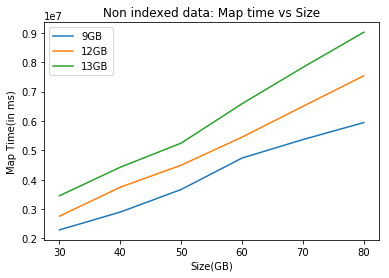

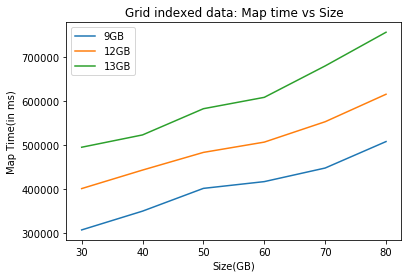

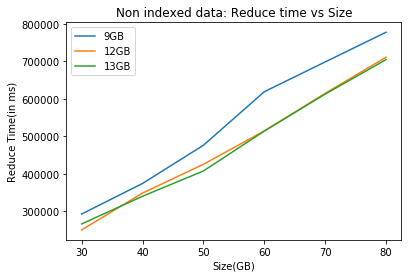

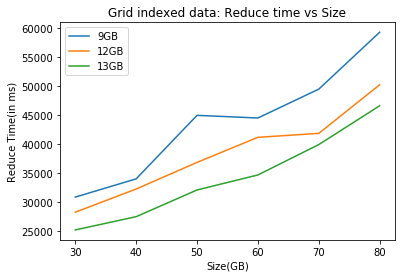

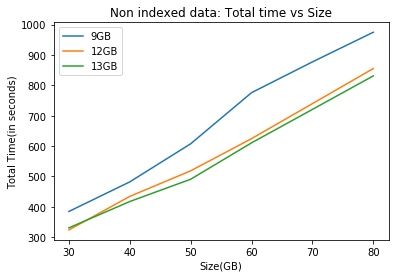

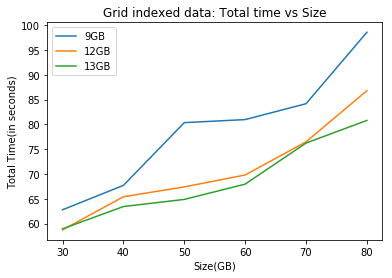

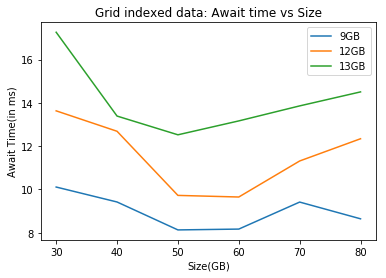

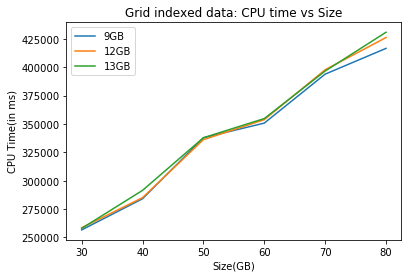

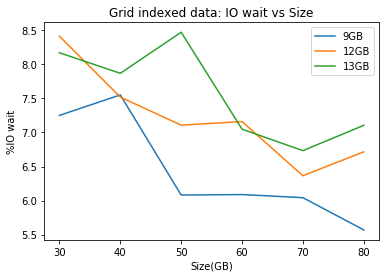

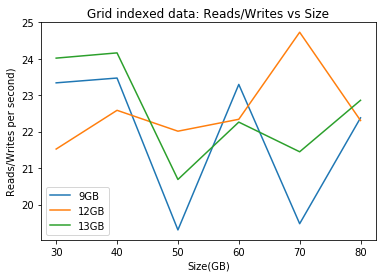

In [7]:
l_9gb_non_indexed=[x for x in l_9gb if 'non-indexed' in x.split()]
l_12gb_non_indexed=[x for x in l_12gb if 'non-indexed' in x.split()]
l_13gb_non_indexed=[x for x in l_13gb if 'non-indexed' in x.split()]
l_9gb_grid_indexed=[x for x in l_9gb if 'grid' in x.split()]
l_12gb_grid_indexed=[x for x in l_12gb if 'grid' in x.split()]
l_13gb_grid_indexed=[x for x in l_13gb if 'grid' in x.split()]

#Non-indexed data map time
plt.figure()
plt.plot(['30','40','50','60','70','80'],df.ix[l_9gb_non_indexed,'map_time(ms)'])
plt.plot(['30','40','50','60','70','80'],df.ix[l_12gb_non_indexed,'map_time(ms)'])
plt.plot(['30','40','50','60','70','80'],df.ix[l_13gb_non_indexed,'map_time(ms)'])
plt.xlabel("Size(GB)")
plt.ylabel("Map Time(in ms)")
plt.title("Non indexed data: Map time vs Size")
plt.legend(('9GB','12GB','13GB'))
plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_ssd/FINAL DATA CPU UTIL/graphs/"+"compare_map_time_non_indexed.png")
plt.show()

#Grid indexed data map time
plt.figure()
plt.plot(['30','40','50','60','70','80'],df.ix[l_9gb_grid_indexed,'map_time(ms)'])
plt.plot(['30','40','50','60','70','80'],df.ix[l_12gb_grid_indexed,'map_time(ms)'])
plt.plot(['30','40','50','60','70','80'],df.ix[l_13gb_grid_indexed,'map_time(ms)'])
plt.xlabel("Size(GB)")
plt.ylabel("Map Time(in ms)")
plt.title("Grid indexed data: Map time vs Size")
plt.legend(('9GB','12GB','13GB'))
plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_ssd/FINAL DATA CPU UTIL/graphs/"+"compare_map_time_grid_indexed.png")
plt.show()

#Non indexed data reduce time
plt.figure()
plt.plot(['30','40','50','60','70','80'],df.ix[l_9gb_non_indexed,'reduce_time(ms)'])
plt.plot(['30','40','50','60','70','80'],df.ix[l_12gb_non_indexed,'reduce_time(ms)'])
plt.plot(['30','40','50','60','70','80'],df.ix[l_13gb_non_indexed,'reduce_time(ms)'])
plt.xlabel("Size(GB)")
plt.ylabel("Reduce Time(in ms)")
plt.title("Non indexed data: Reduce time vs Size")
plt.legend(('9GB','12GB','13GB'))
plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_ssd/FINAL DATA CPU UTIL/graphs/"+"compare_reduce_time_non_indexed.png")
plt.show()

#Grid indexed data reduce time
plt.figure()
plt.plot(['30','40','50','60','70','80'],df.ix[l_9gb_grid_indexed,'reduce_time(ms)'])
plt.plot(['30','40','50','60','70','80'],df.ix[l_12gb_grid_indexed,'reduce_time(ms)'])
plt.plot(['30','40','50','60','70','80'],df.ix[l_13gb_grid_indexed,'reduce_time(ms)'])
plt.xlabel("Size(GB)")
plt.ylabel("Reduce Time(in ms)")
plt.title("Grid indexed data: Reduce time vs Size")
plt.legend(('9GB','12GB','13GB'))
plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_ssd/FINAL DATA CPU UTIL/graphs/"+"compare_reduce_time_grid_indexed.png")
plt.show()


#Non-indexed total time
plt.figure()
plt.plot(['30','40','50','60','70','80'],df.ix[l_9gb_non_indexed,'total_time(s)'])
plt.plot(['30','40','50','60','70','80'],df.ix[l_12gb_non_indexed,'total_time(s)'])
plt.plot(['30','40','50','60','70','80'],df.ix[l_13gb_non_indexed,'total_time(s)'])
plt.xlabel("Size(GB)")
plt.ylabel("Total Time(in seconds)")
plt.title("Non indexed data: Total time vs Size")
plt.legend(('9GB','12GB','13GB'))
plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_ssd/FINAL DATA CPU UTIL/graphs/"+"compare_total_time_non_indexed.png")
plt.show()

#Grid indexed total time
plt.figure()
plt.plot(['30','40','50','60','70','80'],df.ix[l_9gb_grid_indexed,'total_time(s)'])
plt.plot(['30','40','50','60','70','80'],df.ix[l_12gb_grid_indexed,'total_time(s)'])
plt.plot(['30','40','50','60','70','80'],df.ix[l_13gb_grid_indexed,'total_time(s)'])
plt.xlabel("Size(GB)")
plt.ylabel("Total Time(in seconds)")
plt.title("Grid indexed data: Total time vs Size")
plt.legend(('9GB','12GB','13GB'))
plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_ssd/FINAL DATA CPU UTIL/graphs/"+"compare_total_time_grid_indexed.png")
plt.show()

#Grid indexed total time
plt.figure()
plt.plot(['30','40','50','60','70','80'],df.ix[l_9gb_grid_indexed,'await'])
plt.plot(['30','40','50','60','70','80'],df.ix[l_12gb_grid_indexed,'await'])
plt.plot(['30','40','50','60','70','80'],df.ix[l_13gb_grid_indexed,'await'])
plt.xlabel("Size(GB)")
plt.ylabel("Await Time(in ms)")
plt.title("Grid indexed data: Await time vs Size")
plt.legend(('9GB','12GB','13GB'))
plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_ssd/FINAL DATA CPU UTIL/graphs/"+"compare_await_time_grid_indexed.png")
plt.show()

#Grid indexed total time
plt.figure()
plt.plot(['30','40','50','60','70','80'],df.ix[l_9gb_grid_indexed,'cpu_time(ms)'])
plt.plot(['30','40','50','60','70','80'],df.ix[l_12gb_grid_indexed,'cpu_time(ms)'])
plt.plot(['30','40','50','60','70','80'],df.ix[l_13gb_grid_indexed,'cpu_time(ms)'])
plt.xlabel("Size(GB)")
plt.ylabel("CPU Time(in ms)")
plt.title("Grid indexed data: CPU time vs Size")
plt.legend(('9GB','12GB','13GB'))
plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_ssd/FINAL DATA CPU UTIL/graphs/"+"compare_cpu_time_grid_indexed.png")
plt.show()

plt.figure()
plt.plot(['30','40','50','60','70','80'],df.ix[l_9gb_grid_indexed,'io_wait'])
plt.plot(['30','40','50','60','70','80'],df.ix[l_12gb_grid_indexed,'io_wait'])
plt.plot(['30','40','50','60','70','80'],df.ix[l_13gb_grid_indexed,'io_wait'])
plt.xlabel("Size(GB)")
plt.ylabel("%IO wait")
plt.title("Grid indexed data: IO wait vs Size")
plt.legend(('9GB','12GB','13GB'))
plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_ssd/FINAL DATA CPU UTIL/graphs/"+"compare_iowait_time_grid_indexed.png")
plt.show()

plt.figure()
plt.plot(['30','40','50','60','70','80'],df.ix[l_9gb_grid_indexed,'r_s']/df.ix[l_9gb_grid_indexed,'w_s'])
plt.plot(['30','40','50','60','70','80'],df.ix[l_12gb_grid_indexed,'r_s']/df.ix[l_12gb_grid_indexed,'w_s'])
plt.plot(['30','40','50','60','70','80'],df.ix[l_13gb_grid_indexed,'r_s']/df.ix[l_13gb_grid_indexed,'w_s'])
plt.xlabel("Size(GB)")
plt.ylabel("Reads/Writes per second)")
plt.title("Grid indexed data: Reads/Writes vs Size")
plt.legend(('9GB','12GB','13GB'))
plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_ssd/FINAL DATA CPU UTIL/graphs/"+"compare_rw_grid_indexed.png")
plt.show()

C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline/FINAL DATA CPU UTIL/
Index(['Unnamed: 0', '%idle', '%system', '%user', 'avgqu-sz', 'avgrq-sz',
       'await', 'io_wait', 'iops', 'r_await', 'r_s', 'rkB/s', 'util',
       'w_await', 'w_s', 'wkB/s'],
      dtype='object')


C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


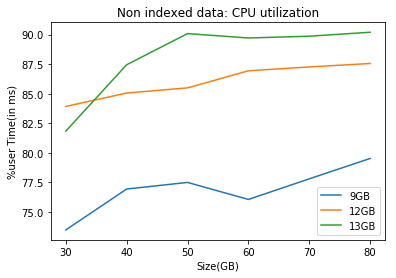

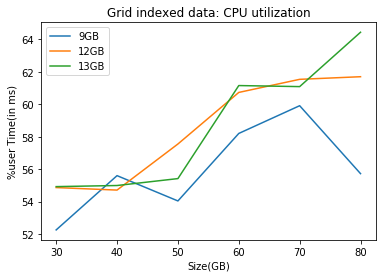

In [25]:
files_to_read=['hdd_test15_8vcores_10vcores_reduce1_9000MB.csv','hdd_test14_8vcores_10vcores_reduce1_11820MB.csv','hdd_test16_8vcores_10vcores_reduce1_12920MB.csv']
print(path)
df_9gb=pd.read_csv(path+files_to_read[0])
df_12gb=pd.read_csv(path+files_to_read[1])
df_13gb=pd.read_csv(path+files_to_read[2])
print(df_9gb.columns)
df_9gb=df_9gb.set_index('Unnamed: 0')
df_12gb=df_12gb.set_index('Unnamed: 0')
df_13gb=df_13gb.set_index('Unnamed: 0')


l_9gb_non_indexed=[x for x in df_9gb.index if 'non-indexed' in x.split()]
l_12gb_non_indexed=[x for x in df_12gb.index if 'non-indexed' in x.split()]
l_13gb_non_indexed=[x for x in df_13gb.index if 'non-indexed' in x.split()]

l_9gb_grid_indexed=[x for x in df_9gb.index if 'grid' in x.split()]
l_12gb_grid_indexed=[x for x in df_12gb.index if 'grid' in x.split()]
l_13gb_grid_indexed=[x for x in df_13gb.index if 'grid' in x.split()]

#non indexed data User time
plt.figure()
plt.plot(['30','40','50','60','70','80'],df_9gb.ix[l_9gb_non_indexed,'%system']+df_9gb.ix[l_9gb_non_indexed,'%user'])
plt.plot(['30','40','50','60','70','80'],df_12gb.ix[l_12gb_non_indexed,'%system']+df_12gb.ix[l_12gb_non_indexed,'%user'])
plt.plot(['30','40','50','60','70','80'],df_13gb.ix[l_13gb_non_indexed,'%system']+df_13gb.ix[l_13gb_non_indexed,'%user'])
plt.xlabel("Size(GB)")
plt.ylabel("%user Time(in ms)")
plt.title("Non indexed data: CPU utilization")
plt.legend(('9GB','12GB','13GB'))
plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline/FINAL DATA CPU UTIL/graphs/"+"compare_cpu_util_non_indexed.png")
plt.show()

#Grid indexed data User time
plt.figure()
plt.plot(['30','40','50','60','70','80'],df_9gb.ix[l_9gb_grid_indexed,'%system']+df_9gb.ix[l_9gb_grid_indexed,'%user'])
plt.plot(['30','40','50','60','70','80'],df_12gb.ix[l_12gb_grid_indexed,'%system']+df_12gb.ix[l_12gb_grid_indexed,'%user'])
plt.plot(['30','40','50','60','70','80'],df_13gb.ix[l_13gb_grid_indexed,'%system']+df_13gb.ix[l_13gb_grid_indexed,'%user'])
plt.xlabel("Size(GB)")
plt.ylabel("%user Time(in ms)")
plt.title("Grid indexed data: CPU utilization")
plt.legend(('9GB','12GB','13GB'))
plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline/FINAL DATA CPU UTIL/graphs/"+"compare_cpu_util_grid_indexed.png")
plt.show()

l_9gb_grid_indexed=[x for x in df_9gb.index if 'grid-indexed' in x.split()]
l_12gb_grid_indexed=[x for x in df_12gb.index if 'grid-indexed' in x.split()]
l_13gb_grid_indexed=[x for x in df_13gb.index if 'grid-indexed' in x.split()]

total time full ssd [(55.5175, 2.682500000000001), (56.2905, 2.5625), (64.03299999999999, 1.9709999999999965), (66.1945, 3.274499999999996), (72.41649999999998, 0.6174999999999997)]


/usr/local/lib/python3.5/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f19c187fba8>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.5/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f19c1867a20>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.5/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f19c17d4710>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-ar

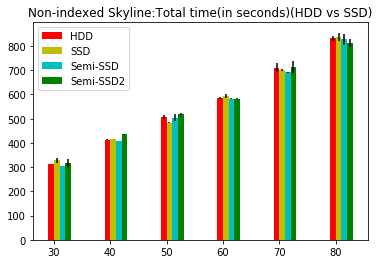

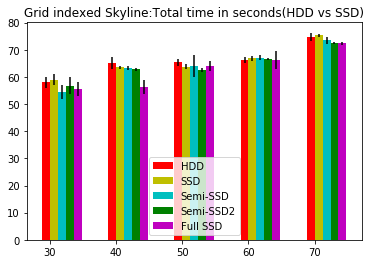

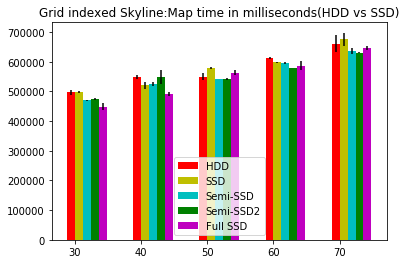

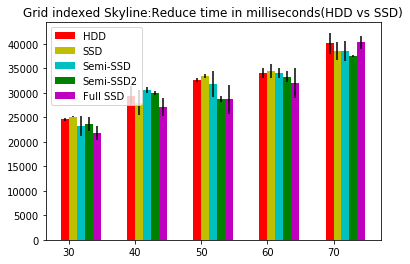

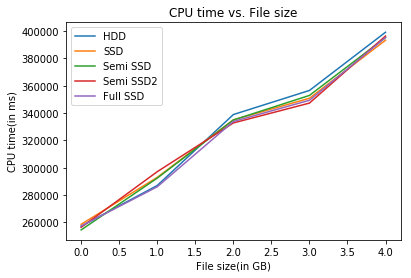

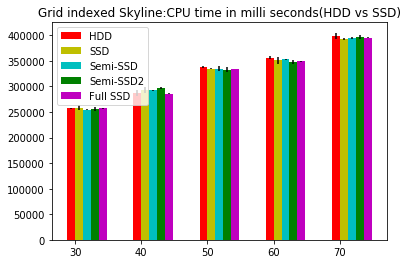

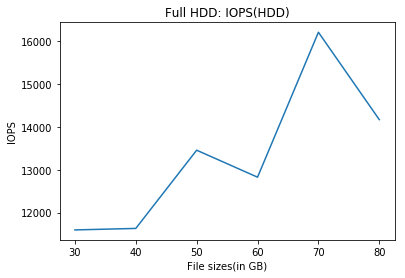

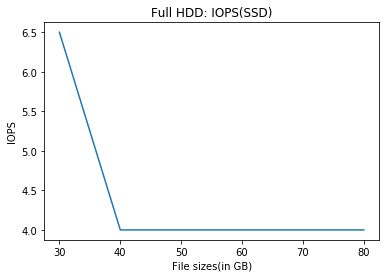

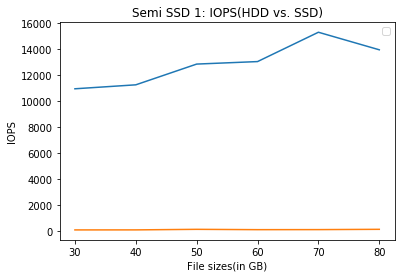

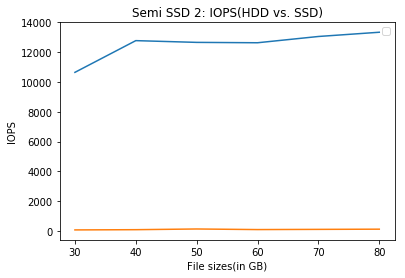

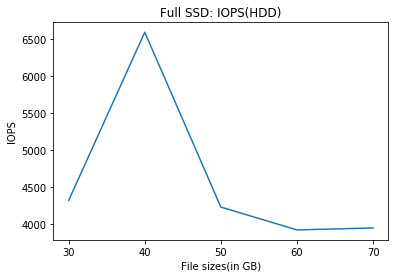

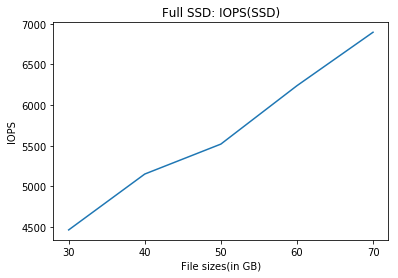

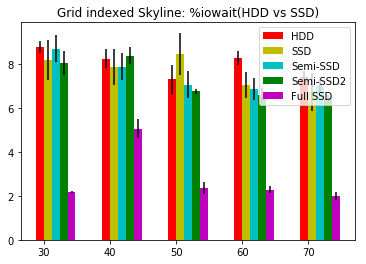

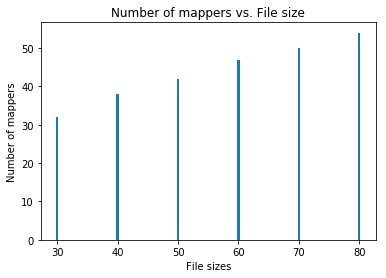

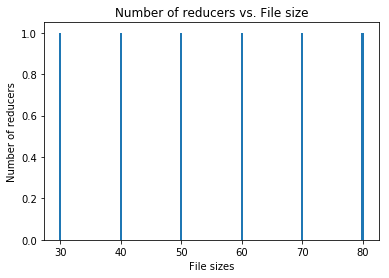

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df2_test1=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_ssd/FINAL DATA CPU UTIL/ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')
df2_test2=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_ssd/FINAL DATA CPU UTIL/ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test3.csv",index_col='Size(GB)')

df_test1=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline/FINAL DATA CPU UTIL/ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')
df_test2=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline/FINAL DATA CPU UTIL/ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test3.csv",index_col='Size(GB)')

df_semi_test1=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/skyline_semi_ssd/FINAL DATA CPU UTIL/ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')
df_semi_test2=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/skyline_semi_ssd/FINAL DATA CPU UTIL/ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test3.csv",index_col='Size(GB)')

df_semi2_test1=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_semi_ssd2/FINAL DATA CPU UTIL/ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test1.csv",index_col='Size(GB)')
df_semi2_test2=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_semi_ssd2/FINAL DATA CPU UTIL/ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')

df3_test1=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/skyline_ssd/FINAL DATA CPU UTIL/ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test1.csv",index_col='Size(GB)')
df3_test2=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/skyline_ssd/FINAL DATA CPU UTIL/ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')



df2_test1.fillna(0,inplace=True)
df2_test2.fillna(0,inplace=True)

df_test2.fillna(0,inplace=True)
df_test1.fillna(0,inplace=True)

df_semi_test1.fillna(0,inplace=True)
df_semi_test2.fillna(0,inplace=True)

df_semi2_test1.fillna(0,inplace=True)
df_semi2_test2.fillna(0,inplace=True)

df3_test1.fillna(0,inplace=True)
df3_test2.fillna(0,inplace=True)

# iowait_hdd_test1=df.loc[df.index.str.contains("non-indexed Range Query"),'io_wait']
# iops_hdd_test1=df.loc[df.index.str.contains("non-indexed Range Query"),'iops']
# r_s_hdd_test1=df.loc[df.index.str.contains("non-indexed Range Query"),'r_s']
# w_s_hdd_test1=df.loc[df.index.str.contains("non-indexed Range Query"),'w_s']
# util_hdd_test1=df.loc[df.index.str.contains("non-indexed Range Query"),'util']
#maptime_hdd=df.loc[df.index.str.contains("non-indexed Range Query"),'map_time(ms)']
#reducetime_hdd=df.loc[df.index.str.contains("non-indexed Range Query"),'reduce_time(ms)']

# r_await_hdd_test1=df.loc[df.index.str.contains("non-indexed Range Query"),'r_await']
# w_await_hdd_test1=df.loc[df.index.str.contains("non-indexed Range Query"),'w_await']
# rkbs_hdd_test1=df.loc[df.index.str.contains("non-indexed Range Query"),'rkB/s']
# wkbs_hdd_test1=df.loc[df.index.str.contains("non-indexed Range Query"),'wkB/s']
# avgrq_sz_hdd_test1=df.loc[df.index.str.contains("non-indexed Range Query"),'avgrq-sz']
# avgqu_sz_hdd_test1=df.loc[df.index.str.contains("non-indexed Range Query"),'avgqu-sz']
#idle_hdd_test1=df.loc[df.index.str.contains("non-indexed Range Query"),'%idle']
#user_hdd_test1=df_test1.loc[df_test1.index.str.contains("non-indexed skyline"),'%user']
#sys_hdd_test1=df_test1.loc[df_test1.index.str.contains("non-indexed skyline"),'%system']
total_time_hdd_test1=df_test1.loc[df_test1.index.str.contains("non-indexed skyline"),'total_time(s)']
#await_hdd_test1=df_test1.loc[df_test1.index.str.contains("non-indexed skyline"),'await']
#cputime_hdd_test1=df_test1.loc[df_test1.index.str.contains("non-indexed skyline"),'cpu_time(ms)']

#user_hdd_test2=df_test2.loc[df_test2.index.str.contains("non-indexed skyline"),'%user']
#sys_hdd_test2=df_test2.loc[df_test2.index.str.contains("non-indexed skyline"),'%system']
total_time_hdd_test2=df_test2.loc[df_test2.index.str.contains("non-indexed skyline"),'total_time(s)']
#await_hdd_test2=df_test2.loc[df_test2.index.str.contains("non-indexed skyline"),'await']
#cputime_hdd_test2=df_test2.loc[df_test2.index.str.contains("non-indexed skyline"),'cpu_time(ms)']

#user_hdd=[(np.mean(x),np.std(x)) for x in list(zip(user_hdd_test1,user_hdd_test2))]
#sys_hdd=[(np.mean(x),np.std(x)) for x in list(zip(sys_hdd_test1,sys_hdd_test2))]
total_time_hdd=[(np.mean(x),np.std(x)) for x in list(zip(total_time_hdd_test1,total_time_hdd_test2))]
#await_hdd=[(np.mean(x),np.std(x)) for x in list(zip(await_hdd_test1,await_hdd_test2))]
#cputime_hdd=[(np.mean(x),np.std(x)) for x in list(zip(cputime_hdd_test1,cputime_hdd_test2))]



#user_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("non-indexed skyline"),'%user']
#sys_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("non-indexed skyline"),'%system']
total_time_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("non-indexed skyline"),'total_time(s)']
#await_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("non-indexed skyline"),'await']
#cputime_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("non-indexed skyline"),'cpu_time(ms)']

#user_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("non-indexed skyline"),'%user']
#sys_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("non-indexed skyline"),'%system']
total_time_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("non-indexed skyline"),'total_time(s)']
#await_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("non-indexed skyline"),'await']
#cputime_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("non-indexed skyline"),'cpu_time(ms)']

#user_ssd=[(np.mean(x),np.std(x)) for x in list(zip(user_ssd_test1,user_ssd_test2))]
#sys_ssd=[(np.mean(x),np.std(x)) for x in list(zip(sys_ssd_test1,sys_ssd_test2))]
total_time_ssd=[(np.mean(x),np.std(x)) for x in list(zip(total_time_ssd_test1,total_time_ssd_test2))]
#await_ssd=[(np.mean(x),np.std(x)) for x in list(zip(await_ssd_test1,await_ssd_test2))]
#cputime_ssd=[(np.mean(x),np.std(x)) for x in list(zip(cputime_ssd_test1,cputime_ssd_test2))]

total_time_semi_ssd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("non-indexed skyline"),'total_time(s)']

total_time_semi_ssd_test2=df_semi_test2.loc[df_semi_test2.index.str.contains("non-indexed skyline"),'total_time(s)']

total_time_semi_ssd=[(np.mean(x),np.std(x)) for x in list(zip(total_time_semi_ssd_test1,total_time_semi_ssd_test2))]


total_time_semi_ssd2_test1=df_semi2_test1.loc[df_semi2_test1.index.str.contains("non-indexed skyline"),'total_time(s)']

total_time_semi_ssd2_test2=df_semi2_test2.loc[df_semi2_test2.index.str.contains("non-indexed skyline"),'total_time(s)']

total_time_semi_ssd2=[(np.mean(x),np.std(x)) for x in list(zip(total_time_semi_ssd2_test1,total_time_semi_ssd2_test2))]

fig, ax = plt.subplots()
ind = np.arange(6)    # the x locations for the groups
width = 0.1         # the width of the bars
p1 = ax.bar(ind, [x[0] for x in total_time_hdd], width, color='r', yerr=[x[1] for x in total_time_hdd])

p2 = ax.bar(ind + width, [x[0] for x in total_time_ssd], width,
            color='y', yerr=[x[1] for x in total_time_ssd])

p3 = ax.bar(ind + 2*width, [x[0] for x in total_time_semi_ssd], width,
            color='c', yerr=[x[1] for x in total_time_semi_ssd])

p4 = ax.bar(ind + 3*width, [x[0] for x in total_time_semi_ssd2], width,
            color='g', yerr=[x[1] for x in total_time_semi_ssd2])

ax.set_title('Non-indexed Skyline:Total time(in seconds)(HDD vs SSD)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('30','40','50','60','70','80'))

ax.legend((p1[0], p2[0],p3[0],p4[0]), ('HDD', 'SSD','Semi-SSD','Semi-SSD2'))
#ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.savefig("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/skyline_total_time.png")


#Grid range query
#idle_hdd_test1=df.loc[df.index.str.contains("non-indexed Range Query"),'%idle']
#user_hdd_test1=df_test1.loc[df_test1.index.str.contains("non-indexed skyline"),'%user']
#sys_hdd_test1=df_test1.loc[df_test1.index.str.contains("non-indexed skyline"),'%system']
total_time_hdd_test1=df_test1.loc[df_test1.index.str.contains("grid index skyline"),'total_time(s)']
map_time_hdd_test1=df_test1.loc[df_test1.index.str.contains("grid index skyline"),'map_time(ms)']

#await_hdd_test1=df_test1.loc[df_test1.index.str.contains("non-indexed skyline"),'await']
cputime_hdd_test1=df_test1.loc[df_test1.index.str.contains("grid index skyline"),'cpu_time(ms)']

#user_hdd_test2=df_test2.loc[df_test2.index.str.contains("non-indexed skyline"),'%user']
#sys_hdd_test2=df_test2.loc[df_test2.index.str.contains("non-indexed skyline"),'%system']
total_time_hdd_test2=df_test2.loc[df_test2.index.str.contains("grid index skyline"),'total_time(s)']
map_time_hdd_test2=df_test2.loc[df_test2.index.str.contains("grid index skyline"),'map_time(ms)']

#await_hdd_test2=df_test2.loc[df_test2.index.str.contains("non-indexed skyline"),'await']
cputime_hdd_test2=df_test2.loc[df_test2.index.str.contains("grid index skyline"),'cpu_time(ms)']

#user_hdd=[(np.mean(x),np.std(x)) for x in list(zip(user_hdd_test1,user_hdd_test2))]
#sys_hdd=[(np.mean(x),np.std(x)) for x in list(zip(sys_hdd_test1,sys_hdd_test2))]
total_time_hdd=[(np.mean(x),np.std(x)) for x in list(zip(total_time_hdd_test1,total_time_hdd_test2))]
map_time_hdd=[(np.mean(x),np.std(x)) for x in list(zip(map_time_hdd_test1,map_time_hdd_test2))]

#await_hdd=[(np.mean(x),np.std(x)) for x in list(zip(await_hdd_test1,await_hdd_test2))]
cputime_hdd=[(np.mean(x),np.std(x)) for x in list(zip(cputime_hdd_test1,cputime_hdd_test2))]



#user_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("non-indexed skyline"),'%user']
#sys_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("non-indexed skyline"),'%system']
total_time_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("grid index skyline"),'total_time(s)']
map_time_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("grid index skyline"),'map_time(ms)']
#await_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("non-indexed skyline"),'await']
cputime_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("grid index skyline"),'cpu_time(ms)']

#user_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("non-indexed skyline"),'%user']
#sys_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("non-indexed skyline"),'%system']
total_time_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("grid index skyline"),'total_time(s)']
map_time_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("grid index skyline"),'map_time(ms)']
#await_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("non-indexed skyline"),'await']
cputime_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("grid index skyline"),'cpu_time(ms)']

#user_ssd=[(np.mean(x),np.std(x)) for x in list(zip(user_ssd_test1,user_ssd_test2))]
#sys_ssd=[(np.mean(x),np.std(x)) for x in list(zip(sys_ssd_test1,sys_ssd_test2))]
total_time_ssd=[(np.mean(x),np.std(x)) for x in list(zip(total_time_ssd_test1,total_time_ssd_test2))]
map_time_ssd=[(np.mean(x),np.std(x)) for x in list(zip(map_time_ssd_test1,map_time_ssd_test2))]

#await_ssd=[(np.mean(x),np.std(x)) for x in list(zip(await_ssd_test1,await_ssd_test2))]
cputime_ssd=[(np.mean(x),np.std(x)) for x in list(zip(cputime_ssd_test1,cputime_ssd_test2))]

total_time_semi_ssd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("grid index skyline"),'total_time(s)']
map_time_semi_ssd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("grid index skyline"),'map_time(ms)']
cputime_semi_ssd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("grid index skyline"),'cpu_time(ms)']


total_time_semi_ssd_test2=df_semi_test2.loc[df_semi_test2.index.str.contains("grid index skyline"),'total_time(s)']
map_time_semi_ssd_test2=df_semi_test2.loc[df_semi_test2.index.str.contains("grid index skyline"),'map_time(ms)']
cputime_semi_ssd_test2=df_semi_test2.loc[df_semi_test2.index.str.contains("grid index skyline"),'cpu_time(ms)']


total_time_semi_ssd=[(np.mean(x),np.std(x)) for x in list(zip(total_time_semi_ssd_test1,total_time_semi_ssd_test2))]
map_time_semi_ssd=[(np.mean(x),np.std(x)) for x in list(zip(map_time_semi_ssd_test1,map_time_semi_ssd_test2))]
cputime_semi_ssd=[(np.mean(x),np.std(x)) for x in list(zip(cputime_semi_ssd_test1,cputime_semi_ssd_test2))]


total_time_semi_ssd2_test1=df_semi2_test1.loc[df_semi2_test1.index.str.contains("grid index skyline"),'total_time(s)']
map_time_semi_ssd2_test1=df_semi2_test1.loc[df_semi2_test1.index.str.contains("grid index skyline"),'map_time(ms)']
cputime_semi_ssd2_test1=df_semi2_test1.loc[df_semi2_test1.index.str.contains("grid index skyline"),'cpu_time(ms)']


total_time_semi_ssd2_test2=df_semi2_test2.loc[df_semi2_test2.index.str.contains("grid index skyline"),'total_time(s)']
map_time_semi_ssd2_test2=df_semi2_test2.loc[df_semi2_test2.index.str.contains("grid index skyline"),'map_time(ms)']
cputime_semi_ssd2_test2=df_semi2_test2.loc[df_semi2_test2.index.str.contains("grid index skyline"),'cpu_time(ms)']


total_time_semi_ssd2=[(np.mean(x),np.std(x)) for x in list(zip(total_time_semi_ssd2_test1,total_time_semi_ssd2_test2))]
map_time_semi_ssd2=[(np.mean(x),np.std(x)) for x in list(zip(map_time_semi_ssd2_test1,map_time_semi_ssd2_test2))]
cputime_semi_ssd2=[(np.mean(x),np.std(x)) for x in list(zip(cputime_semi_ssd2_test1,cputime_semi_ssd2_test2))]

#Full SSD config
total_time_full_ssd_test1=df3_test1.loc[df3_test1.index.str.contains("grid index skyline"),'total_time(s)']
map_time_full_ssd_test1=df3_test1.loc[df3_test1.index.str.contains("grid index skyline"),'map_time(ms)']
cputime_full_ssd_test1=df3_test1.loc[df3_test1.index.str.contains("grid index skyline"),'cpu_time(ms)']


total_time_full_ssd_test2=df3_test2.loc[df3_test2.index.str.contains("grid index skyline"),'total_time(s)']
map_time_full_ssd_test2=df3_test2.loc[df3_test2.index.str.contains("grid index skyline"),'map_time(ms)']
cputime_full_ssd_test2=df3_test2.loc[df3_test2.index.str.contains("grid index skyline"),'cpu_time(ms)']


total_time_full_ssd=[(np.mean(x),np.std(x)) for x in list(zip(total_time_full_ssd_test1,total_time_full_ssd_test2))]
map_time_full_ssd=[(np.mean(x),np.std(x)) for x in list(zip(map_time_full_ssd_test1,map_time_full_ssd_test2))]
cputime_full_ssd=[(np.mean(x),np.std(x)) for x in list(zip(cputime_full_ssd_test1,cputime_full_ssd_test2))]


reduce_time_hdd_test1=df_test1.loc[df_test1.index.str.contains("grid index skyline"),'reduce_time(ms)']
reduce_time_hdd_test2=df_test2.loc[df_test2.index.str.contains("grid index skyline"),'reduce_time(ms)']
reduce_time_hdd=[(np.mean(x),np.std(x)) for x in list(zip(reduce_time_hdd_test1,reduce_time_hdd_test2))]

reduce_time_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("grid index skyline"),'reduce_time(ms)']
reduce_time_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("grid index skyline"),'reduce_time(ms)']
reduce_time_ssd=[(np.mean(x),np.std(x)) for x in list(zip(reduce_time_ssd_test1,reduce_time_ssd_test2))]

reduce_time_semi_ssd2_test1=df_semi2_test1.loc[df_semi2_test1.index.str.contains("grid index skyline"),'reduce_time(ms)']
reduce_time_semi_ssd2_test2=df_semi2_test2.loc[df_semi2_test2.index.str.contains("grid index skyline"),'reduce_time(ms)']
reduce_time_semi_ssd2=[(np.mean(x),np.std(x)) for x in list(zip(reduce_time_semi_ssd2_test1,reduce_time_semi_ssd2_test2))]

reduce_time_semi_ssd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("grid index skyline"),'reduce_time(ms)']
reduce_time_semi_ssd_test2=df_semi_test2.loc[df_semi_test2.index.str.contains("grid index skyline"),'reduce_time(ms)']
reduce_time_semi_ssd=[(np.mean(x),np.std(x)) for x in list(zip(reduce_time_semi_ssd_test1,reduce_time_semi_ssd_test2))]

reduce_time_full_ssd_test1=df3_test1.loc[df3_test1.index.str.contains("grid index skyline"),'reduce_time(ms)']
reduce_time_full_ssd_test2=df3_test2.loc[df3_test2.index.str.contains("grid index skyline"),'reduce_time(ms)']
reduce_time_full_ssd=[(np.mean(x),np.std(x)) for x in list(zip(reduce_time_full_ssd_test1,reduce_time_full_ssd_test2))]

print("total time full ssd",total_time_full_ssd)

fig, ax = plt.subplots()
ind = np.arange(5)    # the x locations for the groups
width = 0.12         # the width of the bars
p1 = ax.bar(ind, [x[0] for x in total_time_hdd][:-1], width, color='r', yerr=[x[1] for x in total_time_hdd][:-1])

p2 = ax.bar(ind + width, [x[0] for x in total_time_ssd][:-1], width,
            color='y', yerr=[x[1] for x in total_time_ssd][:-1])


p3 = ax.bar(ind + 2*width, [x[0] for x in total_time_semi_ssd][:-1], width,
            color='c', yerr=[x[1] for x in total_time_semi_ssd][:-1])

p4 = ax.bar(ind + 3*width, [x[0] for x in total_time_semi_ssd2][:-1], width,
            color='g', yerr=[x[1] for x in total_time_semi_ssd2][:-1])

p5 = ax.bar(ind + 4*width, [x[0] for x in total_time_full_ssd], width,
            color='m', yerr=[x[1] for x in total_time_full_ssd])

ax.set_title('Grid indexed Skyline:Total time in seconds(HDD vs SSD)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('30','40','50','60','70'))

ax.legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('HDD', 'SSD','Semi-SSD','Semi-SSD2','Full SSD'))
#ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.savefig("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/skyline_grid_total_time.png")

#Map Time
fig, ax = plt.subplots()
ind = np.arange(5)    # the x locations for the groups
width = 0.12         # the width of the bars
p1 = ax.bar(ind, [x[0] for x in map_time_hdd[:-1]], width, color='r', yerr=[x[1] for x in map_time_hdd[:-1]])

p2 = ax.bar(ind + width, [x[0] for x in map_time_ssd[:-1]], width,
            color='y', yerr=[x[1] for x in map_time_ssd[:-1]])


p3 = ax.bar(ind + 2*width, [x[0] for x in map_time_semi_ssd[:-1]], width,
            color='c', yerr=[x[1] for x in map_time_semi_ssd[:-1]])

p4 = ax.bar(ind + 3*width, [x[0] for x in map_time_semi_ssd2[:-1]], width,
            color='g', yerr=[x[1] for x in map_time_semi_ssd2[:-1]])

p5 = ax.bar(ind + 4*width, [x[0] for x in map_time_full_ssd], width,
            color='m', yerr=[x[1] for x in map_time_full_ssd])

ax.set_title('Grid indexed Skyline:Map time in milliseconds(HDD vs SSD)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('30','40','50','60','70'))

ax.legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('HDD', 'SSD','Semi-SSD','Semi-SSD2','Full SSD'))
#ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.savefig("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/skyline_grid_map_time.png")


#Reduce Time
fig, ax = plt.subplots()
ind = np.arange(5)    # the x locations for the groups
width = 0.12         # the width of the bars
p1 = ax.bar(ind, [x[0] for x in reduce_time_hdd[:-1]], width, color='r', yerr=[x[1] for x in reduce_time_hdd[:-1]])

p2 = ax.bar(ind + width, [x[0] for x in reduce_time_ssd[:-1]], width,
            color='y', yerr=[x[1] for x in reduce_time_ssd[:-1]])


p3 = ax.bar(ind + 2*width, [x[0] for x in reduce_time_semi_ssd[:-1]], width,
            color='c', yerr=[x[1] for x in reduce_time_semi_ssd[:-1]])

p4 = ax.bar(ind + 3*width, [x[0] for x in reduce_time_semi_ssd2[:-1]], width,
            color='g', yerr=[x[1] for x in reduce_time_semi_ssd2[:-1]])

p5 = ax.bar(ind + 4*width, [x[0] for x in reduce_time_full_ssd], width,
            color='m', yerr=[x[1] for x in reduce_time_full_ssd])

ax.set_title('Grid indexed Skyline:Reduce time in milliseconds(HDD vs SSD)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('30','40','50','60','70'))

ax.legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('HDD', 'SSD','Semi-SSD','Semi-SSD2','Full SSD'))
#ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.savefig("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/skyline_grid_reduce_time.png")

#Comparing CPU time
plt.figure()
plt.plot(np.arange(5),[x[0] for x in cputime_hdd[:-1]])
plt.plot(np.arange(5),[x[0] for x in cputime_ssd[:-1]])
plt.plot(np.arange(5),[x[0] for x in cputime_semi_ssd[:-1]])
plt.plot(np.arange(5),[x[0] for x in cputime_semi_ssd2[:-1]])
plt.plot(np.arange(5),[x[0] for x in cputime_full_ssd])
plt.title("CPU time vs. File size")
plt.ylabel("CPU time(in ms)")
plt.xlabel("File size(in GB)")
plt.legend(("HDD","SSD","Semi SSD","Semi SSD2","Full SSD"))
plt.savefig("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/skyline_grid_cpu_time.png")

#Comparing CPU Time 2
fig, ax = plt.subplots()
ind = np.arange(5)    # the x locations for the groups
width = 0.12         # the width of the bars
p1 = ax.bar(ind, [x[0] for x in cputime_hdd[:-1]], width, color='r', yerr=[x[1] for x in cputime_hdd[:-1]])

p2 = ax.bar(ind + width, [x[0] for x in cputime_ssd[:-1]], width,
            color='y', yerr=[x[1] for x in cputime_ssd[:-1]])


p3 = ax.bar(ind + 2*width, [x[0] for x in cputime_semi_ssd[:-1]], width,
            color='c', yerr=[x[1] for x in cputime_semi_ssd[:-1]])

p4 = ax.bar(ind + 3*width, [x[0] for x in cputime_semi_ssd2[:-1]], width,
            color='g', yerr=[x[1] for x in cputime_semi_ssd2[:-1]])

p5 = ax.bar(ind + 4*width, [x[0] for x in cputime_full_ssd], width,
            color='m', yerr=[x[1] for x in cputime_full_ssd])

ax.set_title('Grid indexed Skyline:CPU time in milli seconds(HDD vs SSD)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('30','40','50','60','70'))

ax.legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('HDD', 'SSD','Semi-SSD','Semi-SSD2','Full SSD'))
#ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.savefig("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/skyline_grid_cpu_time_2.png")



###############################################################################################################################
df2_test1=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_ssd/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')
df2_test2=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_ssd/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test3.csv",index_col='Size(GB)')
df2_test3=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_ssd/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test4.csv",index_col='Size(GB)')


df_test1=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')
df_test2=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test3.csv",index_col='Size(GB)')

df_semi_test1=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/skyline_semi_ssd/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test1.csv",index_col='Size(GB)')
df_semi_test2=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/skyline_semi_ssd/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')
df_semi_test3=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/skyline_semi_ssd/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test3.csv",index_col='Size(GB)')


df_semi2_test1=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_semi_ssd2/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test1.csv",index_col='Size(GB)')
df_semi2_test2=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_semi_ssd2/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')
#df_semi2_test3=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_semi_ssd2/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test3.csv",index_col='Size(GB)')

df3_test1=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/skyline_ssd/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test1.csv",index_col='Size(GB)')
df3_test2=pd.read_csv("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/skyline_ssd/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')


df2_test1.fillna(0,inplace=True)
df2_test2.fillna(0,inplace=True)

df_test2.fillna(0,inplace=True)
df_test1.fillna(0,inplace=True)

df_semi_test1.fillna(0,inplace=True)
df_semi_test2.fillna(0,inplace=True)

df_semi2_test1.fillna(0,inplace=True)
df_semi2_test2.fillna(0,inplace=True)

df3_test2.fillna(0,inplace=True)
df3_test1.fillna(0,inplace=True)

#IOPS Total
iops_total_hdd_test1=df_test1.loc[df_test1.index.str.contains("grid index skyline"),'iops_total_hdd']
iops_total_hdd_test2=df_test2.loc[df_test2.index.str.contains("grid index skyline"),'iops_total_hdd']
iops_total_hdd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_hdd_test1,iops_total_hdd_test2))]

iops_total_ssd_test1=df_test1.loc[df_test1.index.str.contains("grid index skyline"),'iops_total_ssd']
iops_total_ssd_test2=df_test2.loc[df_test2.index.str.contains("grid index skyline"),'iops_total_ssd']
iops_total_ssd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_ssd_test1,iops_total_ssd_test2))]

#Comparing IOPS total for global_index_skyline
plt.figure()
p1=plt.plot(('30','40','50','60','70','80'),[x[0] for x in iops_total_hdd])
plt.xlabel("File sizes(in GB)")
plt.ylabel("IOPS")
plt.title("Full HDD: IOPS(HDD)")
plt.savefig("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/skyline_grid_iops_hdd_global_index_skyline.png")

plt.figure()
p1=plt.plot(('30','40','50','60','70','80'),[x[0] for x in iops_total_ssd])
plt.xlabel("File sizes(in GB)")
plt.ylabel("IOPS")
plt.title("Full HDD: IOPS(SSD)")
plt.savefig("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/skyline_grid_iops_ssd_global_index_skyline.png")

#Comparing IOPS for skyline_semi_ssd
iops_total_hdd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("grid index skyline"),'iops_total_hdd']
iops_total_hdd_test2=df_semi_test2.loc[df_semi_test2.index.str.contains("grid index skyline"),'iops_total_hdd']
iops_total_hdd_test3=df_semi_test3.loc[df_semi_test3.index.str.contains("grid index skyline"),'iops_total_hdd']
iops_total_hdd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_hdd_test1,iops_total_hdd_test2,iops_total_hdd_test3))]

iops_total_ssd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("grid index skyline"),'iops_total_ssd']
iops_total_ssd_test2=df_semi_test2.loc[df_semi_test2.index.str.contains("grid index skyline"),'iops_total_ssd']
iops_total_ssd_test3=df_semi_test3.loc[df_semi_test3.index.str.contains("grid index skyline"),'iops_total_ssd']
iops_total_ssd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_ssd_test1,iops_total_ssd_test2,iops_total_ssd_test3))]

plt.figure()
p1=plt.plot(('30','40','50','60','70','80'),[x[0] for x in iops_total_hdd])
p2=plt.plot(('30','40','50','60','70','80'),[x[0] for x in iops_total_ssd])
plt.xlabel("File sizes(in GB)")
plt.ylabel("IOPS")
plt.title("Semi SSD 1: IOPS(HDD vs. SSD)")
plt.legend((p1,p2),('HDD','SSD'))
plt.savefig("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/skyline_grid_iops_skyline_semi_ssd.png")

# plt.figure()
# p1=plt.plot(('30','40','50','60','70','80'),[x[0] for x in iops_total_ssd])
# plt.xlabel("File sizes(in GB)")
# plt.ylabel("IOPS")
# plt.title("Semi SSD 1: IOPS(SSD)")
# plt.savefig("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/skyline_grid_iops_ssd_skyline_semi_ssd.png")

#Comparing IOPS for global_index_skyline_semi_ssd2
iops_total_hdd_test1=df_semi2_test1.loc[df_semi2_test1.index.str.contains("grid index skyline"),'iops_total_hdd']
iops_total_hdd_test2=df_semi2_test2.loc[df_semi2_test2.index.str.contains("grid index skyline"),'iops_total_hdd']
iops_total_hdd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_hdd_test1,iops_total_hdd_test2))]

iops_total_ssd_test1=df_semi2_test1.loc[df_semi2_test1.index.str.contains("grid index skyline"),'iops_total_ssd']
iops_total_ssd_test2=df_semi2_test2.loc[df_semi2_test2.index.str.contains("grid index skyline"),'iops_total_ssd']
iops_total_ssd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_ssd_test1,iops_total_ssd_test2))]

plt.figure()
p1=plt.plot(('30','40','50','60','70','80'),[x[0] for x in iops_total_hdd])
p2=plt.plot(('30','40','50','60','70','80'),[x[0] for x in iops_total_ssd])
plt.xlabel("File sizes(in GB)")
plt.ylabel("IOPS")
plt.title("Semi SSD 2: IOPS(HDD vs. SSD)")
plt.legend((p1,p2),('HDD','SSD'))
plt.savefig("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/skyline_grid_iops_global_index_skyline_semi_ssd2.png")

# plt.figure()
# p1=plt.plot(('30','40','50','60','70','80'),[x[0] for x in iops_total_ssd])
# plt.xlabel("File sizes(in GB)")
# plt.ylabel("IOPS")
# plt.title("Semi SSD 2: IOPS(SSD)")
# plt.savefig("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/skyline_grid_iops_ssd_global_index_skyline_semi_ssd2.png")


#Comparing IOPS for full ssd
iops_total_hdd_test1=df3_test1.loc[df3_test1.index.str.contains("grid index skyline"),'iops_total_hdd']
iops_total_hdd_test2=df3_test2.loc[df3_test2.index.str.contains("grid index skyline"),'iops_total_hdd']
iops_total_hdd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_hdd_test1,iops_total_hdd_test2))]

iops_total_ssd_test1=df3_test1.loc[df3_test1.index.str.contains("grid index skyline"),'iops_total_ssd']
iops_total_ssd_test2=df3_test2.loc[df3_test2.index.str.contains("grid index skyline"),'iops_total_ssd']
iops_total_ssd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_ssd_test1,iops_total_ssd_test2))]

#Comparing IOPS total for skyline_ssd
plt.figure()
p1=plt.plot(('30','40','50','60','70'),[x[0] for x in iops_total_hdd])
plt.xlabel("File sizes(in GB)")
plt.ylabel("IOPS")
plt.title("Full SSD: IOPS(HDD)")
plt.savefig("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/skyline_grid_iops_hdd_skyline_ssd.png")

plt.figure()
p1=plt.plot(('30','40','50','60','70'),[x[0] for x in iops_total_ssd])
plt.xlabel("File sizes(in GB)")
plt.ylabel("IOPS")
plt.title("Full SSD: IOPS(SSD)")
plt.savefig("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/skyline_grid_iops_ssd_skyline_ssd.png")

# iops_total_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("grid index skyline"),'iops_total_hdd']
# iops_total_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("grid index skyline"),'iops_total_hdd']
# iops_total_ssd_test3=df2_test3.loc[df2_test3.index.str.contains("grid index skyline"),'iops_total_hdd']
# iops_total_ssd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_ssd_test1,iops_total_ssd_test2,iops_total_ssd_test3))]

# iops_total_semi_ssd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("grid index skyline"),'iops_total_hdd']
# iops_total_semi_ssd_test2=df_semi_test2.loc[df_semi_test2.index.str.contains("grid index skyline"),'iops_total_hdd']
# iops_total_semi_ssd_test3=df_semi_test3.loc[df_semi_test3.index.str.contains("grid index skyline"),'iops_total_hdd']
# iops_total_semi_ssd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_semi_ssd_test1,iops_total_semi_ssd_test2,iops_total_semi_ssd_test3))]

# iops_total_semi_ssd2_test1=df_semi2_test1.loc[df_semi2_test1.index.str.contains("grid index skyline"),'iops_total_hdd']
# iops_total_semi_ssd2_test2=df_semi2_test2.loc[df_semi2_test2.index.str.contains("grid index skyline"),'iops_total_hdd']
# iops_total_semi_ssd2=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_semi_ssd2_test1,iops_total_semi_ssd2_test2))]

iowait_hdd_test1=df_test1.loc[df_test1.index.str.contains("grid index skyline"),'io_wait']
iowait_hdd_test2=df_test2.loc[df_test2.index.str.contains("grid index skyline"),'io_wait']
iowait_hdd=[(np.mean(x),np.std(x)) for x in list(zip(iowait_hdd_test1,iowait_hdd_test2))]

iowait_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("grid index skyline"),'io_wait']
iowait_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("grid index skyline"),'io_wait']
iowait_ssd_test3=df2_test3.loc[df2_test3.index.str.contains("grid index skyline"),'io_wait']
iowait_ssd=[(np.mean(x),np.std(x)) for x in list(zip(iowait_ssd_test1,iowait_ssd_test2,iowait_ssd_test3))]

iowait_semi_ssd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("grid index skyline"),'io_wait']
iowait_semi_ssd_test2=df_semi_test2.loc[df_semi_test2.index.str.contains("grid index skyline"),'io_wait']
iowait_semi_ssd_test3=df_semi_test3.loc[df_semi_test3.index.str.contains("grid index skyline"),'io_wait']
iowait_semi_ssd=[(np.mean(x),np.std(x)) for x in list(zip(iowait_semi_ssd_test1,iowait_semi_ssd_test2,iowait_semi_ssd_test3))]

iowait_semi_ssd2_test1=df_semi2_test1.loc[df_semi2_test1.index.str.contains("grid index skyline"),'io_wait']
iowait_semi_ssd2_test2=df_semi2_test2.loc[df_semi2_test2.index.str.contains("grid index skyline"),'io_wait']
iowait_semi_ssd2=[(np.mean(x),np.std(x)) for x in list(zip(iowait_semi_ssd2_test1,iowait_semi_ssd2_test2))]

iowait_full_ssd_test1=df3_test1.loc[df3_test1.index.str.contains("grid index skyline"),'io_wait']
iowait_full_ssd_test2=df3_test2.loc[df3_test2.index.str.contains("grid index skyline"),'io_wait']
iowait_full_ssd=[(np.mean(x),np.std(x)) for x in list(zip(iowait_full_ssd_test1,iowait_full_ssd_test2))]

#Comparing iowait time
fig, ax = plt.subplots()
ind = np.arange(5)    # the x locations for the groups
width = 0.12         # the width of the bars
p1 = ax.bar(ind, [x[0] for x in iowait_hdd[:-1]], width, color='r', yerr=[x[1] for x in iowait_hdd[:-1]])

p2 = ax.bar(ind + width, [x[0] for x in iowait_ssd[:-1]], width,
            color='y', yerr=[x[1] for x in iowait_ssd[:-1]])


p3 = ax.bar(ind + 2*width, [x[0] for x in iowait_semi_ssd[:-1]], width,
            color='c', yerr=[x[1] for x in iowait_semi_ssd[:-1]])
p4 = ax.bar(ind + 3*width, [x[0] for x in iowait_semi_ssd2[:-1]], width,
            color='g', yerr=[x[1] for x in iowait_semi_ssd2[:-1]])

p5 = ax.bar(ind + 4*width, [x[0] for x in iowait_full_ssd], width,
            color='m', yerr=[x[1] for x in iowait_full_ssd])

ax.set_title('Grid indexed Skyline: %iowait(HDD vs SSD)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('30','40','50','60','70'))

ax.legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('HDD', 'SSD','Semi-SSD','Semi-SSD2','Full SSD'),loc='upper right')
#ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.savefig("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/skyline_grid_iowait.png")

plt.figure()
num_mappers=[32,38,42,47,50,54]
file_sizes=[30,40,50,60,70,80]
plt.bar(file_sizes,num_mappers,3*width)
plt.title("Number of mappers vs. File size")
plt.xlabel("File sizes")
plt.ylabel("Number of mappers")
plt.savefig("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/skyline_grid_num_mappers.png")

plt.figure()
num_reducers=[1,1,1,1,1,1]
file_sizes=[30,40,50,60,70,80]
plt.bar(file_sizes,num_reducers,3*width)
plt.title("Number of reducers vs. File size")
plt.xlabel("File sizes")
plt.ylabel("Number of reducers")
plt.savefig("/media/tejas/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/skyline_grid_num_reducers.png")

4


C:\Users\Yashas\Anaconda3\lib\site-packages\matplotlib\legend.py:937: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x00000226EC119E48>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\Yashas\Anaconda3\lib\site-packages\matplotlib\legend.py:937: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x00000226EC119240>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\Yashas\Anaconda3\lib\site-packages\matplotlib\legend.py:937: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x00000226EDB70B00>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/le

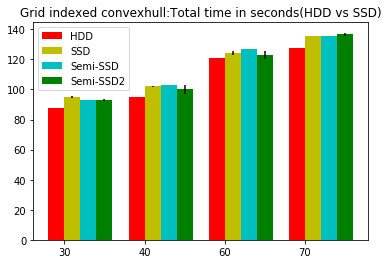

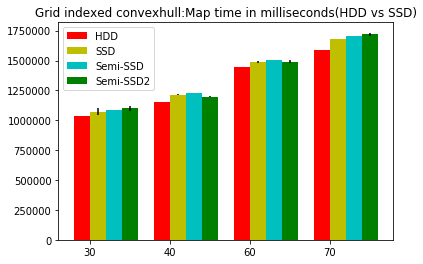

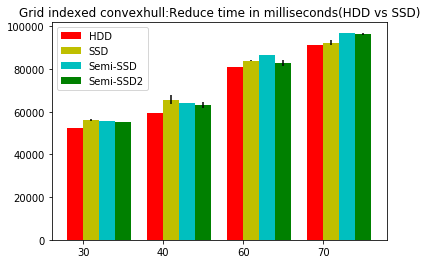

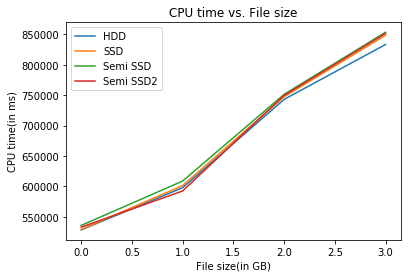

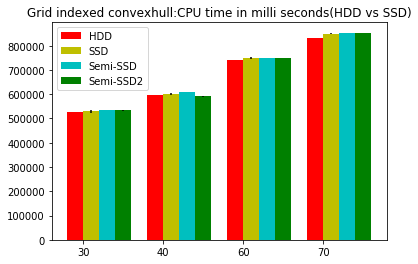

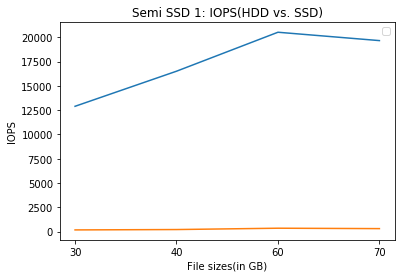

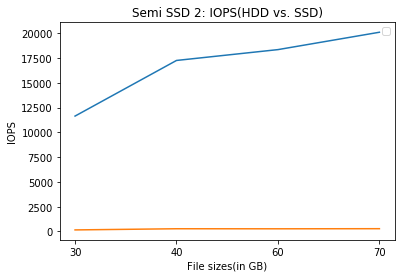

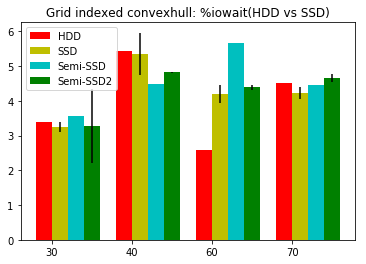

In [19]:
#For Convexhull
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df2_test1=pd.read_csv(r"D:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\convexhull\global_index_convexhull_ssd\FINAL DATA CPU UTIL\ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test1.csv",index_col='Size(GB)')
df2_test2=pd.read_csv(r"D:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\convexhull\global_index_convexhull_ssd\FINAL DATA CPU UTIL\ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')

df_test1=pd.read_csv(r"D:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\convexhull\global_index_convexhull\FINAL DATA CPU UTIL\ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test1.csv",index_col='Size(GB)')
#df_test2=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\global_index_convexhull\FINAL DATA CPU UTIL\ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test3.csv",index_col='Size(GB)')

df_semi_test1=pd.read_csv(r"D:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\convexhull\convexhull_semi_ssd\FINAL DATA CPU UTIL\ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test1.csv",index_col='Size(GB)')
#df_semi_test2=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\convexhull_semi_ssd\FINAL DATA CPU UTIL\ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test3.csv",index_col='Size(GB)')

df_semi2_test1=pd.read_csv(r"D:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\convexhull\global_index_convexhull_semi_ssd2\FINAL DATA CPU UTIL\ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test1.csv",index_col='Size(GB)')
df_semi2_test2=pd.read_csv(r"D:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\convexhull\global_index_convexhull_semi_ssd2\FINAL DATA CPU UTIL\ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')



df2_test1.fillna(0,inplace=True)
df2_test2.fillna(0,inplace=True)

#df_test2.fillna(0,inplace=True)
df_test1.fillna(0,inplace=True)

df_semi_test1.fillna(0,inplace=True)
#df_semi_test2.fillna(0,inplace=True)

df_semi2_test1.fillna(0,inplace=True)
df_semi2_test2.fillna(0,inplace=True)




#Grid range query
#idle_hdd_test1=df.loc[df.index.str.contains("non-indexed Range Query"),'%idle']
#user_hdd_test1=df_test1.loc[df_test1.index.str.contains("non-indexed convexhull"),'%user']
#sys_hdd_test1=df_test1.loc[df_test1.index.str.contains("non-indexed convexhull"),'%system']
total_time_hdd_test1=df_test1.loc[df_test1.index.str.contains("grid indexed convexhull"),'total_time(s)']
map_time_hdd_test1=df_test1.loc[df_test1.index.str.contains("grid indexed convexhull"),'map_time(ms)']

#await_hdd_test1=df_test1.loc[df_test1.index.str.contains("non-indexed convexhull"),'await']
cputime_hdd_test1=df_test1.loc[df_test1.index.str.contains("grid indexed convexhull"),'cpu_time(ms)']


#user_hdd=[(np.mean(x),np.std(x)) for x in list(zip(user_hdd_test1,user_hdd_test2))]
#sys_hdd=[(np.mean(x),np.std(x)) for x in list(zip(sys_hdd_test1,sys_hdd_test2))]
total_time_hdd=[(np.mean(x),np.std(x)) for x in list(zip(total_time_hdd_test1))]
map_time_hdd=[(np.mean(x),np.std(x)) for x in list(zip(map_time_hdd_test1))]

#await_hdd=[(np.mean(x),np.std(x)) for x in list(zip(await_hdd_test1,await_hdd_test2))]
cputime_hdd=[(np.mean(x),np.std(x)) for x in list(zip(cputime_hdd_test1))]



#user_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("non-indexed convexhull"),'%user']
#sys_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("non-indexed convexhull"),'%system']
total_time_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("grid indexed convexhull"),'total_time(s)']
map_time_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("grid indexed convexhull"),'map_time(ms)']
#await_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("non-indexed convexhull"),'await']
cputime_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("grid indexed convexhull"),'cpu_time(ms)']

#user_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("non-indexed convexhull"),'%user']
#sys_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("non-indexed convexhull"),'%system']
total_time_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("grid indexed convexhull"),'total_time(s)']
map_time_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("grid indexed convexhull"),'map_time(ms)']
#await_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("non-indexed convexhull"),'await']
cputime_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("grid indexed convexhull"),'cpu_time(ms)']

#user_ssd=[(np.mean(x),np.std(x)) for x in list(zip(user_ssd_test1,user_ssd_test2))]
#sys_ssd=[(np.mean(x),np.std(x)) for x in list(zip(sys_ssd_test1,sys_ssd_test2))]
total_time_ssd=[(np.mean(x),np.std(x)) for x in list(zip(total_time_ssd_test1,total_time_ssd_test2))]
map_time_ssd=[(np.mean(x),np.std(x)) for x in list(zip(map_time_ssd_test1,map_time_ssd_test2))]

#await_ssd=[(np.mean(x),np.std(x)) for x in list(zip(await_ssd_test1,await_ssd_test2))]
cputime_ssd=[(np.mean(x),np.std(x)) for x in list(zip(cputime_ssd_test1,cputime_ssd_test2))]

total_time_semi_ssd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("grid indexed convexhull"),'total_time(s)']
map_time_semi_ssd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("grid indexed convexhull"),'map_time(ms)']
cputime_semi_ssd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("grid indexed convexhull"),'cpu_time(ms)']


total_time_semi_ssd=[(np.mean(x),np.std(x)) for x in list(zip(total_time_semi_ssd_test1))]
map_time_semi_ssd=[(np.mean(x),np.std(x)) for x in list(zip(map_time_semi_ssd_test1))]
cputime_semi_ssd=[(np.mean(x),np.std(x)) for x in list(zip(cputime_semi_ssd_test1))]


total_time_semi_ssd2_test1=df_semi2_test1.loc[df_semi2_test1.index.str.contains("grid indexed convexhull"),'total_time(s)']
map_time_semi_ssd2_test1=df_semi2_test1.loc[df_semi2_test1.index.str.contains("grid indexed convexhull"),'map_time(ms)']
cputime_semi_ssd2_test1=df_semi2_test1.loc[df_semi2_test1.index.str.contains("grid indexed convexhull"),'cpu_time(ms)']


total_time_semi_ssd2_test2=df_semi2_test2.loc[df_semi2_test2.index.str.contains("grid indexed convexhull"),'total_time(s)']
map_time_semi_ssd2_test2=df_semi2_test2.loc[df_semi2_test2.index.str.contains("grid indexed convexhull"),'map_time(ms)']
cputime_semi_ssd2_test2=df_semi2_test2.loc[df_semi2_test2.index.str.contains("grid indexed convexhull"),'cpu_time(ms)']


total_time_semi_ssd2=[(np.mean(x),np.std(x)) for x in list(zip(total_time_semi_ssd2_test1,total_time_semi_ssd2_test2))]
map_time_semi_ssd2=[(np.mean(x),np.std(x)) for x in list(zip(map_time_semi_ssd2_test1,map_time_semi_ssd2_test2))]
cputime_semi_ssd2=[(np.mean(x),np.std(x)) for x in list(zip(cputime_semi_ssd2_test1,cputime_semi_ssd2_test2))]




reduce_time_hdd_test1=df_test1.loc[df_test1.index.str.contains("grid indexed convexhull"),'reduce_time(ms)']
reduce_time_hdd=[(np.mean(x),np.std(x)) for x in list(zip(reduce_time_hdd_test1))]

reduce_time_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("grid indexed convexhull"),'reduce_time(ms)']
reduce_time_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("grid indexed convexhull"),'reduce_time(ms)']
reduce_time_ssd=[(np.mean(x),np.std(x)) for x in list(zip(reduce_time_ssd_test1,reduce_time_ssd_test2))]

reduce_time_semi_ssd2_test1=df_semi2_test1.loc[df_semi2_test1.index.str.contains("grid indexed convexhull"),'reduce_time(ms)']
reduce_time_semi_ssd2_test2=df_semi2_test2.loc[df_semi2_test2.index.str.contains("grid indexed convexhull"),'reduce_time(ms)']
reduce_time_semi_ssd2=[(np.mean(x),np.std(x)) for x in list(zip(reduce_time_semi_ssd2_test1,reduce_time_semi_ssd2_test2))]

reduce_time_semi_ssd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("grid indexed convexhull"),'reduce_time(ms)']
reduce_time_semi_ssd=[(np.mean(x),np.std(x)) for x in list(zip(reduce_time_semi_ssd_test1))]


fig, ax = plt.subplots()
ind = np.arange(4)    # the x locations for the groups
width = 0.2         # the width of the bars
print(len(total_time_hdd))
p1 = ax.bar(ind, [x[0] for x in total_time_hdd], width, color='r', yerr=[x[1] for x in total_time_hdd])

p2 = ax.bar(ind + width, [x[0] for x in total_time_ssd], width,
            color='y', yerr=[x[1] for x in total_time_ssd])


p3 = ax.bar(ind + 2*width, [x[0] for x in total_time_semi_ssd], width,
            color='c', yerr=[x[1] for x in total_time_semi_ssd])

p4 = ax.bar(ind + 3*width, [x[0] for x in total_time_semi_ssd2], width,
            color='g', yerr=[x[1] for x in total_time_semi_ssd2])


ax.set_title('Grid indexed convexhull:Total time in seconds(HDD vs SSD)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('30','40','60','70'))

ax.legend((p1[0], p2[0],p3[0],p4[0]), ('HDD', 'SSD','Semi-SSD','Semi-SSD2'))
#ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.savefig("D:/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/convexhull_grid_total_time.jpg")

#Map Time
fig, ax = plt.subplots()
ind = np.arange(4)    # the x locations for the groups
width = 0.2         # the width of the bars
p1 = ax.bar(ind, [x[0] for x in map_time_hdd], width, color='r', yerr=[x[1] for x in map_time_hdd])

p2 = ax.bar(ind + width, [x[0] for x in map_time_ssd], width,
            color='y', yerr=[x[1] for x in map_time_ssd])


p3 = ax.bar(ind + 2*width, [x[0] for x in map_time_semi_ssd], width,
            color='c', yerr=[x[1] for x in map_time_semi_ssd])

p4 = ax.bar(ind + 3*width, [x[0] for x in map_time_semi_ssd2], width,
            color='g', yerr=[x[1] for x in map_time_semi_ssd2])


ax.set_title('Grid indexed convexhull:Map time in milliseconds(HDD vs SSD)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('30','40','60','70'))

ax.legend((p1[0], p2[0],p3[0],p4[0]), ('HDD', 'SSD','Semi-SSD','Semi-SSD2'))
#ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.savefig("D:/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/convexhull_grid_map_time.jpg")


#Reduce Time
fig, ax = plt.subplots()
ind = np.arange(4)    # the x locations for the groups
width = 0.2         # the width of the bars
p1 = ax.bar(ind, [x[0] for x in reduce_time_hdd], width, color='r', yerr=[x[1] for x in reduce_time_hdd])

p2 = ax.bar(ind + width, [x[0] for x in reduce_time_ssd], width,
            color='y', yerr=[x[1] for x in reduce_time_ssd])


p3 = ax.bar(ind + 2*width, [x[0] for x in reduce_time_semi_ssd], width,
            color='c', yerr=[x[1] for x in reduce_time_semi_ssd])

p4 = ax.bar(ind + 3*width, [x[0] for x in reduce_time_semi_ssd2], width,
            color='g', yerr=[x[1] for x in reduce_time_semi_ssd2])


ax.set_title('Grid indexed convexhull:Reduce time in milliseconds(HDD vs SSD)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('30','40','60','70'))

ax.legend((p1[0], p2[0],p3[0],p4[0]), ('HDD', 'SSD','Semi-SSD','Semi-SSD2'))
#ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.savefig("D:/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/convexhull_grid_reduce_time.jpg")

#Comparing CPU time
plt.figure()
plt.plot(np.arange(4),[x[0] for x in cputime_hdd])
plt.plot(np.arange(4),[x[0] for x in cputime_ssd])
plt.plot(np.arange(4),[x[0] for x in cputime_semi_ssd])
plt.plot(np.arange(4),[x[0] for x in cputime_semi_ssd2])
plt.title("CPU time vs. File size")
plt.ylabel("CPU time(in ms)")
plt.xlabel("File size(in GB)")
plt.legend(("HDD","SSD","Semi SSD","Semi SSD2"))
plt.savefig("D:/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/convexhull_grid_cpu_time.jpg")

#Comparing CPU Time 2
fig, ax = plt.subplots()
ind = np.arange(4)    # the x locations for the groups
width = 0.2         # the width of the bars
p1 = ax.bar(ind, [x[0] for x in cputime_hdd], width, color='r', yerr=[x[1] for x in cputime_hdd])

p2 = ax.bar(ind + width, [x[0] for x in cputime_ssd], width,
            color='y', yerr=[x[1] for x in cputime_ssd])


p3 = ax.bar(ind + 2*width, [x[0] for x in cputime_semi_ssd], width,
            color='c', yerr=[x[1] for x in cputime_semi_ssd])

p4 = ax.bar(ind + 3*width, [x[0] for x in cputime_semi_ssd2], width,
            color='g', yerr=[x[1] for x in cputime_semi_ssd2])


ax.set_title('Grid indexed convexhull:CPU time in milli seconds(HDD vs SSD)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('30','40','60','70'))

ax.legend((p1[0], p2[0],p3[0],p4[0]), ('HDD', 'SSD','Semi-SSD','Semi-SSD2'))
#ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.savefig("D:/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/convexhull_grid_cpu_time_2.jpg")



###############################################################################################################################
df2_test1=pd.read_csv(r"D:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\convexhull\global_index_convexhull_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test1_convexhull_grid.csv",index_col='Size(GB)')
df2_test2=pd.read_csv(r"D:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\convexhull\global_index_convexhull_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test2_convexhull_grid.csv",index_col='Size(GB)')
#df2_test3=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\global_index_convexhull_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test4.csv",index_col='Size(GB)')


df_test1=pd.read_csv(r"D:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\convexhull\global_index_convexhull\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test1_convexhull_grid.csv",index_col='Size(GB)')
#df_test2=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\global_index_convexhull\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test3.csv",index_col='Size(GB)')

df_semi_test1=pd.read_csv(r"D:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\convexhull\convexhull_semi_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test1_convexhull_grid.csv",index_col='Size(GB)')
#df_semi_test2=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\convexhull_semi_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')
#df_semi_test3=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\convexhull_semi_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test3.csv",index_col='Size(GB)')


df_semi2_test1=pd.read_csv(r"D:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\convexhull\global_index_convexhull_semi_ssd2\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test1_convexhull_grid.csv",index_col='Size(GB)')
df_semi2_test2=pd.read_csv(r"D:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\convexhull\global_index_convexhull_semi_ssd2\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test2_convexhull_grid.csv",index_col='Size(GB)')
#df_semi2_test3=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\global_index_convexhull_semi_ssd2\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test3.csv",index_col='Size(GB)')



df2_test1.fillna(0,inplace=True)
df2_test2.fillna(0,inplace=True)

#df_test2.fillna(0,inplace=True)
df_test1.fillna(0,inplace=True)

df_semi_test1.fillna(0,inplace=True)
#df_semi_test2.fillna(0,inplace=True)

df_semi2_test1.fillna(0,inplace=True)
df_semi2_test2.fillna(0,inplace=True)





#Comparing IOPS for convexhull_semi_ssd
iops_total_hdd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("grid index convexhull"),'iops_total_hdd']
iops_total_hdd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_hdd_test1))]

iops_total_ssd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("grid index convexhull"),'iops_total_ssd']
iops_total_ssd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_ssd_test1))]

plt.figure()
p1=plt.plot(('30','40','60','70'),[x[0] for x in iops_total_hdd])
p2=plt.plot(('30','40','60','70'),[x[0] for x in iops_total_ssd])
plt.xlabel("File sizes(in GB)")
plt.ylabel("IOPS")
plt.title("Semi SSD 1: IOPS(HDD vs. SSD)")
plt.legend((p1,p2),('HDD','SSD'))
plt.savefig("D:/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/convexhull_grid_iops_convexhull_semi_ssd.jpg")

# plt.figure()
# p1=plt.plot(('30','40','50','60','70','80'),[x[0] for x in iops_total_ssd])
# plt.xlabel("File sizes(in GB)")
# plt.ylabel("IOPS")
# plt.title("Semi SSD 1: IOPS(SSD)")
# plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/convexhull_grid_iops_ssd_convexhull_semi_ssd.jpg")

#Comparing IOPS for global_index_convexhull_semi_ssd2
iops_total_hdd_test1=df_semi2_test1.loc[df_semi2_test1.index.str.contains("grid index convexhull"),'iops_total_hdd']
iops_total_hdd_test2=df_semi2_test2.loc[df_semi2_test2.index.str.contains("grid index convexhull"),'iops_total_hdd']
iops_total_hdd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_hdd_test1,iops_total_hdd_test2))]

iops_total_ssd_test1=df_semi2_test1.loc[df_semi2_test1.index.str.contains("grid index convexhull"),'iops_total_ssd']
iops_total_ssd_test2=df_semi2_test2.loc[df_semi2_test2.index.str.contains("grid index convexhull"),'iops_total_ssd']
iops_total_ssd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_ssd_test1,iops_total_ssd_test2))]

plt.figure()
p1=plt.plot(('30','40','60','70'),[x[0] for x in iops_total_hdd])
p2=plt.plot(('30','40','60','70'),[x[0] for x in iops_total_ssd])
plt.xlabel("File sizes(in GB)")
plt.ylabel("IOPS")
plt.title("Semi SSD 2: IOPS(HDD vs. SSD)")
plt.legend((p1,p2),('HDD','SSD'))
plt.savefig("D:/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/convexhull_grid_iops_global_index_convexhull_semi_ssd2.jpg")

# plt.figure()
# p1=plt.plot(('30','40','50','60','70','80'),[x[0] for x in iops_total_ssd])
# plt.xlabel("File sizes(in GB)")
# plt.ylabel("IOPS")
# plt.title("Semi SSD 2: IOPS(SSD)")
# plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/convexhull_grid_iops_ssd_global_index_convexhull_semi_ssd2.jpg")





# iops_total_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("grid indexed convexhull"),'iops_total_hdd']
# iops_total_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("grid indexed convexhull"),'iops_total_hdd']
# iops_total_ssd_test3=df2_test3.loc[df2_test3.index.str.contains("grid indexed convexhull"),'iops_total_hdd']
# iops_total_ssd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_ssd_test1,iops_total_ssd_test2,iops_total_ssd_test3))]

# iops_total_semi_ssd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("grid indexed convexhull"),'iops_total_hdd']
# iops_total_semi_ssd_test2=df_semi_test2.loc[df_semi_test2.index.str.contains("grid indexed convexhull"),'iops_total_hdd']
# iops_total_semi_ssd_test3=df_semi_test3.loc[df_semi_test3.index.str.contains("grid indexed convexhull"),'iops_total_hdd']
# iops_total_semi_ssd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_semi_ssd_test1,iops_total_semi_ssd_test2,iops_total_semi_ssd_test3))]

# iops_total_semi_ssd2_test1=df_semi2_test1.loc[df_semi2_test1.index.str.contains("grid indexed convexhull"),'iops_total_hdd']
# iops_total_semi_ssd2_test2=df_semi2_test2.loc[df_semi2_test2.index.str.contains("grid indexed convexhull"),'iops_total_hdd']
# iops_total_semi_ssd2=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_semi_ssd2_test1,iops_total_semi_ssd2_test2))]

iowait_hdd_test1=df_test1.loc[df_test1.index.str.contains("grid index convexhull"),'io_wait']
#iowait_hdd_test2=df_test2.loc[df_test2.index.str.contains("grid indexed convexhull"),'io_wait']
iowait_hdd=[(np.mean(x),np.std(x)) for x in list(zip(iowait_hdd_test1))]

iowait_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("grid index convexhull"),'io_wait']
iowait_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("grid index convexhull"),'io_wait']
iowait_ssd=[(np.mean(x),np.std(x)) for x in list(zip(iowait_ssd_test1,iowait_ssd_test2))]

iowait_semi_ssd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("grid index convexhull"),'io_wait']
iowait_semi_ssd=[(np.mean(x),np.std(x)) for x in list(zip(iowait_semi_ssd_test1))]

iowait_semi_ssd2_test1=df_semi2_test1.loc[df_semi2_test1.index.str.contains("grid index convexhull"),'io_wait']
iowait_semi_ssd2_test2=df_semi2_test2.loc[df_semi2_test2.index.str.contains("grid index convexhull"),'io_wait']
iowait_semi_ssd2=[(np.mean(x),np.std(x)) for x in list(zip(iowait_semi_ssd2_test1,iowait_semi_ssd2_test2))]


#Comparing iowait time
fig, ax = plt.subplots()
ind = np.arange(4)    # the x locations for the groups
width = 0.2         # the width of the bars
p1 = ax.bar(ind, [x[0] for x in iowait_hdd], width, color='r', yerr=[x[1] for x in iowait_hdd])

p2 = ax.bar(ind + width, [x[0] for x in iowait_ssd], width,
            color='y', yerr=[x[1] for x in iowait_ssd])


p3 = ax.bar(ind + 2*width, [x[0] for x in iowait_semi_ssd], width,
            color='c', yerr=[x[1] for x in iowait_semi_ssd])
p4 = ax.bar(ind + 3*width, [x[0] for x in iowait_semi_ssd2], width,
            color='g', yerr=[x[1] for x in iowait_semi_ssd2])


ax.set_title('Grid indexed convexhull: %iowait(HDD vs SSD)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('30','40','60','70'))

ax.legend((p1[0], p2[0],p3[0],p4[0]), ('HDD', 'SSD','Semi-SSD','Semi-SSD2'))
#ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.savefig("D:/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/convexhull_grid_iowait.jpg")

# plt.figure()
# num_mappers=[32,38,42,47,50,54]
# file_sizes=[30,40,50,60,70,80]
# plt.bar(file_sizes,num_mappers,3*width)
# plt.title("Number of mappers vs. File size")
# plt.xlabel("File sizes")
# plt.ylabel("Number of mappers")
# plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/convexhull_grid_num_mappers.jpg")

# plt.figure()
# num_reducers=[1,1,1,1,1,1]
# file_sizes=[30,40,50,60,70,80]
# plt.bar(file_sizes,num_reducers,3*width)
# plt.title("Number of reducers vs. File size")
# plt.xlabel("File sizes")
# plt.ylabel("Number of reducers")
# plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/convexhull_grid_num_reducers.jpg")

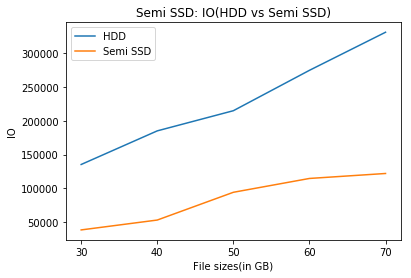

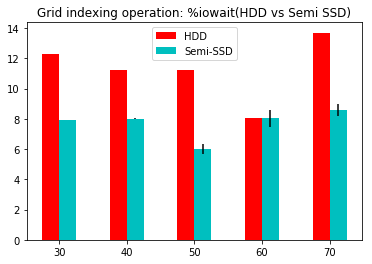

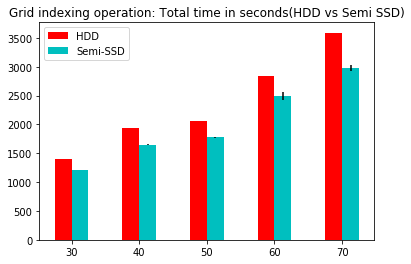

In [8]:
#######################################################################################################
#For Grid Indexing operation
#df2_test1=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\global_index_skyline_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')
#df2_test2=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\global_index_skyline_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test3.csv",index_col='Size(GB)')
#df2_test3=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\global_index_skyline_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test4.csv",index_col='Size(GB)')


df_test1=pd.read_csv(r"D:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\grid_indexing\global_index_grid_indexing\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test2_index_grid.csv",index_col='Size(GB)')
#df_test2=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\global_index_skyline\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test3_index_grid.csv",index_col='Size(GB)')

df_semi_test1=pd.read_csv(r"D:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\grid_indexing\grid_indexing_semi_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test1_index_grid.csv",index_col='Size(GB)')
#df_semi_test1=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\skyline_semi_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test1.csv",index_col='Size(GB)')
df_semi_test2=pd.read_csv(r"D:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\grid_indexing\grid_indexing_semi_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test2_index_grid.csv",index_col='Size(GB)')
#df_semi_test3=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\skyline_semi_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test3.csv",index_col='Size(GB)')


#df_semi2_test1=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\global_index_skyline_semi_ssd2\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test1.csv",index_col='Size(GB)')
#df_semi2_test2=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\global_index_skyline_semi_ssd2\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')
#df_semi2_test3=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\global_index_skyline_semi_ssd2\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test3.csv",index_col='Size(GB)')

#df3_test1=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\skyline_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test1.csv",index_col='Size(GB)')
#df3_test2=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\skyline_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')


#df2_test1.fillna(0,inplace=True)
#df2_test2.fillna(0,inplace=True)

#df_test2.fillna(0,inplace=True)
df_test1.fillna(0,inplace=True)

df_semi_test1.fillna(0,inplace=True)
df_semi_test2.fillna(0,inplace=True)

#df_semi2_test1.fillna(0,inplace=True)
#df_semi2_test2.fillna(0,inplace=True)

# df3_test2.fillna(0,inplace=True)
# df3_test1.fillna(0,inplace=True)

#IOPS Total
iops_total_hdd_test2=df_semi_test2.loc[df_semi_test2.index.str.contains("grid index"),'iops_total_hdd']
iops_total_hdd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("grid index"),'iops_total_hdd']
iops_total_hdd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_hdd_test2,iops_total_hdd_test1))]

iops_total_ssd_test2=df_semi_test2.loc[df_semi_test2.index.str.contains("grid index"),'iops_total_ssd']
iops_total_ssd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("grid index"),'iops_total_ssd']
iops_total_ssd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_ssd_test2,iops_total_ssd_test1))]

#Comparing IOPS total for global_index_skyline
plt.figure()
#p1=plt.plot(('30','40','50','60','70','80'),[x[0] for x in iops_total_hdd])
p1=plt.plot(('30','40','50','60','70'),[x[0] for x in iops_total_hdd])
p2=plt.plot(('30','40','50','60','70'),[x[0] for x in iops_total_ssd])
plt.xlabel("File sizes(in GB)")
plt.xticks(np.arange(5),('30','40','50','60','70'))
plt.ylabel("IO")
plt.title("Semi SSD: IO(HDD vs Semi SSD)")
plt.legend(('HDD','Semi SSD'))
plt.savefig("D:/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/index_grid_iops_semi_ssd.jpg")


#io wait comparison

iowait_hdd_test2=df_test1.loc[df_test1.index.str.contains("grid index"),'io_wait']
#iowait_hdd_test1=df_test1.loc[df_test1.index.str.contains("grid index"),'io_wait']
iowait_hdd=[(np.mean(x),np.std(x)) for x in list(zip(iowait_hdd_test2))]


iowait_semi_ssd_test2=df_semi_test2.loc[df_semi_test2.index.str.contains("grid index"),'io_wait']
iowait_semi_ssd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("grid index"),'io_wait']
iowait_semi_ssd=[(np.mean(x),np.std(x)) for x in list(zip(iowait_semi_ssd_test2,iowait_semi_ssd_test1))]


fig, ax = plt.subplots()
ind = np.arange(5)    # the x locations for the groups
width = 0.25         # the width of the bars
p1 = ax.bar(ind, [x[0] for x in iowait_hdd], width, color='r', yerr=[x[1] for x in iowait_hdd])

#p2 = ax.bar(ind + width, [x[0] for x in iowait_ssd[:-1]], width,
#             color='y', yerr=[x[1] for x in iowait_ssd[:-1]])


p3 = ax.bar(ind + width, [x[0] for x in iowait_semi_ssd], width,
            color='c', yerr=[x[1] for x in iowait_semi_ssd])
#p4 = ax.bar(ind + 3*width, [x[0] for x in iowait_semi_ssd2[:-1]], width,
#             color='g', yerr=[x[1] for x in iowait_semi_ssd2[:-1]])

# p5 = ax.bar(ind + 4*width, [x[0] for x in iowait_full_ssd], width,
#             color='m', yerr=[x[1] for x in iowait_full_ssd])

ax.set_title('Grid indexing operation: %iowait(HDD vs Semi SSD)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('30','40','50','60','70'))

ax.legend((p1[0],p3[0]), ('HDD','Semi-SSD'))
#ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.savefig("D:/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/index_grid_iowait.jpg")
            
###############################################################################################################################
#df_test1=pd.read_excel(r"C:\Tejas\PESU\CCBD_researchh\New Tests\global_index_skyline\FINAL DATA CPU UTIL\ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test2_grid_index.xlsx",index_col='Size(GB)')
df_test2=pd.read_excel(r"D:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\grid_indexing\global_index_grid_indexing\FINAL DATA CPU UTIL\ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test2_grid_index.xlsx",index_col='Size(GB)')
#df_test1=pd.read_excel(r"D:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\grid_indexing\global_index_grid_indexing\FINAL DATA CPU UTIL\ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test2_grid_index.xlsx",index_col='Size(GB)')

df_semi_test2=pd.read_excel(r"D:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\grid_indexing\grid_indexing_semi_ssd\FINAL DATA CPU UTIL\ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test2_grid_index.xlsx",index_col='Size(GB)')
df_semi_test1=pd.read_excel(r"D:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\grid_indexing\grid_indexing_semi_ssd\FINAL DATA CPU UTIL\ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test1_grid_index.xlsx",index_col='Size(GB)')

#Total time comparison
total_time_hdd_test2=df_test2.loc[df_test2.index.str.contains("grid index"),'total_time(s)']
#total_time_hdd_test1=df_test1.loc[df_test1.index.str.contains("grid index"),'total_time(s)']
total_time_hdd=[(np.mean(x),np.std(x)) for x in list(zip(total_time_hdd_test2))]


total_time_semi_ssd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("grid index"),'total_time(s)']
total_time_semi_ssd_test2=df_semi_test2.loc[df_semi_test2.index.str.contains("grid index"),'total_time(s)']
total_time_semi_ssd=[(np.mean(x),np.std(x)) for x in list(zip(total_time_semi_ssd_test1,total_time_semi_ssd_test2))]


fig, ax = plt.subplots()
ind = np.arange(5)    # the x locations for the groups
width = 0.25         # the width of the bars
p1 = ax.bar(ind, [x[0] for x in total_time_hdd], width, color='r', yerr=[x[1] for x in total_time_hdd])


p3 = ax.bar(ind + width, [x[0] for x in total_time_semi_ssd], width,
            color='c', yerr=[x[1] for x in total_time_semi_ssd])
#p4 = ax.bar(ind + 3*width, [x[0] for x in iowait_semi_ssd2[:-1]], width,
#             color='g', yerr=[x[1] for x in iowait_semi_ssd2[:-1]])

# p5 = ax.bar(ind + 4*width, [x[0] for x in iowait_full_ssd], width,
#             color='m', yerr=[x[1] for x in iowait_full_ssd])

ax.set_title('Grid indexing operation: Total time in seconds(HDD vs Semi SSD)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('30','40','50','60','70'))

ax.legend((p1[0],p3[0]), ('HDD','Semi-SSD'))
#ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.savefig("D:/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/index_grid_total_time.jpg")

# plt.figure()
# #num_mappers=[32,38,42,47,50,54]
# num_mappers=[400]
# #file_sizes=[30,40,50,60,70,80]
# file_sizes=[50]
# plt.bar(file_sizes,num_mappers,3*width)
# plt.title("Number of mappers vs. File size")
# plt.xlabel("File sizes")
# plt.ylabel("Number of mappers")
# plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/index_grid_num_mappers.jpg")

# plt.figure()
# num_reducers=[5]
# file_sizes=[50]
# plt.bar(file_sizes,num_reducers,3*width)
# plt.title("Number of reducers vs. File size")
# plt.xlabel("File sizes")
# plt.ylabel("Number of reducers")
# plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/index_grid_num_reducers.jpg")

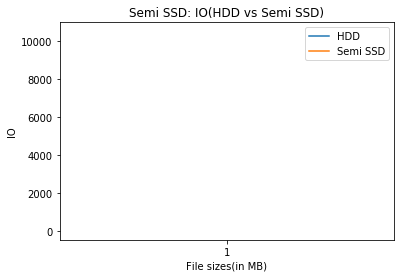

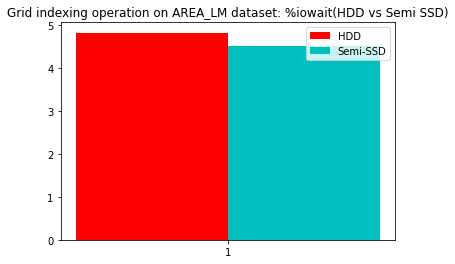

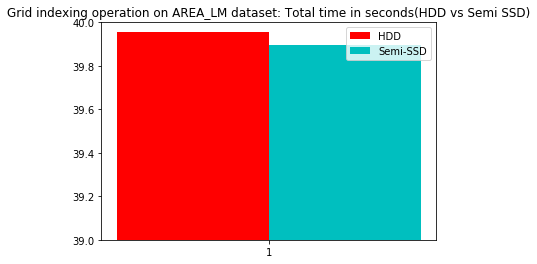

In [19]:
#######################################################################################################
#For Grid Indexing operation on real data
#df2_test1=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\global_index_skyline_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')
#df2_test2=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\global_index_skyline_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test3.csv",index_col='Size(GB)')
#df2_test3=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\global_index_skyline_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test4.csv",index_col='Size(GB)')


df_test1=pd.read_csv(r"F:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\real_datasets\indexing\hdd_test1_index_grid.csv",index_col='Size(GB)')
#df_test2=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\global_index_skyline\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test3_index_grid.csv",index_col='Size(GB)')

df_semi_test1=pd.read_csv(r"F:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\real_datasets\indexing\ssd_test1_index_grid.csv",index_col='Size(GB)')
#df_semi_test1=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\skyline_semi_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test1.csv",index_col='Size(GB)')
#df_semi_test2=pd.read_csv(r"D:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\grid_indexing\grid_indexing_semi_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test2_index_grid.csv",index_col='Size(GB)')
#df_semi_test3=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\skyline_semi_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test3.csv",index_col='Size(GB)')


#df_semi2_test1=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\global_index_skyline_semi_ssd2\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test1.csv",index_col='Size(GB)')
#df_semi2_test2=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\global_index_skyline_semi_ssd2\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')
#df_semi2_test3=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\global_index_skyline_semi_ssd2\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test3.csv",index_col='Size(GB)')

#df3_test1=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\skyline_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test1.csv",index_col='Size(GB)')
#df3_test2=pd.read_csv(r"C:\Tejas\PESU\CCBD_researchh\New Tests\skyline_ssd\FINAL DATA CPU UTIL\test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')


#df2_test1.fillna(0,inplace=True)
#df2_test2.fillna(0,inplace=True)

#df_test2.fillna(0,inplace=True)
df_test1.fillna(0,inplace=True)

df_semi_test1.fillna(0,inplace=True)

#df_semi2_test1.fillna(0,inplace=True)
#df_semi2_test2.fillna(0,inplace=True)

# df3_test2.fillna(0,inplace=True)
# df3_test1.fillna(0,inplace=True)

#IOPS Total
iops_total_hdd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("AREA_LM_2015"),'iops_total_hdd']
iops_total_hdd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_hdd_test1))]

iops_total_ssd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("AREA_LM_2015"),'iops_total_ssd']
iops_total_ssd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_ssd_test1))]

#Comparing IOPS total for global_index_skyline
plt.figure()
#p1=plt.plot(('30','40','50','60','70','80'),[x[0] for x in iops_total_hdd])
p1=plt.plot(('150'),[x[0] for x in iops_total_hdd])
p2=plt.plot(('150'),[x[0] for x in iops_total_ssd])
plt.xlabel("File sizes(in MB)")
plt.xticks(np.arange(1),('150'))
plt.ylabel("IO")
plt.title("Semi SSD: IO(HDD vs Semi SSD)")
plt.legend(('HDD','Semi SSD'))
plt.savefig("F:/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/real_index_grid_iops_semi_ssd.png")


#io wait comparison

iowait_hdd_test2=df_test1.loc[df_test1.index.str.contains("AREA_LM_2015"),'io_wait']
#iowait_hdd_test1=df_test1.loc[df_test1.index.str.contains("grid index"),'io_wait']
iowait_hdd=[(np.mean(x),np.std(x)) for x in list(zip(iowait_hdd_test2))]


iowait_semi_ssd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("AREA_LM_2015"),'io_wait']
iowait_semi_ssd=[(np.mean(x),np.std(x)) for x in list(zip(iowait_semi_ssd_test1))]


fig, ax = plt.subplots()
ind = np.arange(1)    # the x locations for the groups
width = 0.5         # the width of the bars
p1 = ax.bar(ind, [x[0] for x in iowait_hdd], width, color='r', yerr=[x[1] for x in iowait_hdd])

#p2 = ax.bar(ind + width, [x[0] for x in iowait_ssd[:-1]], width,
#             color='y', yerr=[x[1] for x in iowait_ssd[:-1]])


p3 = ax.bar(ind + width, [x[0] for x in iowait_semi_ssd], width,
            color='c', yerr=[x[1] for x in iowait_semi_ssd])
#p4 = ax.bar(ind + 3*width, [x[0] for x in iowait_semi_ssd2[:-1]], width,
#             color='g', yerr=[x[1] for x in iowait_semi_ssd2[:-1]])

# p5 = ax.bar(ind + 4*width, [x[0] for x in iowait_full_ssd], width,
#             color='m', yerr=[x[1] for x in iowait_full_ssd])

ax.set_title('Grid indexing operation on AREA_LM dataset: %iowait(HDD vs Semi SSD)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('150'))

ax.legend((p1[0],p3[0]), ('HDD','Semi-SSD'))
#ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.savefig("f:/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/real_index_grid_iowait.png")
            
###############################################################################################################################
#df_test1=pd.read_excel(r"C:\Tejas\PESU\CCBD_researchh\New Tests\global_index_skyline\FINAL DATA CPU UTIL\ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test2_grid_index.xlsx",index_col='Size(GB)')
df_test2=pd.read_excel(r"F:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\real_datasets\indexing\ssd_counters_hdd_test1_grid_index.xlsx",index_col='Size(GB)')
#df_test1=pd.read_excel(r"D:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\grid_indexing\global_index_grid_indexing\FINAL DATA CPU UTIL\ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test2_grid_index.xlsx",index_col='Size(GB)')

df_semi_test1=pd.read_excel(r"F:\Recovery lenovo laptop\Tejas\PESU\CCBD_researchh\New Tests\real_datasets\indexing\ssd_counters_ssd_test1_grid_index.xlsx",index_col='Size(GB)')

#Total time comparison
total_time_hdd_test2=df_test2.loc[df_test2.index.str.contains("AREA_LM_2015"),'total_time(s)']
#total_time_hdd_test1=df_test1.loc[df_test1.index.str.contains("grid index"),'total_time(s)']
total_time_hdd=[(np.mean(x),np.std(x)) for x in list(zip(total_time_hdd_test2))]


total_time_semi_ssd_test1=df_semi_test1.loc[df_semi_test1.index.str.contains("AREA_LM_2015"),'total_time(s)']
total_time_semi_ssd=[(np.mean(x),np.std(x)) for x in list(zip(total_time_semi_ssd_test1))]


fig, ax = plt.subplots()
ind = np.arange(1)    # the x locations for the groups
width = 0.5         # the width of the bars
p1 = ax.bar(ind, [x[0] for x in total_time_hdd], width, color='r', yerr=[x[1] for x in total_time_hdd])


p3 = ax.bar(ind + width, [x[0] for x in total_time_semi_ssd], width,
            color='c', yerr=[x[1] for x in total_time_semi_ssd])
#p4 = ax.bar(ind + 3*width, [x[0] for x in iowait_semi_ssd2[:-1]], width,
#             color='g', yerr=[x[1] for x in iowait_semi_ssd2[:-1]])

# p5 = ax.bar(ind + 4*width, [x[0] for x in iowait_full_ssd], width,
#             color='m', yerr=[x[1] for x in iowait_full_ssd])

ax.set_title('Grid indexing operation on AREA_LM dataset: Total time in seconds(HDD vs Semi SSD)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('150'))
ax.set_ylim([39,40])
ax.legend((p1[0],p3[0]), ('HDD','Semi-SSD'))
#ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.savefig("F:/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/real_index_grid_total_time.png")

# plt.figure()
# #num_mappers=[32,38,42,47,50,54]
# num_mappers=[400]
# #file_sizes=[30,40,50,60,70,80]
# file_sizes=[50]
# plt.bar(file_sizes,num_mappers,3*width)
# plt.title("Number of mappers vs. File size")
# plt.xlabel("File sizes")
# plt.ylabel("Number of mappers")
# plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/index_grid_num_mappers.jpg")

# plt.figure()
# num_reducers=[5]
# file_sizes=[50]
# plt.bar(file_sizes,num_reducers,3*width)
# plt.title("Number of reducers vs. File size")
# plt.xlabel("File sizes")
# plt.ylabel("Number of reducers")
# plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/index_grid_num_reducers.jpg")

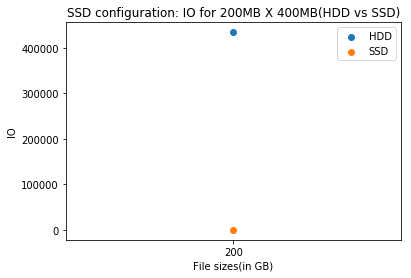

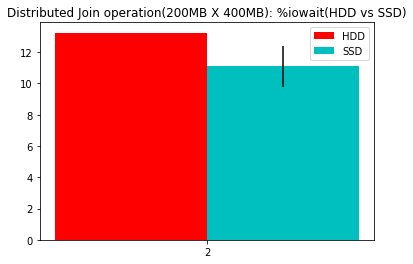

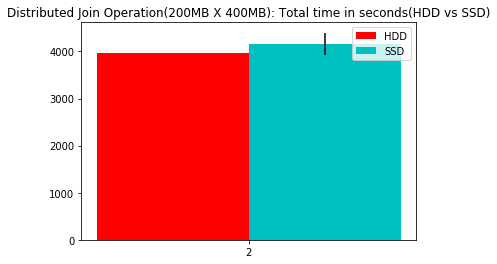

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#######################################################################################################
#For Distributed Join operation
#df2_test1=pd.read_csv(r"C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_ssd/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')
df2_test2=pd.read_csv(r"/media/ubuntu/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/dj/global_index_dj_ssd/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test2_dj_grid.csv",index_col='Size(GB)')
df2_test3=pd.read_csv(r"/media/ubuntu/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/dj/global_index_dj_ssd/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test3_dj_grid.csv",index_col='Size(GB)')


df_test1=pd.read_csv(r"/media/ubuntu/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/dj/global_index_dj/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test2_dj_grid.csv",index_col='Size(GB)')
#df_test2=pd.read_csv(r"C:/Tejas/PESU/CCBD_researchh/New Tests/dj/global_index_dj/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test3_dj_grid.csv",index_col='Size(GB)')


#df_semi2_test1=pd.read_csv(r"C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_semi_ssd2/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test1.csv",index_col='Size(GB)')
#df_semi2_test2=pd.read_csv(r"C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_semi_ssd2/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')
#df_semi2_test3=pd.read_csv(r"C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline_semi_ssd2/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test3.csv",index_col='Size(GB)')

#df3_test1=pd.read_csv(r"C:/Tejas/PESU/CCBD_researchh/New Tests/skyline_ssd/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test1.csv",index_col='Size(GB)')
#df3_test2=pd.read_csv(r"C:/Tejas/PESU/CCBD_researchh/New Tests/skyline_ssd/FINAL DATA CPU UTIL/test16_8vcores_10vcores_reduce1_12920MB_test2.csv",index_col='Size(GB)')


df2_test2.fillna(0,inplace=True)
df2_test3.fillna(0,inplace=True)

#df_test2.fillna(0,inplace=True)
df_test1.fillna(0,inplace=True)


#IOPS Total
iops_total_hdd_test2=df2_test2.loc[df2_test2.index.str.contains("Grid DJ"),'iops_total_hdd']
iops_total_hdd_test3=df2_test3.loc[df2_test3.index.str.contains("Grid DJ"),'iops_total_hdd']
iops_total_hdd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_hdd_test2,iops_total_hdd_test3))]

iops_total_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("Grid DJ"),'iops_total_ssd']
iops_total_ssd_test3=df2_test3.loc[df2_test3.index.str.contains("Grid DJ"),'iops_total_ssd']

iops_total_ssd=[(np.mean(x),np.std(x)) for x in list(zip(iops_total_ssd_test2,iops_total_ssd_test3))]

#Comparing IOPS total for global_index_dj_ssd
plt.figure()
#p1=plt.plot(('30','40','50','60','70','80'),[x[0] for x in iops_total_hdd])
p1=plt.scatter(('200'),[x[0] for x in iops_total_hdd])
p2=plt.scatter(('200'),[x[0] for x in iops_total_ssd])
plt.xlabel("File sizes(in GB)")
plt.ylabel("IO")
plt.title("SSD configuration: IO for 200MB X 400MB(HDD vs SSD)")
plt.legend(('HDD','SSD'))
plt.savefig("/media/ubuntu/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/dj_grid_iops_global_index_dj_ssd.png")


#io wait comparison

iowait_hdd_test1=df_test1.loc[df_test1.index.str.contains("Grid DJ"),'io_wait']
iowait_hdd=[(np.mean(x),np.std(x)) for x in list(zip(iowait_hdd_test1))]


iowait_ssd_test1=df2_test2.loc[df2_test2.index.str.contains("Grid DJ"),'io_wait']
iowait_ssd_test2=df2_test3.loc[df2_test3.index.str.contains("Grid DJ"),'io_wait']
iowait_ssd=[(np.mean(x),np.std(x)) for x in list(zip(iowait_ssd_test2,iowait_ssd_test1))]


fig, ax = plt.subplots()
ind = np.arange(1)    # the x locations for the groups
width = 0.30         # the width of the bars
p1 = ax.bar(ind, [x[0] for x in iowait_hdd], width, color='r', yerr=[x[1] for x in iowait_hdd])

#p2 = ax.bar(ind + width, [x[0] for x in iowait_ssd[:-1]], width,
#             color='y', yerr=[x[1] for x in iowait_ssd[:-1]])


p3 = ax.bar(ind + width, [x[0] for x in iowait_ssd], width,
            color='c', yerr=[x[1] for x in iowait_ssd])
#p4 = ax.bar(ind + 3*width, [x[0] for x in iowait_semi_ssd2[:-1]], width,
#             color='g', yerr=[x[1] for x in iowait_semi_ssd2[:-1]])

# p5 = ax.bar(ind + 4*width, [x[0] for x in iowait_full_ssd], width,
#             color='m', yerr=[x[1] for x in iowait_full_ssd])

ax.set_title('Distributed Join operation(200MB X 400MB): %iowait(HDD vs SSD)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('200'))

ax.legend((p1[0],p3[0]), ('HDD','SSD'))
#ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.savefig("/media/ubuntu/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/dj_grid_iowait.png")
            
# ###############################################################################################################################
df_test1=pd.read_excel(r"/media/ubuntu/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/dj/global_index_dj/FINAL DATA CPU UTIL/ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test2_dj_grid.xlsx",index_col='Size(GB)')

df2_test1=pd.read_excel(r"/media/ubuntu/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/dj/global_index_dj_ssd/FINAL DATA CPU UTIL/ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test2_dj_grid.xlsx",index_col='Size(GB)')
df2_test2=pd.read_excel(r"/media/ubuntu/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/dj/global_index_dj_ssd/FINAL DATA CPU UTIL/ssd_counters_test16_8vcores_10vcores_reduce1_12920MB_test3_dj_grid.xlsx",index_col='Size(GB)')

#Total time comparison
total_time_hdd_test1=df_test1.loc[df_test1.index.str.contains("Grid DJ"),'total_time(s)']
total_time_hdd=[(np.mean(x),np.std(x)) for x in list(zip(total_time_hdd_test1))]

total_time_ssd_test2=df2_test2.loc[df2_test2.index.str.contains("Grid DJ"),'total_time(s)']
total_time_ssd_test1=df2_test1.loc[df2_test1.index.str.contains("Grid DJ"),'total_time(s)']
total_time_ssd=[(np.mean(x),np.std(x)) for x in list(zip(total_time_ssd_test2,total_time_ssd_test1))]

fig, ax = plt.subplots()
ind = np.arange(1)    # the x locations for the groups
width = 0.30         # the width of the bars
p1 = ax.bar(ind, [x[0] for x in total_time_hdd], width, color='r', yerr=[x[1] for x in total_time_hdd])


p3 = ax.bar(ind + width, [x[0] for x in total_time_ssd], width,
            color='c', yerr=[x[1] for x in total_time_ssd])
#p4 = ax.bar(ind + 3*width, [x[0] for x in iowait_semi_ssd2[:-1]], width,
#             color='g', yerr=[x[1] for x in iowait_semi_ssd2[:-1]])

# p5 = ax.bar(ind + 4*width, [x[0] for x in iowait_full_ssd], width,
#             color='m', yerr=[x[1] for x in iowait_full_ssd])

ax.set_title('Distributed Join Operation(200MB X 400MB): Total time in seconds(HDD vs SSD)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('200'))

ax.legend((p1[0],p3[0]), ('HDD','SSD'))
#ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.savefig("/media/ubuntu/Seagate Backup Plus Drive/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/dj_grid_total_time.png")

# plt.figure()
# #num_mappers=[32,38,42,47,50,54]
# num_mappers=[400]
# #file_sizes=[30,40,50,60,70,80]
# file_sizes=[50]
# plt.bar(file_sizes,num_mappers,3*width)
# plt.title("Number of mappers vs. File size")
# plt.xlabel("File sizes")
# plt.ylabel("Number of mappers")
# plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/index_grid_num_mappers.jpg")

# plt.figure()
# num_reducers=[5]
# file_sizes=[50]
# plt.bar(file_sizes,num_reducers,3*width)
# plt.title("Number of reducers vs. File size")
# plt.xlabel("File sizes")
# plt.ylabel("Number of reducers")
# plt.savefig("C:/Tejas/PESU/CCBD_researchh/New Tests/graphs_8_03_final/index_grid_num_reducers.jpg")

In [11]:
#Find SSD utilization
#For Grid Indexing
import pandas as pd
#import matplotlib.pyplot as plt
import numpy as np
import sys


slave1_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series(),
    'iops_total_ssd':pd.Series()
#},index=['30GB grid index skyline','40GB grid index skyline','50GB grid index skyline','60GB grid index skyline','70GB grid index skyline'])
#},index=['30GB grid index','40GB grid index','50GB grid index','60GB grid index','70GB grid index'])
},index=['AREA_LM_2015'])
    
slave2_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series(),
    'iops_total_ssd':pd.Series()
#},index=['30GB grid index skyline','40GB grid index skyline','50GB grid index skyline','60GB grid index skyline','70GB grid index skyline'])
#},index=['30GB grid index','40GB grid index','50GB grid index','60GB grid index','70GB grid index'])
},index=['AREA_LM_2015'])

master_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series(),
    'iops_total_ssd':pd.Series()
#},index=['30GB grid index skyline','40GB grid index skyline','50GB grid index skyline','60GB grid index skyline','70GB grid index skyline'])
#},index=['30GB grid index','40GB grid index','50GB grid index','60GB grid index','70GB grid index'])
},index=['AREA_LM_2015'])

final_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series(),
    'iops_total_ssd':pd.Series()    
#},index=['30GB grid index skyline','40GB grid index skyline','50GB grid index skyline','60GB grid index skyline','70GB grid index skyline'])
#},index=['30GB grid index','40GB grid index','50GB grid index','60GB grid index','70GB grid index'])
},index=['AREA_LM_2015'])

#path_graphs="D:/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/grid_indexing/global_index_grid_indexing/FINAL DATA CPU UTIL"+'/graphs_trimmed_times_index_grid'
path_graphs="F:/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/real_datasets/indexing/ssd"+'/graphs_trimmed_times_index_grid'


#files=['job_50gb_skyline_normal_','job_50gb_skyline_grid_','job_50gb_skyline_rtree_','job_60gb_skyline_normal_','job_60gb_skyline_grid_','job_60gb_skyline_rtree_','job_70gb_skyline_normal_','job_70gb_skyline_grid_','job_70gb_skyline_rtree_']
#files=['job_30gb_skyline_','job_30gb_skyline_grid_','job_40gb_skyline_','job_40gb_skyline_grid_','job_50gb_skyline_','job_50gb_skyline_grid_','job_60gb_skyline_','job_60gb_skyline_grid_','job_70gb_skyline_','job_70gb_skyline_grid_','job_80gb_skyline_','job_80gb_skyline_grid_']
#files=['job_30gb_skyline_grid_','job_40gb_skyline_grid_','job_50gb_skyline_grid_','job_60gb_skyline_grid_','job_70gb_skyline_grid_']
#files=['job_30gb_index_grid_','job_40gb_index_grid_','job_50gb_index_grid_','job_60gb_index_grid_','job_70gb_index_grid_']
files=['job_AREA_LM_2015_index_grid_']

path="F:/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/real_datasets/indexing"+'/'
counter=0
#HDD stats
#tests=['test7_8vcores_10vcores','test8_8vcores_10vcores','test9_8vcores_10vcores_reduce1','test10_8vcores_10vcores_reduce2','test12_8vcores_10vcores_reduce3','test13_8vcores_10vcores_reduce3_11520MB']
#tests=['test15_8vcores_10vcores_reduce1_9000MB','test14_8vcores_10vcores_reduce1_11820MB','test16_8vcores_10vcores_reduce1_12920MB']
#tests=['test16_8vcores_10vcores_reduce1_12920MB','test14_8vcores_10vcores_reduce1_11820MB']
tests=['ssd']
all_tests=['test1']


# normal_table=pd.read_table(r"C:/Tejas/PESU/CCBD_researchh/New Tests/disk_op",delim_whitespace=True,header=3,lineterminator='\n')
# #print(table.iloc[:10,:])

# cpu_column_indexes=normal_table.index[normal_table['Device:']=='avg-cpu:'].tolist()

# cpu_stats=[]
# for i in cpu_column_indexes:
#     cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
# cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

# disk_table=normal_table
# disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 



# iowait_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
# r_s_normal=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
# w_s_normal=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
# util_normal=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
# rkbs_normal=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
# wkbs_normal=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
# avgrq_sz_normal=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
# avgqu_sz_normal=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
# await_normal=np.average(pd.to_numeric(disk_table.loc[:,'await']))
# r_await_normal=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
# w_await_normal=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
# user_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
# sys_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
# idle_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

# iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])

# iops_normal=np.average(iops_total)


for test in tests:
#     counter=0
#     final_data_tests=pd.DataFrame(index=final_data.index,columns=final_data.columns)
#     for data in final_data.index:    
#         final_data_tests.loc[str(data),'io_wait']=[]
#         final_data_tests.loc[str(data),'r_s']=[]
#         final_data_tests.loc[str(data),'w_s']=[]
#         final_data_tests.loc[str(data),'util']=[]
#         final_data_tests.loc[str(data),'iops']=[]
#         final_data_tests.loc[str(data),'rkB/s']=[]
#         final_data_tests.loc[str(data),'wkB/s']=[]
#         final_data_tests.loc[str(data),'avgrq-sz']=[]
#         final_data_tests.loc[str(data),'avgqu-sz']=[]
#         final_data_tests.loc[str(data),'await']=[]
#         final_data_tests.loc[str(data),'r_await']=[]
#         final_data_tests.loc[str(data),'w_await']=[]
#         final_data_tests.loc[str(data),'%user']=[]
#         final_data_tests.loc[str(data),'%system']=[]
#         final_data_tests.loc[str(data),'%idle']=[]
    counter=0
    for test_num in all_tests:
        print(test_num)
        final_data=pd.read_csv(path+test+"_"+test_num+"_index_grid.csv",index_col='Size(GB)')
        slave1_data=pd.read_csv(path+test+"_"+test_num+"_index_grid_slave1.csv",index_col='Size(GB)')
        slave2_data=pd.read_csv(path+test+"_"+test_num+"_index_grid_slave2.csv",index_col='Size(GB)')
        master_data=pd.read_csv(path+test+"_"+test_num+"_index_grid_master.csv",index_col='Size(GB)')
        counter=0
        final_data.index.name='Size(GB)'
        master_data.index.name='Size(GB)'
        slave1_data.index.name='Size(GB)'
        slave2_data.index.name='Size(GB)'
        final_data['iops_total_ssd']=pd.Series()
        slave1_data['iops_total_ssd']=pd.Series()
        slave2_data['iops_total_ssd']=pd.Series()
        master_data['iops_total_ssd']=pd.Series()
        for data in final_data.index:
            #print(data)
            fp2_slave1=open(path+test+"/"+test_num+'/slave1/'+files[counter]+'master_ssd1','r')
            fp2_slave2=open(path+test+"/"+test_num+'/slave2/'+files[counter]+'master_ssd1','r')
            fp2_master=open(path+test+"/"+test_num+'/master/'+files[counter]+'master_ssd1','r')
            counter+=1

            #Slave1
            #print("Slave1")
            table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table)
            #print(table.iloc[:10,:])
            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                #print(i)
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
            #print("CPu table",cpu_table)
            #print("Here")   
            #print(cpu_column_indexes)
            #for i in cpu_column_indexes:
                #table.drop(table.index[i:i+2],inplace=True)
                #print(i)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print("CPU table",cpu_table.head(),sep='\n')
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
                
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]

            iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_slave1=np.average(iops_total)
            iops_total_slave1=np.sum(iops_total)
            
#             plt.figure()
#             pr,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'r/s']))),pd.to_numeric(disk_table.loc[:,'r/s']),label='Reads',color='r')
#             pw,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'w/s']))),pd.to_numeric(disk_table.loc[:,'w/s']),label='Writes',color='b')
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter end Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='slave1'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5,pr,pw])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5,pr,pw])
            
#             plt.title(data+" Slave1: Reads vs Writes(in %)")
#             plt.ylabel("Reads vs Writes")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"reads_writes.png")
#             plt.show()
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter end Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='slave1'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
            
#             plt.title(data+" Slave 1: Average queue size)")
#             plt.ylabel("Average queue size")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"avgqu_sz_ssd.png")
#             plt.show()
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='slave1'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
                
#             plt.title(data+" Slave 1: Utilization of Disk")
#             plt.ylabel("%util")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"util_ssd.png")
#             plt.show()
            
            #Not considering slave1
    #         iowait_slave1=0.0
    #         r_s_slave1=0.0
    #         w_s_slave1=0.0
    #         util_slave1=0.0
    #         rkbs_slave1=0.0
    #         wkbs_slave1=0.0
    #         avgrq_sz_slave1=0.0
    #         avgqu_sz_slave1=0.0
    #         await_slave1=0.0
    #         r_await_slave1=0.0
    #         w_await_slave1=0.0
    #         user_slave1=0.0
    #         sys_slave1=0.0
    #         idle_slave1=0.0
    #         iops_slave1=0.0

            #Slave2
            #print("Slave2-----------------------X--------------------------X--------------------")
            table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table.iloc[:10,:])

            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

            #for i in cpu_column_indexes:
               #table.drop(table.index[i:i+2],inplace=True)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print(cpu_table.head())
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
            #print(disk_table.head())
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]

            iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_slave2=np.average(iops_total)
            iops_total_slave2=np.sum(iops_total)
            
#             plt.figure()
#             pr,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'r/s']))),pd.to_numeric(disk_table.loc[:,'r/s']),label='Reads',color='r')
#             pw,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'w/s']))),pd.to_numeric(disk_table.loc[:,'w/s']),label='Writes',color='b')
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='slave2'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5,pr,pw])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5,pr,pw])
            
#             plt.title(data+" Slave2: Reads vs. Writes")
#             plt.ylabel("Reads/Writes")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"reads_writes.png")
#             plt.show()
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            
#             if(reduce_node=='slave2'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
            
#             plt.title(data+" Slave 2: Average queue size)")
#             plt.ylabel("Average queue size")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"avgqu_sz_ssd.png")
#             plt.show()
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='slave2'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
                
#             plt.title(data+" Slave 2: Utilization of Disk")
#             plt.ylabel("%util")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"util_ssd.png")
#             plt.show()
            
            #print(w_s_slave1,w_s_slave2)
            #Master
            #print("-----------------------X-----------Master---------------X--------------------")
            table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table.iloc[:10,:])

            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

            #for i in cpu_column_indexes:
               # table.drop(table.index[i:i+2],inplace=True)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print(cpu_table.head())
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
            #print(disk_table.head())
            
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]


            iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_master=np.average(iops_total)
            iops_total_master=np.sum(iops_total)
            
            #print(w_s_slave1,w_s_slave2)
            #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))
            
#             plt.figure()
#             pr,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'r/s']))),pd.to_numeric(disk_table.loc[:,'r/s']),label='Reads',color='r')
#             pw,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'w/s']))),pd.to_numeric(disk_table.loc[:,'w/s']),label='Writes',color='b')            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='master'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5,pr,pw])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5,pr,pw])
                
#             plt.title(data+" Master: Reads vs. Writes")
#             plt.ylabel("Reads/Writes")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"reads_writes.png")
#             plt.show()
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='master'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
                
#             plt.title(data+" Master: Average queue size)")
#             plt.ylabel("Average queue size")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"avgqu_sz_ssd.png")
#             plt.show()
            
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='master'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
                
#             plt.title(data+" Master: Utilization of Disk")
#             plt.ylabel("%util")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"util_ssd.png")
#             plt.show()

            #print(type(data))
#             final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
#             final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
#             final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
#             final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
#             final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
#             final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
#             final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
#             final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
#             final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
#             final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
#             final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
#             final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
#             final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#             final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#             final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])
            final_data.loc[str(data),'iops_total_ssd']=np.average([iops_total_slave1,iops_total_slave2,iops_total_master])
            
#             final_data_tests.loc[str(data),'io_wait'].append(final_data.loc[str(data),'io_wait'])
#             final_data_tests.loc[str(data),'r_s'].append(final_data.loc[str(data),'r_s'])
#             final_data_tests.loc[str(data),'w_s'].append(final_data.loc[str(data),'w_s'])
#             final_data_tests.loc[str(data),'util'].append(final_data.loc[str(data),'util'])
#             final_data_tests.loc[str(data),'iops'].append(final_data.loc[str(data),'iops'])
#             final_data_tests.loc[str(data),'rkB/s'].append(final_data.loc[str(data),'rkB/s'])
#             final_data_tests.loc[str(data),'wkB/s'].append(final_data.loc[str(data),'wkB/s'])
#             final_data_tests.loc[str(data),'avgrq-sz'].append(final_data.loc[str(data),'avgrq-sz'])
#             final_data_tests.loc[str(data),'avgqu-sz'].append(final_data.loc[str(data),'avgqu-sz'])
#             final_data_tests.loc[str(data),'await'].append(final_data.loc[str(data),'await'])
#             final_data_tests.loc[str(data),'r_await'].append(final_data.loc[str(data),'r_await'])
#             final_data_tests.loc[str(data),'w_await'].append(final_data.loc[str(data),'w_await'])
#             final_data_tests.loc[str(data),'%user'].append(final_data.loc[str(data),'%user'])
#             final_data_tests.loc[str(data),'%system'].append(final_data.loc[str(data),'%system'])
#             final_data_tests.loc[str(data),'%idle'].append(final_data.loc[str(data),'%idle'])
            


#             slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
#             slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
#             slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
#             slave1_data.loc[str(data),'util']=np.average([util_slave1])
#             slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
#             slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
#             slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
#             slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
#             slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
#             slave1_data.loc[str(data),'await']=np.average([await_slave1])
#             slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
#             slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
#             slave1_data.loc[str(data),'%user']=np.average([user_slave1])
#             slave1_data.loc[str(data),'%system']=np.average([sys_slave1])
#             slave1_data.loc[str(data),'%idle']=np.average([idle_slave1])
            slave1_data.loc[str(data),'iops_total_ssd']=np.average([iops_total_slave1])

#             slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
#             slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
#             slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
#             slave2_data.loc[str(data),'util']=np.average([util_slave2])
#             slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
#             slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
#             slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
#             slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
#             slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
#             slave2_data.loc[str(data),'await']=np.average([await_slave2])
#             slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
#             slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
#             slave2_data.loc[str(data),'%user']=np.average([user_slave2])
#             slave2_data.loc[str(data),'%system']=np.average([sys_slave2])
#             slave2_data.loc[str(data),'%idle']=np.average([idle_slave2])
            slave2_data.loc[str(data),'iops_total_ssd']=np.average([iops_total_slave2])

#             master_data.loc[str(data),'io_wait']=np.average([iowait_master])
#             master_data.loc[str(data),'r_s']=np.average([r_s_master])
#             master_data.loc[str(data),'w_s']=np.average([w_s_master])
#             master_data.loc[str(data),'util']=np.average([util_master])
#             master_data.loc[str(data),'iops']=np.average([iops_master])
#             master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
#             master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
#             master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
#             master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
#             master_data.loc[str(data),'await']=np.average([await_master])
#             master_data.loc[str(data),'r_await']=np.average([r_await_master])
#             master_data.loc[str(data),'w_await']=np.average([w_await_master])
#             master_data.loc[str(data),'%user']=np.average([user_master])
#             master_data.loc[str(data),'%system']=np.average([sys_master])
#             master_data.loc[str(data),'%idle']=np.average([idle_master])    
            master_data.loc[str(data),'iops_total_ssd']=np.average([iops_total_master])
            
            final_data.to_csv(path+test+"_"+str(test_num)+'_index_grid.csv')
            slave1_data.to_csv(path+test+"_"+str(test_num)+'_index_grid_slave1.csv')
            slave2_data.to_csv(path+test+"_"+str(test_num)+'_index_grid_slave2.csv')
            master_data.to_csv(path+test+"_"+str(test_num)+'_index_grid_master.csv')
#final_data.to_csv(path + "again.csv")
        #combine test results

#     print("final_data_test",final_data_tests)
#     for data in final_data.index:
#         final_data_tests.loc[str(data),'io_wait']=np.average(final_data_tests.loc[str(data),'io_wait'])
#         final_data_tests.loc[str(data),'r_s']=np.average(final_data_tests.loc[str(data),'r_s'])
#         final_data_tests.loc[str(data),'w_s']=np.average(final_data_tests.loc[str(data),'w_s'])
#         final_data_tests.loc[str(data),'util']=np.average(final_data_tests.loc[str(data),'util'])
#         final_data_tests.loc[str(data),'iops']=np.average(final_data_tests.loc[str(data),'iops'])
#         final_data_tests.loc[str(data),'rkB/s']=np.average(final_data_tests.loc[str(data),'rkB/s'])
#         final_data_tests.loc[str(data),'wkB/s']=np.average(final_data_tests.loc[str(data),'wkB/s'])
#         final_data_tests.loc[str(data),'avgrq-sz']=np.average(final_data_tests.loc[str(data),'avgrq-sz'])
#         final_data_tests.loc[str(data),'avgqu-sz']=np.average(final_data_tests.loc[str(data),'avgqu-sz'])
#         final_data_tests.loc[str(data),'await']=np.average(final_data_tests.loc[str(data),'await'])
#         final_data_tests.loc[str(data),'r_await']=np.average(final_data_tests.loc[str(data),'r_await'])
#         final_data_tests.loc[str(data),'w_await']=np.average(final_data_tests.loc[str(data),'w_await'])
#         final_data_tests.loc[str(data),'%user']=np.average(final_data_tests.loc[str(data),'%user'])
#         final_data_tests.loc[str(data),'%system']=np.average(final_data_tests.loc[str(data),'%system'])
#         final_data_tests.loc[str(data),'%idle']=np.average(final_data_tests.loc[str(data),'%idle'])
#     print(final_data_tests)
    print(slave1_data)
    print(slave2_data)
    print(master_data)

    
# ##SSD tests   
# for test in tests:
#     counter=0
#     for data in final_data.index:
#         print(data)
#         fp2_slave1=open(path+test+'/slave1/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         fp2_slave2=open(path+test+'/slave2/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         fp2_master=open(path+test+'/master/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         counter+=1

#         #Slave1
#         #print("Slave1")
#         table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table)
#         #print(table.iloc[:10,:])
#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             #print(i)
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
#         #print("CPu table",cpu_table)
#         #print("Here")   
#         #print(cpu_column_indexes)
#         #for i in cpu_column_indexes:
#             #table.drop(table.index[i:i+2],inplace=True)
#             #print(i)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print("CPU table",cpu_table.head(),sep='\n')
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
#         #print("Disk table",disk_table.head(),sep='\n')
#         #print("generated disk and cpu tables")
#         iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_slave1=np.average(iops_total)

#         #Slave2
#         #print("Slave2-----------------------X--------------------------X--------------------")
#         table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table.iloc[:10,:])

#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

#         #for i in cpu_column_indexes:
#            #table.drop(table.index[i:i+2],inplace=True)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print(cpu_table.head())
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
#         #print(disk_table.head())


#         iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_slave2=np.average(iops_total)

#         #print(w_s_slave1,w_s_slave2)
#         #Master
#         #print("-----------------------X-----------Master---------------X--------------------")
#         table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table.iloc[:10,:])

#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

#         #for i in cpu_column_indexes:
#            # table.drop(table.index[i:i+2],inplace=True)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print(cpu_table.head())
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
#         #print(disk_table.head())


#         iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_master=np.average(iops_total)

#         #print(w_s_slave1,w_s_slave2)
#         #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))

#         #print(type(data))
#         final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
#         final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
#         final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
#         final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
#         final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
#         final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
#         final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
#         final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
#         final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
#         final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
#         final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
#         final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
#         final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
#         slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
#         slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
#         slave1_data.loc[str(data),'util']=np.average([util_slave1])
#         slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
#         slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
#         slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
#         slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
#         slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
#         slave1_data.loc[str(data),'await']=np.average([await_slave1])
#         slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
#         slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
#         slave1_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         slave1_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         slave1_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
#         slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
#         slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
#         slave2_data.loc[str(data),'util']=np.average([util_slave2])
#         slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
#         slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
#         slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
#         slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
#         slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
#         slave2_data.loc[str(data),'await']=np.average([await_slave2])
#         slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
#         slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
#         slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         master_data.loc[str(data),'io_wait']=np.average([iowait_master])
#         master_data.loc[str(data),'r_s']=np.average([r_s_master])
#         master_data.loc[str(data),'w_s']=np.average([w_s_master])
#         master_data.loc[str(data),'util']=np.average([util_master])
#         master_data.loc[str(data),'iops']=np.average([iops_master])
#         master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
#         master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
#         master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
#         master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
#         master_data.loc[str(data),'await']=np.average([await_master])
#         master_data.loc[str(data),'r_await']=np.average([r_await_master])
#         master_data.loc[str(data),'w_await']=np.average([w_await_master])
#         master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
# #final_data.to_csv(path + "again.csv")
#     print(final_data)
#     print(slave1_data)
#     print(slave2_data)
#     print(master_data)
#     final_data.to_csv(path+'ssd_'+test+'.csv')

test1


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:192: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:318: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:424: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


               io_wait        iops        r_s       w_s       util  \
Size(GB)                                                             
AREA_LM_2015  6.846897  360.050847  357.40678  2.644068  36.820339   

                     rkB/s      wkB/s    avgrq-sz  avgqu-sz     await  \
Size(GB)                                                                
AREA_LM_2015  36558.169492  30.576271  211.089153  1.031525  2.641695   

               r_await   w_await      %idle     %user   %system  \
Size(GB)                                                          
AREA_LM_2015  2.596102  6.162034  63.940517  27.81069  1.401724   

              iops_total_ssd  iops_total_hdd  
Size(GB)                                      
AREA_LM_2015            62.0         21243.0  
               io_wait       iops        r_s      w_s      util       rkB/s  \
Size(GB)                                                                      
AREA_LM_2015  3.154032  83.936508  81.460317  2.47619  13.84127  412

In [ ]:
#For Distributed Join
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys


slave1_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series(),
    'iops_total_ssd':pd.Series()
#},index=['30GB grid index skyline','40GB grid index skyline','50GB grid index skyline','60GB grid index skyline','70GB grid index skyline'])
},index=['200MB X 400MB Grid DJ'])

slave2_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series(),
    'iops_total_ssd':pd.Series()
#},index=['30GB grid index skyline','40GB grid index skyline','50GB grid index skyline','60GB grid index skyline','70GB grid index skyline'])
},index=['200MB X 400MB Grid DJ'])

master_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series(),
    'iops_total_ssd':pd.Series()
#},index=['30GB grid index skyline','40GB grid index skyline','50GB grid index skyline','60GB grid index skyline','70GB grid index skyline'])
},index=['200MB X 400MB Grid DJ'])

final_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series(),
    'iops_total_ssd':pd.Series()    
#},index=['30GB grid index skyline','40GB grid index skyline','50GB grid index skyline','60GB grid index skyline','70GB grid index skyline'])
},index=['200MB X 400MB Grid DJ'])

path_graphs='C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline/FINAL DATA CPU UTIL/graphs_trimmed_times_grid_dj/'

#files=['job_50gb_skyline_normal_','job_50gb_skyline_grid_','job_50gb_skyline_rtree_','job_60gb_skyline_normal_','job_60gb_skyline_grid_','job_60gb_skyline_rtree_','job_70gb_skyline_normal_','job_70gb_skyline_grid_','job_70gb_skyline_rtree_']
#files=['job_30gb_skyline_','job_30gb_skyline_grid_','job_40gb_skyline_','job_40gb_skyline_grid_','job_50gb_skyline_','job_50gb_skyline_grid_','job_60gb_skyline_','job_60gb_skyline_grid_','job_70gb_skyline_','job_70gb_skyline_grid_','job_80gb_skyline_','job_80gb_skyline_grid_']
#files=['job_30gb_skyline_grid_','job_40gb_skyline_grid_','job_50gb_skyline_grid_','job_60gb_skyline_grid_','job_70gb_skyline_grid_']
files=['job_200mb_400mb_dj_grid_']
path="C:/Tejas/PESU/CCBD_researchh/New Tests/global_index_skyline/FINAL DATA CPU UTIL"+'/'
counter=0
#HDD stats
#tests=['test7_8vcores_10vcores','test8_8vcores_10vcores','test9_8vcores_10vcores_reduce1','test10_8vcores_10vcores_reduce2','test12_8vcores_10vcores_reduce3','test13_8vcores_10vcores_reduce3_11520MB']
#tests=['test15_8vcores_10vcores_reduce1_9000MB','test14_8vcores_10vcores_reduce1_11820MB','test16_8vcores_10vcores_reduce1_12920MB']
#tests=['test16_8vcores_10vcores_reduce1_12920MB','test14_8vcores_10vcores_reduce1_11820MB']
tests=['test16_8vcores_10vcores_reduce1_12920MB']
all_tests=['test2','test3']


# normal_table=pd.read_table(r"C:/Tejas/PESU/CCBD_researchh/New Tests/disk_op",delim_whitespace=True,header=3,lineterminator='\n')
# #print(table.iloc[:10,:])

# cpu_column_indexes=normal_table.index[normal_table['Device:']=='avg-cpu:'].tolist()

# cpu_stats=[]
# for i in cpu_column_indexes:
#     cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
# cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

# disk_table=normal_table
# disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 



# iowait_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
# r_s_normal=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
# w_s_normal=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
# util_normal=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
# rkbs_normal=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
# wkbs_normal=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
# avgrq_sz_normal=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
# avgqu_sz_normal=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
# await_normal=np.average(pd.to_numeric(disk_table.loc[:,'await']))
# r_await_normal=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
# w_await_normal=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
# user_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
# sys_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
# idle_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

# iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])

# iops_normal=np.average(iops_total)


for test in tests:
#     counter=0
#     final_data_tests=pd.DataFrame(index=final_data.index,columns=final_data.columns)
#     for data in final_data.index:    
#         final_data_tests.loc[str(data),'io_wait']=[]
#         final_data_tests.loc[str(data),'r_s']=[]
#         final_data_tests.loc[str(data),'w_s']=[]
#         final_data_tests.loc[str(data),'util']=[]
#         final_data_tests.loc[str(data),'iops']=[]
#         final_data_tests.loc[str(data),'rkB/s']=[]
#         final_data_tests.loc[str(data),'wkB/s']=[]
#         final_data_tests.loc[str(data),'avgrq-sz']=[]
#         final_data_tests.loc[str(data),'avgqu-sz']=[]
#         final_data_tests.loc[str(data),'await']=[]
#         final_data_tests.loc[str(data),'r_await']=[]
#         final_data_tests.loc[str(data),'w_await']=[]
#         final_data_tests.loc[str(data),'%user']=[]
#         final_data_tests.loc[str(data),'%system']=[]
#         final_data_tests.loc[str(data),'%idle']=[]
    counter=0
    for test_num in all_tests:
        print(test_num)
        final_data=pd.read_csv(path+test+"_"+test_num+"_index_grid.csv",index_col='Size(GB)')
        slave1_data=pd.read_csv(path+test+"_"+test_num+"_index_grid_slave1.csv",index_col='Size(GB)')
        slave2_data=pd.read_csv(path+test+"_"+test_num+"_index_grid_slave2.csv",index_col='Size(GB)')
        master_data=pd.read_csv(path+test+"_"+test_num+"_index_grid_master.csv",index_col='Size(GB)')
        counter=0
        final_data.index.name='Size(GB)'
        master_data.index.name='Size(GB)'
        slave1_data.index.name='Size(GB)'
        slave2_data.index.name='Size(GB)'
        final_data['iops_total_ssd']=pd.Series()
        slave1_data['iops_total_ssd']=pd.Series()
        slave2_data['iops_total_ssd']=pd.Series()
        master_data['iops_total_ssd']=pd.Series()
        for data in final_data.index:
            #print(data)
            fp2_slave1=open(path+test+"/"+test_num+'/slave1/'+files[counter]+'master_ssd1','r')
            fp2_slave2=open(path+test+"/"+test_num+'/slave2/'+files[counter]+'master_ssd1','r')
            fp2_master=open(path+test+"/"+test_num+'/master/'+files[counter]+'master_ssd1','r')
            counter+=1

            #Slave1
            #print("Slave1")
            table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table)
            #print(table.iloc[:10,:])
            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                #print(i)
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
            #print("CPu table",cpu_table)
            #print("Here")   
            #print(cpu_column_indexes)
            #for i in cpu_column_indexes:
                #table.drop(table.index[i:i+2],inplace=True)
                #print(i)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print("CPU table",cpu_table.head(),sep='\n')
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
                
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]

            iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_slave1=np.average(iops_total)
            iops_total_slave1=np.sum(iops_total)
            
#             plt.figure()
#             pr,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'r/s']))),pd.to_numeric(disk_table.loc[:,'r/s']),label='Reads',color='r')
#             pw,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'w/s']))),pd.to_numeric(disk_table.loc[:,'w/s']),label='Writes',color='b')
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter end Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='slave1'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5,pr,pw])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5,pr,pw])
            
#             plt.title(data+" Slave1: Reads vs Writes(in %)")
#             plt.ylabel("Reads vs Writes")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"reads_writes.png")
#             plt.show()
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter end Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='slave1'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
            
#             plt.title(data+" Slave 1: Average queue size)")
#             plt.ylabel("Average queue size")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"avgqu_sz_ssd.png")
#             plt.show()
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='slave1'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
                
#             plt.title(data+" Slave 1: Utilization of Disk")
#             plt.ylabel("%util")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"util_ssd.png")
#             plt.show()
            
            #Not considering slave1
    #         iowait_slave1=0.0
    #         r_s_slave1=0.0
    #         w_s_slave1=0.0
    #         util_slave1=0.0
    #         rkbs_slave1=0.0
    #         wkbs_slave1=0.0
    #         avgrq_sz_slave1=0.0
    #         avgqu_sz_slave1=0.0
    #         await_slave1=0.0
    #         r_await_slave1=0.0
    #         w_await_slave1=0.0
    #         user_slave1=0.0
    #         sys_slave1=0.0
    #         idle_slave1=0.0
    #         iops_slave1=0.0

            #Slave2
            #print("Slave2-----------------------X--------------------------X--------------------")
            table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table.iloc[:10,:])

            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

            #for i in cpu_column_indexes:
               #table.drop(table.index[i:i+2],inplace=True)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print(cpu_table.head())
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
            #print(disk_table.head())
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]

            iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_slave2=np.average(iops_total)
            iops_total_slave2=np.sum(iops_total)
            
#             plt.figure()
#             pr,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'r/s']))),pd.to_numeric(disk_table.loc[:,'r/s']),label='Reads',color='r')
#             pw,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'w/s']))),pd.to_numeric(disk_table.loc[:,'w/s']),label='Writes',color='b')
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='slave2'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5,pr,pw])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5,pr,pw])
            
#             plt.title(data+" Slave2: Reads vs. Writes")
#             plt.ylabel("Reads/Writes")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"reads_writes.png")
#             plt.show()
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            
#             if(reduce_node=='slave2'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
            
#             plt.title(data+" Slave 2: Average queue size)")
#             plt.ylabel("Average queue size")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"avgqu_sz_ssd.png")
#             plt.show()
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='slave2'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
                
#             plt.title(data+" Slave 2: Utilization of Disk")
#             plt.ylabel("%util")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"util_ssd.png")
#             plt.show()
            
            #print(w_s_slave1,w_s_slave2)
            #Master
            #print("-----------------------X-----------Master---------------X--------------------")
            table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table.iloc[:10,:])

            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

            #for i in cpu_column_indexes:
               # table.drop(table.index[i:i+2],inplace=True)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print(cpu_table.head())
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
            #print(disk_table.head())
            
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]


            iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_master=np.average(iops_total)
            iops_total_master=np.sum(iops_total)
            
            #print(w_s_slave1,w_s_slave2)
            #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))
            
#             plt.figure()
#             pr,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'r/s']))),pd.to_numeric(disk_table.loc[:,'r/s']),label='Reads',color='r')
#             pw,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'w/s']))),pd.to_numeric(disk_table.loc[:,'w/s']),label='Writes',color='b')            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='master'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5,pr,pw])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5,pr,pw])
                
#             plt.title(data+" Master: Reads vs. Writes")
#             plt.ylabel("Reads/Writes")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"reads_writes.png")
#             plt.show()
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='master'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
                
#             plt.title(data+" Master: Average queue size)")
#             plt.ylabel("Average queue size")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"avgqu_sz_ssd.png")
#             plt.show()
            
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='master'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
                
#             plt.title(data+" Master: Utilization of Disk")
#             plt.ylabel("%util")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"util_ssd.png")
#             plt.show()

            #print(type(data))
#             final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
#             final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
#             final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
#             final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
#             final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
#             final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
#             final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
#             final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
#             final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
#             final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
#             final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
#             final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
#             final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#             final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#             final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])
            final_data.loc[str(data),'iops_total_ssd']=np.average([iops_total_slave1,iops_total_slave2,iops_total_master])
            
#             final_data_tests.loc[str(data),'io_wait'].append(final_data.loc[str(data),'io_wait'])
#             final_data_tests.loc[str(data),'r_s'].append(final_data.loc[str(data),'r_s'])
#             final_data_tests.loc[str(data),'w_s'].append(final_data.loc[str(data),'w_s'])
#             final_data_tests.loc[str(data),'util'].append(final_data.loc[str(data),'util'])
#             final_data_tests.loc[str(data),'iops'].append(final_data.loc[str(data),'iops'])
#             final_data_tests.loc[str(data),'rkB/s'].append(final_data.loc[str(data),'rkB/s'])
#             final_data_tests.loc[str(data),'wkB/s'].append(final_data.loc[str(data),'wkB/s'])
#             final_data_tests.loc[str(data),'avgrq-sz'].append(final_data.loc[str(data),'avgrq-sz'])
#             final_data_tests.loc[str(data),'avgqu-sz'].append(final_data.loc[str(data),'avgqu-sz'])
#             final_data_tests.loc[str(data),'await'].append(final_data.loc[str(data),'await'])
#             final_data_tests.loc[str(data),'r_await'].append(final_data.loc[str(data),'r_await'])
#             final_data_tests.loc[str(data),'w_await'].append(final_data.loc[str(data),'w_await'])
#             final_data_tests.loc[str(data),'%user'].append(final_data.loc[str(data),'%user'])
#             final_data_tests.loc[str(data),'%system'].append(final_data.loc[str(data),'%system'])
#             final_data_tests.loc[str(data),'%idle'].append(final_data.loc[str(data),'%idle'])
            


#             slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
#             slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
#             slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
#             slave1_data.loc[str(data),'util']=np.average([util_slave1])
#             slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
#             slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
#             slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
#             slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
#             slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
#             slave1_data.loc[str(data),'await']=np.average([await_slave1])
#             slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
#             slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
#             slave1_data.loc[str(data),'%user']=np.average([user_slave1])
#             slave1_data.loc[str(data),'%system']=np.average([sys_slave1])
#             slave1_data.loc[str(data),'%idle']=np.average([idle_slave1])
            slave1_data.loc[str(data),'iops_total_ssd']=np.average([iops_total_slave1])

#             slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
#             slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
#             slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
#             slave2_data.loc[str(data),'util']=np.average([util_slave2])
#             slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
#             slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
#             slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
#             slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
#             slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
#             slave2_data.loc[str(data),'await']=np.average([await_slave2])
#             slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
#             slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
#             slave2_data.loc[str(data),'%user']=np.average([user_slave2])
#             slave2_data.loc[str(data),'%system']=np.average([sys_slave2])
#             slave2_data.loc[str(data),'%idle']=np.average([idle_slave2])
            slave2_data.loc[str(data),'iops_total_ssd']=np.average([iops_total_slave2])

#             master_data.loc[str(data),'io_wait']=np.average([iowait_master])
#             master_data.loc[str(data),'r_s']=np.average([r_s_master])
#             master_data.loc[str(data),'w_s']=np.average([w_s_master])
#             master_data.loc[str(data),'util']=np.average([util_master])
#             master_data.loc[str(data),'iops']=np.average([iops_master])
#             master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
#             master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
#             master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
#             master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
#             master_data.loc[str(data),'await']=np.average([await_master])
#             master_data.loc[str(data),'r_await']=np.average([r_await_master])
#             master_data.loc[str(data),'w_await']=np.average([w_await_master])
#             master_data.loc[str(data),'%user']=np.average([user_master])
#             master_data.loc[str(data),'%system']=np.average([sys_master])
#             master_data.loc[str(data),'%idle']=np.average([idle_master])    
            master_data.loc[str(data),'iops_total_ssd']=np.average([iops_total_master])
            
            final_data.to_csv(path+test+"_"+str(test_num)+'_index_grid.csv')
            slave1_data.to_csv(path+test+"_"+str(test_num)+'_index_grid_slave1.csv')
            slave2_data.to_csv(path+test+"_"+str(test_num)+'_index_grid_slave2.csv')
            master_data.to_csv(path+test+"_"+str(test_num)+'_index_grid_master.csv')
#final_data.to_csv(path + "again.csv")
        #combine test results

#     print("final_data_test",final_data_tests)
#     for data in final_data.index:
#         final_data_tests.loc[str(data),'io_wait']=np.average(final_data_tests.loc[str(data),'io_wait'])
#         final_data_tests.loc[str(data),'r_s']=np.average(final_data_tests.loc[str(data),'r_s'])
#         final_data_tests.loc[str(data),'w_s']=np.average(final_data_tests.loc[str(data),'w_s'])
#         final_data_tests.loc[str(data),'util']=np.average(final_data_tests.loc[str(data),'util'])
#         final_data_tests.loc[str(data),'iops']=np.average(final_data_tests.loc[str(data),'iops'])
#         final_data_tests.loc[str(data),'rkB/s']=np.average(final_data_tests.loc[str(data),'rkB/s'])
#         final_data_tests.loc[str(data),'wkB/s']=np.average(final_data_tests.loc[str(data),'wkB/s'])
#         final_data_tests.loc[str(data),'avgrq-sz']=np.average(final_data_tests.loc[str(data),'avgrq-sz'])
#         final_data_tests.loc[str(data),'avgqu-sz']=np.average(final_data_tests.loc[str(data),'avgqu-sz'])
#         final_data_tests.loc[str(data),'await']=np.average(final_data_tests.loc[str(data),'await'])
#         final_data_tests.loc[str(data),'r_await']=np.average(final_data_tests.loc[str(data),'r_await'])
#         final_data_tests.loc[str(data),'w_await']=np.average(final_data_tests.loc[str(data),'w_await'])
#         final_data_tests.loc[str(data),'%user']=np.average(final_data_tests.loc[str(data),'%user'])
#         final_data_tests.loc[str(data),'%system']=np.average(final_data_tests.loc[str(data),'%system'])
#         final_data_tests.loc[str(data),'%idle']=np.average(final_data_tests.loc[str(data),'%idle'])
#     print(final_data_tests)
    print(slave1_data)
    print(slave2_data)
    print(master_data)

    
# ##SSD tests   
# for test in tests:
#     counter=0
#     for data in final_data.index:
#         print(data)
#         fp2_slave1=open(path+test+'/slave1/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         fp2_slave2=open(path+test+'/slave2/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         fp2_master=open(path+test+'/master/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         counter+=1

#         #Slave1
#         #print("Slave1")
#         table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table)
#         #print(table.iloc[:10,:])
#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             #print(i)
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
#         #print("CPu table",cpu_table)
#         #print("Here")   
#         #print(cpu_column_indexes)
#         #for i in cpu_column_indexes:
#             #table.drop(table.index[i:i+2],inplace=True)
#             #print(i)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print("CPU table",cpu_table.head(),sep='\n')
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
#         #print("Disk table",disk_table.head(),sep='\n')
#         #print("generated disk and cpu tables")
#         iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_slave1=np.average(iops_total)

#         #Slave2
#         #print("Slave2-----------------------X--------------------------X--------------------")
#         table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table.iloc[:10,:])

#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

#         #for i in cpu_column_indexes:
#            #table.drop(table.index[i:i+2],inplace=True)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print(cpu_table.head())
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
#         #print(disk_table.head())


#         iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_slave2=np.average(iops_total)

#         #print(w_s_slave1,w_s_slave2)
#         #Master
#         #print("-----------------------X-----------Master---------------X--------------------")
#         table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table.iloc[:10,:])

#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

#         #for i in cpu_column_indexes:
#            # table.drop(table.index[i:i+2],inplace=True)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print(cpu_table.head())
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
#         #print(disk_table.head())


#         iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_master=np.average(iops_total)

#         #print(w_s_slave1,w_s_slave2)
#         #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))

#         #print(type(data))
#         final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
#         final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
#         final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
#         final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
#         final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
#         final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
#         final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
#         final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
#         final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
#         final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
#         final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
#         final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
#         final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
#         slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
#         slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
#         slave1_data.loc[str(data),'util']=np.average([util_slave1])
#         slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
#         slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
#         slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
#         slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
#         slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
#         slave1_data.loc[str(data),'await']=np.average([await_slave1])
#         slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
#         slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
#         slave1_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         slave1_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         slave1_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
#         slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
#         slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
#         slave2_data.loc[str(data),'util']=np.average([util_slave2])
#         slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
#         slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
#         slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
#         slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
#         slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
#         slave2_data.loc[str(data),'await']=np.average([await_slave2])
#         slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
#         slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
#         slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         master_data.loc[str(data),'io_wait']=np.average([iowait_master])
#         master_data.loc[str(data),'r_s']=np.average([r_s_master])
#         master_data.loc[str(data),'w_s']=np.average([w_s_master])
#         master_data.loc[str(data),'util']=np.average([util_master])
#         master_data.loc[str(data),'iops']=np.average([iops_master])
#         master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
#         master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
#         master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
#         master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
#         master_data.loc[str(data),'await']=np.average([await_master])
#         master_data.loc[str(data),'r_await']=np.average([r_await_master])
#         master_data.loc[str(data),'w_await']=np.average([w_await_master])
#         master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
# #final_data.to_csv(path + "again.csv")
#     print(final_data)
#     print(slave1_data)
#     print(slave2_data)
#     print(master_data)
#     final_data.to_csv(path+'ssd_'+test+'.csv')

In [3]:
#For Distributed Join
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys


slave1_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series(),
    'iops_total_ssd':pd.Series()
#},index=['30GB grid index skyline','40GB grid index skyline','50GB grid index skyline','60GB grid index skyline','70GB grid index skyline'])
},index=['200MB X 400MB Grid DJ'])

slave2_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series(),
    'iops_total_ssd':pd.Series()
#},index=['30GB grid index skyline','40GB grid index skyline','50GB grid index skyline','60GB grid index skyline','70GB grid index skyline'])
},index=['200MB X 400MB Grid DJ'])

master_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series(),
    'iops_total_ssd':pd.Series()
#},index=['30GB grid index skyline','40GB grid index skyline','50GB grid index skyline','60GB grid index skyline','70GB grid index skyline'])
},index=['200MB X 400MB Grid DJ'])

final_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series(),
    'iops_total_ssd':pd.Series()    
#},index=['30GB grid index skyline','40GB grid index skyline','50GB grid index skyline','60GB grid index skyline','70GB grid index skyline'])
},index=['200MB X 400MB Grid DJ'])

path_graphs='C:/Tejas/PESU/CCBD_researchh/New Tests/dj/global_index_dj_ssd/FINAL DATA CPU UTIL/graphs_trimmed_times_grid_dj/'

#files=['job_50gb_skyline_normal_','job_50gb_skyline_grid_','job_50gb_skyline_rtree_','job_60gb_skyline_normal_','job_60gb_skyline_grid_','job_60gb_skyline_rtree_','job_70gb_skyline_normal_','job_70gb_skyline_grid_','job_70gb_skyline_rtree_']
#files=['job_30gb_skyline_','job_30gb_skyline_grid_','job_40gb_skyline_','job_40gb_skyline_grid_','job_50gb_skyline_','job_50gb_skyline_grid_','job_60gb_skyline_','job_60gb_skyline_grid_','job_70gb_skyline_','job_70gb_skyline_grid_','job_80gb_skyline_','job_80gb_skyline_grid_']
#files=['job_30gb_skyline_grid_','job_40gb_skyline_grid_','job_50gb_skyline_grid_','job_60gb_skyline_grid_','job_70gb_skyline_grid_']
files=['job_200mb_400mb_dj_grid_']
path="C:/Tejas/PESU/CCBD_researchh/New Tests/dj/global_index_dj_ssd/FINAL DATA CPU UTIL"+'/'
counter=0
#HDD stats
#tests=['test7_8vcores_10vcores','test8_8vcores_10vcores','test9_8vcores_10vcores_reduce1','test10_8vcores_10vcores_reduce2','test12_8vcores_10vcores_reduce3','test13_8vcores_10vcores_reduce3_11520MB']
#tests=['test15_8vcores_10vcores_reduce1_9000MB','test14_8vcores_10vcores_reduce1_11820MB','test16_8vcores_10vcores_reduce1_12920MB']
#tests=['test16_8vcores_10vcores_reduce1_12920MB','test14_8vcores_10vcores_reduce1_11820MB']
tests=['test16_8vcores_10vcores_reduce1_12920MB']
all_tests=['test2','test3']


# normal_table=pd.read_table(r"C:/Tejas/PESU/CCBD_researchh/New Tests/disk_op",delim_whitespace=True,header=3,lineterminator='\n')
# #print(table.iloc[:10,:])

# cpu_column_indexes=normal_table.index[normal_table['Device:']=='avg-cpu:'].tolist()

# cpu_stats=[]
# for i in cpu_column_indexes:
#     cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
# cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

# disk_table=normal_table
# disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 



# iowait_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
# r_s_normal=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
# w_s_normal=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
# util_normal=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
# rkbs_normal=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
# wkbs_normal=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
# avgrq_sz_normal=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
# avgqu_sz_normal=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
# await_normal=np.average(pd.to_numeric(disk_table.loc[:,'await']))
# r_await_normal=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
# w_await_normal=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
# user_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
# sys_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
# idle_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

# iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])

# iops_normal=np.average(iops_total)


for test in tests:
#     counter=0
#     final_data_tests=pd.DataFrame(index=final_data.index,columns=final_data.columns)
#     for data in final_data.index:    
#         final_data_tests.loc[str(data),'io_wait']=[]
#         final_data_tests.loc[str(data),'r_s']=[]
#         final_data_tests.loc[str(data),'w_s']=[]
#         final_data_tests.loc[str(data),'util']=[]
#         final_data_tests.loc[str(data),'iops']=[]
#         final_data_tests.loc[str(data),'rkB/s']=[]
#         final_data_tests.loc[str(data),'wkB/s']=[]
#         final_data_tests.loc[str(data),'avgrq-sz']=[]
#         final_data_tests.loc[str(data),'avgqu-sz']=[]
#         final_data_tests.loc[str(data),'await']=[]
#         final_data_tests.loc[str(data),'r_await']=[]
#         final_data_tests.loc[str(data),'w_await']=[]
#         final_data_tests.loc[str(data),'%user']=[]
#         final_data_tests.loc[str(data),'%system']=[]
#         final_data_tests.loc[str(data),'%idle']=[]
    counter=0
    for test_num in all_tests:
        print(test_num)
        final_data=pd.read_csv(path+test+"_"+test_num+"_dj_grid.csv",index_col='Size(GB)')
        slave1_data=pd.read_csv(path+test+"_"+test_num+"_dj_grid_slave1.csv",index_col='Size(GB)')
        slave2_data=pd.read_csv(path+test+"_"+test_num+"_dj_grid_slave2.csv",index_col='Size(GB)')
        master_data=pd.read_csv(path+test+"_"+test_num+"_dj_grid_master.csv",index_col='Size(GB)')
        counter=0
        final_data.index.name='Size(GB)'
        master_data.index.name='Size(GB)'
        slave1_data.index.name='Size(GB)'
        slave2_data.index.name='Size(GB)'
        final_data['iops_total_ssd']=pd.Series()
        slave1_data['iops_total_ssd']=pd.Series()
        slave2_data['iops_total_ssd']=pd.Series()
        master_data['iops_total_ssd']=pd.Series()
        for data in final_data.index:
            #print(data)
            fp2_slave1=open(path+test+"/"+test_num+'/slave1/'+files[counter]+'master_ssd1','r')
            fp2_slave2=open(path+test+"/"+test_num+'/slave2/'+files[counter]+'master_ssd1','r')
            fp2_master=open(path+test+"/"+test_num+'/master/'+files[counter]+'master_ssd1','r')
            counter+=1

            #Slave1
            #print("Slave1")
            table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table)
            #print(table.iloc[:10,:])
            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                #print(i)
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
            #print("CPu table",cpu_table)
            #print("Here")   
            #print(cpu_column_indexes)
            #for i in cpu_column_indexes:
                #table.drop(table.index[i:i+2],inplace=True)
                #print(i)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print("CPU table",cpu_table.head(),sep='\n')
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
                
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]

            iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_slave1=np.average(iops_total)
            iops_total_slave1=np.sum(iops_total)
            
#             plt.figure()
#             pr,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'r/s']))),pd.to_numeric(disk_table.loc[:,'r/s']),label='Reads',color='r')
#             pw,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'w/s']))),pd.to_numeric(disk_table.loc[:,'w/s']),label='Writes',color='b')
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter end Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='slave1'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5,pr,pw])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5,pr,pw])
            
#             plt.title(data+" Slave1: Reads vs Writes(in %)")
#             plt.ylabel("Reads vs Writes")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"reads_writes.png")
#             plt.show()
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter end Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='slave1'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
            
#             plt.title(data+" Slave 1: Average queue size)")
#             plt.ylabel("Average queue size")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"avgqu_sz_ssd.png")
#             plt.show()
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='slave1'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
                
#             plt.title(data+" Slave 1: Utilization of Disk")
#             plt.ylabel("%util")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"util_ssd.png")
#             plt.show()
            
            #Not considering slave1
    #         iowait_slave1=0.0
    #         r_s_slave1=0.0
    #         w_s_slave1=0.0
    #         util_slave1=0.0
    #         rkbs_slave1=0.0
    #         wkbs_slave1=0.0
    #         avgrq_sz_slave1=0.0
    #         avgqu_sz_slave1=0.0
    #         await_slave1=0.0
    #         r_await_slave1=0.0
    #         w_await_slave1=0.0
    #         user_slave1=0.0
    #         sys_slave1=0.0
    #         idle_slave1=0.0
    #         iops_slave1=0.0

            #Slave2
            #print("Slave2-----------------------X--------------------------X--------------------")
            table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table.iloc[:10,:])

            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

            #for i in cpu_column_indexes:
               #table.drop(table.index[i:i+2],inplace=True)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print(cpu_table.head())
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
            #print(disk_table.head())
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]

            iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_slave2=np.average(iops_total)
            iops_total_slave2=np.sum(iops_total)
            
#             plt.figure()
#             pr,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'r/s']))),pd.to_numeric(disk_table.loc[:,'r/s']),label='Reads',color='r')
#             pw,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'w/s']))),pd.to_numeric(disk_table.loc[:,'w/s']),label='Writes',color='b')
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='slave2'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5,pr,pw])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5,pr,pw])
            
#             plt.title(data+" Slave2: Reads vs. Writes")
#             plt.ylabel("Reads/Writes")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"reads_writes.png")
#             plt.show()
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            
#             if(reduce_node=='slave2'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
            
#             plt.title(data+" Slave 2: Average queue size)")
#             plt.ylabel("Average queue size")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"avgqu_sz_ssd.png")
#             plt.show()
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='slave2'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
                
#             plt.title(data+" Slave 2: Utilization of Disk")
#             plt.ylabel("%util")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"util_ssd.png")
#             plt.show()
            
            #print(w_s_slave1,w_s_slave2)
            #Master
            #print("-----------------------X-----------Master---------------X--------------------")
            table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table.iloc[:10,:])

            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

            #for i in cpu_column_indexes:
               # table.drop(table.index[i:i+2],inplace=True)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print(cpu_table.head())
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
            #print(disk_table.head())
            
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]


            iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_master=np.average(iops_total)
            iops_total_master=np.sum(iops_total)
            
            #print(w_s_slave1,w_s_slave2)
            #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))
            
#             plt.figure()
#             pr,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'r/s']))),pd.to_numeric(disk_table.loc[:,'r/s']),label='Reads',color='r')
#             pw,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'w/s']))),pd.to_numeric(disk_table.loc[:,'w/s']),label='Writes',color='b')            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='master'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5,pr,pw])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5,pr,pw])
                
#             plt.title(data+" Master: Reads vs. Writes")
#             plt.ylabel("Reads/Writes")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"reads_writes.png")
#             plt.show()
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='master'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
                
#             plt.title(data+" Master: Average queue size)")
#             plt.ylabel("Average queue size")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"avgqu_sz_ssd.png")
#             plt.show()
            
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='master'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
                
#             plt.title(data+" Master: Utilization of Disk")
#             plt.ylabel("%util")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"util_ssd.png")
#             plt.show()

            #print(type(data))
#             final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
#             final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
#             final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
#             final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
#             final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
#             final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
#             final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
#             final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
#             final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
#             final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
#             final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
#             final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
#             final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#             final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#             final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])
            final_data.loc[str(data),'iops_total_ssd']=np.average([iops_total_slave1,iops_total_slave2,iops_total_master])
            
#             final_data_tests.loc[str(data),'io_wait'].append(final_data.loc[str(data),'io_wait'])
#             final_data_tests.loc[str(data),'r_s'].append(final_data.loc[str(data),'r_s'])
#             final_data_tests.loc[str(data),'w_s'].append(final_data.loc[str(data),'w_s'])
#             final_data_tests.loc[str(data),'util'].append(final_data.loc[str(data),'util'])
#             final_data_tests.loc[str(data),'iops'].append(final_data.loc[str(data),'iops'])
#             final_data_tests.loc[str(data),'rkB/s'].append(final_data.loc[str(data),'rkB/s'])
#             final_data_tests.loc[str(data),'wkB/s'].append(final_data.loc[str(data),'wkB/s'])
#             final_data_tests.loc[str(data),'avgrq-sz'].append(final_data.loc[str(data),'avgrq-sz'])
#             final_data_tests.loc[str(data),'avgqu-sz'].append(final_data.loc[str(data),'avgqu-sz'])
#             final_data_tests.loc[str(data),'await'].append(final_data.loc[str(data),'await'])
#             final_data_tests.loc[str(data),'r_await'].append(final_data.loc[str(data),'r_await'])
#             final_data_tests.loc[str(data),'w_await'].append(final_data.loc[str(data),'w_await'])
#             final_data_tests.loc[str(data),'%user'].append(final_data.loc[str(data),'%user'])
#             final_data_tests.loc[str(data),'%system'].append(final_data.loc[str(data),'%system'])
#             final_data_tests.loc[str(data),'%idle'].append(final_data.loc[str(data),'%idle'])
            


#             slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
#             slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
#             slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
#             slave1_data.loc[str(data),'util']=np.average([util_slave1])
#             slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
#             slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
#             slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
#             slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
#             slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
#             slave1_data.loc[str(data),'await']=np.average([await_slave1])
#             slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
#             slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
#             slave1_data.loc[str(data),'%user']=np.average([user_slave1])
#             slave1_data.loc[str(data),'%system']=np.average([sys_slave1])
#             slave1_data.loc[str(data),'%idle']=np.average([idle_slave1])
            slave1_data.loc[str(data),'iops_total_ssd']=np.average([iops_total_slave1])

#             slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
#             slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
#             slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
#             slave2_data.loc[str(data),'util']=np.average([util_slave2])
#             slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
#             slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
#             slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
#             slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
#             slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
#             slave2_data.loc[str(data),'await']=np.average([await_slave2])
#             slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
#             slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
#             slave2_data.loc[str(data),'%user']=np.average([user_slave2])
#             slave2_data.loc[str(data),'%system']=np.average([sys_slave2])
#             slave2_data.loc[str(data),'%idle']=np.average([idle_slave2])
            slave2_data.loc[str(data),'iops_total_ssd']=np.average([iops_total_slave2])

#             master_data.loc[str(data),'io_wait']=np.average([iowait_master])
#             master_data.loc[str(data),'r_s']=np.average([r_s_master])
#             master_data.loc[str(data),'w_s']=np.average([w_s_master])
#             master_data.loc[str(data),'util']=np.average([util_master])
#             master_data.loc[str(data),'iops']=np.average([iops_master])
#             master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
#             master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
#             master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
#             master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
#             master_data.loc[str(data),'await']=np.average([await_master])
#             master_data.loc[str(data),'r_await']=np.average([r_await_master])
#             master_data.loc[str(data),'w_await']=np.average([w_await_master])
#             master_data.loc[str(data),'%user']=np.average([user_master])
#             master_data.loc[str(data),'%system']=np.average([sys_master])
#             master_data.loc[str(data),'%idle']=np.average([idle_master])    
            master_data.loc[str(data),'iops_total_ssd']=np.average([iops_total_master])
            
            final_data.to_csv(path+test+"_"+str(test_num)+'_dj_grid.csv')
            slave1_data.to_csv(path+test+"_"+str(test_num)+'_dj_grid_slave1.csv')
            slave2_data.to_csv(path+test+"_"+str(test_num)+'_dj_grid_slave2.csv')
            master_data.to_csv(path+test+"_"+str(test_num)+'_dj_grid_master.csv')
#final_data.to_csv(path + "again.csv")
        #combine test results

#     print("final_data_test",final_data_tests)
#     for data in final_data.index:
#         final_data_tests.loc[str(data),'io_wait']=np.average(final_data_tests.loc[str(data),'io_wait'])
#         final_data_tests.loc[str(data),'r_s']=np.average(final_data_tests.loc[str(data),'r_s'])
#         final_data_tests.loc[str(data),'w_s']=np.average(final_data_tests.loc[str(data),'w_s'])
#         final_data_tests.loc[str(data),'util']=np.average(final_data_tests.loc[str(data),'util'])
#         final_data_tests.loc[str(data),'iops']=np.average(final_data_tests.loc[str(data),'iops'])
#         final_data_tests.loc[str(data),'rkB/s']=np.average(final_data_tests.loc[str(data),'rkB/s'])
#         final_data_tests.loc[str(data),'wkB/s']=np.average(final_data_tests.loc[str(data),'wkB/s'])
#         final_data_tests.loc[str(data),'avgrq-sz']=np.average(final_data_tests.loc[str(data),'avgrq-sz'])
#         final_data_tests.loc[str(data),'avgqu-sz']=np.average(final_data_tests.loc[str(data),'avgqu-sz'])
#         final_data_tests.loc[str(data),'await']=np.average(final_data_tests.loc[str(data),'await'])
#         final_data_tests.loc[str(data),'r_await']=np.average(final_data_tests.loc[str(data),'r_await'])
#         final_data_tests.loc[str(data),'w_await']=np.average(final_data_tests.loc[str(data),'w_await'])
#         final_data_tests.loc[str(data),'%user']=np.average(final_data_tests.loc[str(data),'%user'])
#         final_data_tests.loc[str(data),'%system']=np.average(final_data_tests.loc[str(data),'%system'])
#         final_data_tests.loc[str(data),'%idle']=np.average(final_data_tests.loc[str(data),'%idle'])
#     print(final_data_tests)
    print(slave1_data)
    print(slave2_data)
    print(master_data)

    
# ##SSD tests   
# for test in tests:
#     counter=0
#     for data in final_data.index:
#         print(data)
#         fp2_slave1=open(path+test+'/slave1/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         fp2_slave2=open(path+test+'/slave2/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         fp2_master=open(path+test+'/master/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         counter+=1

#         #Slave1
#         #print("Slave1")
#         table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table)
#         #print(table.iloc[:10,:])
#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             #print(i)
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
#         #print("CPu table",cpu_table)
#         #print("Here")   
#         #print(cpu_column_indexes)
#         #for i in cpu_column_indexes:
#             #table.drop(table.index[i:i+2],inplace=True)
#             #print(i)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print("CPU table",cpu_table.head(),sep='\n')
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
#         #print("Disk table",disk_table.head(),sep='\n')
#         #print("generated disk and cpu tables")
#         iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_slave1=np.average(iops_total)

#         #Slave2
#         #print("Slave2-----------------------X--------------------------X--------------------")
#         table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table.iloc[:10,:])

#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

#         #for i in cpu_column_indexes:
#            #table.drop(table.index[i:i+2],inplace=True)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print(cpu_table.head())
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
#         #print(disk_table.head())


#         iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_slave2=np.average(iops_total)

#         #print(w_s_slave1,w_s_slave2)
#         #Master
#         #print("-----------------------X-----------Master---------------X--------------------")
#         table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table.iloc[:10,:])

#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

#         #for i in cpu_column_indexes:
#            # table.drop(table.index[i:i+2],inplace=True)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print(cpu_table.head())
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
#         #print(disk_table.head())


#         iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_master=np.average(iops_total)

#         #print(w_s_slave1,w_s_slave2)
#         #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))

#         #print(type(data))
#         final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
#         final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
#         final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
#         final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
#         final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
#         final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
#         final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
#         final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
#         final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
#         final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
#         final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
#         final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
#         final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
#         slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
#         slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
#         slave1_data.loc[str(data),'util']=np.average([util_slave1])
#         slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
#         slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
#         slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
#         slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
#         slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
#         slave1_data.loc[str(data),'await']=np.average([await_slave1])
#         slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
#         slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
#         slave1_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         slave1_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         slave1_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
#         slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
#         slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
#         slave2_data.loc[str(data),'util']=np.average([util_slave2])
#         slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
#         slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
#         slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
#         slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
#         slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
#         slave2_data.loc[str(data),'await']=np.average([await_slave2])
#         slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
#         slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
#         slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         master_data.loc[str(data),'io_wait']=np.average([iowait_master])
#         master_data.loc[str(data),'r_s']=np.average([r_s_master])
#         master_data.loc[str(data),'w_s']=np.average([w_s_master])
#         master_data.loc[str(data),'util']=np.average([util_master])
#         master_data.loc[str(data),'iops']=np.average([iops_master])
#         master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
#         master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
#         master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
#         master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
#         master_data.loc[str(data),'await']=np.average([await_master])
#         master_data.loc[str(data),'r_await']=np.average([r_await_master])
#         master_data.loc[str(data),'w_await']=np.average([w_await_master])
#         master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
# #final_data.to_csv(path + "again.csv")
#     print(final_data)
#     print(slave1_data)
#     print(slave2_data)
#     print(master_data)
#     final_data.to_csv(path+'ssd_'+test+'.csv')

test2
test3
                           %idle   %system      %user   avgqu-sz    avgrq-sz  \
Size(GB)                                                                       
200MB X 400MB Grid DJ  65.818254  5.616815  21.163126  39.534016  736.080866   

                            await   io_wait        iops  iops_total_ssd  \
Size(GB)                                                                  
200MB X 400MB Grid DJ  184.410252  7.401834  112.058699           184.0   

                         r_await      r_s        rkB/s       util     w_await  \
Size(GB)                                                                        
200MB X 400MB Grid DJ  95.531326  4.31677  1032.404365  37.052668  185.135562   

                              w_s         wkB/s  iops_total_hdd  
Size(GB)                                                         
200MB X 400MB Grid DJ  107.741929  53722.675682       494402.98  
                          %idle   %system     %user   avgqu-sz    avgrq-sz  \
S

In [14]:
#Convexhull
#Find SSD utilization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys


slave1_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series(),
    'iops_total_ssd':pd.Series()
#},index=['30GB grid index skyline','40GB grid index skyline','50GB grid index skyline','60GB grid index skyline','70GB grid index skyline'])
#},index=['50GB grid index'])
},index=['30GB grid index convexhull','40GB grid index convexhull','60GB grid index convexhull','70GB grid index convexhull'])

slave2_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series(),
    'iops_total_ssd':pd.Series()
#},index=['30GB grid index skyline','40GB grid index skyline','50GB grid index skyline','60GB grid index skyline','70GB grid index skyline'])
#},index=['50GB grid index'])
},index=['30GB grid index convexhull','40GB grid index convexhull','60GB grid index convexhull','70GB grid index convexhull'])
    
master_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series(),
    'iops_total_ssd':pd.Series()
#},index=['30GB grid index skyline','40GB grid index skyline','50GB grid index skyline','60GB grid index skyline','70GB grid index skyline'])
#},index=['50GB grid index'])
},index=['30GB grid index convexhull','40GB grid index convexhull','60GB grid index convexhull','70GB grid index convexhull'])

final_data=pd.DataFrame({
    'io_wait':pd.Series(),
    'iops':pd.Series(),
    'r_s':pd.Series(),
    'w_s':pd.Series(),
    'util':pd.Series(),
    'rkB/s':pd.Series(),
    'wkB/s':pd.Series(),
    'avgrq-sz':pd.Series(),
    'avgqu-sz':pd.Series(),
    'await':pd.Series(),
    'r_await':pd.Series(),
    'w_await':pd.Series(),
    '%idle':pd.Series(),
    '%user':pd.Series(),
    '%system':pd.Series(),
    'iops_total_ssd':pd.Series()    
#},index=['30GB grid index skyline','40GB grid index skyline','50GB grid index skyline','60GB grid index skyline','70GB grid index skyline'])
#},index=['50GB grid index'])
},index=['30GB grid index convexhull','40GB grid index convexhull','60GB grid index convexhull','70GB grid index convexhull'])
    
path_graphs='C:/Tejas/PESU/CCBD_researchh/New Tests/convexhull/global_index_convexhull_semi_ssd2/FINAL DATA CPU UTIL/graphs_trimmed_times_convexhull/'

#files=['job_50gb_skyline_normal_','job_50gb_skyline_grid_','job_50gb_skyline_rtree_','job_60gb_skyline_normal_','job_60gb_skyline_grid_','job_60gb_skyline_rtree_','job_70gb_skyline_normal_','job_70gb_skyline_grid_','job_70gb_skyline_rtree_']
#files=['job_30gb_skyline_','job_30gb_skyline_grid_','job_40gb_skyline_','job_40gb_skyline_grid_','job_50gb_skyline_','job_50gb_skyline_grid_','job_60gb_skyline_','job_60gb_skyline_grid_','job_70gb_skyline_','job_70gb_skyline_grid_','job_80gb_skyline_','job_80gb_skyline_grid_']
#files=['job_30gb_skyline_grid_','job_40gb_skyline_grid_','job_50gb_skyline_grid_','job_60gb_skyline_grid_','job_70gb_skyline_grid_']
files=['job_30gb_convexhull_grid_','job_40gb_convexhull_grid_','job_60gb_convexhull_grid_','job_70gb_convexhull_grid_']

path="D:/Recovery lenovo laptop/Tejas/PESU/CCBD_researchh/New Tests/convexhull/global_index_convexhull/FINAL DATA CPU UTIL"+'/'
counter=0
#HDD stats
#tests=['test7_8vcores_10vcores','test8_8vcores_10vcores','test9_8vcores_10vcores_reduce1','test10_8vcores_10vcores_reduce2','test12_8vcores_10vcores_reduce3','test13_8vcores_10vcores_reduce3_11520MB']
#tests=['test15_8vcores_10vcores_reduce1_9000MB','test14_8vcores_10vcores_reduce1_11820MB','test16_8vcores_10vcores_reduce1_12920MB']
#tests=['test16_8vcores_10vcores_reduce1_12920MB','test14_8vcores_10vcores_reduce1_11820MB']
tests=['test16_8vcores_10vcores_reduce1_12920MB']
all_tests=['test1']


# normal_table=pd.read_table(r"C:/Tejas/PESU/CCBD_researchh/New Tests/disk_op",delim_whitespace=True,header=3,lineterminator='\n')
# #print(table.iloc[:10,:])

# cpu_column_indexes=normal_table.index[normal_table['Device:']=='avg-cpu:'].tolist()

# cpu_stats=[]
# for i in cpu_column_indexes:
#     cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
# cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

# disk_table=normal_table
# disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 



# iowait_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
# r_s_normal=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
# w_s_normal=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
# util_normal=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
# rkbs_normal=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
# wkbs_normal=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
# avgrq_sz_normal=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
# avgqu_sz_normal=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
# await_normal=np.average(pd.to_numeric(disk_table.loc[:,'await']))
# r_await_normal=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
# w_await_normal=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
# user_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
# sys_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
# idle_normal=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

# iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])

# iops_normal=np.average(iops_total)


for test in tests:
#     counter=0
#     final_data_tests=pd.DataFrame(index=final_data.index,columns=final_data.columns)
#     for data in final_data.index:    
#         final_data_tests.loc[str(data),'io_wait']=[]
#         final_data_tests.loc[str(data),'r_s']=[]
#         final_data_tests.loc[str(data),'w_s']=[]
#         final_data_tests.loc[str(data),'util']=[]
#         final_data_tests.loc[str(data),'iops']=[]
#         final_data_tests.loc[str(data),'rkB/s']=[]
#         final_data_tests.loc[str(data),'wkB/s']=[]
#         final_data_tests.loc[str(data),'avgrq-sz']=[]
#         final_data_tests.loc[str(data),'avgqu-sz']=[]
#         final_data_tests.loc[str(data),'await']=[]
#         final_data_tests.loc[str(data),'r_await']=[]
#         final_data_tests.loc[str(data),'w_await']=[]
#         final_data_tests.loc[str(data),'%user']=[]
#         final_data_tests.loc[str(data),'%system']=[]
#         final_data_tests.loc[str(data),'%idle']=[]
    counter=0
    for test_num in all_tests:
        print(test_num)
#         final_data=pd.read_csv(path+test+"_"+test_num+"_convexhull_grid.csv",index_col='Size(GB)')
#         slave1_data=pd.read_csv(path+test+"_"+test_num+"_convexhull_grid_slave1.csv",index_col='Size(GB)')
#         slave2_data=pd.read_csv(path+test+"_"+test_num+"_convexhull_grid_slave2.csv",index_col='Size(GB)')
#         master_data=pd.read_csv(path+test+"_"+test_num+"_convexhull_grid_master.csv",index_col='Size(GB)')
        counter=0
        final_data.index.name='Size(GB)'
        master_data.index.name='Size(GB)'
        slave1_data.index.name='Size(GB)'
        slave2_data.index.name='Size(GB)'
#         final_data['iops_total_ssd']=pd.Series()
#         slave1_data['iops_total_ssd']=pd.Series()
#         slave2_data['iops_total_ssd']=pd.Series()
#         master_data['iops_total_ssd']=pd.Series()
        for data in final_data.index:
            #print(data)
            fp2_slave1=open(path+test+"/"+test_num+'/slave1/'+files[counter]+'master_ssd1','r')
            fp2_slave2=open(path+test+"/"+test_num+'/slave2/'+files[counter]+'master_ssd1','r')
            fp2_master=open(path+test+"/"+test_num+'/master/'+files[counter]+'master_ssd1','r')
            counter+=1

            #Slave1
            #print("Slave1")
            table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table)
            #print(table.iloc[:10,:])
            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                #print(i)
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
            #print("CPu table",cpu_table)
            #print("Here")   
            #print(cpu_column_indexes)
            #for i in cpu_column_indexes:
                #table.drop(table.index[i:i+2],inplace=True)
                #print(i)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print("CPU table",cpu_table.head(),sep='\n')
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
                
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]

            iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_slave1=np.average(iops_total)
            iops_total_slave1=np.sum(iops_total)
            
#             plt.figure()
#             pr,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'r/s']))),pd.to_numeric(disk_table.loc[:,'r/s']),label='Reads',color='r')
#             pw,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'w/s']))),pd.to_numeric(disk_table.loc[:,'w/s']),label='Writes',color='b')
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter end Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='slave1'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5,pr,pw])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5,pr,pw])
            
#             plt.title(data+" Slave1: Reads vs Writes(in %)")
#             plt.ylabel("Reads vs Writes")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"reads_writes.png")
#             plt.show()
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter end Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='slave1'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
            
#             plt.title(data+" Slave 1: Average queue size)")
#             plt.ylabel("Average queue size")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"avgqu_sz_ssd.png")
#             plt.show()
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='slave1'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
                
#             plt.title(data+" Slave 1: Utilization of Disk")
#             plt.ylabel("%util")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave1'+"util_ssd.png")
#             plt.show()
            
            #Not considering slave1
    #         iowait_slave1=0.0
    #         r_s_slave1=0.0
    #         w_s_slave1=0.0
    #         util_slave1=0.0
    #         rkbs_slave1=0.0
    #         wkbs_slave1=0.0
    #         avgrq_sz_slave1=0.0
    #         avgqu_sz_slave1=0.0
    #         await_slave1=0.0
    #         r_await_slave1=0.0
    #         w_await_slave1=0.0
    #         user_slave1=0.0
    #         sys_slave1=0.0
    #         idle_slave1=0.0
    #         iops_slave1=0.0

            #Slave2
            #print("Slave2-----------------------X--------------------------X--------------------")
            table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table.iloc[:10,:])

            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

            #for i in cpu_column_indexes:
               #table.drop(table.index[i:i+2],inplace=True)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print(cpu_table.head())
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
            #print(disk_table.head())
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]

            iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_slave2=np.average(iops_total)
            iops_total_slave2=np.sum(iops_total)
            
#             plt.figure()
#             pr,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'r/s']))),pd.to_numeric(disk_table.loc[:,'r/s']),label='Reads',color='r')
#             pw,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'w/s']))),pd.to_numeric(disk_table.loc[:,'w/s']),label='Writes',color='b')
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='slave2'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5,pr,pw])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5,pr,pw])
            
#             plt.title(data+" Slave2: Reads vs. Writes")
#             plt.ylabel("Reads/Writes")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"reads_writes.png")
#             plt.show()
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')
            
#             if(reduce_node=='slave2'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
            
#             plt.title(data+" Slave 2: Average queue size)")
#             plt.ylabel("Average queue size")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"avgqu_sz_ssd.png")
#             plt.show()
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='slave2'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
                
#             plt.title(data+" Slave 2: Utilization of Disk")
#             plt.ylabel("%util")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' slave2'+"util_ssd.png")
#             plt.show()
            
            #print(w_s_slave1,w_s_slave2)
            #Master
            #print("-----------------------X-----------Master---------------X--------------------")
            table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
            #print(table.iloc[:10,:])

            cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

            cpu_stats=[]
            for i in cpu_column_indexes:
                cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
            cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

            #for i in cpu_column_indexes:
               # table.drop(table.index[i:i+2],inplace=True)
                #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
            #print(cpu_table.head())
            disk_table=table
            disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
            #print(disk_table.head())
            
            #cpu_table=cpu_table.loc[int(diff_time):,:]
            #disk_table=disk_table.loc[int(diff_time):,:]


            iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
            r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
            w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
            util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
            rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
            wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
            avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
            avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
            await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
            r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
            w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
            user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
            sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
            idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

            iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
            #print("IOPS total",iops_total)
            iops_master=np.average(iops_total)
            iops_total_master=np.sum(iops_total)
            
            #print(w_s_slave1,w_s_slave2)
            #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))
            
#             plt.figure()
#             pr,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'r/s']))),pd.to_numeric(disk_table.loc[:,'r/s']),label='Reads',color='r')
#             pw,=plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'w/s']))),pd.to_numeric(disk_table.loc[:,'w/s']),label='Writes',color='b')            
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='master'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5,pr,pw])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5,pr,pw])
                
#             plt.title(data+" Master: Reads vs. Writes")
#             plt.ylabel("Reads/Writes")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"reads_writes.png")
#             plt.show()
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))),pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='master'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
                
#             plt.title(data+" Master: Average queue size)")
#             plt.ylabel("Average queue size")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"avgqu_sz_ssd.png")
#             plt.show()
            
            
#             plt.figure()
#             plt.plot(np.arange(len(pd.to_numeric(disk_table.loc[:,'%util']))),pd.to_numeric(disk_table.loc[:,'%util']))
#             p1=plt.axvline(x=int(map_start_time),color='r',linestyle='--',label='Map Start Time')
#             p2=plt.axvline(x=int(map_end_time),color='y',linestyle='--',label='Map End Time')
#             p3=plt.axvline(x=int(filter_end_time),color='b',linestyle='--',label='Filter End Time')
#             p5=plt.axvline(x=int(shuffle_start_time),color='k',linestyle='--',label='Shuffle phase')

#             if(reduce_node=='master'):
#                 p4=plt.axvline(x=int(reduce_start_time),color='g',linestyle='--',label='Reduce Start Time')
#                 #plt.legend(('Filter End Time','Map Start Time','Reduce Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p4,p5])
#             else:
#                 #plt.legend(('Filter End Time','Map Start Time','Map End Time'))
#                 plt.legend(handles=[p1,p2,p3,p5])
                
#             plt.title(data+" Master: Utilization of Disk")
#             plt.ylabel("%util")
#             plt.savefig(path_graphs+data+" "+test_num+" "+test+' master'+"util_ssd.png")
#             plt.show()

            #print(type(data))
            final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
            final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
            final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
            final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
            final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
            final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
            final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
            final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
            final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
            final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
            final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
            final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
            final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
            final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
            final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])
            final_data.loc[str(data),'iops_total_hdd']=np.average([iops_total_slave1,iops_total_slave2,iops_total_master])
            
#             final_data_tests.loc[str(data),'io_wait'].append(final_data.loc[str(data),'io_wait'])
#             final_data_tests.loc[str(data),'r_s'].append(final_data.loc[str(data),'r_s'])
#             final_data_tests.loc[str(data),'w_s'].append(final_data.loc[str(data),'w_s'])
#             final_data_tests.loc[str(data),'util'].append(final_data.loc[str(data),'util'])
#             final_data_tests.loc[str(data),'iops'].append(final_data.loc[str(data),'iops'])
#             final_data_tests.loc[str(data),'rkB/s'].append(final_data.loc[str(data),'rkB/s'])
#             final_data_tests.loc[str(data),'wkB/s'].append(final_data.loc[str(data),'wkB/s'])
#             final_data_tests.loc[str(data),'avgrq-sz'].append(final_data.loc[str(data),'avgrq-sz'])
#             final_data_tests.loc[str(data),'avgqu-sz'].append(final_data.loc[str(data),'avgqu-sz'])
#             final_data_tests.loc[str(data),'await'].append(final_data.loc[str(data),'await'])
#             final_data_tests.loc[str(data),'r_await'].append(final_data.loc[str(data),'r_await'])
#             final_data_tests.loc[str(data),'w_await'].append(final_data.loc[str(data),'w_await'])
#             final_data_tests.loc[str(data),'%user'].append(final_data.loc[str(data),'%user'])
#             final_data_tests.loc[str(data),'%system'].append(final_data.loc[str(data),'%system'])
#             final_data_tests.loc[str(data),'%idle'].append(final_data.loc[str(data),'%idle'])
            


            slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
            slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
            slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
            slave1_data.loc[str(data),'util']=np.average([util_slave1])
            slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
            slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
            slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
            slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
            slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
            slave1_data.loc[str(data),'await']=np.average([await_slave1])
            slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
            slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
            slave1_data.loc[str(data),'%user']=np.average([user_slave1])
            slave1_data.loc[str(data),'%system']=np.average([sys_slave1])
            slave1_data.loc[str(data),'%idle']=np.average([idle_slave1])
            slave1_data.loc[str(data),'iops_total_hdd']=np.average([iops_total_slave1])

            slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
            slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
            slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
            slave2_data.loc[str(data),'util']=np.average([util_slave2])
            slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
            slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
            slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
            slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
            slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
            slave2_data.loc[str(data),'await']=np.average([await_slave2])
            slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
            slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
            slave2_data.loc[str(data),'%user']=np.average([user_slave2])
            slave2_data.loc[str(data),'%system']=np.average([sys_slave2])
            slave2_data.loc[str(data),'%idle']=np.average([idle_slave2])
            slave2_data.loc[str(data),'iops_total_hdd']=np.average([iops_total_slave2])

            master_data.loc[str(data),'io_wait']=np.average([iowait_master])
            master_data.loc[str(data),'r_s']=np.average([r_s_master])
            master_data.loc[str(data),'w_s']=np.average([w_s_master])
            master_data.loc[str(data),'util']=np.average([util_master])
            master_data.loc[str(data),'iops']=np.average([iops_master])
            master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
            master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
            master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
            master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
            master_data.loc[str(data),'await']=np.average([await_master])
            master_data.loc[str(data),'r_await']=np.average([r_await_master])
            master_data.loc[str(data),'w_await']=np.average([w_await_master])
            master_data.loc[str(data),'%user']=np.average([user_master])
            master_data.loc[str(data),'%system']=np.average([sys_master])
            master_data.loc[str(data),'%idle']=np.average([idle_master])    
            master_data.loc[str(data),'iops_total_hdd']=np.average([iops_total_master])
            
            final_data.to_csv(path+test+"_"+str(test_num)+'_convexhull_grid.csv')
            slave1_data.to_csv(path+test+"_"+str(test_num)+'_convexhull_grid_slave1.csv')
            slave2_data.to_csv(path+test+"_"+str(test_num)+'_convexhull_grid_slave2.csv')
            master_data.to_csv(path+test+"_"+str(test_num)+'_convexhull_grid_master.csv')
#final_data.to_csv(path + "again.csv")
        #combine test results

#     print("final_data_test",final_data_tests)
#     for data in final_data.index:
#         final_data_tests.loc[str(data),'io_wait']=np.average(final_data_tests.loc[str(data),'io_wait'])
#         final_data_tests.loc[str(data),'r_s']=np.average(final_data_tests.loc[str(data),'r_s'])
#         final_data_tests.loc[str(data),'w_s']=np.average(final_data_tests.loc[str(data),'w_s'])
#         final_data_tests.loc[str(data),'util']=np.average(final_data_tests.loc[str(data),'util'])
#         final_data_tests.loc[str(data),'iops']=np.average(final_data_tests.loc[str(data),'iops'])
#         final_data_tests.loc[str(data),'rkB/s']=np.average(final_data_tests.loc[str(data),'rkB/s'])
#         final_data_tests.loc[str(data),'wkB/s']=np.average(final_data_tests.loc[str(data),'wkB/s'])
#         final_data_tests.loc[str(data),'avgrq-sz']=np.average(final_data_tests.loc[str(data),'avgrq-sz'])
#         final_data_tests.loc[str(data),'avgqu-sz']=np.average(final_data_tests.loc[str(data),'avgqu-sz'])
#         final_data_tests.loc[str(data),'await']=np.average(final_data_tests.loc[str(data),'await'])
#         final_data_tests.loc[str(data),'r_await']=np.average(final_data_tests.loc[str(data),'r_await'])
#         final_data_tests.loc[str(data),'w_await']=np.average(final_data_tests.loc[str(data),'w_await'])
#         final_data_tests.loc[str(data),'%user']=np.average(final_data_tests.loc[str(data),'%user'])
#         final_data_tests.loc[str(data),'%system']=np.average(final_data_tests.loc[str(data),'%system'])
#         final_data_tests.loc[str(data),'%idle']=np.average(final_data_tests.loc[str(data),'%idle'])
#     print(final_data_tests)
    print(slave1_data)
    print(slave2_data)
    print(master_data)

    
# ##SSD tests   
# for test in tests:
#     counter=0
#     for data in final_data.index:
#         print(data)
#         fp2_slave1=open(path+test+'/slave1/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         fp2_slave2=open(path+test+'/slave2/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         fp2_master=open(path+test+'/master/'+'global_index_skyline_ssd/'+files[counter]+'master_ssd1','r')
#         counter+=1

#         #Slave1
#         #print("Slave1")
#         table=pd.read_table(fp2_slave1,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table)
#         #print(table.iloc[:10,:])
#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             #print(i)
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])
#         #print("CPu table",cpu_table)
#         #print("Here")   
#         #print(cpu_column_indexes)
#         #for i in cpu_column_indexes:
#             #table.drop(table.index[i:i+2],inplace=True)
#             #print(i)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print("CPU table",cpu_table.head(),sep='\n')
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
#         #print("Disk table",disk_table.head(),sep='\n')
#         #print("generated disk and cpu tables")
#         iowait_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_slave1=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_slave1=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_slave1=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_slave1=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_slave1=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_slave1=np.average(iops_total)

#         #Slave2
#         #print("Slave2-----------------------X--------------------------X--------------------")
#         table=pd.read_table(fp2_slave2,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table.iloc[:10,:])

#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

#         #for i in cpu_column_indexes:
#            #table.drop(table.index[i:i+2],inplace=True)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print(cpu_table.head())
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sda'))] 
#         #print(disk_table.head())


#         iowait_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_slave2=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_slave2=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_slave2=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_slave2=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_slave2=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_slave2=np.average(iops_total)

#         #print(w_s_slave1,w_s_slave2)
#         #Master
#         #print("-----------------------X-----------Master---------------X--------------------")
#         table=pd.read_table(fp2_master,delim_whitespace=True,header=3,lineterminator='\n')
#         #print(table.iloc[:10,:])

#         cpu_column_indexes=table.index[table['Device:']=='avg-cpu:'].tolist()

#         cpu_stats=[]
#         for i in cpu_column_indexes:
#             cpu_stats.append(table.iloc[i+1,:].tolist()[:6])
#         cpu_table=pd.DataFrame(cpu_stats,columns=['%user', '%nice', '%system', '%iowait',  '%steal','%idle'])

#         #for i in cpu_column_indexes:
#            # table.drop(table.index[i:i+2],inplace=True)
#             #cpu_column_indexes[:] = [x - 2 for x in cpu_column_indexes]
#         #print(cpu_table.head())
#         disk_table=table
#         disk_table=disk_table.loc[((disk_table['Device:']!='Device:') & (disk_table['Device:']=='sdb'))] 
#         #print(disk_table.head())


#         iowait_master=np.average(pd.to_numeric(cpu_table.loc[:,'%iowait']))
#         r_s_master=np.average(pd.to_numeric(disk_table.loc[:,'r/s']))
#         w_s_master=np.average(pd.to_numeric(disk_table.loc[:,'w/s']))
#         util_master=np.average(pd.to_numeric(disk_table.loc[:,'%util']))
#         rkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'rkB/s']))
#         wkbs_master=np.average(pd.to_numeric(disk_table.loc[:,'wkB/s']))
#         avgrq_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgrq-sz']))
#         avgqu_sz_master=np.average(pd.to_numeric(disk_table.loc[:,'avgqu-sz']))
#         await_master=np.average(pd.to_numeric(disk_table.loc[:,'await']))
#         r_await_master=np.average(pd.to_numeric(disk_table.loc[:,'r_await']))
#         w_await_master=np.average(pd.to_numeric(disk_table.loc[:,'w_await']))
#         user_master=np.average(pd.to_numeric(cpu_table.loc[:,'%user']))
#         sys_master=np.average(pd.to_numeric(cpu_table.loc[:,'%system']))
#         idle_master=np.average(pd.to_numeric(cpu_table.loc[:,'%idle']))

#         iops_total=pd.to_numeric(disk_table.loc[:,'r/s'])+pd.to_numeric(disk_table.loc[:,'w/s'])
#         #print("IOPS total",iops_total)
#         iops_master=np.average(iops_total)

#         #print(w_s_slave1,w_s_slave2)
#         #print(np.average([iowait_slave1,iowait_slave2,iowait_master]))

#         #print(type(data))
#         final_data.loc[str(data),'io_wait']=np.average([iowait_slave1,iowait_slave2,iowait_master])
#         final_data.loc[str(data),'r_s']=np.average([r_s_slave1,r_s_slave2,r_s_master])
#         final_data.loc[str(data),'w_s']=np.average([w_s_slave1,w_s_slave2,w_s_master])
#         final_data.loc[str(data),'util']=np.average([util_slave1,util_slave2,util_master])
#         final_data.loc[str(data),'iops']=np.average([iops_slave1,iops_slave2,iops_master])
#         final_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1,rkbs_slave2,rkbs_master])
#         final_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1,wkbs_slave2,wkbs_master])
#         final_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1,avgrq_sz_slave2,avgrq_sz_master])
#         final_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1,avgqu_sz_slave2,avgqu_sz_master])
#         final_data.loc[str(data),'await']=np.average([await_slave1,await_slave2,await_master])
#         final_data.loc[str(data),'r_await']=np.average([r_await_slave1,r_await_slave2,r_await_master])
#         final_data.loc[str(data),'w_await']=np.average([w_await_slave1,w_await_slave2,w_await_master])
#         final_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         final_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         final_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         slave1_data.loc[str(data),'io_wait']=np.average([iowait_slave1])
#         slave1_data.loc[str(data),'r_s']=np.average([r_s_slave1])
#         slave1_data.loc[str(data),'w_s']=np.average([w_s_slave1])
#         slave1_data.loc[str(data),'util']=np.average([util_slave1])
#         slave1_data.loc[str(data),'iops']=np.average([iops_slave1])
#         slave1_data.loc[str(data),'rkB/s']=np.average([rkbs_slave1])
#         slave1_data.loc[str(data),'wkB/s']=np.average([wkbs_slave1])
#         slave1_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave1])
#         slave1_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave1])
#         slave1_data.loc[str(data),'await']=np.average([await_slave1])
#         slave1_data.loc[str(data),'r_await']=np.average([r_await_slave1])
#         slave1_data.loc[str(data),'w_await']=np.average([w_await_slave1])
#         slave1_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         slave1_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         slave1_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         slave2_data.loc[str(data),'io_wait']=np.average([iowait_slave2])
#         slave2_data.loc[str(data),'r_s']=np.average([r_s_slave2])
#         slave2_data.loc[str(data),'w_s']=np.average([w_s_slave2])
#         slave2_data.loc[str(data),'util']=np.average([util_slave2])
#         slave2_data.loc[str(data),'iops']=np.average([iops_slave2])
#         slave2_data.loc[str(data),'rkB/s']=np.average([rkbs_slave2])
#         slave2_data.loc[str(data),'wkB/s']=np.average([wkbs_slave2])
#         slave2_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_slave2])
#         slave2_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_slave2])
#         slave2_data.loc[str(data),'await']=np.average([await_slave2])
#         slave2_data.loc[str(data),'r_await']=np.average([r_await_slave2])
#         slave2_data.loc[str(data),'w_await']=np.average([w_await_slave2])
#         slave2_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         slave2_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         slave2_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])


#         master_data.loc[str(data),'io_wait']=np.average([iowait_master])
#         master_data.loc[str(data),'r_s']=np.average([r_s_master])
#         master_data.loc[str(data),'w_s']=np.average([w_s_master])
#         master_data.loc[str(data),'util']=np.average([util_master])
#         master_data.loc[str(data),'iops']=np.average([iops_master])
#         master_data.loc[str(data),'rkB/s']=np.average([rkbs_master])
#         master_data.loc[str(data),'wkB/s']=np.average([wkbs_master])
#         master_data.loc[str(data),'avgrq-sz']=np.average([avgrq_sz_master])
#         master_data.loc[str(data),'avgqu-sz']=np.average([avgqu_sz_master])
#         master_data.loc[str(data),'await']=np.average([await_master])
#         master_data.loc[str(data),'r_await']=np.average([r_await_master])
#         master_data.loc[str(data),'w_await']=np.average([w_await_master])
#         master_data.loc[str(data),'%user']=np.average([user_slave1,user_slave2,user_master])
#         master_data.loc[str(data),'%system']=np.average([sys_slave1,sys_slave2,sys_master])
#         master_data.loc[str(data),'%idle']=np.average([idle_slave1,idle_slave2,idle_master])    
# #final_data.to_csv(path + "again.csv")
#     print(final_data)
#     print(slave1_data)
#     print(slave2_data)
#     print(master_data)
#     final_data.to_csv(path+'ssd_'+test+'.csv')

test1
                             io_wait        iops         r_s       w_s  \
Size(GB)                                                                 
30GB grid index convexhull  2.822523  104.731481  100.444444  4.287037   
40GB grid index convexhull  3.104298  120.330000  112.834435  7.495565   
60GB grid index convexhull  1.562263   92.340580   87.644928  4.695652   
70GB grid index convexhull  2.171600  102.658146   97.942914  4.715232   

                                 util         rkB/s       wkB/s    avgrq-sz  \
Size(GB)                                                                      
30GB grid index convexhull  22.355556  27486.925926  104.185185  599.871111   
40GB grid index convexhull  26.159913  28811.962783  152.069217  587.766957   
60GB grid index convexhull  23.884058  29245.884058  115.101449  610.259638   
70GB grid index convexhull  25.135828  29323.306026   99.311258  629.352252   

                            avgqu-sz      await    r_await   w_await  \
Si

#### 